pip install optuna (in terminal)

In [2]:
import optuna
import sklearn
import numpy as np
import matplotlib.pyplot as plt


Define the objective function 

In [3]:
xmin = -100
xmax = 100
ymin = -100
ymax = 100

#Change the function to be optimized here 
def func(x,y):
    return np.sin(x**2) + 3*y
    
def objective(trial):
    noise = 5*(np.random.rand(1) - 0.5)
    x = trial.suggest_float("x", xmin, xmax)
    y = trial.suggest_float("y", ymin, ymax)
    return -(func(x,y) + noise) #Optuna finds the minimum so add a negative to the function to find the maximum 

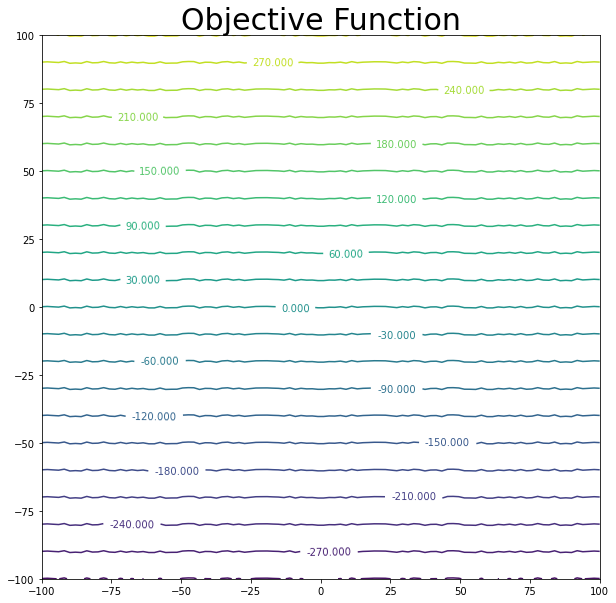

In [4]:
x = np.linspace(xmin,xmax,100)
y = np.linspace(ymin,ymax,100)
xx, yy = np.meshgrid(x,y)
z = func(xx,yy)
fig, ax = plt.subplots(figsize=(10,10))
cs = ax.contour(z, extent=(xmin,xmax,ymin,ymax), levels = 20)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_title('Objective Function', fontsize = 30)
plt.show()
        

### Pick a type of sampler 
Tree-structured Parzen Estimator algorithm implemented in optuna.samplers.TPESampler

CMA-ES based algorithm implemented in optuna.samplers.CmaEsSampler

Grid Search implemented in optuna.samplers.GridSampler

Random Search implemented in optuna.samplers.RandomSampler

In [16]:
study = optuna.create_study()
study = optuna.create_study(sampler=optuna.samplers.CmaEsSampler())
study.optimize(objective, n_trials=10)

[I 2021-02-17 11:25:27,495] A new study created in memory with name: no-name-c7aa5584-4d1b-4217-a3b4-a708de733f2a
[I 2021-02-17 11:25:27,509] A new study created in memory with name: no-name-6a999a88-b0f5-4cb3-8c6d-35865b702751
[I 2021-02-17 11:25:27,517] Trial 0 finished with value: -251.2786794421599 and parameters: {'x': -81.84923764656403, 'y': 84.21829882895096}. Best is trial 0 with value: -251.2786794421599.
[I 2021-02-17 11:25:27,552] Trial 1 finished with value: -144.76246650433384 and parameters: {'x': -2.0401436852345096, 'y': 48.63925510368896}. Best is trial 0 with value: -251.2786794421599.
[I 2021-02-17 11:25:27,585] Trial 2 finished with value: -11.508929930796763 and parameters: {'x': 42.794925788923585, 'y': 3.4785958031629067}. Best is trial 0 with value: -251.2786794421599.
[I 2021-02-17 11:25:27,614] Trial 3 finished with value: 42.75936782699739 and parameters: {'x': 10.24850472750008, 'y': -13.894824218862567}. Best is trial 0 with value: -251.2786794421599.
[I 2

### Extract the Best Parameters

In [17]:
best_params = study.best_params
found_x = best_params["x"]
found_y = best_params["y"]
print("Found x: {}, f: {}".format(found_x, (func(found_x, found_y))))
print("Found y: {}, f: {}".format(found_y, (func(found_x, found_y))))

Found x: 2.1364852965455654, f: 298.3486306114872
Found y: 99.77924172662381, f: 298.3486306114872


In [7]:
print(f"Sampler is {study.sampler.__class__.__name__}")

Sampler is RandomSampler


## Monte Carlo Simulation to Test the Performance of the Optimizer

This will measure the performance of the optimizer on a specific function. The number of trials and the number of iterations can be varied. 

In [49]:
x = []
y = []
z = []
for i in range(1000):    
    study = optuna.create_study()
    study = optuna.create_study(sampler=optuna.samplers.RandomSampler())
    study.optimize(objective, n_trials=10)
    best_params = study.best_params
    found_x = best_params["x"]
    found_y = best_params["y"]
    print("Found x: {}, (x - 2)^2: {}".format(found_x, (func(found_x, found_y))))
    print("Found y: {}, (x - 2)^2: {}".format(found_y, (func(found_x, found_y))))
    x.append(found_x)
    y.append(found_y)
    z.append(func(found_x, found_y))
    if i%10 == 0:
        print(i)
    else:
        pass
    

[I 2021-02-17 12:38:48,929] A new study created in memory with name: no-name-9b354404-9a8f-4351-abb3-df806a6dbe3f
[I 2021-02-17 12:38:48,937] A new study created in memory with name: no-name-64a01877-1ce2-4b03-afb4-2944695da714
[I 2021-02-17 12:38:48,940] Trial 0 finished with value: -44.55536656289041 and parameters: {'x': -9.98160738971356, 'y': 14.748864619568195}. Best is trial 0 with value: -44.55536656289041.
[I 2021-02-17 12:38:48,943] Trial 1 finished with value: -33.3497415490145 and parameters: {'x': -54.98378718773365, 'y': 10.967073803598339}. Best is trial 0 with value: -44.55536656289041.
[I 2021-02-17 12:38:48,947] Trial 2 finished with value: -229.3309922340491 and parameters: {'x': -74.6822158467217, 'y': 76.88828171075488}. Best is trial 2 with value: -229.3309922340491.
[I 2021-02-17 12:38:48,949] Trial 3 finished with value: 257.7207322140184 and parameters: {'x': -35.20330032472707, 'y': -85.48334718724001}. Best is trial 2 with value: -229.3309922340491.
[I 2021-0

[I 2021-02-17 12:38:49,088] Trial 6 finished with value: 13.75494648325954 and parameters: {'x': -79.88989324774045, 'y': -5.0232655473812}. Best is trial 2 with value: -158.13486674652378.
[I 2021-02-17 12:38:49,090] Trial 7 finished with value: -235.04681636562418 and parameters: {'x': -73.17969924424298, 'y': 78.18975611100947}. Best is trial 7 with value: -235.04681636562418.
[I 2021-02-17 12:38:49,092] Trial 8 finished with value: 117.78617997086324 and parameters: {'x': 0.16912003279850296, 'y': -39.60261830786307}. Best is trial 7 with value: -235.04681636562418.
[I 2021-02-17 12:38:49,104] Trial 9 finished with value: -64.32299500584985 and parameters: {'x': -29.603467274279296, 'y': 21.96423161546319}. Best is trial 7 with value: -235.04681636562418.
[I 2021-02-17 12:38:49,106] A new study created in memory with name: no-name-0fd0486e-861e-44ad-b55b-a515756e747f
[I 2021-02-17 12:38:49,111] A new study created in memory with name: no-name-c2f8ac3e-a052-4194-84ae-f18b82fd1300
[I

Found x: -7.4210094222963505, (x - 2)^2: 274.7692401026954
Found y: 91.92162376093773, (x - 2)^2: 274.7692401026954
0
Found x: 72.73201194493933, (x - 2)^2: 214.12199325503826
Found y: 71.53277179492329, (x - 2)^2: 214.12199325503826
Found x: 35.89822073621636, (x - 2)^2: 264.0111386669887
Found y: 87.80752957763633, (x - 2)^2: 264.0111386669887
Found x: -73.17969924424298, (x - 2)^2: 235.48084090115123
Found y: 78.18975611100947, (x - 2)^2: 235.48084090115123
Found x: 34.827931479286406, (x - 2)^2: 261.34762786943924
Found y: 87.00784684285969, (x - 2)^2: 261.34762786943924


[I 2021-02-17 12:38:49,183] Trial 5 finished with value: 287.9867204125167 and parameters: {'x': 69.70589643421658, 'y': -95.7684743851339}. Best is trial 3 with value: -159.1876581940534.
[I 2021-02-17 12:38:49,188] Trial 6 finished with value: -214.51785844967307 and parameters: {'x': 46.898904090923196, 'y': 70.84753327633246}. Best is trial 6 with value: -214.51785844967307.
[I 2021-02-17 12:38:49,191] Trial 7 finished with value: 28.711827784639098 and parameters: {'x': -65.83430166180007, 'y': -10.012651697738036}. Best is trial 6 with value: -214.51785844967307.
[I 2021-02-17 12:38:49,193] Trial 8 finished with value: 67.06372922876257 and parameters: {'x': 9.650151646953958, 'y': -21.739183470067715}. Best is trial 6 with value: -214.51785844967307.
[I 2021-02-17 12:38:49,196] Trial 9 finished with value: -216.83416373495086 and parameters: {'x': 42.55748990194661, 'y': 71.93518561057098}. Best is trial 9 with value: -216.83416373495086.
[I 2021-02-17 12:38:49,198] A new study 

[I 2021-02-17 12:38:49,349] Trial 1 finished with value: 246.803589646546 and parameters: {'x': 27.85086320872479, 'y': -82.68605108686529}. Best is trial 0 with value: -204.3725744560194.
[I 2021-02-17 12:38:49,352] Trial 2 finished with value: -161.24411363176597 and parameters: {'x': -97.456556877212, 'y': 54.64023284088401}. Best is trial 0 with value: -204.3725744560194.
[I 2021-02-17 12:38:49,355] Trial 3 finished with value: 252.63452693298092 and parameters: {'x': 16.421557834852933, 'y': -83.80994260623962}. Best is trial 0 with value: -204.3725744560194.
[I 2021-02-17 12:38:49,358] Trial 4 finished with value: 193.65218981105636 and parameters: {'x': 23.486639925859265, 'y': -63.87315572358718}. Best is trial 0 with value: -204.3725744560194.
[I 2021-02-17 12:38:49,361] Trial 5 finished with value: 166.8305186859795 and parameters: {'x': 18.5557200211595, 'y': -54.84351450422349}. Best is trial 0 with value: -204.3725744560194.
[I 2021-02-17 12:38:49,364] Trial 6 finished wit

Found x: 42.55748990194661, (x - 2)^2: 216.8054874252278
Found y: 71.93518561057098, (x - 2)^2: 216.8054874252278
Found x: 67.87662148653106, (x - 2)^2: 271.57704873539416
Found y: 90.19370220308636, (x - 2)^2: 271.57704873539416
Found x: 98.63913871701766, (x - 2)^2: 285.2482929306676
Found y: 95.13825103696803, (x - 2)^2: 285.2482929306676
Found x: -41.28192583160606, (x - 2)^2: 267.13430159519174
Found y: 88.71369777661417, (x - 2)^2: 267.13430159519174
Found x: -66.28983630745999, (x - 2)^2: 293.45868306327657
Found y: 97.59339290367407, (x - 2)^2: 293.45868306327657


[I 2021-02-17 12:38:49,402] Trial 6 finished with value: -118.2792953629942 and parameters: {'x': -45.36013749389534, 'y': 39.21307656442153}. Best is trial 3 with value: -296.4429605185046.
[I 2021-02-17 12:38:49,405] Trial 7 finished with value: -89.67445258969333 and parameters: {'x': -83.9793513969103, 'y': 29.674253709626413}. Best is trial 3 with value: -296.4429605185046.
[I 2021-02-17 12:38:49,408] Trial 8 finished with value: -300.98407405825543 and parameters: {'x': 6.360968361424241, 'y': 99.98777882284483}. Best is trial 8 with value: -300.98407405825543.
[I 2021-02-17 12:38:49,410] Trial 9 finished with value: 218.84879500912595 and parameters: {'x': -43.2919551310134, 'y': -72.74059368167968}. Best is trial 8 with value: -300.98407405825543.
[I 2021-02-17 12:38:49,413] A new study created in memory with name: no-name-95e34f60-94d4-4f0d-8452-fe4cce19b49c
[I 2021-02-17 12:38:49,425] A new study created in memory with name: no-name-2cb5051e-d20d-4ba4-9985-fe56cac9f301
[I 202

[I 2021-02-17 12:38:49,575] Trial 2 finished with value: 5.904883906498957 and parameters: {'x': 84.52631473104381, 'y': -1.385404956877224}. Best is trial 1 with value: -267.0370624041364.
[I 2021-02-17 12:38:49,578] Trial 3 finished with value: -271.08847771915987 and parameters: {'x': -58.413447653971986, 'y': 90.37393565950904}. Best is trial 3 with value: -271.08847771915987.
[I 2021-02-17 12:38:49,581] Trial 4 finished with value: -195.65699356150034 and parameters: {'x': 6.775410214916988, 'y': 64.23245942215596}. Best is trial 3 with value: -271.08847771915987.
[I 2021-02-17 12:38:49,583] Trial 5 finished with value: 86.07962069298917 and parameters: {'x': -2.386114359357265, 'y': -28.267299131780902}. Best is trial 3 with value: -271.08847771915987.
[I 2021-02-17 12:38:49,590] Trial 6 finished with value: 188.9789169236633 and parameters: {'x': -54.0970778212003, 'y': -62.01308689427538}. Best is trial 3 with value: -271.08847771915987.
[I 2021-02-17 12:38:49,594] Trial 7 fini

Found x: 6.360968361424241, (x - 2)^2: 300.3331292675381
Found y: 99.98777882284483, (x - 2)^2: 300.3331292675381
10
Found x: 51.56667703418137, (x - 2)^2: 297.53961543865205
Found y: 98.85577821358112, (x - 2)^2: 297.53961543865205
Found x: 14.082694210159701, (x - 2)^2: 43.598975273297484
Found y: 14.663392952388918, (x - 2)^2: 43.598975273297484
Found x: -12.01660222913712, (x - 2)^2: 283.65483289051207
Found y: 94.58970519443992, (x - 2)^2: 283.65483289051207
Found x: -58.413447653971986, (x - 2)^2: 271.4752461532381
Found y: 90.37393565950904, (x - 2)^2: 271.4752461532381


[I 2021-02-17 12:38:49,616] Trial 3 finished with value: -191.4216191947669 and parameters: {'x': 33.01429715422458, 'y': 63.450045785363585}. Best is trial 3 with value: -191.4216191947669.
[I 2021-02-17 12:38:49,619] Trial 4 finished with value: 196.44105146848995 and parameters: {'x': 37.717379143125555, 'y': -64.9043978455863}. Best is trial 3 with value: -191.4216191947669.
[I 2021-02-17 12:38:49,623] Trial 5 finished with value: -238.33332762660217 and parameters: {'x': 74.08158978881377, 'y': 78.95310998777359}. Best is trial 5 with value: -238.33332762660217.
[I 2021-02-17 12:38:49,625] Trial 6 finished with value: 245.9024121983271 and parameters: {'x': 3.2047559508888668, 'y': -81.81877702405944}. Best is trial 5 with value: -238.33332762660217.
[I 2021-02-17 12:38:49,628] Trial 7 finished with value: -247.7936864407531 and parameters: {'x': 11.666050885535697, 'y': 82.18485654284882}. Best is trial 7 with value: -247.7936864407531.
[I 2021-02-17 12:38:49,630] Trial 8 finishe

[I 2021-02-17 12:38:49,779] A new study created in memory with name: no-name-a586b739-20ff-4024-8be6-3bc8bc1f9823
[I 2021-02-17 12:38:49,782] A new study created in memory with name: no-name-4e79166a-8a92-4f5a-b09c-b206a8524940
[I 2021-02-17 12:38:49,785] Trial 0 finished with value: -153.99221462939732 and parameters: {'x': -57.3508256760968, 'y': 51.8479738200833}. Best is trial 0 with value: -153.99221462939732.
[I 2021-02-17 12:38:49,787] Trial 1 finished with value: 135.437558439457 and parameters: {'x': 23.377398494542504, 'y': -45.77560153760203}. Best is trial 0 with value: -153.99221462939732.
[I 2021-02-17 12:38:49,790] Trial 2 finished with value: 116.4236328216311 and parameters: {'x': -39.297742689624805, 'y': -38.719044902889685}. Best is trial 0 with value: -153.99221462939732.
[I 2021-02-17 12:38:49,800] Trial 3 finished with value: -75.68488509958318 and parameters: {'x': 23.139904925554916, 'y': 24.126944187880014}. Best is trial 0 with value: -153.99221462939732.
[I 

Found x: 11.666050885535697, (x - 2)^2: 245.7086649512923
Found y: 82.18485654284882, (x - 2)^2: 245.7086649512923
Found x: 28.07992341803046, (x - 2)^2: 287.00716962484483
Found y: 95.64984822530448, (x - 2)^2: 287.00716962484483
Found x: -97.38482063904128, (x - 2)^2: 248.11825054323268
Found y: 82.50041542282938, (x - 2)^2: 248.11825054323268
Found x: 41.00564912493601, (x - 2)^2: 268.0542013497015
Found y: 89.56897915947474, (x - 2)^2: 268.0542013497015
Found x: 8.594712934785775, (x - 2)^2: 237.9632381244533
Found y: 79.65412344806822, (x - 2)^2: 237.9632381244533


[I 2021-02-17 12:38:49,849] Trial 5 finished with value: 174.2745087574464 and parameters: {'x': 87.92772783519129, 'y': -57.72684023730763}. Best is trial 1 with value: -257.3202480248023.
[I 2021-02-17 12:38:49,853] Trial 6 finished with value: 194.1933221431769 and parameters: {'x': 16.213222702672965, 'y': -64.49873789291891}. Best is trial 1 with value: -257.3202480248023.
[I 2021-02-17 12:38:49,856] Trial 7 finished with value: 63.41850051545122 and parameters: {'x': -74.26841474711136, 'y': -20.37668399832009}. Best is trial 1 with value: -257.3202480248023.
[I 2021-02-17 12:38:49,859] Trial 8 finished with value: -113.79289345843156 and parameters: {'x': -75.09392731376914, 'y': 37.153206762265825}. Best is trial 1 with value: -257.3202480248023.
[I 2021-02-17 12:38:49,862] Trial 9 finished with value: -46.88261907015042 and parameters: {'x': 95.09951175217648, 'y': 15.64818258677522}. Best is trial 1 with value: -257.3202480248023.
[I 2021-02-17 12:38:49,866] A new study creat

[I 2021-02-17 12:38:50,031] Trial 1 finished with value: -254.85324867387632 and parameters: {'x': -94.73171304031224, 'y': 84.10250073783726}. Best is trial 1 with value: -254.85324867387632.
[I 2021-02-17 12:38:50,033] Trial 2 finished with value: 108.18522751016401 and parameters: {'x': 27.35496020514219, 'y': -35.62962978769745}. Best is trial 1 with value: -254.85324867387632.
[I 2021-02-17 12:38:50,039] Trial 3 finished with value: -234.61857121331212 and parameters: {'x': 78.09114808011381, 'y': 78.02033935589233}. Best is trial 1 with value: -254.85324867387632.
[I 2021-02-17 12:38:50,042] Trial 4 finished with value: -299.15603343778326 and parameters: {'x': -13.331805722944395, 'y': 99.26952471107353}. Best is trial 4 with value: -299.15603343778326.
[I 2021-02-17 12:38:50,045] Trial 5 finished with value: 238.9186720339244 and parameters: {'x': -98.73038232343858, 'y': -80.60844544807584}. Best is trial 4 with value: -299.15603343778326.
[I 2021-02-17 12:38:50,049] Trial 6 f

Found x: 34.25302764381729, (x - 2)^2: 256.3465452334137
Found y: 85.77998178994883, (x - 2)^2: 256.3465452334137
20
Found x: -93.91940560889952, (x - 2)^2: 290.9029414732
Found y: 97.19177429800888, (x - 2)^2: 290.9029414732
Found x: -55.39067360080876, (x - 2)^2: 241.8621025197245
Found y: 80.30891121555607, (x - 2)^2: 241.8621025197245
Found x: 43.55038650510559, (x - 2)^2: 287.6134233657001
Found y: 96.12928116222093, (x - 2)^2: 287.6134233657001
Found x: -13.331805722944395, (x - 2)^2: 298.7806070116632
Found y: 99.26952471107353, (x - 2)^2: 298.7806070116632


[I 2021-02-17 12:38:50,072] Trial 0 finished with value: 59.83100869677809 and parameters: {'x': -50.83016504582503, 'y': -19.75584979829783}. Best is trial 0 with value: 59.83100869677809.
[I 2021-02-17 12:38:50,074] Trial 1 finished with value: -9.293069508002636 and parameters: {'x': 80.33432770793198, 'y': 3.1059341592028886}. Best is trial 1 with value: -9.293069508002636.
[I 2021-02-17 12:38:50,078] Trial 2 finished with value: 108.4269734801528 and parameters: {'x': 83.51220361234041, 'y': -36.293366435844774}. Best is trial 1 with value: -9.293069508002636.
[I 2021-02-17 12:38:50,080] Trial 3 finished with value: -125.94504201826913 and parameters: {'x': -56.963874582916695, 'y': 42.33863876683276}. Best is trial 3 with value: -125.94504201826913.
[I 2021-02-17 12:38:50,083] Trial 4 finished with value: 245.6213699684634 and parameters: {'x': 82.68390640929647, 'y': -82.02924967613723}. Best is trial 3 with value: -125.94504201826913.
[I 2021-02-17 12:38:50,086] Trial 5 finishe

[I 2021-02-17 12:38:50,244] Trial 7 finished with value: 15.12633276183876 and parameters: {'x': 75.07509894779852, 'y': -5.890713029676405}. Best is trial 6 with value: -224.6780947368513.
[I 2021-02-17 12:38:50,247] Trial 8 finished with value: -217.67969665792808 and parameters: {'x': -95.44680927404363, 'y': 72.13243201239362}. Best is trial 6 with value: -224.6780947368513.
[I 2021-02-17 12:38:50,249] Trial 9 finished with value: 21.926173933139587 and parameters: {'x': 65.60749771833011, 'y': -6.66170567498348}. Best is trial 6 with value: -224.6780947368513.
[I 2021-02-17 12:38:50,252] A new study created in memory with name: no-name-73567e81-94fc-4048-a028-26d8b06cfc78
[I 2021-02-17 12:38:50,260] A new study created in memory with name: no-name-c0e6a2ce-e4f8-4f2d-8b2d-079f11d13c72
[I 2021-02-17 12:38:50,263] Trial 0 finished with value: -248.3952642794172 and parameters: {'x': 43.134056941311144, 'y': 83.32339549238162}. Best is trial 0 with value: -248.3952642794172.
[I 2021-0

Found x: -56.963874582916695, (x - 2)^2: 127.38888232874385
Found y: 42.33863876683276, (x - 2)^2: 127.38888232874385
Found x: -90.16547372563623, (x - 2)^2: 289.9635729002145
Found y: 96.850672918127, (x - 2)^2: 289.9635729002145
Found x: 89.59250382559128, (x - 2)^2: 273.9409594809041
Found y: 91.32948447475837, (x - 2)^2: 273.9409594809041
Found x: -92.29445704780186, (x - 2)^2: 225.58916887519734
Found y: 75.52537578627005, (x - 2)^2: 225.58916887519734
Found x: -54.2774097231153, (x - 2)^2: 272.63075173154886
Found y: 91.11056110654786, (x - 2)^2: 272.63075173154886


[I 2021-02-17 12:38:50,311] Trial 1 finished with value: -4.049151348613767 and parameters: {'x': -28.384712789716033, 'y': 0.6998050374176472}. Best is trial 0 with value: -65.34931485129252.
[I 2021-02-17 12:38:50,314] Trial 2 finished with value: -88.56182302371407 and parameters: {'x': 34.28579145761813, 'y': 28.95243714863156}. Best is trial 2 with value: -88.56182302371407.
[I 2021-02-17 12:38:50,319] Trial 3 finished with value: -279.35228756904814 and parameters: {'x': 58.57803008117989, 'y': 93.04204554473941}. Best is trial 3 with value: -279.35228756904814.
[I 2021-02-17 12:38:50,324] Trial 4 finished with value: 87.7929959343216 and parameters: {'x': -53.52288691549716, 'y': -29.452472158261315}. Best is trial 3 with value: -279.35228756904814.
[I 2021-02-17 12:38:50,326] Trial 5 finished with value: 59.087509094188796 and parameters: {'x': -32.36304395325655, 'y': -19.910068722183667}. Best is trial 3 with value: -279.35228756904814.
[I 2021-02-17 12:38:50,329] Trial 6 fin

[I 2021-02-17 12:38:50,482] Trial 8 finished with value: -170.60011657249473 and parameters: {'x': 78.27636358218993, 'y': 56.73753944884646}. Best is trial 1 with value: -252.5125931681845.
[I 2021-02-17 12:38:50,497] Trial 9 finished with value: -125.36838546627845 and parameters: {'x': -65.47336189555462, 'y': 41.86624686704562}. Best is trial 1 with value: -252.5125931681845.
[I 2021-02-17 12:38:50,499] A new study created in memory with name: no-name-b34f03c4-24d0-422a-94b6-2f7b7f684613
[I 2021-02-17 12:38:50,504] A new study created in memory with name: no-name-47bc85b9-c594-40c2-8d22-fbbf8bcf6fd8
[I 2021-02-17 12:38:50,507] Trial 0 finished with value: 1.817572999724754 and parameters: {'x': 12.902477255885685, 'y': -0.37500261864803974}. Best is trial 0 with value: 1.817572999724754.
[I 2021-02-17 12:38:50,510] Trial 1 finished with value: 63.951479497253835 and parameters: {'x': 65.78349713935151, 'y': -20.848580176682276}. Best is trial 0 with value: 1.817572999724754.
[I 202

Found x: 58.57803008117989, (x - 2)^2: 279.8197048408258
Found y: 93.04204554473941, (x - 2)^2: 279.8197048408258
30
Found x: -12.773955198782502, (x - 2)^2: 296.7895759275518
Found y: 98.99244710298231, (x - 2)^2: 296.7895759275518
Found x: 95.71085705598813, (x - 2)^2: 250.27023345683224
Found y: 83.52700636034095, (x - 2)^2: 250.27023345683224
Found x: -12.380574220368118, (x - 2)^2: 251.74199588491908
Found y: 83.7097785836533, (x - 2)^2: 251.74199588491908
Found x: 61.80387222473641, (x - 2)^2: 254.18988649731614
Found y: 84.8773605964301, (x - 2)^2: 254.18988649731614


[I 2021-02-17 12:38:50,545] Trial 0 finished with value: -62.158321163284064 and parameters: {'x': 76.58984923349252, 'y': 21.593112476747535}. Best is trial 0 with value: -62.158321163284064.
[I 2021-02-17 12:38:50,548] Trial 1 finished with value: 264.61244482895427 and parameters: {'x': 82.6313776189796, 'y': -88.58550915836112}. Best is trial 0 with value: -62.158321163284064.
[I 2021-02-17 12:38:50,552] Trial 2 finished with value: -110.88232347716028 and parameters: {'x': -57.93112990134854, 'y': 36.009137370632175}. Best is trial 2 with value: -110.88232347716028.
[I 2021-02-17 12:38:50,565] Trial 3 finished with value: -107.75983103505922 and parameters: {'x': -41.76695924840368, 'y': 36.95163178062114}. Best is trial 2 with value: -110.88232347716028.
[I 2021-02-17 12:38:50,569] Trial 4 finished with value: 22.727535166784822 and parameters: {'x': -74.36784095165845, 'y': -8.315676363602535}. Best is trial 2 with value: -110.88232347716028.
[I 2021-02-17 12:38:50,572] Trial 5 

[I 2021-02-17 12:38:50,747] Trial 7 finished with value: 176.66781252055378 and parameters: {'x': 34.87153722232557, 'y': -59.44799701927581}. Best is trial 2 with value: -222.01490116437034.
[I 2021-02-17 12:38:50,750] Trial 8 finished with value: -109.72191430450928 and parameters: {'x': 66.864487229058, 'y': 37.16181247173597}. Best is trial 2 with value: -222.01490116437034.
[I 2021-02-17 12:38:50,754] Trial 9 finished with value: -243.351102312597 and parameters: {'x': 15.4397460458882, 'y': 81.61248383483746}. Best is trial 9 with value: -243.351102312597.
[I 2021-02-17 12:38:50,757] A new study created in memory with name: no-name-fc9686e0-6662-4af7-bffe-138992b35094
[I 2021-02-17 12:38:50,762] A new study created in memory with name: no-name-fb276252-f05c-4853-b551-3f17531e387d
[I 2021-02-17 12:38:50,765] Trial 0 finished with value: -81.53403163970889 and parameters: {'x': -7.788929545389408, 'y': 27.642034992511583}. Best is trial 0 with value: -81.53403163970889.
[I 2021-02-

Found x: -58.88588773592722, (x - 2)^2: 247.7446212087944
Found y: 82.81370872051218, (x - 2)^2: 247.7446212087944
Found x: 4.422546879662278, (x - 2)^2: 295.3606678986661
Found y: 98.23643861101061, (x - 2)^2: 295.3606678986661
Found x: 36.068907701061846, (x - 2)^2: 110.57600393163682
Found y: 36.7453887940068, (x - 2)^2: 110.57600393163682
Found x: 15.4397460458882, (x - 2)^2: 244.4709149946401
Found y: 81.61248383483746, (x - 2)^2: 244.4709149946401


[I 2021-02-17 12:38:50,791] Trial 6 finished with value: -61.42357615596628 and parameters: {'x': 92.56164212703345, 'y': 20.073390987525897}. Best is trial 4 with value: -255.19002380095515.
[I 2021-02-17 12:38:50,794] Trial 7 finished with value: 183.9639661162735 and parameters: {'x': 8.78517802247147, 'y': -61.39662175080778}. Best is trial 4 with value: -255.19002380095515.
[I 2021-02-17 12:38:50,797] Trial 8 finished with value: -60.911700663086705 and parameters: {'x': -54.105588379982294, 'y': 21.120883422526887}. Best is trial 4 with value: -255.19002380095515.
[I 2021-02-17 12:38:50,799] Trial 9 finished with value: 75.91296742272503 and parameters: {'x': 24.594758395305632, 'y': -25.758677215890827}. Best is trial 4 with value: -255.19002380095515.
[I 2021-02-17 12:38:50,802] A new study created in memory with name: no-name-5f6e2c97-36da-40e4-9674-ee753e380dee
[I 2021-02-17 12:38:50,806] A new study created in memory with name: no-name-2a44befd-bbf5-4ac9-a0fd-f653911fa871
[I

[I 2021-02-17 12:38:50,954] Trial 2 finished with value: -150.75106916403942 and parameters: {'x': 34.43046944462364, 'y': 50.733038385659796}. Best is trial 0 with value: -196.90234079274128.
[I 2021-02-17 12:38:50,957] Trial 3 finished with value: 48.19070094009793 and parameters: {'x': -72.86966597558309, 'y': -16.69210712463513}. Best is trial 0 with value: -196.90234079274128.
[I 2021-02-17 12:38:50,960] Trial 4 finished with value: 182.60571114680235 and parameters: {'x': -8.257914244533012, 'y': -61.350275135938716}. Best is trial 0 with value: -196.90234079274128.
[I 2021-02-17 12:38:50,963] Trial 5 finished with value: -250.68206823098043 and parameters: {'x': -89.90178221535163, 'y': 83.81521943464415}. Best is trial 5 with value: -250.68206823098043.
[I 2021-02-17 12:38:50,966] Trial 6 finished with value: -139.24155215764114 and parameters: {'x': -40.944522953722014, 'y': 46.9517235823013}. Best is trial 5 with value: -250.68206823098043.
[I 2021-02-17 12:38:50,970] Trial 7

Found x: -91.72037362216743, (x - 2)^2: 253.84475060928176
Found y: 84.79146716435281, (x - 2)^2: 253.84475060928176
Found x: -14.863795512645254, (x - 2)^2: 214.41278018036695
Found y: 71.18672837409815, (x - 2)^2: 214.41278018036695
40
Found x: 11.834857834428576, (x - 2)^2: 275.5943259502343
Found y: 91.54290271652533, (x - 2)^2: 275.5943259502343
Found x: 64.77427533345008, (x - 2)^2: 275.8166621679884
Found y: 92.27021500360775, (x - 2)^2: 275.8166621679884
Found x: -89.90178221535163, (x - 2)^2: 252.2802836130834
Found y: 83.81521943464415, (x - 2)^2: 252.2802836130834


[I 2021-02-17 12:38:51,003] Trial 4 finished with value: 74.82821741017199 and parameters: {'x': 78.79043408946978, 'y': -24.298716234449614}. Best is trial 3 with value: -108.48749264425793.
[I 2021-02-17 12:38:51,021] Trial 5 finished with value: -171.1915422622933 and parameters: {'x': -63.053276900759656, 'y': 58.00477840485604}. Best is trial 5 with value: -171.1915422622933.
[I 2021-02-17 12:38:51,024] Trial 6 finished with value: -136.46853533836875 and parameters: {'x': -97.05260329512113, 'y': 44.442269809324074}. Best is trial 5 with value: -171.1915422622933.
[I 2021-02-17 12:38:51,028] Trial 7 finished with value: 247.3915730981837 and parameters: {'x': 95.00956393955286, 'y': -82.35851189248939}. Best is trial 5 with value: -171.1915422622933.
[I 2021-02-17 12:38:51,032] Trial 8 finished with value: -242.4922850955872 and parameters: {'x': 15.223623226627964, 'y': 81.41834645269611}. Best is trial 8 with value: -242.4922850955872.
[I 2021-02-17 12:38:51,036] Trial 9 finish

[I 2021-02-17 12:38:51,178] A new study created in memory with name: no-name-8a0c5608-c420-4625-91dc-9a1a050e04e6
[I 2021-02-17 12:38:51,182] Trial 0 finished with value: 108.74813414679637 and parameters: {'x': 23.357750845924485, 'y': -35.97066596165182}. Best is trial 0 with value: 108.74813414679637.
[I 2021-02-17 12:38:51,187] Trial 1 finished with value: 22.80539704495612 and parameters: {'x': -57.87217209482374, 'y': -7.943206014403387}. Best is trial 1 with value: 22.80539704495612.
[I 2021-02-17 12:38:51,189] Trial 2 finished with value: -41.78062825612435 and parameters: {'x': 89.0828478654509, 'y': 14.141216406658174}. Best is trial 2 with value: -41.78062825612435.
[I 2021-02-17 12:38:51,195] Trial 3 finished with value: -46.47924801291282 and parameters: {'x': -91.01028832192432, 'y': 15.969047005010466}. Best is trial 3 with value: -46.47924801291282.
[I 2021-02-17 12:38:51,199] Trial 4 finished with value: -261.1880295572532 and parameters: {'x': -28.498471908326167, 'y'

Found x: 15.223623226627964, (x - 2)^2: 243.59629228937456
Found y: 81.41834645269611, (x - 2)^2: 243.59629228937456
Found x: 16.85310146621788, (x - 2)^2: 274.19528080371543
Found y: 91.07873781004713, (x - 2)^2: 274.19528080371543
Found x: 24.327610756276428, (x - 2)^2: 204.98474468602203
Found y: 68.01599821081987, (x - 2)^2: 204.98474468602203
Found x: 63.395880907819304, (x - 2)^2: 240.47775114240713
Found y: 80.42857634930544, (x - 2)^2: 240.47775114240713
Found x: -27.892915323904916, (x - 2)^2: 280.0844268980377
Found y: 93.65858296982748, (x - 2)^2: 280.0844268980377


[I 2021-02-17 12:38:51,244] Trial 5 finished with value: -91.98969810213907 and parameters: {'x': -36.65014714598218, 'y': 31.323553283047715}. Best is trial 2 with value: -133.00641904006068.
[I 2021-02-17 12:38:51,250] Trial 6 finished with value: -161.79726217783374 and parameters: {'x': 72.94120670995596, 'y': 53.938494417664884}. Best is trial 6 with value: -161.79726217783374.
[I 2021-02-17 12:38:51,253] Trial 7 finished with value: 223.86355545451272 and parameters: {'x': -9.647728611124279, 'y': -74.0182848906324}. Best is trial 6 with value: -161.79726217783374.
[I 2021-02-17 12:38:51,256] Trial 8 finished with value: -204.16030521810058 and parameters: {'x': -89.60294191529357, 'y': 68.17390001080406}. Best is trial 8 with value: -204.16030521810058.
[I 2021-02-17 12:38:51,262] Trial 9 finished with value: -270.33126894730435 and parameters: {'x': -87.16373690535389, 'y': 90.09796428957969}. Best is trial 9 with value: -270.33126894730435.
[I 2021-02-17 12:38:51,265] A new st

[I 2021-02-17 12:38:51,430] Trial 0 finished with value: -139.45685714541582 and parameters: {'x': -11.756432412606728, 'y': 46.78662234244456}. Best is trial 0 with value: -139.45685714541582.
[I 2021-02-17 12:38:51,433] Trial 1 finished with value: 145.80492003041672 and parameters: {'x': -2.3810923750766904, 'y': -48.067211692050925}. Best is trial 0 with value: -139.45685714541582.
[I 2021-02-17 12:38:51,439] Trial 2 finished with value: 162.07569895773216 and parameters: {'x': 12.206708111908654, 'y': -54.440565877869716}. Best is trial 0 with value: -139.45685714541582.
[I 2021-02-17 12:38:51,441] Trial 3 finished with value: 33.60780207258078 and parameters: {'x': 47.66280446494173, 'y': -10.311693402356312}. Best is trial 0 with value: -139.45685714541582.
[I 2021-02-17 12:38:51,446] Trial 4 finished with value: -290.55193479841466 and parameters: {'x': 12.750177595322114, 'y': 96.59054269338918}. Best is trial 4 with value: -290.55193479841466.
[I 2021-02-17 12:38:51,449] Tria

Found x: -87.16373690535389, (x - 2)^2: 271.20501347015374
Found y: 90.09796428957969, (x - 2)^2: 271.20501347015374
Found x: 82.26780931873466, (x - 2)^2: 278.46270015715317
Found y: 92.54007265928226, (x - 2)^2: 278.46270015715317
50
Found x: 17.3393697664048, (x - 2)^2: 106.99756321483409
Found y: 35.93487340158978, (x - 2)^2: 106.99756321483409
Found x: 98.3922601300248, (x - 2)^2: 231.10427837918553
Found y: 77.36012456553172, (x - 2)^2: 231.10427837918553
Found x: 12.750177595322114, (x - 2)^2: 289.0572119807928
Found y: 96.59054269338918, (x - 2)^2: 289.0572119807928


[I 2021-02-17 12:38:51,469] Trial 0 finished with value: 25.920689581441742 and parameters: {'x': 57.668899751689594, 'y': -9.62699932242144}. Best is trial 0 with value: 25.920689581441742.
[I 2021-02-17 12:38:51,471] Trial 1 finished with value: 196.61335028376013 and parameters: {'x': 91.37569208679523, 'y': -64.63883314340598}. Best is trial 0 with value: 25.920689581441742.
[I 2021-02-17 12:38:51,474] Trial 2 finished with value: -99.39601998403232 and parameters: {'x': -20.141335153275918, 'y': 32.962210010934086}. Best is trial 2 with value: -99.39601998403232.
[I 2021-02-17 12:38:51,484] Trial 3 finished with value: -65.64787968645987 and parameters: {'x': -49.33270406669978, 'y': 21.34581578610802}. Best is trial 2 with value: -99.39601998403232.
[I 2021-02-17 12:38:51,486] Trial 4 finished with value: -204.75791222127552 and parameters: {'x': 90.36346229835337, 'y': 67.66662565750411}. Best is trial 4 with value: -204.75791222127552.
[I 2021-02-17 12:38:51,489] Trial 5 finish

[I 2021-02-17 12:38:51,619] Trial 7 finished with value: 293.5493104275549 and parameters: {'x': 55.49300657795894, 'y': -98.23304839457782}. Best is trial 1 with value: -281.9054316692218.
[I 2021-02-17 12:38:51,622] Trial 8 finished with value: 132.76129680566865 and parameters: {'x': -27.196490450143273, 'y': -44.135001938628825}. Best is trial 1 with value: -281.9054316692218.
[I 2021-02-17 12:38:51,632] Trial 9 finished with value: 118.26896627270138 and parameters: {'x': -34.562421022024225, 'y': -40.462575519473454}. Best is trial 1 with value: -281.9054316692218.
[I 2021-02-17 12:38:51,642] A new study created in memory with name: no-name-084823a5-34ad-4dd0-b623-12c60b2c9bb6
[I 2021-02-17 12:38:51,645] A new study created in memory with name: no-name-11b75e36-fc98-4edb-8da7-f83c20a8c4dc
[I 2021-02-17 12:38:51,648] Trial 0 finished with value: 170.87363317438783 and parameters: {'x': -99.90922310445288, 'y': -57.02529035799908}. Best is trial 0 with value: 170.87363317438783.
[I

Found x: 90.36346229835337, (x - 2)^2: 202.47207395680937
Found y: 67.66662565750411, (x - 2)^2: 202.47207395680937
Found x: 5.1399338276497275, (x - 2)^2: 283.0266509662248
Found y: 94.02229397536576, (x - 2)^2: 283.0266509662248
Found x: 60.025470595018874, (x - 2)^2: 236.1572742634962
Found y: 78.60490065203149, (x - 2)^2: 236.1572742634962
Found x: -44.68157519753577, (x - 2)^2: 280.87012172450113
Found y: 93.95645417346819, (x - 2)^2: 280.87012172450113
Found x: 61.787864963706795, (x - 2)^2: 235.66784248053412
Found y: 78.77200513883119, (x - 2)^2: 235.66784248053412


[I 2021-02-17 12:38:51,712] Trial 4 finished with value: -258.588501277361 and parameters: {'x': -10.235031234732176, 'y': 85.69781691790081}. Best is trial 4 with value: -258.588501277361.
[I 2021-02-17 12:38:51,718] Trial 5 finished with value: -287.47645503821076 and parameters: {'x': 63.7854049507865, 'y': 95.87181245843792}. Best is trial 5 with value: -287.47645503821076.
[I 2021-02-17 12:38:51,721] Trial 6 finished with value: -284.16059296756566 and parameters: {'x': 75.6438150621477, 'y': 94.90175274334044}. Best is trial 5 with value: -287.47645503821076.
[I 2021-02-17 12:38:51,724] Trial 7 finished with value: -167.3195903799567 and parameters: {'x': -89.71414572518029, 'y': 55.43851297498915}. Best is trial 5 with value: -287.47645503821076.
[I 2021-02-17 12:38:51,727] Trial 8 finished with value: 124.13237054889848 and parameters: {'x': 75.04861798636938, 'y': -42.226012592923844}. Best is trial 5 with value: -287.47645503821076.
[I 2021-02-17 12:38:51,730] Trial 9 finishe

[I 2021-02-17 12:38:51,875] A new study created in memory with name: no-name-8a0aba60-338e-40c1-8dd2-8bf520053bb3
[I 2021-02-17 12:38:51,877] Trial 0 finished with value: -176.33246416838494 and parameters: {'x': -70.30594102303816, 'y': 58.47551944806523}. Best is trial 0 with value: -176.33246416838494.
[I 2021-02-17 12:38:51,880] Trial 1 finished with value: -33.50363678232143 and parameters: {'x': -52.36531552118249, 'y': 10.797230167666456}. Best is trial 0 with value: -176.33246416838494.
[I 2021-02-17 12:38:51,883] Trial 2 finished with value: -259.20261485667805 and parameters: {'x': -46.66773376660169, 'y': 87.20604413081827}. Best is trial 2 with value: -259.20261485667805.
[I 2021-02-17 12:38:51,886] Trial 3 finished with value: 283.00454716453277 and parameters: {'x': 79.55221802479494, 'y': -95.49155190841421}. Best is trial 2 with value: -259.20261485667805.
[I 2021-02-17 12:38:51,888] Trial 4 finished with value: 206.3963965989123 and parameters: {'x': 12.234370757832863

Found x: 63.7854049507865, (x - 2)^2: 287.4017007980678
Found y: 95.87181245843792, (x - 2)^2: 287.4017007980678
Found x: 23.743124976848122, (x - 2)^2: 285.4801930407403
Found y: 95.48801835049682, (x - 2)^2: 285.4801930407403
60
Found x: 45.875939782265874, (x - 2)^2: 268.5104335688887
Found y: 89.5908539684651, (x - 2)^2: 268.5104335688887
Found x: -96.37591776148689, (x - 2)^2: 117.91529380698212
Found y: 38.97833274278372, (x - 2)^2: 117.91529380698212
Found x: -5.088342517401273, (x - 2)^2: 292.5193328809465
Found y: 97.2771693080119, (x - 2)^2: 292.5193328809465


[I 2021-02-17 12:38:51,939] Trial 7 finished with value: 241.07574392265016 and parameters: {'x': 38.28985350898043, 'y': -79.90942711235806}. Best is trial 2 with value: -289.8735153514236.
[I 2021-02-17 12:38:51,942] Trial 8 finished with value: 139.55941148830925 and parameters: {'x': -9.732479567057851, 'y': -46.182161151212675}. Best is trial 2 with value: -289.8735153514236.
[I 2021-02-17 12:38:51,945] Trial 9 finished with value: -153.68856249476443 and parameters: {'x': -15.316837389862641, 'y': 50.99629913895072}. Best is trial 2 with value: -289.8735153514236.
[I 2021-02-17 12:38:51,948] A new study created in memory with name: no-name-b03ca3de-1342-438e-8e98-313549e16233
[I 2021-02-17 12:38:51,961] A new study created in memory with name: no-name-97011de9-b4dc-41ad-8ab4-f4ea8ae99eef
[I 2021-02-17 12:38:51,964] Trial 0 finished with value: 65.20317155282235 and parameters: {'x': 67.30713082694697, 'y': -22.124106088732006}. Best is trial 0 with value: 65.20317155282235.
[I 20

[I 2021-02-17 12:38:52,119] Trial 3 finished with value: 287.37792312669035 and parameters: {'x': -12.858457089986956, 'y': -95.69272099586901}. Best is trial 0 with value: -214.30427080724328.
[I 2021-02-17 12:38:52,122] Trial 4 finished with value: -256.6371737520377 and parameters: {'x': 19.403465305359106, 'y': 85.40156228083521}. Best is trial 4 with value: -256.6371737520377.
[I 2021-02-17 12:38:52,125] Trial 5 finished with value: -56.98210379504302 and parameters: {'x': -3.013159031796306, 'y': 18.31497576791135}. Best is trial 4 with value: -256.6371737520377.
[I 2021-02-17 12:38:52,127] Trial 6 finished with value: 280.4015384113288 and parameters: {'x': -3.134750686766324, 'y': -93.47505544405334}. Best is trial 4 with value: -256.6371737520377.
[I 2021-02-17 12:38:52,139] Trial 7 finished with value: 43.92655517543142 and parameters: {'x': 99.17473479085183, 'y': -15.626462084335742}. Best is trial 4 with value: -256.6371737520377.
[I 2021-02-17 12:38:52,142] Trial 8 finish

Found x: -45.99211173375366, (x - 2)^2: 289.34025314108385
Found y: 96.72404420883106, (x - 2)^2: 289.34025314108385
Found x: 0.6104534353884787, (x - 2)^2: 260.44108392305225
Found y: 86.69233197753141, (x - 2)^2: 260.44108392305225
Found x: -88.97265443218569, (x - 2)^2: 129.5769612787718
Found y: 43.401982979473615, (x - 2)^2: 129.5769612787718
Found x: -91.4485339319433, (x - 2)^2: 288.3738842723246
Found y: 96.15302215832088, (x - 2)^2: 288.3738842723246


[I 2021-02-17 12:38:52,151] A new study created in memory with name: no-name-6b68147b-7e4f-4407-b253-0a3006d9a948
[I 2021-02-17 12:38:52,155] A new study created in memory with name: no-name-5e21ed29-2f4c-43ba-86e9-5da73bf42b08
[I 2021-02-17 12:38:52,158] Trial 0 finished with value: -216.11998334317525 and parameters: {'x': -30.20978285147224, 'y': 71.43198056820691}. Best is trial 0 with value: -216.11998334317525.
[I 2021-02-17 12:38:52,161] Trial 1 finished with value: -10.441619694864345 and parameters: {'x': 52.601628957633125, 'y': 3.774477909775541}. Best is trial 0 with value: -216.11998334317525.
[I 2021-02-17 12:38:52,164] Trial 2 finished with value: 2.0793580938233425 and parameters: {'x': -65.85223446335624, 'y': -1.6375830421059305}. Best is trial 0 with value: -216.11998334317525.
[I 2021-02-17 12:38:52,167] Trial 3 finished with value: 260.6263536351497 and parameters: {'x': -26.522854153795407, 'y': -86.28161390388915}. Best is trial 0 with value: -216.11998334317525.

[I 2021-02-17 12:38:52,321] Trial 6 finished with value: -58.84277008004825 and parameters: {'x': 51.58940594948811, 'y': 20.07486910513454}. Best is trial 1 with value: -213.0090278850206.
[I 2021-02-17 12:38:52,324] Trial 7 finished with value: 2.2241401704228383 and parameters: {'x': -92.11832989539155, 'y': -1.0776515966791607}. Best is trial 1 with value: -213.0090278850206.
[I 2021-02-17 12:38:52,327] Trial 8 finished with value: -48.150540984072144 and parameters: {'x': 31.95993701026046, 'y': 15.671396787094167}. Best is trial 1 with value: -213.0090278850206.
[I 2021-02-17 12:38:52,330] Trial 9 finished with value: -93.22389315498855 and parameters: {'x': 22.89939409846353, 'y': 30.4399059148312}. Best is trial 1 with value: -213.0090278850206.
[I 2021-02-17 12:38:52,334] A new study created in memory with name: no-name-cc1838be-4d15-4eb9-ba2b-2923a6f1a9eb
[I 2021-02-17 12:38:52,337] A new study created in memory with name: no-name-e79b8cd2-51a1-43c3-93f3-eaf8985d77e3
[I 2021-

Found x: 19.403465305359106, (x - 2)^2: 255.7282016267015
Found y: 85.40156228083521, (x - 2)^2: 255.7282016267015
Found x: 85.36445481182002, (x - 2)^2: 233.78999201585816
Found y: 78.25874935055433, (x - 2)^2: 233.78999201585816
Found x: 29.53343745343807, (x - 2)^2: 282.0396866862918
Found y: 94.31594364185341, (x - 2)^2: 282.0396866862918
70
Found x: 59.14284624979689, (x - 2)^2: 122.56664092547047
Found y: 41.17523127335576, (x - 2)^2: 122.56664092547047
Found x: -34.07949217446887, (x - 2)^2: 213.57012079169579
Found y: 71.46640673109727, (x - 2)^2: 213.57012079169579


[I 2021-02-17 12:38:52,355] Trial 3 finished with value: 156.11648007033506 and parameters: {'x': -22.57634383988905, 'y': -52.9440526776513}. Best is trial 2 with value: -243.41779430752683.
[I 2021-02-17 12:38:52,357] Trial 4 finished with value: -293.47762940196986 and parameters: {'x': -77.16938067946518, 'y': 97.77685528887991}. Best is trial 4 with value: -293.47762940196986.
[I 2021-02-17 12:38:52,359] Trial 5 finished with value: -284.1606739857529 and parameters: {'x': -61.22284144522499, 'y': 95.21063006114582}. Best is trial 4 with value: -293.47762940196986.
[I 2021-02-17 12:38:52,362] Trial 6 finished with value: -262.5307199053195 and parameters: {'x': -90.98210201921728, 'y': 87.02862662512541}. Best is trial 4 with value: -293.47762940196986.
[I 2021-02-17 12:38:52,365] Trial 7 finished with value: 55.75738230417841 and parameters: {'x': -32.8366659524886, 'y': -17.784430336959005}. Best is trial 4 with value: -293.47762940196986.
[I 2021-02-17 12:38:52,367] Trial 8 fin

[I 2021-02-17 12:38:52,510] A new study created in memory with name: no-name-146fbf43-08c1-43a0-800f-74fb1da8f3ff
[I 2021-02-17 12:38:52,513] A new study created in memory with name: no-name-57385a31-59f5-4f1a-b1ca-3c8e82cdfa36
[I 2021-02-17 12:38:52,518] Trial 0 finished with value: -51.571093286519535 and parameters: {'x': -40.54453517943399, 'y': 17.03139321242557}. Best is trial 0 with value: -51.571093286519535.
[I 2021-02-17 12:38:52,520] Trial 1 finished with value: -108.02029590711085 and parameters: {'x': -49.30108965828632, 'y': 36.009814708884505}. Best is trial 1 with value: -108.02029590711085.
[I 2021-02-17 12:38:52,523] Trial 2 finished with value: 24.862772473893667 and parameters: {'x': -75.43909227216565, 'y': -7.622655783317072}. Best is trial 1 with value: -108.02029590711085.
[I 2021-02-17 12:38:52,530] Trial 3 finished with value: -31.210669621064397 and parameters: {'x': 85.17157083352623, 'y': 10.4473670696878}. Best is trial 1 with value: -108.02029590711085.
[

Found x: -77.16938067946518, (x - 2)^2: 292.35564687777577
Found y: 97.77685528887991, (x - 2)^2: 292.35564687777577
Found x: 43.097620437941515, (x - 2)^2: 210.59261491190514
Found y: 70.41824121495011, (x - 2)^2: 210.59261491190514
Found x: 14.038424685110101, (x - 2)^2: 236.83536234639314
Found y: 78.69624681906558, (x - 2)^2: 236.83536234639314
Found x: 6.815433112585126, (x - 2)^2: 298.0731495806054
Found y: 99.14973993707054, (x - 2)^2: 298.0731495806054
Found x: 35.711852473198434, (x - 2)^2: 247.02841332698813
Found y: 82.39268646159778, (x - 2)^2: 247.02841332698813


[I 2021-02-17 12:38:52,578] Trial 5 finished with value: 85.85102973578086 and parameters: {'x': -99.77335909841085, 'y': -29.285542921496855}. Best is trial 0 with value: -224.10277473447985.
[I 2021-02-17 12:38:52,580] Trial 6 finished with value: 292.77699969459337 and parameters: {'x': 73.13495243493338, 'y': -98.51040416821941}. Best is trial 0 with value: -224.10277473447985.
[I 2021-02-17 12:38:52,583] Trial 7 finished with value: -86.62873999217182 and parameters: {'x': -42.05351572174942, 'y': 28.80309652502754}. Best is trial 0 with value: -224.10277473447985.
[I 2021-02-17 12:38:52,586] Trial 8 finished with value: -72.3165363458419 and parameters: {'x': -25.89853259299923, 'y': 23.95322362247407}. Best is trial 0 with value: -224.10277473447985.
[I 2021-02-17 12:38:52,589] Trial 9 finished with value: 80.56300344174124 and parameters: {'x': -47.89719148759897, 'y': -26.61307250401667}. Best is trial 0 with value: -224.10277473447985.
[I 2021-02-17 12:38:52,592] A new study 

[I 2021-02-17 12:38:52,763] Trial 1 finished with value: -267.4661694903795 and parameters: {'x': -85.8330558998679, 'y': 89.90198321206782}. Best is trial 1 with value: -267.4661694903795.
[I 2021-02-17 12:38:52,766] Trial 2 finished with value: -151.87948238990415 and parameters: {'x': 25.011547787156246, 'y': 50.167514104724404}. Best is trial 1 with value: -267.4661694903795.
[I 2021-02-17 12:38:52,774] Trial 3 finished with value: 280.5037003385983 and parameters: {'x': 0.408958657931052, 'y': -93.18258939393588}. Best is trial 1 with value: -267.4661694903795.
[I 2021-02-17 12:38:52,776] Trial 4 finished with value: 9.97900596258941 and parameters: {'x': 66.10953513283857, 'y': -3.5630776835884603}. Best is trial 1 with value: -267.4661694903795.
[I 2021-02-17 12:38:52,778] Trial 5 finished with value: 224.5125689670939 and parameters: {'x': -93.7742704297998, 'y': -75.03600915460429}. Best is trial 1 with value: -267.4661694903795.
[I 2021-02-17 12:38:52,780] Trial 6 finished wi

Found x: 22.26222055881024, (x - 2)^2: 225.3347377346453
Found y: 75.34246700213421, (x - 2)^2: 225.3347377346453
Found x: -75.57074118970924, (x - 2)^2: 271.9948674321116
Found y: 90.8184445281517, (x - 2)^2: 271.9948674321116
Found x: -80.85065108203624, (x - 2)^2: 284.75851901337467
Found y: 94.67431090878739, (x - 2)^2: 284.75851901337467
80
Found x: -32.3899167823505, (x - 2)^2: 240.59647410396664
Found y: 80.26021790579014, (x - 2)^2: 240.59647410396664
Found x: -85.8330558998679, (x - 2)^2: 269.4308316311966
Found y: 89.90198321206782, (x - 2)^2: 269.4308316311966


[I 2021-02-17 12:38:52,797] A new study created in memory with name: no-name-a1ab8543-252c-405f-b873-85513f340101
[I 2021-02-17 12:38:52,801] Trial 0 finished with value: -162.91691554923435 and parameters: {'x': 78.04732472373928, 'y': 54.01784128982138}. Best is trial 0 with value: -162.91691554923435.
[I 2021-02-17 12:38:52,805] Trial 1 finished with value: -133.0169140439261 and parameters: {'x': -6.9487684825454465, 'y': 45.27370265945078}. Best is trial 0 with value: -162.91691554923435.
[I 2021-02-17 12:38:52,812] Trial 2 finished with value: 271.1515043117455 and parameters: {'x': 79.40805813081792, 'y': -89.69566360861165}. Best is trial 0 with value: -162.91691554923435.
[I 2021-02-17 12:38:52,815] Trial 3 finished with value: 178.20403611481217 and parameters: {'x': -67.76241844964608, 'y': -59.251348536920936}. Best is trial 0 with value: -162.91691554923435.
[I 2021-02-17 12:38:52,818] Trial 4 finished with value: -250.6227748068779 and parameters: {'x': 32.34670673945135,

[I 2021-02-17 12:38:52,984] Trial 6 finished with value: -72.88553508382505 and parameters: {'x': 23.41218196705357, 'y': 24.726410132788402}. Best is trial 2 with value: -140.83053849175067.
[I 2021-02-17 12:38:52,987] Trial 7 finished with value: 54.472294231007325 and parameters: {'x': -36.26546081605015, 'y': -19.275481185054957}. Best is trial 2 with value: -140.83053849175067.
[I 2021-02-17 12:38:52,989] Trial 8 finished with value: 53.60169233328346 and parameters: {'x': 10.397924561829214, 'y': -17.548871111236977}. Best is trial 2 with value: -140.83053849175067.
[I 2021-02-17 12:38:53,000] Trial 9 finished with value: 0.1361096207036525 and parameters: {'x': 33.85887838974787, 'y': 0.2638360684377403}. Best is trial 2 with value: -140.83053849175067.
[I 2021-02-17 12:38:53,002] A new study created in memory with name: no-name-0c466d3e-bbe7-41cb-a284-c90dd6cf7122
[I 2021-02-17 12:38:53,007] A new study created in memory with name: no-name-6a0d16a6-e115-4d7f-8367-dd2aa7bea2f9
[

Found x: 32.34670673945135, (x - 2)^2: 248.65895152730235
Found y: 82.93912153974736, (x - 2)^2: 248.65895152730235
Found x: 70.80817095063585, (x - 2)^2: 251.8259435202961
Found y: 84.00323172928503, (x - 2)^2: 251.8259435202961
Found x: -8.83414490005974, (x - 2)^2: 250.66624754460557
Found y: 83.39628050497856, (x - 2)^2: 250.66624754460557
Found x: 14.1608778391779, (x - 2)^2: 138.6032680629814
Found y: 46.37002267442031, (x - 2)^2: 138.6032680629814
Found x: 22.67721271322138, (x - 2)^2: 206.39364544007307
Found y: 69.07193963187927, (x - 2)^2: 206.39364544007307


[I 2021-02-17 12:38:53,050] Trial 1 finished with value: 249.19093204508056 and parameters: {'x': 78.15729169266993, 'y': -82.78937476309898}. Best is trial 0 with value: -234.16964633596365.
[I 2021-02-17 12:38:53,054] Trial 2 finished with value: -257.9402804659107 and parameters: {'x': 30.064700454033897, 'y': 86.22161435815633}. Best is trial 2 with value: -257.9402804659107.
[I 2021-02-17 12:38:53,057] Trial 3 finished with value: 46.540465065173315 and parameters: {'x': -57.59481293436109, 'y': -14.585159435784163}. Best is trial 2 with value: -257.9402804659107.
[I 2021-02-17 12:38:53,059] Trial 4 finished with value: -165.8591403401676 and parameters: {'x': -66.01753520181538, 'y': 56.11173526182489}. Best is trial 2 with value: -257.9402804659107.
[I 2021-02-17 12:38:53,062] Trial 5 finished with value: 134.134016404178 and parameters: {'x': -85.18714560742602, 'y': -45.04879563681532}. Best is trial 2 with value: -257.9402804659107.
[I 2021-02-17 12:38:53,065] Trial 6 finishe

[I 2021-02-17 12:38:53,215] Trial 8 finished with value: -36.450111907808555 and parameters: {'x': -27.659335429647356, 'y': 12.456894615750372}. Best is trial 5 with value: -130.17457084230452.
[I 2021-02-17 12:38:53,218] Trial 9 finished with value: 220.7507239991975 and parameters: {'x': -73.31950589677747, 'y': -73.3758215574062}. Best is trial 5 with value: -130.17457084230452.
[I 2021-02-17 12:38:53,220] A new study created in memory with name: no-name-a01db6a7-d776-4f22-b037-1221b8c1b7d1
[I 2021-02-17 12:38:53,224] A new study created in memory with name: no-name-316b97e1-b79b-4df0-8c57-07bbf372c8d1
[I 2021-02-17 12:38:53,227] Trial 0 finished with value: -53.13243105369005 and parameters: {'x': -9.945596881082608, 'y': 17.54746511649556}. Best is trial 0 with value: -53.13243105369005.
[I 2021-02-17 12:38:53,241] Trial 1 finished with value: 39.34402218707189 and parameters: {'x': 88.62344095312511, 'y': -12.38479202533236}. Best is trial 0 with value: -53.13243105369005.
[I 20

Found x: 30.064700454033897, (x - 2)^2: 257.8862185222135
Found y: 86.22161435815633, (x - 2)^2: 257.8862185222135
Found x: 72.91471259234191, (x - 2)^2: 72.76774283575094
Found y: 23.978981124994306, (x - 2)^2: 72.76774283575094
Found x: -83.26355729185204, (x - 2)^2: 290.73347929970953
Found y: 96.70285712723506, (x - 2)^2: 290.73347929970953
90
Found x: 68.23413683770428, (x - 2)^2: 130.16697856898182
Found y: 43.36996408466382, (x - 2)^2: 130.16697856898182
Found x: 31.40889244989006, (x - 2)^2: 93.06034432519083
Found y: 31.00064862271867, (x - 2)^2: 93.06034432519083


[I 2021-02-17 12:38:53,290] Trial 2 finished with value: 193.6021495157453 and parameters: {'x': -79.81186116136124, 'y': -63.594275222109076}. Best is trial 0 with value: 5.211652995259483.
[I 2021-02-17 12:38:53,293] Trial 3 finished with value: -144.28163360866236 and parameters: {'x': -9.185579792601331, 'y': 48.01130031672159}. Best is trial 3 with value: -144.28163360866236.
[I 2021-02-17 12:38:53,296] Trial 4 finished with value: -244.4321980691584 and parameters: {'x': 61.693438287831384, 'y': 82.0740698888199}. Best is trial 4 with value: -244.4321980691584.
[I 2021-02-17 12:38:53,298] Trial 5 finished with value: 65.0929073195685 and parameters: {'x': 7.951721659776339, 'y': -21.467230722046523}. Best is trial 4 with value: -244.4321980691584.
[I 2021-02-17 12:38:53,303] Trial 6 finished with value: 156.16102179662354 and parameters: {'x': 58.00177995191092, 'y': -52.70825153802399}. Best is trial 4 with value: -244.4321980691584.
[I 2021-02-17 12:38:53,307] Trial 7 finished 

[I 2021-02-17 12:38:53,450] Trial 9 finished with value: -230.75609351281838 and parameters: {'x': -73.29422510485963, 'y': 77.67381822766782}. Best is trial 9 with value: -230.75609351281838.
[I 2021-02-17 12:38:53,452] A new study created in memory with name: no-name-f2fb2546-ed80-4f52-b79f-31e155edb71c
[I 2021-02-17 12:38:53,458] A new study created in memory with name: no-name-d518bdd5-139d-4fe1-9a3d-064084c0a48d
[I 2021-02-17 12:38:53,461] Trial 0 finished with value: 152.05640074225752 and parameters: {'x': -2.4278802806638993, 'y': -50.79804794371565}. Best is trial 0 with value: 152.05640074225752.
[I 2021-02-17 12:38:53,463] Trial 1 finished with value: -127.07466897895816 and parameters: {'x': 12.69797422761934, 'y': 41.95263885676633}. Best is trial 1 with value: -127.07466897895816.
[I 2021-02-17 12:38:53,467] Trial 2 finished with value: -183.5752380297207 and parameters: {'x': -8.242982762845472, 'y': 61.84718957906287}. Best is trial 2 with value: -183.5752380297207.
[I 

Found x: 10.788163674317786, (x - 2)^2: 283.74250035901446
Found y: 94.62917810162924, (x - 2)^2: 283.74250035901446
Found x: 47.26185054038123, (x - 2)^2: 264.28913964942296
Found y: 88.09975975821996, (x - 2)^2: 264.28913964942296
Found x: 60.13864283861969, (x - 2)^2: 255.36452295198907
Found y: 85.33193836390055, (x - 2)^2: 255.36452295198907
Found x: -73.29422510485963, (x - 2)^2: 232.94153608485192
Found y: 77.67381822766782, (x - 2)^2: 232.94153608485192
Found x: 49.47569029096911, (x - 2)^2: 289.131196534737
Found y: 96.54937320115405, (x - 2)^2: 289.131196534737


[I 2021-02-17 12:38:53,520] Trial 3 finished with value: 82.73662021282708 and parameters: {'x': -12.55093574838672, 'y': -27.671039309585026}. Best is trial 2 with value: -171.1111367353954.
[I 2021-02-17 12:38:53,523] Trial 4 finished with value: -294.5080788840959 and parameters: {'x': 89.9728944616005, 'y': 98.22016762545701}. Best is trial 4 with value: -294.5080788840959.
[I 2021-02-17 12:38:53,527] Trial 5 finished with value: 71.78742873226221 and parameters: {'x': 48.17418192078881, 'y': -24.14840005772095}. Best is trial 4 with value: -294.5080788840959.
[I 2021-02-17 12:38:53,529] Trial 6 finished with value: 100.06643539879465 and parameters: {'x': -67.68857320346935, 'y': -33.06862267009845}. Best is trial 4 with value: -294.5080788840959.
[I 2021-02-17 12:38:53,538] Trial 7 finished with value: -225.83687774274276 and parameters: {'x': -43.468456888091936, 'y': 75.59168463464891}. Best is trial 4 with value: -294.5080788840959.
[I 2021-02-17 12:38:53,540] Trial 8 finished

[I 2021-02-17 12:38:53,709] A new study created in memory with name: no-name-f8d4d221-9ae1-4c4e-830f-01b86c58afac
[I 2021-02-17 12:38:53,713] A new study created in memory with name: no-name-853940fa-90ae-48aa-a481-1c90cd921a69
[I 2021-02-17 12:38:53,721] Trial 0 finished with value: 270.7169956357121 and parameters: {'x': -70.5579671404507, 'y': -90.82854383252605}. Best is trial 0 with value: 270.7169956357121.
[I 2021-02-17 12:38:53,725] Trial 1 finished with value: -154.65686928746206 and parameters: {'x': 64.57235641576688, 'y': 52.56118441270846}. Best is trial 1 with value: -154.65686928746206.
[I 2021-02-17 12:38:53,730] Trial 2 finished with value: 211.10077443642368 and parameters: {'x': 72.84272641476116, 'y': -70.26137667227859}. Best is trial 1 with value: -154.65686928746206.
[I 2021-02-17 12:38:53,734] Trial 3 finished with value: -142.4401282481899 and parameters: {'x': 32.76436389593013, 'y': 47.51166260647443}. Best is trial 1 with value: -154.65686928746206.
[I 2021-

Found x: 89.9728944616005, (x - 2)^2: 295.351256313196
Found y: 98.22016762545701, (x - 2)^2: 295.351256313196
Found x: -17.109505756626504, (x - 2)^2: 71.81712596602584
Found y: 24.11809643783272, (x - 2)^2: 71.81712596602584
Found x: 36.78627960645244, (x - 2)^2: 285.9802066275956
Found y: 95.08853221195605, (x - 2)^2: 285.9802066275956
100
Found x: 82.83874384524543, (x - 2)^2: 285.0163668445788
Found y: 94.72157211691507, (x - 2)^2: 285.0163668445788


[I 2021-02-17 12:38:53,748] Trial 8 finished with value: -112.06741365122858 and parameters: {'x': 7.879093732195912, 'y': 38.36865230368386}. Best is trial 4 with value: -218.49812199062117.
[I 2021-02-17 12:38:53,751] Trial 9 finished with value: -70.10672400900697 and parameters: {'x': -64.60638667520507, 'y': 23.1100336752571}. Best is trial 4 with value: -218.49812199062117.
[I 2021-02-17 12:38:53,754] A new study created in memory with name: no-name-dbb3ac36-a487-45dc-bafe-455cefff946f
[I 2021-02-17 12:38:53,766] A new study created in memory with name: no-name-4e02946a-8fcc-44bd-a2c6-9f9b37198ba6
[I 2021-02-17 12:38:53,769] Trial 0 finished with value: -23.680689601118935 and parameters: {'x': 19.28583453588371, 'y': 6.890892866415797}. Best is trial 0 with value: -23.680689601118935.
[I 2021-02-17 12:38:53,771] Trial 1 finished with value: 272.2087127679585 and parameters: {'x': 45.30999942390679, 'y': -90.20564081858453}. Best is trial 0 with value: -23.680689601118935.
[I 202

[I 2021-02-17 12:38:53,932] Trial 4 finished with value: -238.06290764248945 and parameters: {'x': -40.57566491999707, 'y': 80.0498393470522}. Best is trial 4 with value: -238.06290764248945.
[I 2021-02-17 12:38:53,936] Trial 5 finished with value: -12.740841385299248 and parameters: {'x': -94.08037637638374, 'y': 5.172909162402874}. Best is trial 4 with value: -238.06290764248945.
[I 2021-02-17 12:38:53,938] Trial 6 finished with value: -248.9001303112147 and parameters: {'x': -43.073232462235154, 'y': 82.49073320845946}. Best is trial 6 with value: -248.9001303112147.
[I 2021-02-17 12:38:53,940] Trial 7 finished with value: -158.5778911197634 and parameters: {'x': -63.20666890994868, 'y': 53.02576374220675}. Best is trial 6 with value: -248.9001303112147.
[I 2021-02-17 12:38:53,942] Trial 8 finished with value: 132.3151403207076 and parameters: {'x': -34.96605215450532, 'y': -43.370130341294356}. Best is trial 6 with value: -248.9001303112147.
[I 2021-02-17 12:38:53,945] Trial 9 fini

Found x: 72.02496379098656, (x - 2)^2: 220.71435602894414
Found y: 73.81651332845104, (x - 2)^2: 220.71435602894414
Found x: 49.05941098333568, (x - 2)^2: 280.47767540302823
Found y: 93.373315916872, (x - 2)^2: 280.47767540302823
Found x: -23.144213431491153, (x - 2)^2: 300.5921226867555
Found y: 99.86406935695899, (x - 2)^2: 300.5921226867555
Found x: -8.095893253980051, (x - 2)^2: 284.2919305966756
Found y: 94.6250326129589, (x - 2)^2: 284.2919305966756
Found x: -43.073232462235154, (x - 2)^2: 248.45365342121312
Found y: 82.49073320845946, (x - 2)^2: 248.45365342121312


[I 2021-02-17 12:38:53,954] A new study created in memory with name: no-name-70e7ff5c-c800-47c4-9897-986ab85bd07b
[I 2021-02-17 12:38:53,959] A new study created in memory with name: no-name-a19df431-d34d-4d08-8456-fa079aacdf07
[I 2021-02-17 12:38:53,962] Trial 0 finished with value: 67.38324953713719 and parameters: {'x': -15.62388016906624, 'y': -21.6408470493227}. Best is trial 0 with value: 67.38324953713719.
[I 2021-02-17 12:38:53,965] Trial 1 finished with value: -100.6869266227291 and parameters: {'x': -86.83419906593184, 'y': 33.87836397207215}. Best is trial 1 with value: -100.6869266227291.
[I 2021-02-17 12:38:53,968] Trial 2 finished with value: 44.08846942573439 and parameters: {'x': -50.87352216792791, 'y': -14.353416905899081}. Best is trial 1 with value: -100.6869266227291.
[I 2021-02-17 12:38:53,972] Trial 3 finished with value: 8.678851023106187 and parameters: {'x': -7.672611846230424, 'y': -2.5787567767321775}. Best is trial 1 with value: -100.6869266227291.
[I 2021-

[I 2021-02-17 12:38:54,117] Trial 6 finished with value: -53.66956475870418 and parameters: {'x': -13.546411094569649, 'y': 17.589759623224396}. Best is trial 5 with value: -295.54795523702296.
[I 2021-02-17 12:38:54,119] Trial 7 finished with value: 23.615819529438955 and parameters: {'x': -9.598566241932744, 'y': -7.5410065901869245}. Best is trial 5 with value: -295.54795523702296.
[I 2021-02-17 12:38:54,122] Trial 8 finished with value: 237.05305473314533 and parameters: {'x': 73.74120527565, 'y': -79.66630616153225}. Best is trial 5 with value: -295.54795523702296.
[I 2021-02-17 12:38:54,125] Trial 9 finished with value: -214.08142237341266 and parameters: {'x': 56.18982493657154, 'y': 70.5971231830795}. Best is trial 5 with value: -295.54795523702296.
[I 2021-02-17 12:38:54,127] A new study created in memory with name: no-name-33010bff-ec1e-4c66-a141-aaf873b352c8
[I 2021-02-17 12:38:54,132] A new study created in memory with name: no-name-e55ee56b-3d96-4c81-91c9-fa2ae0652579
[I 2

Found x: -53.942244313776214, (x - 2)^2: 186.3880330128709
Found y: 61.92737032649714, (x - 2)^2: 186.3880330128709
Found x: -18.20795869714877, (x - 2)^2: 293.39189421822823
Found y: 98.12922983879074, (x - 2)^2: 293.39189421822823
Found x: -30.372139701540917, (x - 2)^2: 234.87911300277045
Found y: 78.59882079604765, (x - 2)^2: 234.87911300277045
Found x: -19.296160560654158, (x - 2)^2: 297.82245004070654
Found y: 98.94147970304076, (x - 2)^2: 297.82245004070654
110
Found x: 41.380167613640424, (x - 2)^2: 190.98905258223013
Found y: 63.712921047233465, (x - 2)^2: 190.98905258223013


[I 2021-02-17 12:38:54,202] Trial 3 finished with value: 73.99039430967767 and parameters: {'x': -91.12633689448015, 'y': -24.031749915906374}. Best is trial 1 with value: -290.32559291946245.
[I 2021-02-17 12:38:54,205] Trial 4 finished with value: 187.96341100803286 and parameters: {'x': 56.0992165959116, 'y': -62.20194425702728}. Best is trial 1 with value: -290.32559291946245.
[I 2021-02-17 12:38:54,208] Trial 5 finished with value: -60.05046315355236 and parameters: {'x': 69.7791797748965, 'y': 20.77102829551778}. Best is trial 1 with value: -290.32559291946245.
[I 2021-02-17 12:38:54,211] Trial 6 finished with value: -57.90308933524103 and parameters: {'x': 71.10091565896442, 'y': 19.40658619051389}. Best is trial 1 with value: -290.32559291946245.
[I 2021-02-17 12:38:54,215] Trial 7 finished with value: 208.0755268638641 and parameters: {'x': -8.015850742274424, 'y': -68.94933796673189}. Best is trial 1 with value: -290.32559291946245.
[I 2021-02-17 12:38:54,219] Trial 8 finishe

[I 2021-02-17 12:38:54,366] A new study created in memory with name: no-name-77dea1b3-8854-467e-bf73-abc569165071
[I 2021-02-17 12:38:54,370] A new study created in memory with name: no-name-b096d624-9658-4078-b7ff-f552606763d5
[I 2021-02-17 12:38:54,374] Trial 0 finished with value: 155.03524071179953 and parameters: {'x': -7.624294695587338, 'y': -51.33680301764587}. Best is trial 0 with value: 155.03524071179953.
[I 2021-02-17 12:38:54,382] Trial 1 finished with value: 53.176265732395365 and parameters: {'x': -21.7201368713408, 'y': -17.790475373515548}. Best is trial 1 with value: 53.176265732395365.
[I 2021-02-17 12:38:54,385] Trial 2 finished with value: -160.3037199338972 and parameters: {'x': 79.10112870070418, 'y': 53.52482431810668}. Best is trial 2 with value: -160.3037199338972.
[I 2021-02-17 12:38:54,387] Trial 3 finished with value: 208.8480702816754 and parameters: {'x': 58.95148134653277, 'y': -69.3638169562457}. Best is trial 2 with value: -160.3037199338972.
[I 2021-0

Found x: -2.6067086239592214, (x - 2)^2: 288.015133607914
Found y: 95.84181152143671, (x - 2)^2: 288.015133607914
Found x: 60.80395092246914, (x - 2)^2: 278.13712849463747
Found y: 92.5426857250867, (x - 2)^2: 278.13712849463747
Found x: -37.31444938096771, (x - 2)^2: 206.5627674285812
Found y: 69.0540119808746, (x - 2)^2: 206.5627674285812
Found x: 58.38979404465104, (x - 2)^2: 281.7293214300089
Found y: 94.13454123043758, (x - 2)^2: 281.7293214300089
Found x: 89.9677323308112, (x - 2)^2: 248.99768555366833
Found y: 82.66831675814399, (x - 2)^2: 248.99768555366833


[I 2021-02-17 12:38:54,432] Trial 4 finished with value: 231.74148800867317 and parameters: {'x': -88.32117959696701, 'y': -76.63979396299867}. Best is trial 3 with value: -257.02921447468.
[I 2021-02-17 12:38:54,440] Trial 5 finished with value: 276.2277319715779 and parameters: {'x': 32.11984247741944, 'y': -92.79722562614054}. Best is trial 3 with value: -257.02921447468.
[I 2021-02-17 12:38:54,442] Trial 6 finished with value: -123.90749842545102 and parameters: {'x': 47.96441897419598, 'y': 41.054556954677395}. Best is trial 3 with value: -257.02921447468.
[I 2021-02-17 12:38:54,445] Trial 7 finished with value: -51.96568397994156 and parameters: {'x': -84.59580378206417, 'y': 17.318668257517487}. Best is trial 3 with value: -257.02921447468.
[I 2021-02-17 12:38:54,448] Trial 8 finished with value: 184.13083319534243 and parameters: {'x': 81.76301895396841, 'y': -61.012209830765364}. Best is trial 3 with value: -257.02921447468.
[I 2021-02-17 12:38:54,455] Trial 9 finished with va

[I 2021-02-17 12:38:54,594] A new study created in memory with name: no-name-3fdf4e50-15f4-42a6-b6d7-c0741d949816
[I 2021-02-17 12:38:54,601] Trial 0 finished with value: 140.3731606626826 and parameters: {'x': 25.995760392960236, 'y': -46.70064869427113}. Best is trial 0 with value: 140.3731606626826.
[I 2021-02-17 12:38:54,605] Trial 1 finished with value: -147.02352292139608 and parameters: {'x': -87.38659801579279, 'y': 48.25735005186792}. Best is trial 1 with value: -147.02352292139608.
[I 2021-02-17 12:38:54,608] Trial 2 finished with value: -170.28281983747797 and parameters: {'x': 44.247735784420684, 'y': 56.26847717990003}. Best is trial 2 with value: -170.28281983747797.
[I 2021-02-17 12:38:54,611] Trial 3 finished with value: -83.17716176109901 and parameters: {'x': 84.7086981207784, 'y': 27.402924673680175}. Best is trial 2 with value: -170.28281983747797.
[I 2021-02-17 12:38:54,613] Trial 4 finished with value: 91.31198422407702 and parameters: {'x': -25.262004409328526, '

Found x: -77.92327001084603, (x - 2)^2: 256.25769411260063
Found y: 85.21417769238741, (x - 2)^2: 256.25769411260063
Found x: 37.412720394813306, (x - 2)^2: 142.06934635738878
Found y: 47.68687705893066, (x - 2)^2: 142.06934635738878
Found x: -76.70999646140311, (x - 2)^2: 293.6988376185208
Found y: 97.97252389592296, (x - 2)^2: 293.6988376185208
Found x: 91.70576343711357, (x - 2)^2: 293.3489234287844
Found y: 97.75086233009117, (x - 2)^2: 293.3489234287844
120
Found x: 44.247735784420684, (x - 2)^2: 168.2003256518111
Found y: 56.26847717990003, (x - 2)^2: 168.2003256518111


[I 2021-02-17 12:38:54,661] Trial 7 finished with value: 59.59946319459069 and parameters: {'x': -70.63341251781681, 'y': -20.180804332479013}. Best is trial 3 with value: -299.31499325858806.
[I 2021-02-17 12:38:54,666] Trial 8 finished with value: 186.28895241412883 and parameters: {'x': 34.39752319157307, 'y': -61.78207150041042}. Best is trial 3 with value: -299.31499325858806.
[I 2021-02-17 12:38:54,669] Trial 9 finished with value: -98.19992813317805 and parameters: {'x': -34.19600491744599, 'y': 32.32343946980899}. Best is trial 3 with value: -299.31499325858806.
[I 2021-02-17 12:38:54,672] A new study created in memory with name: no-name-b9b7a316-b40d-4849-a805-22b2d926b8dc
[I 2021-02-17 12:38:54,677] A new study created in memory with name: no-name-ed2d8ac7-60a1-4faf-98a9-3b58080e511e
[I 2021-02-17 12:38:54,682] Trial 0 finished with value: -191.9385251822596 and parameters: {'x': -13.312748698988457, 'y': 63.53024363883537}. Best is trial 0 with value: -191.9385251822596.
[I 

[I 2021-02-17 12:38:54,837] Trial 3 finished with value: -245.72095287392602 and parameters: {'x': 31.513480262879398, 'y': 81.91245674798918}. Best is trial 3 with value: -245.72095287392602.
[I 2021-02-17 12:38:54,840] Trial 4 finished with value: 187.85489722280295 and parameters: {'x': 10.194556561914922, 'y': -63.09690552831076}. Best is trial 3 with value: -245.72095287392602.
[I 2021-02-17 12:38:54,843] Trial 5 finished with value: -212.82437081158307 and parameters: {'x': -87.1491657561219, 'y': 71.16676902511969}. Best is trial 3 with value: -245.72095287392602.
[I 2021-02-17 12:38:54,846] Trial 6 finished with value: -137.63974984120924 and parameters: {'x': 23.698639715233156, 'y': 46.3960048350136}. Best is trial 3 with value: -245.72095287392602.
[I 2021-02-17 12:38:54,849] Trial 7 finished with value: -95.55693262539339 and parameters: {'x': 39.167005720176235, 'y': 31.750728877320398}. Best is trial 3 with value: -245.72095287392602.
[I 2021-02-17 12:38:54,852] Trial 8 f

Found x: -20.814509251774098, (x - 2)^2: 299.0889475526883
Found y: 99.7935450875249, (x - 2)^2: 299.0889475526883
Found x: -85.84637460383864, (x - 2)^2: 246.4537105880481
Found y: 82.33288776208227, (x - 2)^2: 246.4537105880481
Found x: -11.275320458048014, (x - 2)^2: 276.9952218439903
Found y: 92.00012795454259, (x - 2)^2: 276.9952218439903
Found x: 31.537151343144046, (x - 2)^2: 215.92580149205926
Found y: 71.65471712075225, (x - 2)^2: 215.92580149205926
Found x: 31.513480262879398, (x - 2)^2: 246.08604780557593
Found y: 81.91245674798918, (x - 2)^2: 246.08604780557593


[I 2021-02-17 12:38:54,872] Trial 3 finished with value: -298.4712666672866 and parameters: {'x': 90.99024668260392, 'y': 99.98010695282767}. Best is trial 0 with value: -298.75486119540824.
[I 2021-02-17 12:38:54,883] Trial 4 finished with value: 158.11501559063774 and parameters: {'x': -28.8339947203156, 'y': -53.25966709124841}. Best is trial 0 with value: -298.75486119540824.
[I 2021-02-17 12:38:54,885] Trial 5 finished with value: 284.68048315432316 and parameters: {'x': 5.4139637838055705, 'y': -94.459980214325}. Best is trial 0 with value: -298.75486119540824.
[I 2021-02-17 12:38:54,888] Trial 6 finished with value: -137.11394438535487 and parameters: {'x': 93.22612852410202, 'y': 45.84130067851967}. Best is trial 0 with value: -298.75486119540824.
[I 2021-02-17 12:38:54,891] Trial 7 finished with value: -140.89252799972513 and parameters: {'x': 72.90961219403087, 'y': 46.125622882632484}. Best is trial 0 with value: -298.75486119540824.
[I 2021-02-17 12:38:54,896] Trial 8 finis

[I 2021-02-17 12:38:55,046] A new study created in memory with name: no-name-f3a7f692-cbaa-439f-af8a-6ecc54341c31
[I 2021-02-17 12:38:55,053] A new study created in memory with name: no-name-baf43f10-627a-4c9c-9d72-da37d5e6c1a6
[I 2021-02-17 12:38:55,065] Trial 0 finished with value: -194.44832411469736 and parameters: {'x': -4.324624488173342, 'y': 64.33037325301143}. Best is trial 0 with value: -194.44832411469736.
[I 2021-02-17 12:38:55,068] Trial 1 finished with value: 19.645386946775105 and parameters: {'x': 25.18621948617647, 'y': -6.1904644079565685}. Best is trial 0 with value: -194.44832411469736.
[I 2021-02-17 12:38:55,071] Trial 2 finished with value: 47.08745560155685 and parameters: {'x': -79.8371669993173, 'y': -15.458982817177684}. Best is trial 0 with value: -194.44832411469736.
[I 2021-02-17 12:38:55,073] Trial 3 finished with value: 67.81108107864725 and parameters: {'x': 82.96252690833595, 'y': -23.394017133244233}. Best is trial 0 with value: -194.44832411469736.
[I

Found x: 24.448196704076892, (x - 2)^2: 299.10174100018276
Found y: 99.4587568021185, (x - 2)^2: 299.10174100018276
Found x: 36.80279088132653, (x - 2)^2: 242.16976428856591
Found y: 80.85886529353095, (x - 2)^2: 242.16976428856591
Found x: 42.55089316727904, (x - 2)^2: 288.8399058188276
Found y: 95.9957337538016, (x - 2)^2: 288.8399058188276
Found x: 51.5327297300353, (x - 2)^2: 283.34331557604645
Found y: 94.72394177640521, (x - 2)^2: 283.34331557604645
130
Found x: -11.988212778615008, (x - 2)^2: 242.45510520054225
Found y: 81.05656007796196, (x - 2)^2: 242.45510520054225


[I 2021-02-17 12:38:55,104] A new study created in memory with name: no-name-3f70fd25-b87d-4860-85bc-265bbde6fd08
[I 2021-02-17 12:38:55,107] Trial 0 finished with value: 176.3003810213824 and parameters: {'x': 13.583129166209162, 'y': -59.45966560499851}. Best is trial 0 with value: 176.3003810213824.
[I 2021-02-17 12:38:55,110] Trial 1 finished with value: 99.91615543256913 and parameters: {'x': -17.88010293936155, 'y': -33.14099965716257}. Best is trial 1 with value: 99.91615543256913.
[I 2021-02-17 12:38:55,112] Trial 2 finished with value: -211.52118729489183 and parameters: {'x': -28.31877685304194, 'y': 70.13962973678977}. Best is trial 2 with value: -211.52118729489183.
[I 2021-02-17 12:38:55,115] Trial 3 finished with value: 204.66638367928138 and parameters: {'x': 18.231703311897007, 'y': -68.01335556102455}. Best is trial 2 with value: -211.52118729489183.
[I 2021-02-17 12:38:55,118] Trial 4 finished with value: 108.82547210589902 and parameters: {'x': 75.00323221938282, 'y'

[I 2021-02-17 12:38:55,311] Trial 6 finished with value: -209.9898357880841 and parameters: {'x': -34.777440603477515, 'y': 70.39898334109446}. Best is trial 2 with value: -301.25415442104065.
[I 2021-02-17 12:38:55,314] Trial 7 finished with value: -74.20291774761591 and parameters: {'x': 74.74475803581663, 'y': 24.96959929245959}. Best is trial 2 with value: -301.25415442104065.
[I 2021-02-17 12:38:55,325] Trial 8 finished with value: -50.45123772445497 and parameters: {'x': -64.14691165996496, 'y': 16.733256776432157}. Best is trial 2 with value: -301.25415442104065.
[I 2021-02-17 12:38:55,328] Trial 9 finished with value: -186.10678830940398 and parameters: {'x': -1.626862456977534, 'y': 61.66753114144905}. Best is trial 2 with value: -301.25415442104065.
[I 2021-02-17 12:38:55,331] A new study created in memory with name: no-name-e374a031-ae31-4ab4-a74e-b63ad070f141
[I 2021-02-17 12:38:55,347] A new study created in memory with name: no-name-15aa3feb-f829-4c64-a8aa-4153014d3b58


Found x: -35.995160344954755, (x - 2)^2: 224.66136008384044
Found y: 74.5645993679895, (x - 2)^2: 224.66136008384044
Found x: -21.235510067860176, (x - 2)^2: 281.88429470873837
Found y: 94.29202338873895, (x - 2)^2: 281.88429470873837
Found x: 33.82995223804039, (x - 2)^2: 271.3953072058851
Found y: 90.19870651850272, (x - 2)^2: 271.3953072058851
Found x: 51.505720393982784, (x - 2)^2: 300.59233117662177
Found y: 99.87333156553464, (x - 2)^2: 300.59233117662177


[I 2021-02-17 12:38:55,361] Trial 0 finished with value: 292.08418419052606 and parameters: {'x': -47.64384836904032, 'y': -97.44956397563249}. Best is trial 0 with value: 292.08418419052606.
[I 2021-02-17 12:38:55,364] Trial 1 finished with value: -199.70135021945478 and parameters: {'x': -23.095378974304026, 'y': 67.5721712749912}. Best is trial 1 with value: -199.70135021945478.
[I 2021-02-17 12:38:55,368] Trial 2 finished with value: 146.19528982507146 and parameters: {'x': 75.14689234782989, 'y': -47.569235839564605}. Best is trial 1 with value: -199.70135021945478.
[I 2021-02-17 12:38:55,376] Trial 3 finished with value: -12.364439101505061 and parameters: {'x': -63.712455151481116, 'y': 4.842535412511921}. Best is trial 1 with value: -199.70135021945478.
[I 2021-02-17 12:38:55,392] Trial 4 finished with value: 89.52352807931919 and parameters: {'x': 40.33191567048445, 'y': -29.2861362181211}. Best is trial 1 with value: -199.70135021945478.
[I 2021-02-17 12:38:55,395] Trial 5 fi

[I 2021-02-17 12:38:55,613] Trial 7 finished with value: -89.66800588515014 and parameters: {'x': 9.454367091073351, 'y': 29.957754115098567}. Best is trial 2 with value: -277.03892429782934.
[I 2021-02-17 12:38:55,616] Trial 8 finished with value: 291.54601536352374 and parameters: {'x': -42.482928469380575, 'y': -97.19477805315957}. Best is trial 2 with value: -277.03892429782934.
[I 2021-02-17 12:38:55,622] Trial 9 finished with value: 210.5771552370606 and parameters: {'x': 62.40710343647589, 'y': -70.20191703189813}. Best is trial 2 with value: -277.03892429782934.


Found x: -23.095378974304026, (x - 2)^2: 202.0922247563732
Found y: 67.5721712749912, (x - 2)^2: 202.0922247563732
Found x: 36.794644314390695, (x - 2)^2: 243.1897787109135
Found y: 81.00339170670455, (x - 2)^2: 243.1897787109135
Found x: 42.49859649458011, (x - 2)^2: 289.4829838909682
Found y: 96.40058584396621, (x - 2)^2: 289.4829838909682


[I 2021-02-17 12:38:55,628] A new study created in memory with name: no-name-d0866089-7e8a-41ca-a2ec-9e94e6bbb56c
[I 2021-02-17 12:38:55,634] A new study created in memory with name: no-name-725561a8-6994-4f83-b686-38db402b3212
[I 2021-02-17 12:38:55,637] Trial 0 finished with value: 225.832532638764 and parameters: {'x': 48.89522213802303, 'y': -75.07489420674037}. Best is trial 0 with value: 225.832532638764.
[I 2021-02-17 12:38:55,640] Trial 1 finished with value: 188.32930205862465 and parameters: {'x': 93.3810342682113, 'y': -62.65025063060277}. Best is trial 1 with value: 188.32930205862465.
[I 2021-02-17 12:38:55,649] Trial 2 finished with value: -146.4833682281491 and parameters: {'x': -98.83048369696093, 'y': 49.5532862707627}. Best is trial 2 with value: -146.4833682281491.
[I 2021-02-17 12:38:55,652] Trial 3 finished with value: -12.989275388118973 and parameters: {'x': -96.31243828100762, 'y': 4.7701073245254975}. Best is trial 2 with value: -146.4833682281491.
[I 2021-02-1

Found x: -3.3164593683613077, (x - 2)^2: 278.4153520651198
Found y: 93.13844884194017, (x - 2)^2: 278.4153520651198
Found x: 13.180533461171564, (x - 2)^2: 259.4639720884217
Found y: 86.75695369026968, (x - 2)^2: 259.4639720884217
140
Found x: 59.24073280828435, (x - 2)^2: 237.51887766527412
Found y: 79.273193529341, (x - 2)^2: 237.51887766527412


[I 2021-02-17 12:38:55,865] Trial 2 finished with value: 289.19071818621995 and parameters: {'x': -77.05312008913256, 'y': -97.05929512243274}. Best is trial 1 with value: 170.9982821044401.
[I 2021-02-17 12:38:55,868] Trial 3 finished with value: -167.91803497419667 and parameters: {'x': -87.9868497591219, 'y': 55.9987059767127}. Best is trial 3 with value: -167.91803497419667.
[I 2021-02-17 12:38:55,871] Trial 4 finished with value: -72.35494195401071 and parameters: {'x': 14.432885529684853, 'y': 23.80574650755696}. Best is trial 3 with value: -167.91803497419667.
[I 2021-02-17 12:38:55,874] Trial 5 finished with value: 296.4882165186802 and parameters: {'x': 9.332486644793107, 'y': -99.23926496576743}. Best is trial 3 with value: -167.91803497419667.
[I 2021-02-17 12:38:55,882] Trial 6 finished with value: 276.9836492181933 and parameters: {'x': 2.5633285241379156, 'y': -92.29464471532832}. Best is trial 3 with value: -167.91803497419667.
[I 2021-02-17 12:38:55,885] Trial 7 finishe

Found x: 88.79842459646184, (x - 2)^2: 237.71897864861407
Found y: 79.31803536771599, (x - 2)^2: 237.71897864861407
Found x: -10.120937905387024, (x - 2)^2: 266.0335478602916
Found y: 88.36267754442017, (x - 2)^2: 266.0335478602916
Found x: -58.079092587948765, (x - 2)^2: 175.20098912613582
Found y: 58.65925165355327, (x - 2)^2: 175.20098912613582


[I 2021-02-17 12:38:56,138] Trial 3 finished with value: -100.87355602027456 and parameters: {'x': 96.84294623110046, 'y': 33.55856053190823}. Best is trial 0 with value: -280.87474141393176.
[I 2021-02-17 12:38:56,141] Trial 4 finished with value: -47.213379561802626 and parameters: {'x': -85.76060424005591, 'y': 16.475509610374843}. Best is trial 0 with value: -280.87474141393176.
[I 2021-02-17 12:38:56,144] Trial 5 finished with value: -222.09851391264718 and parameters: {'x': 26.088325940230916, 'y': 72.98760911085591}. Best is trial 0 with value: -280.87474141393176.
[I 2021-02-17 12:38:56,163] Trial 6 finished with value: 22.682222892612913 and parameters: {'x': -8.089313281004308, 'y': -8.096368846743317}. Best is trial 0 with value: -280.87474141393176.
[I 2021-02-17 12:38:56,172] Trial 7 finished with value: 141.11040910216812 and parameters: {'x': 21.55281494719044, 'y': -46.90432438500627}. Best is trial 0 with value: -280.87474141393176.
[I 2021-02-17 12:38:56,176] Trial 8 

Found x: -14.196372939796362, (x - 2)^2: 281.0185142539679
Found y: 93.52036975823768, (x - 2)^2: 281.0185142539679
Found x: -16.379361508174668, (x - 2)^2: 296.2054152096028
Found y: 99.05126716553133, (x - 2)^2: 296.2054152096028
Found x: 22.88722904412994, (x - 2)^2: 222.51534763566542
Found y: 73.92790363713678, (x - 2)^2: 222.51534763566542


[I 2021-02-17 12:38:56,387] A new study created in memory with name: no-name-1639bc12-cc63-4c7f-be5f-5565b8ab8141
[I 2021-02-17 12:38:56,393] A new study created in memory with name: no-name-b25a2836-5b76-4870-be19-73e2c611037f
[I 2021-02-17 12:38:56,397] Trial 0 finished with value: -150.81933307191883 and parameters: {'x': 87.67867269348235, 'y': 49.75090397038667}. Best is trial 0 with value: -150.81933307191883.
[I 2021-02-17 12:38:56,399] Trial 1 finished with value: -120.33780819003101 and parameters: {'x': 30.690477261329903, 'y': 40.282948214526016}. Best is trial 0 with value: -150.81933307191883.
[I 2021-02-17 12:38:56,402] Trial 2 finished with value: 15.115632278674802 and parameters: {'x': -42.46247268071779, 'y': -4.872788858532616}. Best is trial 0 with value: -150.81933307191883.
[I 2021-02-17 12:38:56,405] Trial 3 finished with value: 29.26564967010093 and parameters: {'x': 86.29684720833174, 'y': -10.072357977874404}. Best is trial 0 with value: -150.81933307191883.
[

[I 2021-02-17 12:38:56,626] Trial 6 finished with value: -289.992051218906 and parameters: {'x': 92.52804476017477, 'y': 96.84338892695268}. Best is trial 6 with value: -289.992051218906.
[I 2021-02-17 12:38:56,630] Trial 7 finished with value: 29.736412258198143 and parameters: {'x': 55.415432145352185, 'y': -8.825497654090569}. Best is trial 6 with value: -289.992051218906.
[I 2021-02-17 12:38:56,633] Trial 8 finished with value: -146.21655535906052 and parameters: {'x': -83.89874536082394, 'y': 48.31395792230347}. Best is trial 6 with value: -289.992051218906.
[I 2021-02-17 12:38:56,636] Trial 9 finished with value: -201.71551936500356 and parameters: {'x': -24.66918651032215, 'y': 67.76156923554612}. Best is trial 6 with value: -289.992051218906.
[I 2021-02-17 12:38:56,638] A new study created in memory with name: no-name-e86b8198-ee4c-48ed-b68b-fec0a75713e4
[I 2021-02-17 12:38:56,643] A new study created in memory with name: no-name-cf4772db-0ce1-4b8f-83cc-3e1de4bde2ae
[I 2021-02-

Found x: -61.703634926103625, (x - 2)^2: 67.92962478953109
Found y: 22.73267536489203, (x - 2)^2: 67.92962478953109
Found x: 3.602052675295056, (x - 2)^2: 291.68797996584607
Found y: 97.09694224576842, (x - 2)^2: 291.68797996584607
Found x: -28.829392049988314, (x - 2)^2: 296.6574948603745
Found y: 98.55803932987882, (x - 2)^2: 296.6574948603745
150
Found x: -56.32163532666063, (x - 2)^2: 295.3420343177863
Found y: 98.70467653116916, (x - 2)^2: 295.3420343177863
Found x: 92.52804476017477, (x - 2)^2: 289.96627881017434
Found y: 96.84338892695268, (x - 2)^2: 289.96627881017434


[I 2021-02-17 12:38:56,652] Trial 2 finished with value: 163.06530383574264 and parameters: {'x': -81.47419594036573, 'y': -53.70685673968063}. Best is trial 1 with value: -216.4492752884063.
[I 2021-02-17 12:38:56,654] Trial 3 finished with value: 83.6127602546464 and parameters: {'x': 54.98206199599841, 'y': -28.35493206680782}. Best is trial 1 with value: -216.4492752884063.
[I 2021-02-17 12:38:56,658] Trial 4 finished with value: 272.5904297657329 and parameters: {'x': 15.51314608444278, 'y': -90.92149908388816}. Best is trial 1 with value: -216.4492752884063.
[I 2021-02-17 12:38:56,661] Trial 5 finished with value: 182.0341847293849 and parameters: {'x': 45.239147852272055, 'y': -60.66804624777311}. Best is trial 1 with value: -216.4492752884063.
[I 2021-02-17 12:38:56,664] Trial 6 finished with value: -228.58077624080843 and parameters: {'x': -4.189086441339015, 'y': 76.60736202037995}. Best is trial 6 with value: -228.58077624080843.
[I 2021-02-17 12:38:56,666] Trial 7 finished 

[I 2021-02-17 12:38:56,804] Trial 9 finished with value: 86.25537688050903 and parameters: {'x': 90.66360029641694, 'y': -29.907514944028122}. Best is trial 6 with value: -228.01494908461018.
[I 2021-02-17 12:38:56,806] A new study created in memory with name: no-name-dd1ed2f1-4646-493a-9631-394743956bda
[I 2021-02-17 12:38:56,817] A new study created in memory with name: no-name-845f8cf2-0da7-47ab-978d-f74365efd329
[I 2021-02-17 12:38:56,820] Trial 0 finished with value: 261.1847224280126 and parameters: {'x': 79.93062798367353, 'y': -86.62550511397988}. Best is trial 0 with value: 261.1847224280126.
[I 2021-02-17 12:38:56,827] Trial 1 finished with value: -203.81770702834385 and parameters: {'x': 17.881510027270636, 'y': 68.61607729057775}. Best is trial 1 with value: -203.81770702834385.
[I 2021-02-17 12:38:56,831] Trial 2 finished with value: -126.76495642617925 and parameters: {'x': 50.58344505560956, 'y': 41.913329319268314}. Best is trial 1 with value: -203.81770702834385.
[I 20

Found x: -4.189086441339015, (x - 2)^2: 228.85823135691146
Found y: 76.60736202037995, (x - 2)^2: 228.85823135691146
Found x: -95.6721245004819, (x - 2)^2: 251.98625745825797
Found y: 84.3261429655694, (x - 2)^2: 251.98625745825797
Found x: -6.716824635721537, (x - 2)^2: 202.99566506982544
Found y: 67.36326406781231, (x - 2)^2: 202.99566506982544
Found x: 82.75982496990383, (x - 2)^2: 229.00013417766874
Found y: 76.16872301314092, (x - 2)^2: 229.00013417766874
Found x: 62.748224617272996, (x - 2)^2: 205.8160201935242
Found y: 68.8713658597718, (x - 2)^2: 205.8160201935242


[I 2021-02-17 12:38:56,888] Trial 6 finished with value: 224.30828423492858 and parameters: {'x': -39.90476537614187, 'y': -75.38009295239061}. Best is trial 2 with value: -271.7384176556872.
[I 2021-02-17 12:38:56,891] Trial 7 finished with value: -74.71548111716756 and parameters: {'x': -76.9854778244588, 'y': 24.822072796521596}. Best is trial 2 with value: -271.7384176556872.
[I 2021-02-17 12:38:56,897] Trial 8 finished with value: 213.45131411215513 and parameters: {'x': -65.45168605178182, 'y': -71.08179790630913}. Best is trial 2 with value: -271.7384176556872.
[I 2021-02-17 12:38:56,903] Trial 9 finished with value: 145.7346948631757 and parameters: {'x': 40.55904771587214, 'y': -48.7470512955819}. Best is trial 2 with value: -271.7384176556872.
[I 2021-02-17 12:38:56,906] A new study created in memory with name: no-name-682a7c63-0949-43d4-aa11-e953e05c6ba9
[I 2021-02-17 12:38:56,913] A new study created in memory with name: no-name-3e16ef0d-2cdf-4202-9277-d659255df43d
[I 2021-

[I 2021-02-17 12:38:57,069] Trial 2 finished with value: -215.07841058956987 and parameters: {'x': -18.840540533128575, 'y': 72.34407259006005}. Best is trial 2 with value: -215.07841058956987.
[I 2021-02-17 12:38:57,072] Trial 3 finished with value: 131.71840698178153 and parameters: {'x': -43.642069011905946, 'y': -43.647987610075134}. Best is trial 2 with value: -215.07841058956987.
[I 2021-02-17 12:38:57,077] Trial 4 finished with value: -198.24655218637113 and parameters: {'x': -82.52268928291535, 'y': 66.48657829327462}. Best is trial 2 with value: -215.07841058956987.
[I 2021-02-17 12:38:57,079] Trial 5 finished with value: -156.30653030523496 and parameters: {'x': 79.12479257416047, 'y': 52.50311845390655}. Best is trial 2 with value: -215.07841058956987.
[I 2021-02-17 12:38:57,082] Trial 6 finished with value: 206.0491565721091 and parameters: {'x': -97.20433097364224, 'y': -68.7231452933849}. Best is trial 2 with value: -215.07841058956987.
[I 2021-02-17 12:38:57,084] Trial 7

Found x: -82.57258524525848, (x - 2)^2: 271.0003791264707
Found y: 90.05741404523505, (x - 2)^2: 271.0003791264707
Found x: 39.14297864897412, (x - 2)^2: 259.80403487891516
Found y: 86.86743898211745, (x - 2)^2: 259.80403487891516
Found x: -90.53804300745345, (x - 2)^2: 230.81774268905153
Found y: 77.1595428182413, (x - 2)^2: 230.81774268905153
160
Found x: -53.95954706712558, (x - 2)^2: 256.03543767775
Found y: 85.15047311666646, (x - 2)^2: 256.03543767775
Found x: -18.840540533128575, (x - 2)^2: 217.06621349376297
Found y: 72.34407259006005, (x - 2)^2: 217.06621349376297


[I 2021-02-17 12:38:57,111] Trial 1 finished with value: 152.9043631199268 and parameters: {'x': 96.59472284137968, 'y': -50.804013401864914}. Best is trial 0 with value: -159.200537348995.
[I 2021-02-17 12:38:57,114] Trial 2 finished with value: 58.174610787447634 and parameters: {'x': -98.61718895384082, 'y': -19.135074657597542}. Best is trial 0 with value: -159.200537348995.
[I 2021-02-17 12:38:57,117] Trial 3 finished with value: 198.20646635320225 and parameters: {'x': 63.82930755849898, 'y': -65.64402840024496}. Best is trial 0 with value: -159.200537348995.
[I 2021-02-17 12:38:57,119] Trial 4 finished with value: 147.60313258192363 and parameters: {'x': 96.45029729971614, 'y': -49.75880763845721}. Best is trial 0 with value: -159.200537348995.
[I 2021-02-17 12:38:57,122] Trial 5 finished with value: 226.77383792260284 and parameters: {'x': -66.9049647963663, 'y': -76.17843728844178}. Best is trial 0 with value: -159.200537348995.
[I 2021-02-17 12:38:57,125] Trial 6 finished wit

[I 2021-02-17 12:38:57,276] Trial 8 finished with value: -43.259294729416766 and parameters: {'x': 50.99975024695104, 'y': 14.038176495682237}. Best is trial 7 with value: -267.8956695616615.
[I 2021-02-17 12:38:57,280] Trial 9 finished with value: -264.41268949474016 and parameters: {'x': -36.387951080343825, 'y': 88.09506133646869}. Best is trial 7 with value: -267.8956695616615.
[I 2021-02-17 12:38:57,283] A new study created in memory with name: no-name-9745f2d7-e640-4bf9-985e-02399a51a6eb
[I 2021-02-17 12:38:57,291] A new study created in memory with name: no-name-69d399d6-1874-4635-9fea-d7c0a55a9ca7
[I 2021-02-17 12:38:57,293] Trial 0 finished with value: -149.51303505558792 and parameters: {'x': -13.249297985054113, 'y': 50.02385596859261}. Best is trial 0 with value: -149.51303505558792.
[I 2021-02-17 12:38:57,297] Trial 1 finished with value: -157.9297679709905 and parameters: {'x': -73.97480345012768, 'y': 53.04872271745518}. Best is trial 1 with value: -157.9297679709905.
[I

Found x: -81.41332823855423, (x - 2)^2: 276.77542438122845
Found y: 92.45498677123157, (x - 2)^2: 276.77542438122845
Found x: 67.0122308607863, (x - 2)^2: 225.56293059997242
Found y: 75.50911178029332, (x - 2)^2: 225.56293059997242
Found x: 22.709916015921024, (x - 2)^2: 266.1387389112252
Found y: 88.54754948914697, (x - 2)^2: 266.1387389112252
Found x: 44.08202646320393, (x - 2)^2: 269.2283915925235
Found y: 89.41320688090161, (x - 2)^2: 269.2283915925235
Found x: 89.82339110570302, (x - 2)^2: 286.2884270665654
Found y: 95.23264852692202, (x - 2)^2: 286.2884270665654


[I 2021-02-17 12:38:57,344] Trial 4 finished with value: -34.278777451149594 and parameters: {'x': -91.675882773888, 'y': 10.875331126049431}. Best is trial 2 with value: -255.27855201990997.
[I 2021-02-17 12:38:57,366] Trial 5 finished with value: -56.144744634575794 and parameters: {'x': -61.36663103880598, 'y': 19.078608578855977}. Best is trial 2 with value: -255.27855201990997.
[I 2021-02-17 12:38:57,369] Trial 6 finished with value: -206.3884036228369 and parameters: {'x': -0.4919583419130049, 'y': 69.44816969570414}. Best is trial 2 with value: -255.27855201990997.
[I 2021-02-17 12:38:57,372] Trial 7 finished with value: 24.889202392591457 and parameters: {'x': -0.5027750451427835, 'y': -8.99938948050567}. Best is trial 2 with value: -255.27855201990997.
[I 2021-02-17 12:38:57,376] Trial 8 finished with value: 47.388485675854206 and parameters: {'x': 74.13119161845364, 'y': -16.161724956338674}. Best is trial 2 with value: -255.27855201990997.
[I 2021-02-17 12:38:57,380] Trial 9

[I 2021-02-17 12:38:57,523] A new study created in memory with name: no-name-182abd9e-a86b-4232-bfc3-53b2630151e9
[I 2021-02-17 12:38:57,531] Trial 0 finished with value: -218.8144054334348 and parameters: {'x': 33.34826330013624, 'y': 73.659965522358}. Best is trial 0 with value: -218.8144054334348.
[I 2021-02-17 12:38:57,535] Trial 1 finished with value: -260.37260632019917 and parameters: {'x': -89.38508032341073, 'y': 86.48232989138981}. Best is trial 1 with value: -260.37260632019917.
[I 2021-02-17 12:38:57,537] Trial 2 finished with value: 245.35067371353279 and parameters: {'x': -98.42869280803662, 'y': -81.04961728850938}. Best is trial 1 with value: -260.37260632019917.
[I 2021-02-17 12:38:57,541] Trial 3 finished with value: 138.65471055732533 and parameters: {'x': 60.17939882013789, 'y': -45.78836671786335}. Best is trial 1 with value: -260.37260632019917.
[I 2021-02-17 12:38:57,543] Trial 4 finished with value: -249.64448783645554 and parameters: {'x': 3.5038687523803134, '

Found x: -65.2334700550395, (x - 2)^2: 252.97202681876993
Found y: 83.99300797150016, (x - 2)^2: 252.97202681876993
Found x: 33.45677520223563, (x - 2)^2: 109.3829061628813
Found y: 36.190058765480956, (x - 2)^2: 109.3829061628813
Found x: 54.27479792146394, (x - 2)^2: 226.68118024983391
Found y: 75.85121436420332, (x - 2)^2: 226.68118024983391
170
Found x: 5.340780771665152, (x - 2)^2: 262.5790145418545
Found y: 87.60867870622215, (x - 2)^2: 262.5790145418545
Found x: -89.38508032341073, (x - 2)^2: 258.86394897880103
Found y: 86.48232989138981, (x - 2)^2: 258.86394897880103


[I 2021-02-17 12:38:57,585] Trial 6 finished with value: -158.65218559312888 and parameters: {'x': -48.3779269040316, 'y': 52.70261471622533}. Best is trial 4 with value: -281.0566542629858.
[I 2021-02-17 12:38:57,587] Trial 7 finished with value: 173.802025328289 and parameters: {'x': -60.63893379000513, 'y': -58.23678581142238}. Best is trial 4 with value: -281.0566542629858.
[I 2021-02-17 12:38:57,589] Trial 8 finished with value: -260.78937623960616 and parameters: {'x': 40.000832230889785, 'y': 86.99307104551579}. Best is trial 4 with value: -281.0566542629858.
[I 2021-02-17 12:38:57,593] Trial 9 finished with value: -134.646240496505 and parameters: {'x': -5.1324218981526855, 'y': 44.44288701995271}. Best is trial 4 with value: -281.0566542629858.
[I 2021-02-17 12:38:57,597] A new study created in memory with name: no-name-14f22376-620b-4733-8a18-843198f8ec30
[I 2021-02-17 12:38:57,600] A new study created in memory with name: no-name-4258f899-98b6-4762-aa3a-96f50fbadb16
[I 2021-

[I 2021-02-17 12:38:57,761] Trial 2 finished with value: -66.44592694397828 and parameters: {'x': 17.249785076831998, 'y': 22.414677865180565}. Best is trial 0 with value: -129.31272873515084.
[I 2021-02-17 12:38:57,765] Trial 3 finished with value: 137.08060360543354 and parameters: {'x': -26.862633154044218, 'y': -45.941986903965294}. Best is trial 0 with value: -129.31272873515084.
[I 2021-02-17 12:38:57,767] Trial 4 finished with value: -122.60660330683463 and parameters: {'x': 99.88597428021643, 'y': 41.40493876104557}. Best is trial 0 with value: -129.31272873515084.
[I 2021-02-17 12:38:57,770] Trial 5 finished with value: 222.63931110046278 and parameters: {'x': 70.26750829986449, 'y': -73.50774445290939}. Best is trial 0 with value: -129.31272873515084.
[I 2021-02-17 12:38:57,772] Trial 6 finished with value: 66.74038772505932 and parameters: {'x': -62.61464793749618, 'y': -21.462891248090415}. Best is trial 0 with value: -129.31272873515084.
[I 2021-02-17 12:38:57,774] Trial 7

Found x: 81.09610530986006, (x - 2)^2: 280.66170843876944
Found y: 93.86749034754664, (x - 2)^2: 280.66170843876944
Found x: -0.02797172351931465, (x - 2)^2: 291.9337639345025
Found y: 97.31099383908858, (x - 2)^2: 291.9337639345025
Found x: -30.582423058635058, (x - 2)^2: 212.92799614681098
Found y: 71.23916880402066, (x - 2)^2: 212.92799614681098
Found x: -29.988804072469136, (x - 2)^2: 272.089755345806
Found y: 90.44996320161951, (x - 2)^2: 272.089755345806


[I 2021-02-17 12:38:57,800] Trial 9 finished with value: 62.61420615506022 and parameters: {'x': -15.277463729440115, 'y': -20.843281167754697}. Best is trial 7 with value: -246.8948096428161.
[I 2021-02-17 12:38:57,802] A new study created in memory with name: no-name-7a37b561-f289-498b-ab15-bf7ab41fe026
[I 2021-02-17 12:38:57,806] A new study created in memory with name: no-name-eb345751-ac05-4ac5-b1bb-e8bfc5cfe95e
[I 2021-02-17 12:38:57,816] Trial 0 finished with value: 39.69333158581637 and parameters: {'x': -1.3164469231102203, 'y': -13.164310004219473}. Best is trial 0 with value: 39.69333158581637.
[I 2021-02-17 12:38:57,818] Trial 1 finished with value: -115.64415470100666 and parameters: {'x': -60.44650284989195, 'y': 38.032312606531605}. Best is trial 1 with value: -115.64415470100666.
[I 2021-02-17 12:38:57,821] Trial 2 finished with value: -117.47516144663854 and parameters: {'x': 7.658923225550595, 'y': 39.47063352393019}. Best is trial 2 with value: -117.47516144663854.
[

[I 2021-02-17 12:38:57,983] Trial 4 finished with value: -278.45651683112834 and parameters: {'x': 67.48484044189343, 'y': 93.67534150886993}. Best is trial 4 with value: -278.45651683112834.
[I 2021-02-17 12:38:57,986] Trial 5 finished with value: 132.67387710373208 and parameters: {'x': 31.148098967587174, 'y': -44.71806855671989}. Best is trial 4 with value: -278.45651683112834.
[I 2021-02-17 12:38:57,988] Trial 6 finished with value: -114.06243643994986 and parameters: {'x': -32.69515697502774, 'y': 37.48269552839568}. Best is trial 4 with value: -278.45651683112834.
[I 2021-02-17 12:38:57,991] Trial 7 finished with value: -5.978685419811927 and parameters: {'x': 18.703261670008445, 'y': 1.7822847283156733}. Best is trial 4 with value: -278.45651683112834.
[I 2021-02-17 12:38:57,993] Trial 8 finished with value: 176.83531979538935 and parameters: {'x': -90.59300116405385, 'y': -60.0194432600285}. Best is trial 4 with value: -278.45651683112834.
[I 2021-02-17 12:38:57,996] Trial 9 f

Found x: -62.11042386035792, (x - 2)^2: 247.1677862896202
Found y: 82.44599341572018, (x - 2)^2: 247.1677862896202
Found x: -37.4848038453778, (x - 2)^2: 176.0150581712678
Found y: 58.9150834474041, (x - 2)^2: 176.0150581712678
Found x: -78.11826019794567, (x - 2)^2: 244.72159081820058
Found y: 81.24162731196549, (x - 2)^2: 244.72159081820058
Found x: 71.2782638818397, (x - 2)^2: 167.4557983034707
Found y: 56.01648119621754, (x - 2)^2: 167.4557983034707
180
Found x: 67.48484044189343, (x - 2)^2: 280.13226489196444
Found y: 93.67534150886993, (x - 2)^2: 280.13226489196444


[I 2021-02-17 12:38:58,008] Trial 0 finished with value: -242.3016875396853 and parameters: {'x': -38.12347654069539, 'y': 80.50542739422798}. Best is trial 0 with value: -242.3016875396853.
[I 2021-02-17 12:38:58,011] Trial 1 finished with value: 201.82600713028023 and parameters: {'x': 66.13401019823328, 'y': -67.50370517880144}. Best is trial 0 with value: -242.3016875396853.
[I 2021-02-17 12:38:58,014] Trial 2 finished with value: 143.30166002708012 and parameters: {'x': -98.29989745259842, 'y': -46.99615549384366}. Best is trial 0 with value: -242.3016875396853.
[I 2021-02-17 12:38:58,017] Trial 3 finished with value: -217.49067142938517 and parameters: {'x': -29.305835989671067, 'y': 73.20538034526385}. Best is trial 0 with value: -242.3016875396853.
[I 2021-02-17 12:38:58,020] Trial 4 finished with value: -156.75950487689622 and parameters: {'x': 69.99892712116414, 'y': 53.3396517076996}. Best is trial 0 with value: -242.3016875396853.
[I 2021-02-17 12:38:58,030] Trial 5 finishe

[I 2021-02-17 12:38:58,176] Trial 7 finished with value: -149.91644611554673 and parameters: {'x': 16.569291036843353, 'y': 50.073759365493856}. Best is trial 4 with value: -252.86390697874157.
[I 2021-02-17 12:38:58,179] Trial 8 finished with value: -222.2135135072908 and parameters: {'x': -71.23351123958255, 'y': 74.18002963977037}. Best is trial 4 with value: -252.86390697874157.
[I 2021-02-17 12:38:58,190] Trial 9 finished with value: -264.0174670617078 and parameters: {'x': -74.12775167553609, 'y': 87.49852360604703}. Best is trial 9 with value: -264.0174670617078.
[I 2021-02-17 12:38:58,196] A new study created in memory with name: no-name-9eddadd5-791e-4262-bafb-a612bb44689c
[I 2021-02-17 12:38:58,199] A new study created in memory with name: no-name-61f349de-db0d-43a5-ba94-fe3e253c4e54
[I 2021-02-17 12:38:58,205] Trial 0 finished with value: -180.6342310041939 and parameters: {'x': 4.477475281633517, 'y': 59.484633836253266}. Best is trial 0 with value: -180.6342310041939.
[I 2

Found x: 46.10926507345101, (x - 2)^2: 262.64954991929056
Found y: 87.31215215061314, (x - 2)^2: 262.64954991929056
Found x: -39.18454994325644, (x - 2)^2: 248.10057679608747
Found y: 82.4587969148512, (x - 2)^2: 248.10057679608747
Found x: 5.070399383680197, (x - 2)^2: 200.70733836680324
Found y: 66.7208298858551, (x - 2)^2: 200.70733836680324
Found x: -74.12775167553609, (x - 2)^2: 262.2211211563312
Found y: 87.49852360604703, (x - 2)^2: 262.2211211563312


[I 2021-02-17 12:38:58,260] Trial 8 finished with value: -85.83702197094253 and parameters: {'x': 32.04738979142215, 'y': 28.51183324429823}. Best is trial 0 with value: -180.6342310041939.
[I 2021-02-17 12:38:58,264] Trial 9 finished with value: -287.7805456254793 and parameters: {'x': 60.0151150362158, 'y': 95.33546806546502}. Best is trial 9 with value: -287.7805456254793.
[I 2021-02-17 12:38:58,267] A new study created in memory with name: no-name-267f32b2-a631-4957-8bc1-e1c964aa06a9
[I 2021-02-17 12:38:58,273] A new study created in memory with name: no-name-920adc4e-ae6b-4290-b1f8-dbb612396f86
[I 2021-02-17 12:38:58,276] Trial 0 finished with value: -16.566257434469872 and parameters: {'x': -31.174857478391388, 'y': 6.153589880290937}. Best is trial 0 with value: -16.566257434469872.
[I 2021-02-17 12:38:58,280] Trial 1 finished with value: -21.613539905635413 and parameters: {'x': -37.01580959400819, 'y': 6.584307007202966}. Best is trial 1 with value: -21.613539905635413.
[I 202

[I 2021-02-17 12:38:58,422] Trial 4 finished with value: -287.91166413729763 and parameters: {'x': 15.83067552395461, 'y': 95.39836143990249}. Best is trial 4 with value: -287.91166413729763.
[I 2021-02-17 12:38:58,425] Trial 5 finished with value: 174.85430361319908 and parameters: {'x': 89.15044249437386, 'y': -57.715601683607254}. Best is trial 4 with value: -287.91166413729763.
[I 2021-02-17 12:38:58,433] Trial 6 finished with value: -298.9034960704236 and parameters: {'x': -65.43037547368083, 'y': 99.09861785705601}. Best is trial 6 with value: -298.9034960704236.
[I 2021-02-17 12:38:58,436] Trial 7 finished with value: -248.9825293609497 and parameters: {'x': 85.81187678275592, 'y': 82.98250664066182}. Best is trial 6 with value: -298.9034960704236.
[I 2021-02-17 12:38:58,439] Trial 8 finished with value: 42.468367119580414 and parameters: {'x': -62.205659732938415, 'y': -13.616165115243149}. Best is trial 6 with value: -298.9034960704236.
[I 2021-02-17 12:38:58,442] Trial 9 fini

Found x: 60.0151150362158, (x - 2)^2: 287.00616342484847
Found y: 95.33546806546502, (x - 2)^2: 287.00616342484847
Found x: 76.19738156379739, (x - 2)^2: 223.478151567586
Found y: 74.36977900385341, (x - 2)^2: 223.478151567586
Found x: -11.962619017284595, (x - 2)^2: 269.15296944602005
Found y: 90.04663676274185, (x - 2)^2: 269.15296944602005
Found x: -46.98615182337309, (x - 2)^2: 256.01546464242784
Found y: 85.09001318820128, (x - 2)^2: 256.01546464242784
Found x: -65.43037547368083, (x - 2)^2: 298.0515731649447
Found y: 99.09861785705601, (x - 2)^2: 298.0515731649447
190


[I 2021-02-17 12:38:58,470] Trial 6 finished with value: -295.33930557079844 and parameters: {'x': 1.3948694256716578, 'y': 97.70977350817867}. Best is trial 6 with value: -295.33930557079844.
[I 2021-02-17 12:38:58,473] Trial 7 finished with value: 97.1203341771409 and parameters: {'x': -56.26725149924556, 'y': -32.125210875527955}. Best is trial 6 with value: -295.33930557079844.
[I 2021-02-17 12:38:58,480] Trial 8 finished with value: 289.10027837424076 and parameters: {'x': 23.71576614841844, 'y': -96.91924934613985}. Best is trial 6 with value: -295.33930557079844.
[I 2021-02-17 12:38:58,483] Trial 9 finished with value: -233.6339458319941 and parameters: {'x': -69.99109337387937, 'y': 78.98006844650806}. Best is trial 6 with value: -295.33930557079844.
[I 2021-02-17 12:38:58,491] A new study created in memory with name: no-name-89b6fe76-1588-40b9-b545-1f7e65622206
[I 2021-02-17 12:38:58,496] A new study created in memory with name: no-name-d21c13b7-3b0a-4332-b953-0b64a7ba833c
[I 

[I 2021-02-17 12:38:58,649] Trial 1 finished with value: 138.6866066659084 and parameters: {'x': 5.3171470705920285, 'y': -45.98950157825507}. Best is trial 0 with value: 55.76934336075871.
[I 2021-02-17 12:38:58,652] Trial 2 finished with value: 100.67973195767237 and parameters: {'x': 76.17754511494758, 'y': -33.49300769238381}. Best is trial 0 with value: 55.76934336075871.
[I 2021-02-17 12:38:58,654] Trial 3 finished with value: -188.50265706069032 and parameters: {'x': -69.44675797042251, 'y': 63.12029382597581}. Best is trial 3 with value: -188.50265706069032.
[I 2021-02-17 12:38:58,657] Trial 4 finished with value: 43.244218109015904 and parameters: {'x': -17.931603646857212, 'y': -15.258453852497595}. Best is trial 3 with value: -188.50265706069032.
[I 2021-02-17 12:38:58,660] Trial 5 finished with value: 192.3793781653992 and parameters: {'x': 76.54169917350362, 'y': -64.51355377617827}. Best is trial 3 with value: -188.50265706069032.
[I 2021-02-17 12:38:58,662] Trial 6 finis

Found x: 1.3948694256716578, (x - 2)^2: 294.0598778088865
Found y: 97.70977350817867, (x - 2)^2: 294.0598778088865
Found x: -16.535715080660623, (x - 2)^2: 289.8931136219447
Found y: 96.66806542084407, (x - 2)^2: 289.8931136219447
Found x: -1.3172245638061355, (x - 2)^2: 222.29364489430475
Found y: 73.76903640796493, (x - 2)^2: 222.29364489430475
Found x: 13.810019294360615, (x - 2)^2: 290.72337945736933
Found y: 96.64248784968132, (x - 2)^2: 290.72337945736933
Found x: -69.44675797042251, (x - 2)^2: 188.8749144096603
Found y: 63.12029382597581, (x - 2)^2: 188.8749144096603


[I 2021-02-17 12:38:58,692] Trial 0 finished with value: 143.56333088281318 and parameters: {'x': 68.64407098076256, 'y': -48.021766762150705}. Best is trial 0 with value: 143.56333088281318.
[I 2021-02-17 12:38:58,696] Trial 1 finished with value: 262.291621532473 and parameters: {'x': 25.870637057457174, 'y': -87.5553076087942}. Best is trial 0 with value: 143.56333088281318.
[I 2021-02-17 12:38:58,698] Trial 2 finished with value: -139.65185804988283 and parameters: {'x': -49.35073632808458, 'y': 46.32419122463301}. Best is trial 2 with value: -139.65185804988283.
[I 2021-02-17 12:38:58,701] Trial 3 finished with value: -83.78941128988454 and parameters: {'x': 83.88899092045276, 'y': 27.82437742345249}. Best is trial 2 with value: -139.65185804988283.
[I 2021-02-17 12:38:58,704] Trial 4 finished with value: 154.58801385234392 and parameters: {'x': -87.5947252263569, 'y': -52.16538151296115}. Best is trial 2 with value: -139.65185804988283.
[I 2021-02-17 12:38:58,709] Trial 5 finishe

[I 2021-02-17 12:38:58,846] Trial 7 finished with value: -137.62430908470637 and parameters: {'x': -78.15450341663453, 'y': 45.14114537379831}. Best is trial 2 with value: -258.40811109357605.
[I 2021-02-17 12:38:58,848] Trial 8 finished with value: 4.188975237155939 and parameters: {'x': 29.40311303719639, 'y': -1.180504217388048}. Best is trial 2 with value: -258.40811109357605.
[I 2021-02-17 12:38:58,851] Trial 9 finished with value: 100.84567609537484 and parameters: {'x': 67.47638290593738, 'y': -33.99348621703899}. Best is trial 2 with value: -258.40811109357605.
[I 2021-02-17 12:38:58,853] A new study created in memory with name: no-name-4ae63f68-a7c9-488f-8d14-16be97fb8eb2
[I 2021-02-17 12:38:58,857] A new study created in memory with name: no-name-d40c9e45-8d29-491d-a98f-64959ac69601
[I 2021-02-17 12:38:58,860] Trial 0 finished with value: -3.092926533724496 and parameters: {'x': 71.67775971461282, 'y': 1.133100696797996}. Best is trial 0 with value: -3.092926533724496.
[I 202

Found x: -49.35073632808458, (x - 2)^2: 138.28302217772264
Found y: 46.32419122463301, (x - 2)^2: 138.28302217772264
Found x: -9.152878775509322, (x - 2)^2: 244.12936196944744
Found y: 81.08767654025405, (x - 2)^2: 244.12936196944744
Found x: -26.891513256798504, (x - 2)^2: 213.05635809292139
Found y: 70.8341155883966, (x - 2)^2: 213.05635809292139
Found x: -75.31813295850597, (x - 2)^2: 257.9272248948947
Found y: 86.23584885810399, (x - 2)^2: 257.9272248948947
Found x: 27.39845903508224, (x - 2)^2: 177.00405539854944
Found y: 58.94657251165731, (x - 2)^2: 177.00405539854944
200


[I 2021-02-17 12:38:58,931] Trial 8 finished with value: 213.7173183462337 and parameters: {'x': 37.36296677021218, 'y': -71.3033608626534}. Best is trial 1 with value: -254.20594731739.
[I 2021-02-17 12:38:58,933] Trial 9 finished with value: 223.951530901422 and parameters: {'x': 63.41081211298342, 'y': -75.27151679950666}. Best is trial 1 with value: -254.20594731739.
[I 2021-02-17 12:38:58,935] A new study created in memory with name: no-name-6b900c9c-7b41-4252-97b4-64829bb70628
[I 2021-02-17 12:38:58,939] A new study created in memory with name: no-name-dc7a100f-da0d-4fe4-a3e7-22102f379f3a
[I 2021-02-17 12:38:58,942] Trial 0 finished with value: -260.7672933511734 and parameters: {'x': 69.68254713633203, 'y': 86.76343787322813}. Best is trial 0 with value: -260.7672933511734.
[I 2021-02-17 12:38:58,945] Trial 1 finished with value: -218.27260041019528 and parameters: {'x': -15.80979976245817, 'y': 72.39405671492676}. Best is trial 0 with value: -260.7672933511734.
[I 2021-02-17 12

[I 2021-02-17 12:38:59,106] Trial 4 finished with value: 18.284694622505913 and parameters: {'x': -72.47108859515279, 'y': -6.5060409147990725}. Best is trial 0 with value: -180.7853208835218.
[I 2021-02-17 12:38:59,109] Trial 5 finished with value: -89.5771635233947 and parameters: {'x': -78.47524814372167, 'y': 30.23925676591881}. Best is trial 0 with value: -180.7853208835218.
[I 2021-02-17 12:38:59,113] Trial 6 finished with value: -262.7915729713938 and parameters: {'x': 42.50790747127019, 'y': 87.56321345638102}. Best is trial 6 with value: -262.7915729713938.
[I 2021-02-17 12:38:59,116] Trial 7 finished with value: 65.2441782592416 and parameters: {'x': -7.592568138192405, 'y': -22.529721805860575}. Best is trial 6 with value: -262.7915729713938.
[I 2021-02-17 12:38:59,118] Trial 8 finished with value: 16.66125768794725 and parameters: {'x': -78.70130863203634, 'y': -4.88225139185549}. Best is trial 6 with value: -262.7915729713938.
[I 2021-02-17 12:38:59,121] Trial 9 finished w

Found x: 47.04039671958503, (x - 2)^2: 254.88489805060334
Found y: 84.66193468925948, (x - 2)^2: 254.88489805060334
Found x: 69.68254713633203, (x - 2)^2: 259.34296003098876
Found y: 86.76343787322813, (x - 2)^2: 259.34296003098876
Found x: -50.36985124755831, (x - 2)^2: 197.48945768419142
Found y: 66.1496269575847, (x - 2)^2: 197.48945768419142
Found x: -54.572474272506135, (x - 2)^2: 290.6191377320033
Found y: 96.89798504505899, (x - 2)^2: 290.6191377320033
Found x: 42.50790747127019, (x - 2)^2: 262.2045891197235
Found y: 87.56321345638102, (x - 2)^2: 262.2045891197235


[I 2021-02-17 12:38:59,139] Trial 3 finished with value: -249.30591652803378 and parameters: {'x': 49.26248664377289, 'y': 82.70391003318744}. Best is trial 0 with value: -269.4807253286617.
[I 2021-02-17 12:38:59,142] Trial 4 finished with value: -185.9088507955309 and parameters: {'x': -41.23373740930343, 'y': 61.6126939699416}. Best is trial 0 with value: -269.4807253286617.
[I 2021-02-17 12:38:59,152] Trial 5 finished with value: 247.18425859136383 and parameters: {'x': -31.633572529836144, 'y': -82.74670359798064}. Best is trial 0 with value: -269.4807253286617.
[I 2021-02-17 12:38:59,154] Trial 6 finished with value: 2.2472920604917728 and parameters: {'x': -48.472964663331155, 'y': -0.5540283224848537}. Best is trial 0 with value: -269.4807253286617.
[I 2021-02-17 12:38:59,156] Trial 7 finished with value: -249.02549572820524 and parameters: {'x': -34.10113234632854, 'y': 82.95117510540044}. Best is trial 0 with value: -269.4807253286617.
[I 2021-02-17 12:38:59,158] Trial 8 fini

Found x: 89.7194156522502, (x - 2)^2: 270.2794109224716
Found y: 89.85098136564588, (x - 2)^2: 270.2794109224716
Found x: 31.0796407274116, (x - 2)^2: 293.95069795507425
Found y: 98.31537492039155, (x - 2)^2: 293.95069795507425
Found x: -8.463416817603743, (x - 2)^2: 270.5182501630555
Found y: 89.97712155985457, (x - 2)^2: 270.5182501630555


[I 2021-02-17 12:38:59,368] A new study created in memory with name: no-name-9a5e3d05-cb09-494b-b99b-40fcd5d76032
[I 2021-02-17 12:38:59,380] A new study created in memory with name: no-name-5c5b5a29-d1d3-4b6e-a9f5-3ac813aa38e5
[I 2021-02-17 12:38:59,384] Trial 0 finished with value: -215.24381956334332 and parameters: {'x': -45.12127146081548, 'y': 70.93377960109419}. Best is trial 0 with value: -215.24381956334332.
[I 2021-02-17 12:38:59,394] Trial 1 finished with value: 181.87615637957995 and parameters: {'x': 47.819545447679445, 'y': -61.10975668664038}. Best is trial 0 with value: -215.24381956334332.
[I 2021-02-17 12:38:59,398] Trial 2 finished with value: 234.89588522217633 and parameters: {'x': -10.03619521955568, 'y': -77.53871259558133}. Best is trial 0 with value: -215.24381956334332.
[I 2021-02-17 12:38:59,410] Trial 3 finished with value: 128.65289455281476 and parameters: {'x': -93.72973795735007, 'y': -43.181688510158}. Best is trial 0 with value: -215.24381956334332.
[I

Found x: 1.1983954273791397, (x - 2)^2: 289.3994926932085
Found y: 96.13618120272011, (x - 2)^2: 289.3994926932085
Found x: -22.20993788179777, (x - 2)^2: 241.59807199677516
Found y: 80.54978120208855, (x - 2)^2: 241.59807199677516
210
Found x: 32.93177995019067, (x - 2)^2: 134.7949891902854
Found y: 45.134098388696145, (x - 2)^2: 134.7949891902854


[I 2021-02-17 12:38:59,583] Trial 5 finished with value: -137.78430766306988 and parameters: {'x': -30.695636047863076, 'y': 46.39128083750492}. Best is trial 3 with value: -193.49240363232715.
[I 2021-02-17 12:38:59,586] Trial 6 finished with value: -190.9761786386987 and parameters: {'x': -16.549336393217004, 'y': 63.82862730085344}. Best is trial 3 with value: -193.49240363232715.
[I 2021-02-17 12:38:59,595] Trial 7 finished with value: -149.84942888735665 and parameters: {'x': 27.7346002933631, 'y': 49.154805038600244}. Best is trial 3 with value: -193.49240363232715.
[I 2021-02-17 12:38:59,598] Trial 8 finished with value: 14.381901009006766 and parameters: {'x': -24.51642501999467, 'y': -4.291842601069035}. Best is trial 3 with value: -193.49240363232715.
[I 2021-02-17 12:38:59,601] Trial 9 finished with value: -110.47091167290253 and parameters: {'x': -67.93926464988263, 'y': 37.34362627260083}. Best is trial 3 with value: -193.49240363232715.
[I 2021-02-17 12:38:59,612] A new s

Found x: 44.44192387822227, (x - 2)^2: 194.49230642932395
Found y: 64.55446084716888, (x - 2)^2: 194.49230642932395
Found x: -37.20789209140247, (x - 2)^2: 299.9673477580615
Found y: 99.70593351651203, (x - 2)^2: 299.9673477580615


[I 2021-02-17 12:38:59,826] Trial 8 finished with value: 244.7213457172164 and parameters: {'x': -99.871137513992, 'y': -81.10198777471336}. Best is trial 1 with value: -160.64115276229862.
[I 2021-02-17 12:38:59,829] Trial 9 finished with value: 50.75059710829877 and parameters: {'x': -63.475695865230655, 'y': -16.77355743547227}. Best is trial 1 with value: -160.64115276229862.
[I 2021-02-17 12:38:59,832] A new study created in memory with name: no-name-edbae6ed-9acb-4bc3-8604-74053a6e4aaa
[I 2021-02-17 12:38:59,851] A new study created in memory with name: no-name-89b30335-3f16-4d26-9f4e-b8f63c387d32
[I 2021-02-17 12:38:59,854] Trial 0 finished with value: -254.9178708234862 and parameters: {'x': 49.62557107689631, 'y': 85.53749579926787}. Best is trial 0 with value: -254.9178708234862.
[I 2021-02-17 12:38:59,864] Trial 1 finished with value: 139.79221368862997 and parameters: {'x': -53.430820012427496, 'y': -47.60787858489177}. Best is trial 0 with value: -254.9178708234862.
[I 202

Found x: -21.276208936531347, (x - 2)^2: 160.98873876798928
Found y: 53.56832255837182, (x - 2)^2: 160.98873876798928
Found x: 49.62557107689631, (x - 2)^2: 256.3061569959087
Found y: 85.53749579926787, (x - 2)^2: 256.3061569959087
Found x: -17.503822429422627, (x - 2)^2: 274.0394351553417
Found y: 91.67878478800282, (x - 2)^2: 274.0394351553417


[I 2021-02-17 12:39:00,044] Trial 2 finished with value: 282.42830244216987 and parameters: {'x': -41.35581782989768, 'y': -93.6462785344909}. Best is trial 1 with value: -68.56293923423736.
[I 2021-02-17 12:39:00,049] Trial 3 finished with value: -10.95087119470743 and parameters: {'x': -18.915658528988644, 'y': 3.5265235525414624}. Best is trial 1 with value: -68.56293923423736.
[I 2021-02-17 12:39:00,060] Trial 4 finished with value: 13.15833318149064 and parameters: {'x': 32.24927734045821, 'y': -5.038884456839625}. Best is trial 1 with value: -68.56293923423736.
[I 2021-02-17 12:39:00,064] Trial 5 finished with value: 220.3242879603027 and parameters: {'x': -87.59875809368967, 'y': -73.58968405937263}. Best is trial 1 with value: -68.56293923423736.
[I 2021-02-17 12:39:00,076] Trial 6 finished with value: 148.23129997006782 and parameters: {'x': -92.69368758687646, 'y': -49.766059941229315}. Best is trial 1 with value: -68.56293923423736.
[I 2021-02-17 12:39:00,081] Trial 7 finish

Found x: -32.77251050236123, (x - 2)^2: 252.84028788501118
Found y: 84.40597493062819, (x - 2)^2: 252.84028788501118
Found x: 13.264479521881768, (x - 2)^2: 250.7444841662458
Found y: 83.5757522110404, (x - 2)^2: 250.7444841662458


[I 2021-02-17 12:39:00,316] Trial 7 finished with value: 3.6054022240370696 and parameters: {'x': 81.7473388845124, 'y': -1.8728681892547598}. Best is trial 5 with value: -286.70781547409047.
[I 2021-02-17 12:39:00,326] Trial 8 finished with value: 129.85824178222526 and parameters: {'x': 35.78461240018888, 'y': -43.30210275608215}. Best is trial 5 with value: -286.70781547409047.
[I 2021-02-17 12:39:00,331] Trial 9 finished with value: 93.5487574973759 and parameters: {'x': -11.041926086409475, 'y': -30.900471963131324}. Best is trial 5 with value: -286.70781547409047.
[I 2021-02-17 12:39:00,357] A new study created in memory with name: no-name-37e4e5f7-c684-423a-aaa9-041afb82e0e3
[I 2021-02-17 12:39:00,364] A new study created in memory with name: no-name-e20d8e64-380e-4f76-a3df-797b9981afe2
[I 2021-02-17 12:39:00,373] Trial 0 finished with value: 124.55588185734646 and parameters: {'x': 78.57340387826545, 'y': -40.53530488471768}. Best is trial 0 with value: 124.55588185734646.
[I 2

Found x: -20.35023863904432, (x - 2)^2: 287.36772352074576
Found y: 95.96574302803171, (x - 2)^2: 287.36772352074576
Found x: -65.55717768567153, (x - 2)^2: 298.64701725111064
Found y: 99.53407874387324, (x - 2)^2: 298.64701725111064
220


[I 2021-02-17 12:39:00,572] Trial 8 finished with value: 220.01752337354736 and parameters: {'x': -58.5173292842073, 'y': -73.10225992165265}. Best is trial 5 with value: -237.21635304022269.
[I 2021-02-17 12:39:00,575] Trial 9 finished with value: 7.577961920927624 and parameters: {'x': -1.6660770375140004, 'y': -2.644223550859806}. Best is trial 5 with value: -237.21635304022269.
[I 2021-02-17 12:39:00,579] A new study created in memory with name: no-name-1f91249e-6d5e-4d38-ae02-6278dc921188
[I 2021-02-17 12:39:00,593] A new study created in memory with name: no-name-6c254e51-96b1-4d69-af73-7ad0cb7d7445
[I 2021-02-17 12:39:00,604] Trial 0 finished with value: -300.2848093972938 and parameters: {'x': 43.5847323604402, 'y': 99.24612599831809}. Best is trial 0 with value: -300.2848093972938.
[I 2021-02-17 12:39:00,607] Trial 1 finished with value: 36.34936684450979 and parameters: {'x': 59.91784850484629, 'y': -12.417096196985327}. Best is trial 0 with value: -300.2848093972938.
[I 2021

Found x: -88.28001666691418, (x - 2)^2: 236.75568473604397
Found y: 78.65134878499146, (x - 2)^2: 236.75568473604397
Found x: 43.5847323604402, (x - 2)^2: 298.5980669735319
Found y: 99.24612599831809, (x - 2)^2: 298.5980669735319


[I 2021-02-17 12:39:00,761] Trial 7 finished with value: -11.415810045871238 and parameters: {'x': -45.45199804399718, 'y': 3.7411866974522496}. Best is trial 6 with value: -264.05923596061376.
[I 2021-02-17 12:39:00,802] Trial 8 finished with value: 43.31677562399503 and parameters: {'x': -37.94912177995122, 'y': -14.803044301940886}. Best is trial 6 with value: -264.05923596061376.
[I 2021-02-17 12:39:00,806] Trial 9 finished with value: 11.167935760660463 and parameters: {'x': -16.91431036054105, 'y': -3.8328087370915114}. Best is trial 6 with value: -264.05923596061376.
[I 2021-02-17 12:39:00,814] A new study created in memory with name: no-name-c1757db7-7ad6-4ef7-97c5-2127650cc5b3
[I 2021-02-17 12:39:00,819] A new study created in memory with name: no-name-a2d4d548-a062-48ea-8060-1e96aa0176c2
[I 2021-02-17 12:39:00,830] Trial 0 finished with value: -84.7229011394583 and parameters: {'x': 32.69279537965497, 'y': 28.769929096674957}. Best is trial 0 with value: -84.7229011394583.
[I

Found x: -0.17846781004851664, (x - 2)^2: 264.9368510551069
Found y: 88.30166856029604, (x - 2)^2: 264.9368510551069
Found x: 0.4547791591543273, (x - 2)^2: 91.09005709567897
Found y: 30.294901462113557, (x - 2)^2: 91.09005709567897


[I 2021-02-17 12:39:01,017] Trial 9 finished with value: -221.02773296833846 and parameters: {'x': -47.27367879921953, 'y': 74.08601226729647}. Best is trial 5 with value: -261.7132081487702.
[I 2021-02-17 12:39:01,020] A new study created in memory with name: no-name-1a366423-0610-45dd-b375-09f5cbf84071
[I 2021-02-17 12:39:01,033] A new study created in memory with name: no-name-0f00b79b-abc7-41ea-941f-6dcab5eada23
[I 2021-02-17 12:39:01,036] Trial 0 finished with value: 112.12505466008346 and parameters: {'x': 26.03845668387497, 'y': -36.60898678296205}. Best is trial 0 with value: 112.12505466008346.
[I 2021-02-17 12:39:01,039] Trial 1 finished with value: 289.4119419500304 and parameters: {'x': -99.87321933135075, 'y': -97.26320300061622}. Best is trial 0 with value: 112.12505466008346.
[I 2021-02-17 12:39:01,082] Trial 2 finished with value: 14.549709631581472 and parameters: {'x': 93.59079138888686, 'y': -5.701924768101804}. Best is trial 2 with value: 14.549709631581472.
[I 2021

Found x: -35.78004960888539, (x - 2)^2: 261.91491356077773
Found y: 87.63827659752238, (x - 2)^2: 261.91491356077773
Found x: 57.00684391854779, (x - 2)^2: 287.4839850506893
Found y: 95.50113159047021, (x - 2)^2: 287.4839850506893


[I 2021-02-17 12:39:01,224] Trial 9 finished with value: 115.99508251860709 and parameters: {'x': 72.61831634318617, 'y': -39.00653898272526}. Best is trial 8 with value: -272.09590689538567.
[I 2021-02-17 12:39:01,229] A new study created in memory with name: no-name-54a43b1c-f397-4a66-b9b6-7a1ee1ab45c1
[I 2021-02-17 12:39:01,240] A new study created in memory with name: no-name-5b64b855-4b20-4d9c-82a9-6159094edfb7
[I 2021-02-17 12:39:01,262] Trial 0 finished with value: -282.58225484164365 and parameters: {'x': 50.134748929872444, 'y': 93.67188571930629}. Best is trial 0 with value: -282.58225484164365.
[I 2021-02-17 12:39:01,266] Trial 1 finished with value: 82.25856758455257 and parameters: {'x': -58.02653505162778, 'y': -27.495055667875775}. Best is trial 0 with value: -282.58225484164365.
[I 2021-02-17 12:39:01,278] Trial 2 finished with value: -266.13302018560114 and parameters: {'x': 28.552261188180353, 'y': 89.49252308639407}. Best is trial 0 with value: -282.58225484164365.
[

Found x: 99.31638846067173, (x - 2)^2: 274.0175546841932
Found y: 91.59090866236988, (x - 2)^2: 274.0175546841932
Found x: 50.134748929872444, (x - 2)^2: 281.23283989782476
Found y: 93.67188571930629, (x - 2)^2: 281.23283989782476


[I 2021-02-17 12:39:01,446] Trial 9 finished with value: -254.5746837784212 and parameters: {'x': -87.02165577685244, 'y': 83.85832807832179}. Best is trial 9 with value: -254.5746837784212.
[I 2021-02-17 12:39:01,449] A new study created in memory with name: no-name-6d4bd7e4-f58a-40e6-9bce-a01cfa1c9fdd
[I 2021-02-17 12:39:01,462] A new study created in memory with name: no-name-37cf1040-4459-4db1-a24f-275ffa9c59e4
[I 2021-02-17 12:39:01,475] Trial 0 finished with value: -281.61486426867657 and parameters: {'x': 16.97720560622065, 'y': 93.9472072994065}. Best is trial 0 with value: -281.61486426867657.
[I 2021-02-17 12:39:01,480] Trial 1 finished with value: -96.21882402037326 and parameters: {'x': 89.99800054565662, 'y': 31.7958933673049}. Best is trial 0 with value: -281.61486426867657.
[I 2021-02-17 12:39:01,490] Trial 2 finished with value: 245.01408624887367 and parameters: {'x': -36.20424475482091, 'y': -81.71136721632536}. Best is trial 0 with value: -281.61486426867657.
[I 2021

Found x: -87.02165577685244, (x - 2)^2: 252.57416352010725
Found y: 83.85832807832179, (x - 2)^2: 252.57416352010725
Found x: 16.97720560622065, (x - 2)^2: 281.1235597613054
Found y: 93.9472072994065, (x - 2)^2: 281.1235597613054
230


[I 2021-02-17 12:39:01,661] Trial 9 finished with value: -290.6379066209515 and parameters: {'x': 7.109704898021903, 'y': 96.38226019533073}. Best is trial 9 with value: -290.6379066209515.
[I 2021-02-17 12:39:01,664] A new study created in memory with name: no-name-34d310c7-d085-4248-b3c1-b762af335492
[I 2021-02-17 12:39:01,677] A new study created in memory with name: no-name-16b59208-2e48-4f66-a6d5-4e94394060b3
[I 2021-02-17 12:39:01,685] Trial 0 finished with value: -217.25012382902685 and parameters: {'x': -55.77320988595067, 'y': 72.68705826632208}. Best is trial 0 with value: -217.25012382902685.
[I 2021-02-17 12:39:01,702] Trial 1 finished with value: -86.93536240761541 and parameters: {'x': -40.95622057502231, 'y': 28.296060962336043}. Best is trial 0 with value: -217.25012382902685.
[I 2021-02-17 12:39:01,705] Trial 2 finished with value: -218.17306502344286 and parameters: {'x': -51.333715418302894, 'y': 72.69123123127963}. Best is trial 2 with value: -218.17306502344286.
[I

Found x: 7.109704898021903, (x - 2)^2: 289.42546240605276
Found y: 96.38226019533073, (x - 2)^2: 289.42546240605276
Found x: -51.333715418302894, (x - 2)^2: 218.67560925347664
Found y: 72.69123123127963, (x - 2)^2: 218.67560925347664
Found x: 31.625062497739975, (x - 2)^2: 282.63978911149724
Found y: 93.91350396786461, (x - 2)^2: 282.63978911149724


[I 2021-02-17 12:39:01,874] A new study created in memory with name: no-name-e52219aa-0b99-4fc7-af00-7b6b1e283014
[I 2021-02-17 12:39:01,877] Trial 0 finished with value: 246.91290673056315 and parameters: {'x': -92.78115470264747, 'y': -81.73825286884536}. Best is trial 0 with value: 246.91290673056315.
[I 2021-02-17 12:39:01,888] Trial 1 finished with value: 264.7235332470752 and parameters: {'x': 33.82234358535118, 'y': -88.73607471450266}. Best is trial 0 with value: 246.91290673056315.
[I 2021-02-17 12:39:01,891] Trial 2 finished with value: -53.13351385357672 and parameters: {'x': -43.84342802647634, 'y': 17.30495272822006}. Best is trial 2 with value: -53.13351385357672.
[I 2021-02-17 12:39:01,901] Trial 3 finished with value: 68.26749252411103 and parameters: {'x': 57.08705195466658, 'y': -22.412390549120786}. Best is trial 2 with value: -53.13351385357672.
[I 2021-02-17 12:39:01,904] Trial 4 finished with value: 187.4278682580009 and parameters: {'x': -96.22954556588812, 'y': 

Found x: 6.767045881905418, (x - 2)^2: 137.97948288827865
Found y: 45.66936710305134, (x - 2)^2: 137.97948288827865
Found x: 21.552114548996798, (x - 2)^2: 259.43867443121945
Found y: 86.62815916231642, (x - 2)^2: 259.43867443121945
Found x: 46.953421633104, (x - 2)^2: 278.99763383004387
Found y: 93.2322688582158, (x - 2)^2: 278.99763383004387


[I 2021-02-17 12:39:02,178] Trial 0 finished with value: -38.23023772490732 and parameters: {'x': 44.49811294455341, 'y': 12.700636482058329}. Best is trial 0 with value: -38.23023772490732.
[I 2021-02-17 12:39:02,194] Trial 1 finished with value: -54.240132667555955 and parameters: {'x': 59.968121175592415, 'y': 17.359047824346717}. Best is trial 1 with value: -54.240132667555955.
[I 2021-02-17 12:39:02,197] Trial 2 finished with value: -178.9413994314798 and parameters: {'x': -88.80148853908526, 'y': 60.102447130058835}. Best is trial 2 with value: -178.9413994314798.
[I 2021-02-17 12:39:02,208] Trial 3 finished with value: 84.70780332923768 and parameters: {'x': 8.583182280558106, 'y': -28.58482446575519}. Best is trial 2 with value: -178.9413994314798.
[I 2021-02-17 12:39:02,212] Trial 4 finished with value: 57.66667446779508 and parameters: {'x': -99.17761718941651, 'y': -19.659324807313865}. Best is trial 2 with value: -178.9413994314798.
[I 2021-02-17 12:39:02,224] Trial 5 finis

Found x: -72.53384922549446, (x - 2)^2: 281.0945032796093
Found y: 93.41617249083663, (x - 2)^2: 281.0945032796093
Found x: -33.625256511949004, (x - 2)^2: 298.6766304727691
Found y: 99.66230103282606, (x - 2)^2: 298.6766304727691
Found x: -72.05987845664366, (x - 2)^2: 264.3634717847945
Found y: 87.98323942328875, (x - 2)^2: 264.3634717847945


[I 2021-02-17 12:39:02,472] Trial 4 finished with value: -146.39332738744918 and parameters: {'x': -93.92461835601904, 'y': 48.88917389752291}. Best is trial 4 with value: -146.39332738744918.
[I 2021-02-17 12:39:02,477] Trial 5 finished with value: 26.297288680766837 and parameters: {'x': -65.17483770133516, 'y': -8.854118622124105}. Best is trial 4 with value: -146.39332738744918.
[I 2021-02-17 12:39:02,497] Trial 6 finished with value: 37.001901888342864 and parameters: {'x': 93.96587955534946, 'y': -12.554439339544004}. Best is trial 4 with value: -146.39332738744918.
[I 2021-02-17 12:39:02,500] Trial 7 finished with value: 156.81915080452026 and parameters: {'x': -60.26917710606452, 'y': -52.418389808459054}. Best is trial 4 with value: -146.39332738744918.
[I 2021-02-17 12:39:02,503] Trial 8 finished with value: -140.76542217243556 and parameters: {'x': 89.24351587687062, 'y': 46.953087920981744}. Best is trial 4 with value: -146.39332738744918.
[I 2021-02-17 12:39:02,506] Trial 

[I 2021-02-17 12:39:02,697] A new study created in memory with name: no-name-fcb3425d-bf1a-442f-a46c-2b01ffc37891
[I 2021-02-17 12:39:02,700] Trial 0 finished with value: -11.864122889502443 and parameters: {'x': -17.94977073415636, 'y': 3.0489860698148448}. Best is trial 0 with value: -11.864122889502443.
[I 2021-02-17 12:39:02,703] Trial 1 finished with value: -131.36161143747333 and parameters: {'x': -47.65291244090235, 'y': 42.923939914209825}. Best is trial 1 with value: -131.36161143747333.


Found x: -93.92461835601904, (x - 2)^2: 146.90693548905014
Found y: 48.88917389752291, (x - 2)^2: 146.90693548905014
240
Found x: -4.738243045330307, (x - 2)^2: 290.07721808151683
Found y: 96.84032856597383, (x - 2)^2: 290.07721808151683
Found x: -48.04659432257105, (x - 2)^2: 283.62307312638933
Found y: 94.3540847866725, (x - 2)^2: 283.62307312638933
Found x: -94.97625902969091, (x - 2)^2: 210.6651411657702
Found y: 70.49803840988412, (x - 2)^2: 210.6651411657702


[I 2021-02-17 12:39:02,715] Trial 2 finished with value: 88.19543513098458 and parameters: {'x': -8.664355691341072, 'y': -30.094465734613934}. Best is trial 1 with value: -131.36161143747333.
[I 2021-02-17 12:39:02,718] Trial 3 finished with value: -211.87583530788478 and parameters: {'x': -75.99001829700683, 'y': 69.91233092193443}. Best is trial 3 with value: -211.87583530788478.
[I 2021-02-17 12:39:02,721] Trial 4 finished with value: -272.3497552702308 and parameters: {'x': 42.826068732693614, 'y': 91.62079397730207}. Best is trial 4 with value: -272.3497552702308.
[I 2021-02-17 12:39:02,726] Trial 5 finished with value: 230.05782377992 and parameters: {'x': -3.280186614923508, 'y': -75.55534218137774}. Best is trial 4 with value: -272.3497552702308.
[I 2021-02-17 12:39:02,730] Trial 6 finished with value: -73.28527907441914 and parameters: {'x': 98.65975180850671, 'y': 24.27612175214999}. Best is trial 4 with value: -272.3497552702308.
[I 2021-02-17 12:39:02,732] Trial 7 finished

[I 2021-02-17 12:39:02,881] Trial 9 finished with value: 198.5819005930701 and parameters: {'x': 48.65789888903774, 'y': -65.94556384821217}. Best is trial 2 with value: -291.8557597919876.
[I 2021-02-17 12:39:02,884] A new study created in memory with name: no-name-b41fd50b-7c77-4fc3-8599-46d32e856695
[I 2021-02-17 12:39:02,887] A new study created in memory with name: no-name-a961bcab-1c93-4c69-8dd5-f32f03a4eb6d
[I 2021-02-17 12:39:02,891] Trial 0 finished with value: -115.05639760818599 and parameters: {'x': 49.002162831668954, 'y': 37.98891249821776}. Best is trial 0 with value: -115.05639760818599.
[I 2021-02-17 12:39:02,895] Trial 1 finished with value: 248.63662644032996 and parameters: {'x': 1.1937877440773832, 'y': -82.6834640932097}. Best is trial 0 with value: -115.05639760818599.
[I 2021-02-17 12:39:02,898] Trial 2 finished with value: 2.7613906540670694 and parameters: {'x': 96.26959085247054, 'y': -0.1756728661361393}. Best is trial 0 with value: -115.05639760818599.
[I 2

Found x: 42.826068732693614, (x - 2)^2: 274.2830192139514
Found y: 91.62079397730207, (x - 2)^2: 274.2830192139514
Found x: 35.30379541022606, (x - 2)^2: 113.37226206284525
Found y: 37.53938069196613, (x - 2)^2: 113.37226206284525
Found x: -79.0523025139296, (x - 2)^2: 224.92689992784628
Found y: 75.17436269310647, (x - 2)^2: 224.92689992784628
Found x: -89.93523567207254, (x - 2)^2: 290.08658449344045
Found y: 96.37873353813345, (x - 2)^2: 290.08658449344045
Found x: 65.04166200646807, (x - 2)^2: 238.4945605971247
Found y: 79.17634041784484, (x - 2)^2: 238.4945605971247


[I 2021-02-17 12:39:02,944] Trial 0 finished with value: 89.14597216293397 and parameters: {'x': -19.05685928573635, 'y': -29.046153577078627}. Best is trial 0 with value: 89.14597216293397.
[I 2021-02-17 12:39:02,947] Trial 1 finished with value: -17.848089847098205 and parameters: {'x': -18.34643564480139, 'y': 5.983163490929286}. Best is trial 1 with value: -17.848089847098205.
[I 2021-02-17 12:39:02,951] Trial 2 finished with value: 285.5494840610891 and parameters: {'x': -58.46835928678955, 'y': -94.65654649727784}. Best is trial 1 with value: -17.848089847098205.
[I 2021-02-17 12:39:02,955] Trial 3 finished with value: -96.2273409931038 and parameters: {'x': -72.3330595914218, 'y': 31.713300574633962}. Best is trial 3 with value: -96.2273409931038.
[I 2021-02-17 12:39:02,966] Trial 4 finished with value: -63.503406594772315 and parameters: {'x': -97.83829752831299, 'y': 21.551364015794178}. Best is trial 3 with value: -96.2273409931038.
[I 2021-02-17 12:39:02,969] Trial 5 finishe

Found x: 40.79060094934414, (x - 2)^2: 268.55129150794886
Found y: 89.82414141444215, (x - 2)^2: 268.55129150794886
Found x: -36.316725032489614, (x - 2)^2: 268.34938770659403
Found y: 89.62809816504574, (x - 2)^2: 268.34938770659403
250
Found x: 72.13303979938209, (x - 2)^2: 241.55337703587222
Found y: 80.30356437110638, (x - 2)^2: 241.55337703587222


[I 2021-02-17 12:39:03,225] Trial 0 finished with value: 52.93305839257052 and parameters: {'x': -92.56368242273143, 'y': -17.236846449740128}. Best is trial 0 with value: 52.93305839257052.
[I 2021-02-17 12:39:03,228] Trial 1 finished with value: 150.42968818685955 and parameters: {'x': -49.89449331454623, 'y': -50.160087377384514}. Best is trial 0 with value: 52.93305839257052.
[I 2021-02-17 12:39:03,234] Trial 2 finished with value: -205.79368174053906 and parameters: {'x': 92.43507405190337, 'y': 69.44419626390231}. Best is trial 2 with value: -205.79368174053906.
[I 2021-02-17 12:39:03,242] Trial 3 finished with value: 128.82977481698794 and parameters: {'x': -17.807940790500993, 'y': -43.45337268692078}. Best is trial 2 with value: -205.79368174053906.
[I 2021-02-17 12:39:03,245] Trial 4 finished with value: 63.32893523420453 and parameters: {'x': -71.2375784010387, 'y': -20.521744062998025}. Best is trial 2 with value: -205.79368174053906.
[I 2021-02-17 12:39:03,251] Trial 5 fin

[I 2021-02-17 12:39:03,467] Trial 7 finished with value: -203.46141447792044 and parameters: {'x': 73.23434629742147, 'y': 68.5003938888311}. Best is trial 3 with value: -266.86952598265185.
[I 2021-02-17 12:39:03,476] Trial 8 finished with value: 84.57432560372843 and parameters: {'x': -33.49224892864741, 'y': -27.746105511977674}. Best is trial 3 with value: -266.86952598265185.


Found x: 30.133167476017576, (x - 2)^2: 222.5907564842943
Found y: 74.22605003452307, (x - 2)^2: 222.5907564842943
Found x: 8.416985939178744, (x - 2)^2: 175.59693966457482
Found y: 58.203227779038514, (x - 2)^2: 175.59693966457482
Found x: 61.177452115950814, (x - 2)^2: 293.47103540202295
Found y: 98.11178517105665, (x - 2)^2: 293.47103540202295


[I 2021-02-17 12:39:03,481] Trial 9 finished with value: -63.95660969440185 and parameters: {'x': -40.54344698780654, 'y': 22.054267784524043}. Best is trial 3 with value: -266.86952598265185.
[I 2021-02-17 12:39:03,483] A new study created in memory with name: no-name-379d6ca5-8316-4932-96d2-91184c7ad101
[I 2021-02-17 12:39:03,496] A new study created in memory with name: no-name-fd53434e-c626-4b22-bfc8-4ba84fa0d9c8
[I 2021-02-17 12:39:03,512] Trial 0 finished with value: -70.62770773824039 and parameters: {'x': 5.543730021986065, 'y': 23.242466231950658}. Best is trial 0 with value: -70.62770773824039.
[I 2021-02-17 12:39:03,518] Trial 1 finished with value: 280.57104895228474 and parameters: {'x': 13.71528963253354, 'y': -92.61300601024323}. Best is trial 0 with value: -70.62770773824039.
[I 2021-02-17 12:39:03,521] Trial 2 finished with value: 1.605575704922766 and parameters: {'x': 54.0546224137168, 'y': -0.05203818858518616}. Best is trial 0 with value: -70.62770773824039.
[I 202

Found x: 57.53170673019005, (x - 2)^2: 265.62485128322476
Found y: 88.86621667661052, (x - 2)^2: 265.62485128322476
Found x: -23.8072134272481, (x - 2)^2: 211.6065594246982
Found y: 70.21462671888057, (x - 2)^2: 211.6065594246982
Found x: -3.906356972531583, (x - 2)^2: 272.8965941695813
Found y: 90.82104178468748, (x - 2)^2: 272.8965941695813


[I 2021-02-17 12:39:03,689] Trial 1 finished with value: 56.32090554763071 and parameters: {'x': 70.2407150663932, 'y': -18.858907422501602}. Best is trial 1 with value: 56.32090554763071.
[I 2021-02-17 12:39:03,693] Trial 2 finished with value: 266.3052834898016 and parameters: {'x': 57.269174066768386, 'y': -89.4213027245459}. Best is trial 1 with value: 56.32090554763071.
[I 2021-02-17 12:39:03,700] Trial 3 finished with value: -218.87885452978807 and parameters: {'x': 77.53548318869085, 'y': 72.98358268022832}. Best is trial 3 with value: -218.87885452978807.
[I 2021-02-17 12:39:03,703] Trial 4 finished with value: 239.96713767272513 and parameters: {'x': 93.58118844978026, 'y': -79.63813188213493}. Best is trial 3 with value: -218.87885452978807.
[I 2021-02-17 12:39:03,706] Trial 5 finished with value: -97.21221381932823 and parameters: {'x': -47.8321098080928, 'y': 32.61908709555513}. Best is trial 3 with value: -218.87885452978807.
[I 2021-02-17 12:39:03,710] Trial 6 finished wi

Found x: -86.17394603420605, (x - 2)^2: 296.0834282655295
Found y: 98.92796659743564, (x - 2)^2: 296.0834282655295
Found x: 10.522762668019098, (x - 2)^2: 292.5340306787112
Found y: 97.74405570033682, (x - 2)^2: 292.5340306787112
Found x: -38.38477808601732, (x - 2)^2: 247.05697608616003
Found y: 82.3470703061542, (x - 2)^2: 247.05697608616003
260


[I 2021-02-17 12:39:03,944] Trial 0 finished with value: 61.6067449877885 and parameters: {'x': -22.70580809671378, 'y': -20.14450484909615}. Best is trial 0 with value: 61.6067449877885.
[I 2021-02-17 12:39:03,947] Trial 1 finished with value: 86.33764404564822 and parameters: {'x': 99.85676261351588, 'y': -28.95193780722734}. Best is trial 0 with value: 61.6067449877885.
[I 2021-02-17 12:39:03,953] Trial 2 finished with value: 61.748375985340616 and parameters: {'x': -60.82799992316772, 'y': -20.677102025598487}. Best is trial 0 with value: 61.6067449877885.
[I 2021-02-17 12:39:03,955] Trial 3 finished with value: -230.2046299798651 and parameters: {'x': -51.788176167496424, 'y': 77.26465389677463}. Best is trial 3 with value: -230.2046299798651.
[I 2021-02-17 12:39:03,959] Trial 4 finished with value: -208.24398141778914 and parameters: {'x': 1.553714247180153, 'y': 68.81999046136082}. Best is trial 3 with value: -230.2046299798651.
[I 2021-02-17 12:39:03,963] Trial 5 finished with 

Found x: 90.3983223668414, (x - 2)^2: 285.1223195178768
Found y: 95.22182612488851, (x - 2)^2: 285.1223195178768
Found x: 42.9140956587855, (x - 2)^2: 227.81008452439718
Found y: 75.73594627238899, (x - 2)^2: 227.81008452439718
Found x: 25.26591245990035, (x - 2)^2: 261.8980457847553
Found y: 87.49384641747815, (x - 2)^2: 261.8980457847553


[I 2021-02-17 12:39:04,211] Trial 2 finished with value: -10.598976601434726 and parameters: {'x': 91.5298616669939, 'y': 3.5841647985274534}. Best is trial 1 with value: -157.5226511849399.
[I 2021-02-17 12:39:04,219] Trial 3 finished with value: 228.433249916183 and parameters: {'x': 92.46853710912984, 'y': -76.23838397320127}. Best is trial 1 with value: -157.5226511849399.
[I 2021-02-17 12:39:04,232] Trial 4 finished with value: -152.91311260902117 and parameters: {'x': 98.27841066676365, 'y': 51.14632830209416}. Best is trial 1 with value: -157.5226511849399.
[I 2021-02-17 12:39:04,236] Trial 5 finished with value: 147.59443456520117 and parameters: {'x': 74.17793067038954, 'y': -49.47305175519639}. Best is trial 1 with value: -157.5226511849399.
[I 2021-02-17 12:39:04,239] Trial 6 finished with value: 164.4327129817616 and parameters: {'x': 48.90499522773072, 'y': -53.92991964787803}. Best is trial 1 with value: -157.5226511849399.
[I 2021-02-17 12:39:04,243] Trial 7 finished wit

Found x: -27.54203526602757, (x - 2)^2: 157.67003904013342
Found y: 52.887160449716106, (x - 2)^2: 157.67003904013342
Found x: -84.61474458161815, (x - 2)^2: 282.99206496879987
Found y: 94.31913832915748, (x - 2)^2: 282.99206496879987
Found x: -5.917235598894166, (x - 2)^2: 290.6336962819128
Found y: 97.02473281207736, (x - 2)^2: 290.6336962819128


[I 2021-02-17 12:39:04,461] Trial 6 finished with value: -107.44621839359988 and parameters: {'x': 3.5968073704258927, 'y': 36.436190085344066}. Best is trial 0 with value: -144.28134930157046.
[I 2021-02-17 12:39:04,465] Trial 7 finished with value: -36.37698988232161 and parameters: {'x': 21.939901567125148, 'y': 11.71486542389107}. Best is trial 0 with value: -144.28134930157046.
[I 2021-02-17 12:39:04,470] Trial 8 finished with value: -272.2897443819831 and parameters: {'x': -17.382779750636132, 'y': 90.47779469663436}. Best is trial 8 with value: -272.2897443819831.
[I 2021-02-17 12:39:04,474] Trial 9 finished with value: 181.98185690823044 and parameters: {'x': 65.78989760271688, 'y': -60.555421532996554}. Best is trial 8 with value: -272.2897443819831.
[I 2021-02-17 12:39:04,478] A new study created in memory with name: no-name-ec83c8e5-7304-4a0a-bac4-2b44dd55fdef
[I 2021-02-17 12:39:04,486] A new study created in memory with name: no-name-13591539-cf42-454c-9fbf-81157dc327ca
[I

Found x: -17.382779750636132, (x - 2)^2: 271.97144683807596
Found y: 90.47779469663436, (x - 2)^2: 271.97144683807596
Found x: -90.15735426588209, (x - 2)^2: 282.3636737818019
Found y: 94.41008884823759, (x - 2)^2: 282.3636737818019
Found x: 92.55029532247119, (x - 2)^2: 297.1031193240335
Found y: 98.70104360549848, (x - 2)^2: 297.1031193240335


[I 2021-02-17 12:39:04,689] Trial 5 finished with value: 175.67436970261573 and parameters: {'x': 79.8688783852335, 'y': -59.1997143902572}. Best is trial 3 with value: -297.96759556883353.
[I 2021-02-17 12:39:04,693] Trial 6 finished with value: 71.8982038322753 and parameters: {'x': -7.02354228400155, 'y': -24.382611096685977}. Best is trial 3 with value: -297.96759556883353.
[I 2021-02-17 12:39:04,696] Trial 7 finished with value: 143.5071654827454 and parameters: {'x': 35.091295238323966, 'y': -47.125787112040655}. Best is trial 3 with value: -297.96759556883353.
[I 2021-02-17 12:39:04,709] Trial 8 finished with value: 72.71805996781812 and parameters: {'x': -41.20326613403327, 'y': -23.846404419659876}. Best is trial 3 with value: -297.96759556883353.
[I 2021-02-17 12:39:04,712] Trial 9 finished with value: -189.36378850113948 and parameters: {'x': 99.50205629404735, 'y': 62.69571105967043}. Best is trial 3 with value: -297.96759556883353.
[I 2021-02-17 12:39:04,724] A new study c

Found x: -30.821434299443794, (x - 2)^2: 298.5191502482903
Found y: 99.19572415122511, (x - 2)^2: 298.5191502482903
270
Found x: -21.711230503028474, (x - 2)^2: 281.4057755748125
Found y: 93.75586242928028, (x - 2)^2: 281.4057755748125
Found x: 43.01717656683411, (x - 2)^2: 271.23499733038295
Found y: 90.43810690843054, (x - 2)^2: 271.23499733038295


[I 2021-02-17 12:39:04,932] Trial 2 finished with value: 293.9586782674742 and parameters: {'x': 63.07209917143712, 'y': -98.47719036157284}. Best is trial 1 with value: 56.485264082077606.
[I 2021-02-17 12:39:04,935] Trial 3 finished with value: -3.3742219653156424 and parameters: {'x': 99.13948359285581, 'y': 0.8347327077256779}. Best is trial 3 with value: -3.3742219653156424.
[I 2021-02-17 12:39:04,945] Trial 4 finished with value: -50.18351234475706 and parameters: {'x': 51.39318254263557, 'y': 15.963986038592836}. Best is trial 4 with value: -50.18351234475706.
[I 2021-02-17 12:39:04,950] Trial 5 finished with value: -80.68301138984955 and parameters: {'x': 50.173832102523335, 'y': 27.659291999597286}. Best is trial 5 with value: -80.68301138984955.
[I 2021-02-17 12:39:04,961] Trial 6 finished with value: 142.33166191985677 and parameters: {'x': 79.99078149564284, 'y': -47.46684126864673}. Best is trial 5 with value: -80.68301138984955.
[I 2021-02-17 12:39:04,964] Trial 7 finishe

Found x: 0.17495965549272796, (x - 2)^2: 236.12133678648374
Found y: 78.69691022858058, (x - 2)^2: 236.12133678648374
Found x: -61.62781198948002, (x - 2)^2: 209.19032743193503
Found y: 69.66443902325793, (x - 2)^2: 209.19032743193503
Found x: 68.19173668373867, (x - 2)^2: 254.9883676445948
Found y: 84.82024122299947, (x - 2)^2: 254.9883676445948


[I 2021-02-17 12:39:05,190] Trial 4 finished with value: 138.94245859581653 and parameters: {'x': 68.98133517281647, 'y': -47.07316043202789}. Best is trial 3 with value: -211.7695732179479.
[I 2021-02-17 12:39:05,216] Trial 5 finished with value: 87.21442807952882 and parameters: {'x': 12.401624074602296, 'y': -29.148378009753657}. Best is trial 3 with value: -211.7695732179479.
[I 2021-02-17 12:39:05,219] Trial 6 finished with value: -64.39516657252132 and parameters: {'x': -81.77861459079523, 'y': 20.49107846187728}. Best is trial 3 with value: -211.7695732179479.
[I 2021-02-17 12:39:05,245] Trial 7 finished with value: -93.25174850685715 and parameters: {'x': -36.69986749464904, 'y': 31.1734627379482}. Best is trial 3 with value: -211.7695732179479.
[I 2021-02-17 12:39:05,248] Trial 8 finished with value: 184.55123593543962 and parameters: {'x': 45.035247631720466, 'y': -60.64901017946425}. Best is trial 3 with value: -211.7695732179479.
[I 2021-02-17 12:39:05,251] Trial 9 finished

Found x: 12.969145859449242, (x - 2)^2: 210.2129363244808
Found y: 70.40177176166745, (x - 2)^2: 210.2129363244808
Found x: 45.227182454248435, (x - 2)^2: 274.87173843146894
Found y: 91.72915277670768, (x - 2)^2: 274.87173843146894
Found x: -93.252209519071, (x - 2)^2: 286.70261672386033
Found y: 95.55217267155004, (x - 2)^2: 286.70261672386033


[I 2021-02-17 12:39:05,474] Trial 9 finished with value: -213.70401192578927 and parameters: {'x': 21.66157435593219, 'y': 71.58219944672047}. Best is trial 0 with value: -286.0328079860129.
[I 2021-02-17 12:39:05,478] A new study created in memory with name: no-name-7fda51ea-2ff9-4ef7-948d-27f7ebc97b88
[I 2021-02-17 12:39:05,490] A new study created in memory with name: no-name-4a29758f-7763-41b6-9fb1-eb841bb98043
[I 2021-02-17 12:39:05,494] Trial 0 finished with value: -128.72113368835528 and parameters: {'x': 29.729777312116425, 'y': 42.876462840808074}. Best is trial 0 with value: -128.72113368835528.
[I 2021-02-17 12:39:05,498] Trial 1 finished with value: -298.2119263329409 and parameters: {'x': 55.96905902028789, 'y': 98.82048875039467}. Best is trial 1 with value: -298.2119263329409.
[I 2021-02-17 12:39:05,501] Trial 2 finished with value: -283.8659035473016 and parameters: {'x': -70.52917404076379, 'y': 94.58872271393136}. Best is trial 1 with value: -298.2119263329409.
[I 202

Found x: -37.78923292686602, (x - 2)^2: 285.3936062693822
Found y: 94.80280236054475, (x - 2)^2: 285.3936062693822
Found x: 55.96905902028789, (x - 2)^2: 296.1020036036756
Found y: 98.82048875039467, (x - 2)^2: 296.1020036036756
280
Found x: -98.7151156226145, (x - 2)^2: 265.9502253417457
Found y: 88.82326837111708, (x - 2)^2: 265.9502253417457


[I 2021-02-17 12:39:05,678] Trial 3 finished with value: 41.657788978594 and parameters: {'x': 60.05599614031888, 'y': -13.12253977390965}. Best is trial 0 with value: -184.91490931625825.
[I 2021-02-17 12:39:05,685] Trial 4 finished with value: 155.9507200693311 and parameters: {'x': -72.19017062804656, 'y': -52.231042398290285}. Best is trial 0 with value: -184.91490931625825.
[I 2021-02-17 12:39:05,689] Trial 5 finished with value: -7.315376043449523 and parameters: {'x': -26.620999433232967, 'y': 2.4928169607935473}. Best is trial 0 with value: -184.91490931625825.
[I 2021-02-17 12:39:05,692] Trial 6 finished with value: -173.55600054858672 and parameters: {'x': -54.05543397397536, 'y': 57.79968498727706}. Best is trial 0 with value: -184.91490931625825.
[I 2021-02-17 12:39:05,696] Trial 7 finished with value: -257.02830740466186 and parameters: {'x': -82.08129285919682, 'y': 85.91905083224333}. Best is trial 7 with value: -257.02830740466186.
[I 2021-02-17 12:39:05,699] Trial 8 fi

Found x: -82.08129285919682, (x - 2)^2: 258.738548928254
Found y: 85.91905083224333, (x - 2)^2: 258.738548928254
Found x: -92.3819122549852, (x - 2)^2: 298.86917556860664
Found y: 99.3028238119606, (x - 2)^2: 298.86917556860664
Found x: 70.24094929701104, (x - 2)^2: 296.4047087725542
Found y: 98.46931047728239, (x - 2)^2: 296.4047087725542


[I 2021-02-17 12:39:05,923] Trial 6 finished with value: -61.87571007426061 and parameters: {'x': 70.11124622875019, 'y': 20.63977174966618}. Best is trial 3 with value: -200.76858415768328.
[I 2021-02-17 12:39:05,926] Trial 7 finished with value: -194.6069002040262 and parameters: {'x': 40.36693545294082, 'y': 64.51054451892179}. Best is trial 3 with value: -200.76858415768328.
[I 2021-02-17 12:39:05,939] Trial 8 finished with value: 66.96386731789846 and parameters: {'x': -30.93213845084051, 'y': -22.624116172143843}. Best is trial 3 with value: -200.76858415768328.
[I 2021-02-17 12:39:05,943] Trial 9 finished with value: 243.52917264491566 and parameters: {'x': -75.4016050748777, 'y': -81.28190428729474}. Best is trial 3 with value: -200.76858415768328.
[I 2021-02-17 12:39:05,946] A new study created in memory with name: no-name-18faa063-46ce-417b-895b-9c3162ea573b
[I 2021-02-17 12:39:05,961] A new study created in memory with name: no-name-65fdcd5b-07b5-45aa-afc0-299a24039aa5
[I 20

Found x: 12.745944671438963, (x - 2)^2: 202.87022990971883
Found y: 67.88528636431943, (x - 2)^2: 202.87022990971883
Found x: 9.208434116897422, (x - 2)^2: 186.9178458890757
Found y: 62.296702228669176, (x - 2)^2: 186.9178458890757
Found x: 8.40270904496792, (x - 2)^2: 263.61579339300016
Found y: 87.53967231409482, (x - 2)^2: 263.61579339300016


[I 2021-02-17 12:39:06,151] Trial 8 finished with value: -0.40626432845994787 and parameters: {'x': 19.078745951010063, 'y': 0.8623454215476443}. Best is trial 3 with value: -110.25998383838493.
[I 2021-02-17 12:39:06,155] Trial 9 finished with value: -127.59468937086282 and parameters: {'x': 9.766816978476655, 'y': 41.7661223445445}. Best is trial 9 with value: -127.59468937086282.
[I 2021-02-17 12:39:06,158] A new study created in memory with name: no-name-c99e6e95-db2c-420d-a42d-e7ffb22d5f46
[I 2021-02-17 12:39:06,169] A new study created in memory with name: no-name-de2165be-a757-4b22-ab34-e879c1c9a1e6
[I 2021-02-17 12:39:06,172] Trial 0 finished with value: 46.897435315241296 and parameters: {'x': -54.943868803565564, 'y': -15.586903325560499}. Best is trial 0 with value: 46.897435315241296.
[I 2021-02-17 12:39:06,177] Trial 1 finished with value: -256.91610269593116 and parameters: {'x': 2.5482714424564676, 'y': 84.96500840161468}. Best is trial 1 with value: -256.91610269593116.

[I 2021-02-17 12:39:06,326] Trial 4 finished with value: 104.27322516081104 and parameters: {'x': -53.4352937948609, 'y': -35.02302144836365}. Best is trial 3 with value: -75.24250151897968.
[I 2021-02-17 12:39:06,328] Trial 5 finished with value: -191.3172605933543 and parameters: {'x': -27.22718632548016, 'y': 63.141340166952546}. Best is trial 5 with value: -191.3172605933543.
[I 2021-02-17 12:39:06,331] Trial 6 finished with value: 273.06550426894415 and parameters: {'x': -34.90123472632307, 'y': -90.5819793298567}. Best is trial 5 with value: -191.3172605933543.
[I 2021-02-17 12:39:06,335] Trial 7 finished with value: 52.086843495151825 and parameters: {'x': 24.26700111063566, 'y': -16.208715939058706}. Best is trial 5 with value: -191.3172605933543.
[I 2021-02-17 12:39:06,338] Trial 8 finished with value: 42.02488424593379 and parameters: {'x': 17.706276106160473, 'y': -13.006031054612379}. Best is trial 5 with value: -191.3172605933543.
[I 2021-02-17 12:39:06,343] Trial 9 finish

Found x: 9.766816978476655, (x - 2)^2: 126.20822195692476
Found y: 41.7661223445445, (x - 2)^2: 126.20822195692476
Found x: 2.950210196498503, (x - 2)^2: 284.2083642621062
Found y: 94.51606658449697, (x - 2)^2: 284.2083642621062
Found x: 18.516081702070025, (x - 2)^2: 288.1481483440805
Found y: 96.18276667712254, (x - 2)^2: 288.1481483440805
290
Found x: 88.07649917418439, (x - 2)^2: 288.96719731132123
Found y: 96.57876859929252, (x - 2)^2: 288.96719731132123
Found x: -27.22718632548016, (x - 2)^2: 189.32797772555637
Found y: 63.141340166952546, (x - 2)^2: 189.32797772555637


[I 2021-02-17 12:39:06,360] Trial 1 finished with value: -266.1556802665919 and parameters: {'x': 21.848432128927286, 'y': 88.9980548991002}. Best is trial 1 with value: -266.1556802665919.
[I 2021-02-17 12:39:06,363] Trial 2 finished with value: -134.4500780940268 and parameters: {'x': 17.727171815689573, 'y': 44.63917258413511}. Best is trial 1 with value: -266.1556802665919.
[I 2021-02-17 12:39:06,366] Trial 3 finished with value: 47.05577632244121 and parameters: {'x': 70.57787269596395, 'y': -15.100884437558861}. Best is trial 1 with value: -266.1556802665919.
[I 2021-02-17 12:39:06,368] Trial 4 finished with value: -177.6463252889873 and parameters: {'x': 17.46870048675126, 'y': 59.46396161996256}. Best is trial 1 with value: -266.1556802665919.
[I 2021-02-17 12:39:06,375] Trial 5 finished with value: 192.93040504839462 and parameters: {'x': 83.42339521105234, 'y': -63.72753052513849}. Best is trial 1 with value: -266.1556802665919.
[I 2021-02-17 12:39:06,378] Trial 6 finished wi

[I 2021-02-17 12:39:06,527] Trial 8 finished with value: 56.21749137610663 and parameters: {'x': -55.95960848743828, 'y': -19.648124842592523}. Best is trial 7 with value: -285.0367024435154.
[I 2021-02-17 12:39:06,530] Trial 9 finished with value: 260.67240094732125 and parameters: {'x': -46.77944346691098, 'y': -87.8123164139048}. Best is trial 7 with value: -285.0367024435154.
[I 2021-02-17 12:39:06,540] A new study created in memory with name: no-name-c90ab007-a776-4378-9443-dc6a26475101
[I 2021-02-17 12:39:06,549] A new study created in memory with name: no-name-3a80af76-26d3-4bcb-9994-dcf17a48014f
[I 2021-02-17 12:39:06,557] Trial 0 finished with value: 28.866203544220564 and parameters: {'x': -85.83695619220357, 'y': -9.826658461131558}. Best is trial 0 with value: 28.866203544220564.
[I 2021-02-17 12:39:06,566] Trial 1 finished with value: -215.97973709150443 and parameters: {'x': -79.14155097932374, 'y': 72.97347997070491}. Best is trial 1 with value: -215.97973709150443.
[I 2

Found x: 21.848432128927286, (x - 2)^2: 266.82685836587797
Found y: 88.9980548991002, (x - 2)^2: 266.82685836587797
Found x: -76.69654017860219, (x - 2)^2: 237.877921552188
Found y: 78.97164889587373, (x - 2)^2: 237.877921552188
Found x: 67.84952185426164, (x - 2)^2: 280.06367565701476
Found y: 93.65522501094526, (x - 2)^2: 280.06367565701476
Found x: -95.19635771287476, (x - 2)^2: 282.7956438175104
Found y: 93.96119408786177, (x - 2)^2: 282.7956438175104


[I 2021-02-17 12:39:06,593] Trial 7 finished with value: 59.9198724862124 and parameters: {'x': -48.046145062368865, 'y': -19.726230559551027}. Best is trial 1 with value: -215.97973709150443.
[I 2021-02-17 12:39:06,598] Trial 8 finished with value: -136.06285747546605 and parameters: {'x': 17.617074309204625, 'y': 44.741414818353235}. Best is trial 1 with value: -215.97973709150443.
[I 2021-02-17 12:39:06,601] Trial 9 finished with value: -155.55828868777044 and parameters: {'x': 95.50806556599119, 'y': 52.69821316221487}. Best is trial 1 with value: -215.97973709150443.
[I 2021-02-17 12:39:06,604] A new study created in memory with name: no-name-208b0934-3003-4677-88ef-9aa0b98b0fa0
[I 2021-02-17 12:39:06,610] A new study created in memory with name: no-name-740d2c0e-6b64-42c2-913c-744bd8875aea
[I 2021-02-17 12:39:06,613] Trial 0 finished with value: 105.14079754473141 and parameters: {'x': -50.305260206136396, 'y': -34.31842133630883}. Best is trial 0 with value: 105.14079754473141.


[I 2021-02-17 12:39:06,792] Trial 3 finished with value: 269.25361544187405 and parameters: {'x': -75.19336888084268, 'y': -89.53811843777606}. Best is trial 0 with value: -180.4769413558298.
[I 2021-02-17 12:39:06,797] Trial 4 finished with value: 238.84213000687103 and parameters: {'x': -93.81691591924807, 'y': -78.73078062727205}. Best is trial 0 with value: -180.4769413558298.
[I 2021-02-17 12:39:06,799] Trial 5 finished with value: 98.2138085339482 and parameters: {'x': 93.06903190201004, 'y': -32.07656534705137}. Best is trial 0 with value: -180.4769413558298.
[I 2021-02-17 12:39:06,802] Trial 6 finished with value: -240.52913238245085 and parameters: {'x': -61.05917989822349, 'y': 79.16900526546127}. Best is trial 6 with value: -240.52913238245085.


Found x: -79.14155097932374, (x - 2)^2: 218.10664076366672
Found y: 72.97347997070491, (x - 2)^2: 218.10664076366672
Found x: -24.007950019064765, (x - 2)^2: 293.79165090277024
Found y: 98.26219873749662, (x - 2)^2: 293.79165090277024
Found x: -88.60803043139589, (x - 2)^2: 144.27766975662865
Found y: 48.26479664057803, (x - 2)^2: 144.27766975662865
Found x: 95.14891277332342, (x - 2)^2: 205.64794571804924
Found y: 68.77760534252434, (x - 2)^2: 205.64794571804924
300


[I 2021-02-17 12:39:06,805] Trial 7 finished with value: 30.458737871299522 and parameters: {'x': 53.157117909305555, 'y': -10.378891374115028}. Best is trial 6 with value: -240.52913238245085.
[I 2021-02-17 12:39:06,813] Trial 8 finished with value: 219.93370587052556 and parameters: {'x': -22.387008418526747, 'y': -72.17567916855225}. Best is trial 6 with value: -240.52913238245085.
[I 2021-02-17 12:39:06,816] Trial 9 finished with value: 282.4196161512529 and parameters: {'x': 47.236042984323404, 'y': -94.65053365079892}. Best is trial 6 with value: -240.52913238245085.
[I 2021-02-17 12:39:06,818] A new study created in memory with name: no-name-b47476ba-54f7-4ba2-a559-f329d2f5d300
[I 2021-02-17 12:39:06,827] A new study created in memory with name: no-name-4995e0fa-32a0-4cf5-aaf7-e56a2342b3d1
[I 2021-02-17 12:39:06,831] Trial 0 finished with value: 257.20312816341544 and parameters: {'x': 32.51220191209447, 'y': -85.47433994251685}. Best is trial 0 with value: 257.20312816341544.
[

[I 2021-02-17 12:39:07,014] Trial 3 finished with value: 226.43825292954656 and parameters: {'x': 9.808299900960662, 'y': -76.50709339709823}. Best is trial 2 with value: -115.76094190011409.
[I 2021-02-17 12:39:07,017] Trial 4 finished with value: -64.77488379088818 and parameters: {'x': -62.79336223906738, 'y': 21.36488812918742}. Best is trial 2 with value: -115.76094190011409.
[I 2021-02-17 12:39:07,019] Trial 5 finished with value: 243.41345108488727 and parameters: {'x': -61.6270132136425, 'y': -80.6391182369099}. Best is trial 2 with value: -115.76094190011409.


Found x: -61.05917989822349, (x - 2)^2: 238.25633271943522
Found y: 79.16900526546127, (x - 2)^2: 238.25633271943522
Found x: 96.11087709189312, (x - 2)^2: 199.4209331390181
Found y: 66.18990643798227, (x - 2)^2: 199.4209331390181
Found x: -85.03347789888089, (x - 2)^2: 162.4235855363823
Found y: 54.457933492693456, (x - 2)^2: 162.4235855363823
Found x: 30.45686511202092, (x - 2)^2: 273.5383051427514
Found y: 91.43003768614764, (x - 2)^2: 273.5383051427514


[I 2021-02-17 12:39:07,034] Trial 6 finished with value: -143.83120764549707 and parameters: {'x': 30.453351278790365, 'y': 47.67533449393616}. Best is trial 6 with value: -143.83120764549707.
[I 2021-02-17 12:39:07,038] Trial 7 finished with value: 290.43767727402127 and parameters: {'x': -77.36284814649426, 'y': -97.32629648755756}. Best is trial 6 with value: -143.83120764549707.
[I 2021-02-17 12:39:07,041] Trial 8 finished with value: -244.23010808886053 and parameters: {'x': -58.84655325756096, 'y': 80.6374585632341}. Best is trial 8 with value: -244.23010808886053.
[I 2021-02-17 12:39:07,045] Trial 9 finished with value: 221.2510562481421 and parameters: {'x': 91.6437100894517, 'y': -73.26640845030843}. Best is trial 8 with value: -244.23010808886053.
[I 2021-02-17 12:39:07,047] A new study created in memory with name: no-name-7109efa1-31f5-4e08-9a4f-a98333f3a4c4
[I 2021-02-17 12:39:07,052] A new study created in memory with name: no-name-4d52a16d-ad4c-447d-ab78-a574de898847
[I 2

Found x: -58.84655325756096, (x - 2)^2: 242.68421316768678
Found y: 80.6374585632341, (x - 2)^2: 242.68421316768678
Found x: -97.82782755231239, (x - 2)^2: 288.3692137142539
Found y: 95.84391753940534, (x - 2)^2: 288.3692137142539
Found x: -2.5546438426362386, (x - 2)^2: 268.48864562320466
Found y: 89.4160035949129, (x - 2)^2: 268.48864562320466


[I 2021-02-17 12:39:07,255] Trial 3 finished with value: -266.8844096845737 and parameters: {'x': -68.35067477486623, 'y': 88.750708195241}. Best is trial 3 with value: -266.8844096845737.
[I 2021-02-17 12:39:07,259] Trial 4 finished with value: -14.875718623115205 and parameters: {'x': -0.7964116985186536, 'y': 4.963277406104893}. Best is trial 3 with value: -266.8844096845737.
[I 2021-02-17 12:39:07,269] Trial 5 finished with value: 77.90524659123845 and parameters: {'x': -15.045673987109225, 'y': -25.907533415063796}. Best is trial 3 with value: -266.8844096845737.
[I 2021-02-17 12:39:07,280] Trial 6 finished with value: -69.1790865876287 and parameters: {'x': -27.49465075237552, 'y': 22.87343638226851}. Best is trial 3 with value: -266.8844096845737.
[I 2021-02-17 12:39:07,284] Trial 7 finished with value: -198.28692481240915 and parameters: {'x': 42.13100926151259, 'y': 66.91563592509652}. Best is trial 3 with value: -266.8844096845737.
[I 2021-02-17 12:39:07,293] Trial 8 finished

[I 2021-02-17 12:39:07,489] A new study created in memory with name: no-name-42374a5e-68f3-45c6-978e-d6eddbd4ba4f
[I 2021-02-17 12:39:07,493] A new study created in memory with name: no-name-eda0de52-9e60-4fb5-a4ce-a1e3220b6ab8
[I 2021-02-17 12:39:07,498] Trial 0 finished with value: 245.76404615272574 and parameters: {'x': 71.68421927439422, 'y': -82.2775202463987}. Best is trial 0 with value: 245.76404615272574.
[I 2021-02-17 12:39:07,507] Trial 1 finished with value: -108.4420840526473 and parameters: {'x': 47.02378865844196, 'y': 36.931072972787035}. Best is trial 1 with value: -108.4420840526473.


Found x: -68.35067477486623, (x - 2)^2: 265.988800492691
Found y: 88.750708195241, (x - 2)^2: 265.988800492691
Found x: 38.704329656439484, (x - 2)^2: 263.7252656221534
Found y: 87.74437078327003, (x - 2)^2: 263.7252656221534
Found x: 52.7927523580677, (x - 2)^2: 213.3964495546538
Found y: 71.28667252422832, (x - 2)^2: 213.3964495546538
310
Found x: 97.03810159180802, (x - 2)^2: 250.97091783065574
Found y: 83.9444369286343, (x - 2)^2: 250.97091783065574


[I 2021-02-17 12:39:07,513] Trial 2 finished with value: 94.6222226911351 and parameters: {'x': -53.67837753567948, 'y': -30.598789598138268}. Best is trial 1 with value: -108.4420840526473.
[I 2021-02-17 12:39:07,516] Trial 3 finished with value: -139.22320088100807 and parameters: {'x': 45.09649301451674, 'y': 47.01224720052795}. Best is trial 3 with value: -139.22320088100807.
[I 2021-02-17 12:39:07,519] Trial 4 finished with value: -280.32302967129505 and parameters: {'x': -12.847461749357691, 'y': 92.35520637397218}. Best is trial 4 with value: -280.32302967129505.
[I 2021-02-17 12:39:07,523] Trial 5 finished with value: -167.4746929002004 and parameters: {'x': 66.50290144212744, 'y': 56.28977310264415}. Best is trial 4 with value: -280.32302967129505.
[I 2021-02-17 12:39:07,526] Trial 6 finished with value: 6.683931350166444 and parameters: {'x': -49.4007387866354, 'y': -2.60118837635747}. Best is trial 4 with value: -280.32302967129505.
[I 2021-02-17 12:39:07,562] Trial 7 finish

[I 2021-02-17 12:39:07,780] Trial 9 finished with value: -179.2738262257694 and parameters: {'x': 79.37686649629742, 'y': 59.74168665632101}. Best is trial 7 with value: -226.73949488454159.


Found x: -12.847461749357691, (x - 2)^2: 278.0579830749654
Found y: 92.35520637397218, (x - 2)^2: 278.0579830749654
Found x: -90.61773427112799, (x - 2)^2: 290.18939825977225
Found y: 96.90386707131364, (x - 2)^2: 290.18939825977225
Found x: 80.83474975256678, (x - 2)^2: 287.0444445496787
Found y: 95.76587032301373, (x - 2)^2: 287.0444445496787


[I 2021-02-17 12:39:07,784] A new study created in memory with name: no-name-e715314a-aedb-4227-b22a-d379a32610ce
[I 2021-02-17 12:39:07,790] A new study created in memory with name: no-name-131f6763-e313-4b7f-8039-2d04ded552ba
[I 2021-02-17 12:39:07,793] Trial 0 finished with value: -0.7692986094543117 and parameters: {'x': -45.49494685661743, 'y': -0.7171781943534654}. Best is trial 0 with value: -0.7692986094543117.
[I 2021-02-17 12:39:07,795] Trial 1 finished with value: 208.00265434178243 and parameters: {'x': 4.861905725946002, 'y': -69.60011444974539}. Best is trial 0 with value: -0.7692986094543117.
[I 2021-02-17 12:39:07,797] Trial 2 finished with value: -11.613642099957456 and parameters: {'x': 71.1590545024639, 'y': 3.963735360050208}. Best is trial 2 with value: -11.613642099957456.
[I 2021-02-17 12:39:07,800] Trial 3 finished with value: 225.08531186184754 and parameters: {'x': -62.84659436163109, 'y': -74.22828039865274}. Best is trial 2 with value: -11.613642099957456.
[

Found x: -30.854422087276205, (x - 2)^2: 226.4534957959211
Found y: 75.51538366974074, (x - 2)^2: 226.4534957959211
Found x: -38.09814158674784, (x - 2)^2: 65.31377992840414
Found y: 21.75373925203779, (x - 2)^2: 65.31377992840414
Found x: 32.48002457577118, (x - 2)^2: 215.8325106870015
Found y: 72.13869820993264, (x - 2)^2: 215.8325106870015


[I 2021-02-17 12:39:07,990] Trial 5 finished with value: -241.70346247682662 and parameters: {'x': -86.28551034640796, 'y': 80.98977311437363}. Best is trial 5 with value: -241.70346247682662.
[I 2021-02-17 12:39:07,993] Trial 6 finished with value: 16.377789778909133 and parameters: {'x': 58.25381235893835, 'y': -5.5902750729702575}. Best is trial 5 with value: -241.70346247682662.
[I 2021-02-17 12:39:08,005] Trial 7 finished with value: 103.26204685041253 and parameters: {'x': -98.02626741694527, 'y': -34.65963785339001}. Best is trial 5 with value: -241.70346247682662.
[I 2021-02-17 12:39:08,008] Trial 8 finished with value: -69.64205231896787 and parameters: {'x': -40.2231003785847, 'y': 23.99372553621734}. Best is trial 5 with value: -241.70346247682662.
[I 2021-02-17 12:39:08,012] Trial 9 finished with value: -220.90540073632752 and parameters: {'x': -52.255204205740945, 'y': 74.47649215575461}. Best is trial 5 with value: -241.70346247682662.
[I 2021-02-17 12:39:08,022] A new st

Found x: -86.28551034640796, (x - 2)^2: 242.5934884224504
Found y: 80.98977311437363, (x - 2)^2: 242.5934884224504
Found x: -27.238445103190003, (x - 2)^2: 282.4160157435304
Found y: 93.97390640725288, (x - 2)^2: 282.4160157435304
Found x: 60.67444933823484, (x - 2)^2: 68.68022090201198
Found y: 23.069843752408573, (x - 2)^2: 68.68022090201198
320
Found x: -91.02590078840748, (x - 2)^2: 292.5731983051101
Found y: 97.84849236515441, (x - 2)^2: 292.5731983051101


[I 2021-02-17 12:39:08,227] Trial 0 finished with value: 75.39041537044376 and parameters: {'x': -55.84325509613575, 'y': -26.00792588586083}. Best is trial 0 with value: 75.39041537044376.
[I 2021-02-17 12:39:08,229] Trial 1 finished with value: -41.63881042063906 and parameters: {'x': 20.77990065276738, 'y': 14.202159070791211}. Best is trial 1 with value: -41.63881042063906.
[I 2021-02-17 12:39:08,231] Trial 2 finished with value: -241.36217223588775 and parameters: {'x': 22.776699093663865, 'y': 80.74513536571712}. Best is trial 2 with value: -241.36217223588775.
[I 2021-02-17 12:39:08,233] Trial 3 finished with value: -49.83448554005178 and parameters: {'x': 64.11370533608007, 'y': 15.79540702612978}. Best is trial 2 with value: -241.36217223588775.
[I 2021-02-17 12:39:08,235] Trial 4 finished with value: 284.89667930072335 and parameters: {'x': -65.35270240623029, 'y': -95.41426871859966}. Best is trial 2 with value: -241.36217223588775.
[I 2021-02-17 12:39:08,238] Trial 5 finish

[I 2021-02-17 12:39:08,363] Trial 7 finished with value: 31.47673973190139 and parameters: {'x': 91.11217949164472, 'y': -11.092571207775777}. Best is trial 2 with value: -152.20420834435117.
[I 2021-02-17 12:39:08,366] Trial 8 finished with value: -187.11597631865072 and parameters: {'x': 98.52978753849914, 'y': 62.74966846529341}. Best is trial 8 with value: -187.11597631865072.
[I 2021-02-17 12:39:08,368] Trial 9 finished with value: 11.904075294947178 and parameters: {'x': 1.9900452301742462, 'y': -4.4448060278803325}. Best is trial 8 with value: -187.11597631865072.
[I 2021-02-17 12:39:08,374] A new study created in memory with name: no-name-562b00f0-1c5e-4b40-9ce2-1f2933abef4f
[I 2021-02-17 12:39:08,377] A new study created in memory with name: no-name-f7a780a0-2b4e-4868-9433-b6a1c613430b
[I 2021-02-17 12:39:08,379] Trial 0 finished with value: -256.3325701012677 and parameters: {'x': 67.27323940270335, 'y': 84.88023199622151}. Best is trial 0 with value: -256.3325701012677.
[I 2

Found x: 22.776699093663865, (x - 2)^2: 241.83200225928445
Found y: 80.74513536571712, (x - 2)^2: 241.83200225928445
Found x: 36.74382271802426, (x - 2)^2: 220.17475132488576
Found y: 73.62513972667483, (x - 2)^2: 220.17475132488576
Found x: -30.095063537652564, (x - 2)^2: 241.3472824501443
Found y: 80.18105981017419, (x - 2)^2: 241.3472824501443
Found x: 98.52978753849914, (x - 2)^2: 188.8117752099565
Found y: 62.74966846529341, (x - 2)^2: 188.8117752099565
Found x: 67.27323940270335, (x - 2)^2: 255.61559657636607
Found y: 84.88023199622151, (x - 2)^2: 255.61559657636607
Found x: -52.27434562027218, (x - 2)^2: 111.31951135838153
Found y: 37.2887316926502, (x - 2)^2: 111.31951135838153


[I 2021-02-17 12:39:08,458] Trial 0 finished with value: 282.96045219526616 and parameters: {'x': 14.109675071518566, 'y': -94.16648677387963}. Best is trial 0 with value: 282.96045219526616.
[I 2021-02-17 12:39:08,461] Trial 1 finished with value: -209.32104084276534 and parameters: {'x': -86.1062445542355, 'y': 70.53907040275195}. Best is trial 1 with value: -209.32104084276534.
[I 2021-02-17 12:39:08,463] Trial 2 finished with value: 179.60582839994223 and parameters: {'x': -80.25763554762429, 'y': -59.458493755535}. Best is trial 1 with value: -209.32104084276534.
[I 2021-02-17 12:39:08,466] Trial 3 finished with value: 294.1266326906196 and parameters: {'x': -25.00599921975835, 'y': -97.33374380708064}. Best is trial 1 with value: -209.32104084276534.
[I 2021-02-17 12:39:08,469] Trial 4 finished with value: 236.27194654059974 and parameters: {'x': 64.96952143495045, 'y': -79.12352458242025}. Best is trial 1 with value: -209.32104084276534.
[I 2021-02-17 12:39:08,472] Trial 5 finis

[I 2021-02-17 12:39:08,612] Trial 7 finished with value: 234.0469135541813 and parameters: {'x': -68.12870473016753, 'y': -77.63669955732038}. Best is trial 0 with value: -205.27406932601423.
[I 2021-02-17 12:39:08,614] Trial 8 finished with value: 47.21455750921706 and parameters: {'x': -96.87346303870473, 'y': -16.20617911346625}. Best is trial 0 with value: -205.27406932601423.
[I 2021-02-17 12:39:08,617] Trial 9 finished with value: 240.27796403830123 and parameters: {'x': -43.42154810131329, 'y': -80.04709024110394}. Best is trial 0 with value: -205.27406932601423.
[I 2021-02-17 12:39:08,619] A new study created in memory with name: no-name-418df1d9-476f-4110-8017-4eed397ff17c
[I 2021-02-17 12:39:08,625] A new study created in memory with name: no-name-990b1f95-801c-488a-b72a-c9deb5fd93dc
[I 2021-02-17 12:39:08,628] Trial 0 finished with value: 96.27824187046575 and parameters: {'x': 81.27160758537485, 'y': -32.0761458971418}. Best is trial 0 with value: 96.27824187046575.
[I 2021

Found x: 70.00776399643584, (x - 2)^2: 287.12538604631015
Found y: 95.64142886231656, (x - 2)^2: 287.12538604631015
Found x: 99.1260844658591, (x - 2)^2: 249.16355774027204
Found y: 83.31996170128784, (x - 2)^2: 249.16355774027204
Found x: -15.588170552141008, (x - 2)^2: 267.6925338328956
Found y: 89.52614402842889, (x - 2)^2: 267.6925338328956
330
Found x: -53.728620783249205, (x - 2)^2: 204.9492257111469
Found y: 68.19930915167188, (x - 2)^2: 204.9492257111469
Found x: 10.923296345220663, (x - 2)^2: 273.57132922870227
Found y: 91.21113569305066, (x - 2)^2: 273.57132922870227


[I 2021-02-17 12:39:08,693] A new study created in memory with name: no-name-97c7a5b2-ac41-4bae-b176-cabccba7c843
[I 2021-02-17 12:39:08,697] Trial 0 finished with value: -44.42743519625357 and parameters: {'x': 69.4017967988263, 'y': 15.219475343885833}. Best is trial 0 with value: -44.42743519625357.
[I 2021-02-17 12:39:08,700] Trial 1 finished with value: 237.8372393532376 and parameters: {'x': -49.16218263612922, 'y': -78.17662319011806}. Best is trial 0 with value: -44.42743519625357.
[I 2021-02-17 12:39:08,707] Trial 2 finished with value: -234.73721701229516 and parameters: {'x': -89.03122284387075, 'y': 78.56540060248952}. Best is trial 2 with value: -234.73721701229516.
[I 2021-02-17 12:39:08,712] Trial 3 finished with value: 223.1807100415099 and parameters: {'x': -3.7449984572939172, 'y': -75.20750202859954}. Best is trial 2 with value: -234.73721701229516.
[I 2021-02-17 12:39:08,715] Trial 4 finished with value: -132.55658099463065 and parameters: {'x': -14.347303693911769,

[I 2021-02-17 12:39:08,914] Trial 6 finished with value: -161.53460041553637 and parameters: {'x': -88.93724368858605, 'y': 54.425601261351886}. Best is trial 1 with value: -292.7743342481608.
[I 2021-02-17 12:39:08,941] Trial 7 finished with value: -51.87067149083031 and parameters: {'x': 61.48769737628868, 'y': 17.233701142806908}. Best is trial 1 with value: -292.7743342481608.


Found x: 71.19058299863994, (x - 2)^2: 251.91186409137768
Found y: 84.18793908509724, (x - 2)^2: 251.91186409137768
Found x: 18.206016957868826, (x - 2)^2: 289.2529318385818
Found y: 96.75090358249213, (x - 2)^2: 289.2529318385818
Found x: -10.939150336950703, (x - 2)^2: 256.29335537839216
Found y: 85.33756270108722, (x - 2)^2: 256.29335537839216


[I 2021-02-17 12:39:08,953] Trial 8 finished with value: 220.32605490247568 and parameters: {'x': 82.6411721680239, 'y': -73.30807145794537}. Best is trial 1 with value: -292.7743342481608.
[I 2021-02-17 12:39:08,961] Trial 9 finished with value: 180.04211166364988 and parameters: {'x': -26.31523834458585, 'y': -60.22706897123942}. Best is trial 1 with value: -292.7743342481608.
[I 2021-02-17 12:39:08,964] A new study created in memory with name: no-name-8cd4b616-3cda-4776-8a1a-3cddf0705262
[I 2021-02-17 12:39:08,976] A new study created in memory with name: no-name-e60eacb4-04d1-4577-b0e5-3cd4ff7b6780
[I 2021-02-17 12:39:08,986] Trial 0 finished with value: 64.76759726457367 and parameters: {'x': -62.14557649977579, 'y': -21.919411486117227}. Best is trial 0 with value: 64.76759726457367.
[I 2021-02-17 12:39:08,988] Trial 1 finished with value: -205.77568068564074 and parameters: {'x': 59.81810006826041, 'y': 68.19539054654405}. Best is trial 1 with value: -205.77568068564074.
[I 2021

Found x: 7.768628126780868, (x - 2)^2: 294.28299182473603
Found y: 98.29905098252601, (x - 2)^2: 294.28299182473603
Found x: 53.08305156083969, (x - 2)^2: 241.52842797895914
Found y: 80.44382558501684, (x - 2)^2: 241.52842797895914
Found x: 96.59098951777611, (x - 2)^2: 226.68572876704283
Found y: 75.77942128294183, (x - 2)^2: 226.68572876704283


[I 2021-02-17 12:39:09,169] Trial 7 finished with value: 143.96640751289243 and parameters: {'x': 99.87131322865415, 'y': -47.279927718928924}. Best is trial 1 with value: -268.47641735073495.
[I 2021-02-17 12:39:09,179] Trial 8 finished with value: 168.32237879048512 and parameters: {'x': 78.49960307187746, 'y': -55.69367647015111}. Best is trial 1 with value: -268.47641735073495.
[I 2021-02-17 12:39:09,189] Trial 9 finished with value: 230.2088133706697 and parameters: {'x': -35.73586269098958, 'y': -76.69809295690717}. Best is trial 1 with value: -268.47641735073495.
[I 2021-02-17 12:39:09,192] A new study created in memory with name: no-name-57ffb60e-c496-45b5-98dc-73e3caa5d333
[I 2021-02-17 12:39:09,207] A new study created in memory with name: no-name-ecd250c9-e7b6-4efa-9d4b-6161b9064529
[I 2021-02-17 12:39:09,211] Trial 0 finished with value: 139.6248832113102 and parameters: {'x': 7.954737505656567, 'y': -47.00179927783028}. Best is trial 0 with value: 139.6248832113102.
[I 202

Found x: 51.463055410164884, (x - 2)^2: 269.0190107313077
Found y: 89.70079300981428, (x - 2)^2: 269.0190107313077
Found x: 22.567132520815235, (x - 2)^2: 283.2159668328802
Found y: 94.29495836630903, (x - 2)^2: 283.2159668328802
340
Found x: -7.011088333069765, (x - 2)^2: 218.9286239723239
Found y: 73.27479242498228, (x - 2)^2: 218.9286239723239


[I 2021-02-17 12:39:09,399] Trial 6 finished with value: 153.79562437225695 and parameters: {'x': 19.521688328564352, 'y': -51.17513874177189}. Best is trial 3 with value: -152.13084569445087.
[I 2021-02-17 12:39:09,409] Trial 7 finished with value: -44.069450864683915 and parameters: {'x': 17.578140957585035, 'y': 14.154281006583517}. Best is trial 3 with value: -152.13084569445087.
[I 2021-02-17 12:39:09,413] Trial 8 finished with value: -185.55304143543077 and parameters: {'x': 52.69644691390485, 'y': 62.16306883478677}. Best is trial 8 with value: -185.55304143543077.
[I 2021-02-17 12:39:09,416] Trial 9 finished with value: -182.8599853635108 and parameters: {'x': 27.76022158244504, 'y': 61.49990448967563}. Best is trial 8 with value: -185.55304143543077.
[I 2021-02-17 12:39:09,429] A new study created in memory with name: no-name-885ab0e5-c34f-4955-942f-19833f38f9b2
[I 2021-02-17 12:39:09,448] A new study created in memory with name: no-name-f95d9df6-b3fb-452b-89fe-221b7eee581e
[I

Found x: 52.69644691390485, (x - 2)^2: 186.2394890798857
Found y: 62.16306883478677, (x - 2)^2: 186.2394890798857
Found x: 6.245023161604891, (x - 2)^2: 288.48357742290426
Found y: 95.83989942709553, (x - 2)^2: 288.48357742290426
Found x: 89.5800240006009, (x - 2)^2: 286.69543039274777
Found y: 95.29341239885173, (x - 2)^2: 286.69543039274777
Found x: 34.295923230983306, (x - 2)^2: 298.8131009140641
Found y: 99.28754848111484, (x - 2)^2: 298.8131009140641


[I 2021-02-17 12:39:09,643] A new study created in memory with name: no-name-18688568-f636-4b14-b6e8-ab928ae58c63
[I 2021-02-17 12:39:09,646] Trial 0 finished with value: 192.16061502814813 and parameters: {'x': 60.207674263463275, 'y': -63.69293237151534}. Best is trial 0 with value: 192.16061502814813.
[I 2021-02-17 12:39:09,648] Trial 1 finished with value: 61.09044141665004 and parameters: {'x': 65.10307783530814, 'y': -20.066221856142974}. Best is trial 1 with value: 61.09044141665004.
[I 2021-02-17 12:39:09,653] Trial 2 finished with value: 276.44845451886704 and parameters: {'x': 82.35565014551719, 'y': -92.18289125294741}. Best is trial 1 with value: 61.09044141665004.
[I 2021-02-17 12:39:09,656] Trial 3 finished with value: 232.03962274500185 and parameters: {'x': 61.93201083384315, 'y': -78.12408081798172}. Best is trial 1 with value: 61.09044141665004.
[I 2021-02-17 12:39:09,658] Trial 4 finished with value: 128.36672922964468 and parameters: {'x': -36.38383695539711, 'y': -

[I 2021-02-17 12:39:09,827] Trial 6 finished with value: 26.50724992040531 and parameters: {'x': 26.30312119539117, 'y': -9.369118906761685}. Best is trial 2 with value: -259.8463905655682.
[I 2021-02-17 12:39:09,829] Trial 7 finished with value: -210.11695318221152 and parameters: {'x': 18.551184048896502, 'y': 71.15640107880412}. Best is trial 2 with value: -259.8463905655682.
[I 2021-02-17 12:39:09,832] Trial 8 finished with value: -226.99060915744312 and parameters: {'x': -79.43818667221456, 'y': 75.57084742217245}. Best is trial 2 with value: -259.8463905655682.
[I 2021-02-17 12:39:09,834] Trial 9 finished with value: 109.64203855975074 and parameters: {'x': -84.42474724878505, 'y': -36.030593543871305}. Best is trial 2 with value: -259.8463905655682.
[I 2021-02-17 12:39:09,839] A new study created in memory with name: no-name-750ea0ba-803c-4979-8213-b51dee227c88
[I 2021-02-17 12:39:09,845] A new study created in memory with name: no-name-b059f87d-7528-4a3d-889d-3403c4eeb352
[I 20

Found x: 81.51496780247737, (x - 2)^2: 267.5061725954389
Found y: 89.24195966179778, (x - 2)^2: 267.5061725954389
Found x: -3.4803042272825877, (x - 2)^2: 250.2629414531844
Found y: 83.56712442084648, (x - 2)^2: 250.2629414531844
Found x: -23.3683418685424, (x - 2)^2: 287.1221694921033
Found y: 95.88380753431497, (x - 2)^2: 287.1221694921033
Found x: 36.23091610208601, (x - 2)^2: 260.01816474251063
Found y: 86.83441286055319, (x - 2)^2: 260.01816474251063


[I 2021-02-17 12:39:09,893] Trial 7 finished with value: -235.85801739634047 and parameters: {'x': -39.71816479720478, 'y': 78.65102715064981}. Best is trial 7 with value: -235.85801739634047.
[I 2021-02-17 12:39:09,896] Trial 8 finished with value: 220.53160681336428 and parameters: {'x': -2.902471778787401, 'y': -74.55291512111613}. Best is trial 7 with value: -235.85801739634047.
[I 2021-02-17 12:39:09,899] Trial 9 finished with value: 112.74099705066935 and parameters: {'x': -60.510878320497575, 'y': -37.68462411875886}. Best is trial 7 with value: -235.85801739634047.
[I 2021-02-17 12:39:09,907] A new study created in memory with name: no-name-baeb38ad-17c3-4759-8458-61327dab26ab
[I 2021-02-17 12:39:09,912] A new study created in memory with name: no-name-c3a6229e-0b1a-482d-bb66-1b3110d34711
[I 2021-02-17 12:39:09,915] Trial 0 finished with value: 278.60974821565003 and parameters: {'x': 3.19937943899653, 'y': -92.14281856474271}. Best is trial 0 with value: 278.60974821565003.
[I

Found x: -39.71816479720478, (x - 2)^2: 236.3908387553587
Found y: 78.65102715064981, (x - 2)^2: 236.3908387553587
350
Found x: -53.35475147959463, (x - 2)^2: 223.56964609975552
Found y: 74.3792598337993, (x - 2)^2: 223.56964609975552
Found x: 79.73190761355951, (x - 2)^2: 241.40325793711835
Found y: 80.79659389229931, (x - 2)^2: 241.40325793711835
Found x: 53.574461411248876, (x - 2)^2: 278.9351454512744
Found y: 93.28818010250933, (x - 2)^2: 278.9351454512744


[I 2021-02-17 12:39:10,109] A new study created in memory with name: no-name-5ec6066b-7f74-40ae-8c79-021b286f81b0
[I 2021-02-17 12:39:10,113] Trial 0 finished with value: 179.62561943911578 and parameters: {'x': -90.84303635774998, 'y': -59.969616734872574}. Best is trial 0 with value: 179.62561943911578.
[I 2021-02-17 12:39:10,116] Trial 1 finished with value: 46.30274670187521 and parameters: {'x': -11.766689459148608, 'y': -14.675888497962134}. Best is trial 1 with value: 46.30274670187521.
[I 2021-02-17 12:39:10,125] Trial 2 finished with value: -183.092123180796 and parameters: {'x': -68.68254045347237, 'y': 61.47562982925555}. Best is trial 2 with value: -183.092123180796.
[I 2021-02-17 12:39:10,128] Trial 3 finished with value: 140.23082868906127 and parameters: {'x': -43.718666981010436, 'y': -46.65819701571989}. Best is trial 2 with value: -183.092123180796.
[I 2021-02-17 12:39:10,141] Trial 4 finished with value: -185.38020471893225 and parameters: {'x': 54.94592805657996, 'y

[I 2021-02-17 12:39:10,308] Trial 6 finished with value: 176.87874121465867 and parameters: {'x': 56.22557466924053, 'y': -58.55627415490736}. Best is trial 3 with value: -272.7307906912776.
[I 2021-02-17 12:39:10,311] Trial 7 finished with value: -62.11423154677155 and parameters: {'x': 23.49825751410377, 'y': 21.04761149191694}. Best is trial 3 with value: -272.7307906912776.
[I 2021-02-17 12:39:10,315] Trial 8 finished with value: 66.14506190691698 and parameters: {'x': -81.5996807478137, 'y': -22.357938727707435}. Best is trial 3 with value: -272.7307906912776.
[I 2021-02-17 12:39:10,318] Trial 9 finished with value: 76.66659010723964 and parameters: {'x': 13.799162191044132, 'y': -26.659304504741897}. Best is trial 3 with value: -272.7307906912776.
[I 2021-02-17 12:39:10,329] A new study created in memory with name: no-name-151768d8-903f-4df3-a8bf-e3ebd4f47c43
[I 2021-02-17 12:39:10,341] A new study created in memory with name: no-name-c0ce99cf-c04c-4882-b060-2d17bee26001
[I 2021-

Found x: 54.94592805657996, (x - 2)^2: 184.1492565616166
Found y: 61.3779090283158, (x - 2)^2: 184.1492565616166
Found x: 95.91897211421718, (x - 2)^2: 283.800062577703
Found y: 94.28109896822255, (x - 2)^2: 283.800062577703
Found x: 70.57334786321948, (x - 2)^2: 282.3897394337303
Found y: 94.437228165172, (x - 2)^2: 282.3897394337303
Found x: -5.63664891895354, (x - 2)^2: 271.0978725682803
Found y: 90.2498176637119, (x - 2)^2: 271.0978725682803


[I 2021-02-17 12:39:10,367] Trial 4 finished with value: -178.67880734783708 and parameters: {'x': 55.0888996660689, 'y': 59.68709381017902}. Best is trial 1 with value: -258.3644016438911.
[I 2021-02-17 12:39:10,371] Trial 5 finished with value: 132.5123431432237 and parameters: {'x': -76.10064697524984, 'y': -43.32739062582422}. Best is trial 1 with value: -258.3644016438911.
[I 2021-02-17 12:39:10,374] Trial 6 finished with value: -20.964317944402232 and parameters: {'x': -2.993278850044703, 'y': 6.602613647768109}. Best is trial 1 with value: -258.3644016438911.
[I 2021-02-17 12:39:10,377] Trial 7 finished with value: -19.683242772822375 and parameters: {'x': -95.3692553915463, 'y': 7.444286674808737}. Best is trial 1 with value: -258.3644016438911.
[I 2021-02-17 12:39:10,381] Trial 8 finished with value: -61.148219012088546 and parameters: {'x': 51.65468860731886, 'y': 21.347761843749964}. Best is trial 1 with value: -258.3644016438911.
[I 2021-02-17 12:39:10,392] Trial 9 finished

Found x: -97.81388599780685, (x - 2)^2: 257.0781484213863
Found y: 86.02156963062302, (x - 2)^2: 257.0781484213863
Found x: 7.9414910548562005, (x - 2)^2: 120.10229740445017
Found y: 39.95634635893924, (x - 2)^2: 120.10229740445017
Found x: -55.355861188253044, (x - 2)^2: 258.80820784808213
Found y: 86.58226708418974, (x - 2)^2: 258.80820784808213
360


[I 2021-02-17 12:39:10,600] Trial 9 finished with value: 251.55689537743126 and parameters: {'x': -63.87361920661141, 'y': -84.97306379315226}. Best is trial 3 with value: -144.6064928319041.
[I 2021-02-17 12:39:10,603] A new study created in memory with name: no-name-105a1e2c-9b17-43a8-b209-11b6d6014bff
[I 2021-02-17 12:39:10,614] A new study created in memory with name: no-name-59be00ba-973b-4cde-b15c-9302922dc0a2
[I 2021-02-17 12:39:10,617] Trial 0 finished with value: -85.82265520571976 and parameters: {'x': 68.0145557996747, 'y': 29.04527338105322}. Best is trial 0 with value: -85.82265520571976.
[I 2021-02-17 12:39:10,629] Trial 1 finished with value: 62.959993166985726 and parameters: {'x': -45.18066595323482, 'y': -20.3847764536486}. Best is trial 0 with value: -85.82265520571976.
[I 2021-02-17 12:39:10,632] Trial 2 finished with value: 279.5044733943018 and parameters: {'x': -86.3955883717977, 'y': -93.10468571134246}. Best is trial 0 with value: -85.82265520571976.
[I 2021-02

Found x: 92.69422850643934, (x - 2)^2: 144.72990858716815
Found y: 48.23133571328847, (x - 2)^2: 144.72990858716815
Found x: -6.11148303143743, (x - 2)^2: 228.88007519186866
Found y: 76.4073090882944, (x - 2)^2: 228.88007519186866
Found x: -4.217760340272946, (x - 2)^2: 240.7701929270536
Found y: 80.54752487603125, (x - 2)^2: 240.7701929270536


[I 2021-02-17 12:39:10,809] Trial 3 finished with value: 129.67138620034072 and parameters: {'x': -76.1132984498498, 'y': -43.95931316963806}. Best is trial 1 with value: -175.3936345626099.
[I 2021-02-17 12:39:10,812] Trial 4 finished with value: -159.06808564968495 and parameters: {'x': -74.7608875220654, 'y': 52.550349520563486}. Best is trial 1 with value: -175.3936345626099.
[I 2021-02-17 12:39:10,815] Trial 5 finished with value: 258.80557272321687 and parameters: {'x': 79.95025998892623, 'y': -86.49507276624304}. Best is trial 1 with value: -175.3936345626099.
[I 2021-02-17 12:39:10,818] Trial 6 finished with value: 244.08436681015004 and parameters: {'x': -55.94966147975604, 'y': -82.07194304372692}. Best is trial 1 with value: -175.3936345626099.
[I 2021-02-17 12:39:10,832] Trial 7 finished with value: -132.2752966187497 and parameters: {'x': -53.34308025334349, 'y': 45.08730146191894}. Best is trial 1 with value: -175.3936345626099.
[I 2021-02-17 12:39:10,835] Trial 8 finishe

[I 2021-02-17 12:39:11,018] A new study created in memory with name: no-name-fecb85d3-3a99-4196-9325-e054ebf59227
[I 2021-02-17 12:39:11,022] A new study created in memory with name: no-name-2a1ae959-b903-44b3-b693-0de1643b1d7c
[I 2021-02-17 12:39:11,025] Trial 0 finished with value: 199.2228923436276 and parameters: {'x': 58.61258647338332, 'y': -66.32444362891778}. Best is trial 0 with value: 199.2228923436276.
[I 2021-02-17 12:39:11,027] Trial 1 finished with value: 48.97375759133246 and parameters: {'x': -85.22895170821184, 'y': -16.212135942355047}. Best is trial 1 with value: 48.97375759133246.
[I 2021-02-17 12:39:11,030] Trial 2 finished with value: -178.298699432349 and parameters: {'x': 66.29385103072093, 'y': 60.091105485672216}. Best is trial 2 with value: -178.298699432349.
[I 2021-02-17 12:39:11,033] Trial 3 finished with value: -241.99429262457994 and parameters: {'x': 53.41131289279164, 'y': 80.61183888032016}. Best is trial 3 with value: -241.99429262457994.
[I 2021-02-

Found x: 77.66272524178845, (x - 2)^2: 291.0884746359235
Found y: 97.14660517389927, (x - 2)^2: 291.0884746359235
Found x: -38.36391903239465, (x - 2)^2: 238.94625131796576
Found y: 79.31576779223283, (x - 2)^2: 238.94625131796576
Found x: 5.636057334610683, (x - 2)^2: 128.10790403435135
Found y: 42.588581013927865, (x - 2)^2: 128.10790403435135
Found x: 42.32661774362259, (x - 2)^2: 267.5089146697416
Found y: 88.92259374334813, (x - 2)^2: 267.5089146697416


[I 2021-02-17 12:39:11,054] Trial 7 finished with value: -120.00876331256036 and parameters: {'x': 24.810687283678078, 'y': 40.674559620774005}. Best is trial 3 with value: -241.99429262457994.
[I 2021-02-17 12:39:11,061] Trial 8 finished with value: 188.3134520745458 and parameters: {'x': -36.82643038022972, 'y': -62.861795908427396}. Best is trial 3 with value: -241.99429262457994.
[I 2021-02-17 12:39:11,065] Trial 9 finished with value: 174.9484566065219 and parameters: {'x': -9.271312803439429, 'y': -58.38180931980441}. Best is trial 3 with value: -241.99429262457994.
[I 2021-02-17 12:39:11,068] A new study created in memory with name: no-name-eb40b993-4992-4027-9dd7-b72e15e9c337
[I 2021-02-17 12:39:11,079] A new study created in memory with name: no-name-fac80add-677a-43ec-ab77-03182429653b
[I 2021-02-17 12:39:11,082] Trial 0 finished with value: 24.127412256703607 and parameters: {'x': -60.02555516001416, 'y': -7.595256567996003}. Best is trial 0 with value: 24.127412256703607.
[

[I 2021-02-17 12:39:11,232] Trial 3 finished with value: 26.078768430642317 and parameters: {'x': -33.14717778111698, 'y': -8.916307878408645}. Best is trial 1 with value: -27.81130053144494.
[I 2021-02-17 12:39:11,243] Trial 4 finished with value: -262.2566384278626 and parameters: {'x': -51.3778981877205, 'y': 87.98314371095958}. Best is trial 4 with value: -262.2566384278626.
[I 2021-02-17 12:39:11,247] Trial 5 finished with value: 231.23026740472284 and parameters: {'x': -91.61602988097837, 'y': -77.20897649392784}. Best is trial 4 with value: -262.2566384278626.
[I 2021-02-17 12:39:11,249] Trial 6 finished with value: 73.75458652062414 and parameters: {'x': 53.46919759120209, 'y': -24.256783852113713}. Best is trial 4 with value: -262.2566384278626.
[I 2021-02-17 12:39:11,253] Trial 7 finished with value: 232.3064099813954 and parameters: {'x': 12.64978265002037, 'y': -77.06247907044008}. Best is trial 4 with value: -262.2566384278626.
[I 2021-02-17 12:39:11,255] Trial 8 finished 

Found x: 53.41131289279164, (x - 2)^2: 242.03635679262996
Found y: 80.61183888032016, (x - 2)^2: 242.03635679262996
Found x: -24.977763946302204, (x - 2)^2: 149.21315238304732
Found y: 49.4176015936589, (x - 2)^2: 149.21315238304732
Found x: 87.62506504182613, (x - 2)^2: 274.46763615201826
Found y: 91.45607414208169, (x - 2)^2: 274.46763615201826
370
Found x: -56.29807800593487, (x - 2)^2: 195.17316694902414
Found y: 64.92994525351085, (x - 2)^2: 195.17316694902414
Found x: -51.3778981877205, (x - 2)^2: 264.6315037905616
Found y: 87.98314371095958, (x - 2)^2: 264.6315037905616


[I 2021-02-17 12:39:11,273] Trial 1 finished with value: -71.88423976545377 and parameters: {'x': -63.149413638354446, 'y': 23.599260567259734}. Best is trial 1 with value: -71.88423976545377.
[I 2021-02-17 12:39:11,276] Trial 2 finished with value: 103.85516574383922 and parameters: {'x': 29.95691194358824, 'y': -34.85035881608407}. Best is trial 1 with value: -71.88423976545377.
[I 2021-02-17 12:39:11,278] Trial 3 finished with value: 89.61005420337449 and parameters: {'x': -7.5105680559447165, 'y': -29.05556065169546}. Best is trial 1 with value: -71.88423976545377.
[I 2021-02-17 12:39:11,281] Trial 4 finished with value: -90.31239907019749 and parameters: {'x': 41.86070532491874, 'y': 30.866334010337056}. Best is trial 4 with value: -90.31239907019749.
[I 2021-02-17 12:39:11,284] Trial 5 finished with value: -30.945099528995588 and parameters: {'x': -78.00722425511651, 'y': 11.000330710608068}. Best is trial 4 with value: -90.31239907019749.
[I 2021-02-17 12:39:11,288] Trial 6 fini

[I 2021-02-17 12:39:11,407] Trial 8 finished with value: 264.34161276950897 and parameters: {'x': 35.42969396427918, 'y': -87.76673674511544}. Best is trial 6 with value: -288.35778557173285.
[I 2021-02-17 12:39:11,410] Trial 9 finished with value: -251.7342952090448 and parameters: {'x': -58.45915705770999, 'y': 84.67859031656991}. Best is trial 6 with value: -288.35778557173285.
[I 2021-02-17 12:39:11,413] A new study created in memory with name: no-name-ca95452d-0093-485e-86d6-c34a91a6355b
[I 2021-02-17 12:39:11,432] A new study created in memory with name: no-name-49ff0f03-a89c-466a-915d-646fb6b55d29
[I 2021-02-17 12:39:11,436] Trial 0 finished with value: -252.59958303638433 and parameters: {'x': 31.338427617076576, 'y': 84.21209213816351}. Best is trial 0 with value: -252.59958303638433.
[I 2021-02-17 12:39:11,439] Trial 1 finished with value: -192.57989825004177 and parameters: {'x': 51.91833425717519, 'y': 64.61148497337379}. Best is trial 0 with value: -252.59958303638433.
[I 

Found x: 52.44270140189357, (x - 2)^2: 208.78586939355785
Found y: 69.92003889857205, (x - 2)^2: 208.78586939355785
Found x: 38.29169733967541, (x - 2)^2: 271.48437259559813
Found y: 90.24008247158218, (x - 2)^2: 271.48437259559813
Found x: 29.6588004076649, (x - 2)^2: 271.6632246686015
Found y: 90.55490868382535, (x - 2)^2: 271.6632246686015
Found x: 55.242922617637504, (x - 2)^2: 288.92408418134943
Found y: 96.6286763252426, (x - 2)^2: 288.92408418134943
Found x: 33.36410454936066, (x - 2)^2: 269.7028356395538
Found y: 89.61353232914482, (x - 2)^2: 269.7028356395538
Found x: 37.669952320602164, (x - 2)^2: 154.45688675866356
Found y: 51.76144938623739, (x - 2)^2: 154.45688675866356


[I 2021-02-17 12:39:11,504] Trial 0 finished with value: 96.64366923668818 and parameters: {'x': 74.12018731458801, 'y': -31.791668669087315}. Best is trial 0 with value: 96.64366923668818.
[I 2021-02-17 12:39:11,507] Trial 1 finished with value: 87.31096754961696 and parameters: {'x': -44.28584036061252, 'y': -30.13461844839445}. Best is trial 1 with value: 87.31096754961696.
[I 2021-02-17 12:39:11,510] Trial 2 finished with value: -0.1903553015559667 and parameters: {'x': 67.7081995307847, 'y': -0.17717165761139597}. Best is trial 2 with value: -0.1903553015559667.
[I 2021-02-17 12:39:11,513] Trial 3 finished with value: -9.974024963505437 and parameters: {'x': 46.1072888028294, 'y': 3.5033257621441436}. Best is trial 3 with value: -9.974024963505437.
[I 2021-02-17 12:39:11,516] Trial 4 finished with value: 99.98936557223027 and parameters: {'x': 38.61130462286491, 'y': -33.56742572413687}. Best is trial 3 with value: -9.974024963505437.
[I 2021-02-17 12:39:11,518] Trial 5 finished w

[I 2021-02-17 12:39:11,686] Trial 7 finished with value: -151.29266667207688 and parameters: {'x': 74.53528514834389, 'y': 50.633168833872645}. Best is trial 0 with value: -280.605430154526.
[I 2021-02-17 12:39:11,688] Trial 8 finished with value: -48.48346596217906 and parameters: {'x': 60.088374021992365, 'y': 15.611682087670147}. Best is trial 0 with value: -280.605430154526.
[I 2021-02-17 12:39:11,690] Trial 9 finished with value: 73.50319519151059 and parameters: {'x': 11.97205125969856, 'y': -24.314869173209246}. Best is trial 0 with value: -280.605430154526.
[I 2021-02-17 12:39:11,692] A new study created in memory with name: no-name-6397a570-1337-4f46-964c-70065269015c
[I 2021-02-17 12:39:11,696] A new study created in memory with name: no-name-30285fee-ebfa-4389-bab3-857d50527024
[I 2021-02-17 12:39:11,698] Trial 0 finished with value: -65.42033464839153 and parameters: {'x': -63.63722181588458, 'y': 21.330753338480108}. Best is trial 0 with value: -65.42033464839153.
[I 2021-

Found x: 32.64162116565652, (x - 2)^2: 283.2896699157794
Found y: 94.58249106097588, (x - 2)^2: 283.2896699157794
Found x: -10.512102519633856, (x - 2)^2: 182.06213288399817
Found y: 60.86119631872546, (x - 2)^2: 182.06213288399817
380
Found x: -59.579402546729135, (x - 2)^2: 198.82541596214517
Found y: 66.37188950172595, (x - 2)^2: 198.82541596214517
Found x: 53.53490731450944, (x - 2)^2: 281.01944169279994
Found y: 93.42188601988434, (x - 2)^2: 281.01944169279994
Found x: 14.346792623101877, (x - 2)^2: 279.60836339726194
Found y: 93.5355959915866, (x - 2)^2: 279.60836339726194


[I 2021-02-17 12:39:11,745] Trial 2 finished with value: 9.519302421706607 and parameters: {'x': -45.92824311299839, 'y': -3.1045175174743633}. Best is trial 0 with value: -249.88578807815858.
[I 2021-02-17 12:39:11,748] Trial 3 finished with value: -25.9119271624422 and parameters: {'x': 24.260892114214073, 'y': 9.147976084242686}. Best is trial 0 with value: -249.88578807815858.
[I 2021-02-17 12:39:11,754] Trial 4 finished with value: -210.9201002613348 and parameters: {'x': 16.374931955885287, 'y': 70.74539794717495}. Best is trial 0 with value: -249.88578807815858.
[I 2021-02-17 12:39:11,757] Trial 5 finished with value: 286.25864520079983 and parameters: {'x': -38.80130236852306, 'y': -94.73287829885606}. Best is trial 0 with value: -249.88578807815858.
[I 2021-02-17 12:39:11,759] Trial 6 finished with value: 141.3588400935081 and parameters: {'x': 62.00480306089938, 'y': -46.28761088885638}. Best is trial 0 with value: -249.88578807815858.
[I 2021-02-17 12:39:11,763] Trial 7 fini

[I 2021-02-17 12:39:11,895] Trial 9 finished with value: -85.14706597319733 and parameters: {'x': 69.45621135286848, 'y': 28.052101696068064}. Best is trial 4 with value: -229.26057286840617.
[I 2021-02-17 12:39:11,897] A new study created in memory with name: no-name-a9cc47b9-54ab-4517-afb4-05a4d1debde6
[I 2021-02-17 12:39:11,900] A new study created in memory with name: no-name-bf486676-6ca0-465e-b6a4-89eb2a819507
[I 2021-02-17 12:39:11,906] Trial 0 finished with value: 61.729773766031954 and parameters: {'x': -98.95025139391838, 'y': -21.439996043049646}. Best is trial 0 with value: 61.729773766031954.
[I 2021-02-17 12:39:11,908] Trial 1 finished with value: -120.65528906407786 and parameters: {'x': 67.80243023889923, 'y': 41.27814776550534}. Best is trial 1 with value: -120.65528906407786.
[I 2021-02-17 12:39:11,910] Trial 2 finished with value: -167.17773467616365 and parameters: {'x': -23.567811111791798, 'y': 55.675973025988355}. Best is trial 2 with value: -167.17773467616365.


Found x: -99.06778062518393, (x - 2)^2: 269.5447385063777
Found y: 89.81838353163153, (x - 2)^2: 269.5447385063777
Found x: 22.573791759734704, (x - 2)^2: 265.7407217527589
Found y: 88.38169328700224, (x - 2)^2: 265.7407217527589
Found x: -53.44372092221319, (x - 2)^2: 233.968030985875
Found y: 78.15600603389626, (x - 2)^2: 233.968030985875
Found x: -60.538304487864906, (x - 2)^2: 227.44064838731478
Found y: 75.48814010818964, (x - 2)^2: 227.44064838731478
Found x: -76.97068491519252, (x - 2)^2: 288.0313753329836
Found y: 96.1867879887597, (x - 2)^2: 288.0313753329836


[I 2021-02-17 12:39:11,976] A new study created in memory with name: no-name-ec3b5065-726c-48c3-97bc-3892312cee25
[I 2021-02-17 12:39:11,979] A new study created in memory with name: no-name-76f4dd49-30f0-4991-afab-7e954069eecb
[I 2021-02-17 12:39:11,981] Trial 0 finished with value: -5.094182142530817 and parameters: {'x': 23.313711194962323, 'y': 1.819835391694923}. Best is trial 0 with value: -5.094182142530817.
[I 2021-02-17 12:39:11,984] Trial 1 finished with value: -114.55959540930175 and parameters: {'x': 2.7941432987778114, 'y': 38.52331060514922}. Best is trial 1 with value: -114.55959540930175.
[I 2021-02-17 12:39:11,986] Trial 2 finished with value: 293.7031879408862 and parameters: {'x': -56.75950117470565, 'y': -98.30949211339615}. Best is trial 1 with value: -114.55959540930175.
[I 2021-02-17 12:39:11,989] Trial 3 finished with value: -58.35736654830853 and parameters: {'x': 43.36939831897831, 'y': 18.71569427767301}. Best is trial 1 with value: -114.55959540930175.
[I 20

[I 2021-02-17 12:39:12,123] Trial 6 finished with value: -19.20605749509419 and parameters: {'x': -72.06341597338229, 'y': 6.510630976903343}. Best is trial 4 with value: -269.19976222088997.
[I 2021-02-17 12:39:12,126] Trial 7 finished with value: -210.08507536074453 and parameters: {'x': 21.738876301416354, 'y': 70.22180953376983}. Best is trial 4 with value: -269.19976222088997.
[I 2021-02-17 12:39:12,129] Trial 8 finished with value: 116.94420043626918 and parameters: {'x': 93.85917268558666, 'y': -39.689390697433204}. Best is trial 4 with value: -269.19976222088997.
[I 2021-02-17 12:39:12,131] Trial 9 finished with value: 41.0417762549977 and parameters: {'x': 69.34911851634422, 'y': -13.244960287741094}. Best is trial 4 with value: -269.19976222088997.
[I 2021-02-17 12:39:12,139] A new study created in memory with name: no-name-ad6a3261-a7fd-4e6f-a266-24e4598b77b6
[I 2021-02-17 12:39:12,144] A new study created in memory with name: no-name-af710c85-b4e7-497e-983d-f79c219e40b9
[I 

Found x: 22.569099363568142, (x - 2)^2: 271.2374761839494
Found y: 90.27467649683112, (x - 2)^2: 271.2374761839494
Found x: 85.81839285354025, (x - 2)^2: 221.20420673228045
Found y: 73.47292941402097, (x - 2)^2: 221.20420673228045
390
Found x: 6.078347757220271, (x - 2)^2: 157.30190366390624
Found y: 52.66186291976652, (x - 2)^2: 157.30190366390624
Found x: 75.88722490528818, (x - 2)^2: 259.4876878273657
Found y: 86.60440518303, (x - 2)^2: 259.4876878273657
Found x: -32.75064292669485, (x - 2)^2: 269.4592055031861
Found y: 90.14276534310912, (x - 2)^2: 269.4592055031861
Found x: 55.96229867359878, (x - 2)^2: 174.25940835492418
Found y: 57.96004748391442, (x - 2)^2: 174.25940835492418


[I 2021-02-17 12:39:12,214] Trial 6 finished with value: -260.6062840947911 and parameters: {'x': 80.51351888701561, 'y': 87.32882047662875}. Best is trial 6 with value: -260.6062840947911.
[I 2021-02-17 12:39:12,218] Trial 7 finished with value: -40.04210008568638 and parameters: {'x': -6.788464327736989, 'y': 12.517666208306807}. Best is trial 6 with value: -260.6062840947911.
[I 2021-02-17 12:39:12,225] Trial 8 finished with value: 34.754742615843405 and parameters: {'x': -24.131908733617152, 'y': -10.65671524227973}. Best is trial 6 with value: -260.6062840947911.
[I 2021-02-17 12:39:12,228] Trial 9 finished with value: -47.77220560777759 and parameters: {'x': -59.3482947463827, 'y': 15.956168533015628}. Best is trial 6 with value: -260.6062840947911.
[I 2021-02-17 12:39:12,230] A new study created in memory with name: no-name-1ae5ffa3-81bc-464f-b706-d1a989da1e20
[I 2021-02-17 12:39:12,235] A new study created in memory with name: no-name-d86f2290-56c4-47aa-bc64-6ab21b19ca65
[I 202

[I 2021-02-17 12:39:12,368] Trial 2 finished with value: -233.58799813977794 and parameters: {'x': -60.300381595533835, 'y': 77.77888286226369}. Best is trial 2 with value: -233.58799813977794.
[I 2021-02-17 12:39:12,370] Trial 3 finished with value: -63.35104659647561 and parameters: {'x': 4.740532609564795, 'y': 20.83437133259895}. Best is trial 2 with value: -233.58799813977794.
[I 2021-02-17 12:39:12,373] Trial 4 finished with value: -240.14108564662286 and parameters: {'x': 23.060258271764383, 'y': 79.78454072784092}. Best is trial 4 with value: -240.14108564662286.
[I 2021-02-17 12:39:12,375] Trial 5 finished with value: 219.71490159228767 and parameters: {'x': -65.12744646749884, 'y': -73.30314403445122}. Best is trial 4 with value: -240.14108564662286.
[I 2021-02-17 12:39:12,377] Trial 6 finished with value: -272.9597928370865 and parameters: {'x': 14.392537316685633, 'y': 90.43244380907578}. Best is trial 6 with value: -272.9597928370865.
[I 2021-02-17 12:39:12,380] Trial 7 fi

Found x: 80.51351888701561, (x - 2)^2: 261.017479059512
Found y: 87.32882047662875, (x - 2)^2: 261.017479059512
Found x: 61.19398163811249, (x - 2)^2: 267.3928904563149
Found y: 89.15595812135493, (x - 2)^2: 267.3928904563149
Found x: -11.48133985618351, (x - 2)^2: 252.95763955473174
Found y: 84.3610117146286, (x - 2)^2: 252.95763955473174
Found x: 54.83925980252948, (x - 2)^2: 250.98452170004907
Found y: 83.90977637646543, (x - 2)^2: 250.98452170004907
Found x: 14.392537316685633, (x - 2)^2: 271.09867706722935
Found y: 90.43244380907578, (x - 2)^2: 271.09867706722935
Found x: -34.29691757007032, (x - 2)^2: 263.2747819578323
Found y: 87.43511688097342, (x - 2)^2: 263.2747819578323
400


[I 2021-02-17 12:39:12,432] A new study created in memory with name: no-name-fd8dd1f5-06c6-4a9e-b236-23b4cfe5c137
[I 2021-02-17 12:39:12,440] A new study created in memory with name: no-name-ebfb1408-15d0-4260-bba7-2398e2b2ece2
[I 2021-02-17 12:39:12,443] Trial 0 finished with value: -217.65871262049424 and parameters: {'x': 4.909492634294892, 'y': 72.26784628227}. Best is trial 0 with value: -217.65871262049424.
[I 2021-02-17 12:39:12,446] Trial 1 finished with value: 160.18532078665498 and parameters: {'x': 67.00802402909807, 'y': -53.46370819979749}. Best is trial 0 with value: -217.65871262049424.
[I 2021-02-17 12:39:12,448] Trial 2 finished with value: 23.247518925385382 and parameters: {'x': -6.17068171578525, 'y': -8.163629517732446}. Best is trial 0 with value: -217.65871262049424.
[I 2021-02-17 12:39:12,450] Trial 3 finished with value: -185.73478437624811 and parameters: {'x': 4.667895386247295, 'y': 61.22564513536898}. Best is trial 0 with value: -217.65871262049424.
[I 2021

[I 2021-02-17 12:39:12,590] Trial 6 finished with value: -188.79802779701643 and parameters: {'x': -93.17447137563506, 'y': 63.39081704738851}. Best is trial 6 with value: -188.79802779701643.
[I 2021-02-17 12:39:12,592] Trial 7 finished with value: -20.932186761519745 and parameters: {'x': 88.82087983793022, 'y': 7.639504853750694}. Best is trial 6 with value: -188.79802779701643.
[I 2021-02-17 12:39:12,595] Trial 8 finished with value: 203.14875967038918 and parameters: {'x': 99.35657969453251, 'y': -67.6627776727139}. Best is trial 6 with value: -188.79802779701643.
[I 2021-02-17 12:39:12,598] Trial 9 finished with value: 5.706165004237968 and parameters: {'x': -50.38227477966606, 'y': -2.5531588611376463}. Best is trial 6 with value: -188.79802779701643.
[I 2021-02-17 12:39:12,603] A new study created in memory with name: no-name-ada18668-ce75-44db-b3c4-5b678ffc5ab0
[I 2021-02-17 12:39:12,618] A new study created in memory with name: no-name-9a2443d6-5538-4431-a35b-d1af2fd81cb5
[I 

Found x: -15.837085513660227, (x - 2)^2: 278.1468791303001
Found y: 92.87955358277736, (x - 2)^2: 278.1468791303001
Found x: 90.27166670799062, (x - 2)^2: 270.38431185654144
Found y: 90.23217862107708, (x - 2)^2: 270.38431185654144
Found x: 48.94562243634314, (x - 2)^2: 243.662848049522
Found y: 80.89490831645375, (x - 2)^2: 243.662848049522
Found x: -93.17447137563506, (x - 2)^2: 189.2198683731482
Found y: 63.39081704738851, (x - 2)^2: 189.2198683731482
Found x: -40.54023285996118, (x - 2)^2: 191.54711989019765
Found y: 63.99628222601058, (x - 2)^2: 191.54711989019765


[I 2021-02-17 12:39:12,671] Trial 0 finished with value: -33.36108172271971 and parameters: {'x': 87.79641406706091, 'y': 12.01812688513644}. Best is trial 0 with value: -33.36108172271971.
[I 2021-02-17 12:39:12,674] Trial 1 finished with value: -190.15988114993638 and parameters: {'x': -36.21892436074015, 'y': 63.49050348186728}. Best is trial 1 with value: -190.15988114993638.
[I 2021-02-17 12:39:12,681] Trial 2 finished with value: -58.69649620838892 and parameters: {'x': -0.8435015574737292, 'y': 18.551452285329646}. Best is trial 1 with value: -190.15988114993638.
[I 2021-02-17 12:39:12,687] Trial 3 finished with value: -39.27730222478911 and parameters: {'x': 53.915861853064825, 'y': 12.875065343660452}. Best is trial 1 with value: -190.15988114993638.
[I 2021-02-17 12:39:12,696] Trial 4 finished with value: 246.71865934081725 and parameters: {'x': -87.45371601949066, 'y': -83.03172890231241}. Best is trial 1 with value: -190.15988114993638.
[I 2021-02-17 12:39:12,702] Trial 5 f

[I 2021-02-17 12:39:12,826] Trial 7 finished with value: -273.5377992055086 and parameters: {'x': -56.133900310057825, 'y': 91.80453899941955}. Best is trial 7 with value: -273.5377992055086.
[I 2021-02-17 12:39:12,829] Trial 8 finished with value: -254.84868014479346 and parameters: {'x': 22.6803605865683, 'y': 85.78647722521606}. Best is trial 7 with value: -273.5377992055086.
[I 2021-02-17 12:39:12,831] Trial 9 finished with value: 31.667577257025602 and parameters: {'x': 45.13215612233324, 'y': -11.356936217775868}. Best is trial 7 with value: -273.5377992055086.
[I 2021-02-17 12:39:12,847] A new study created in memory with name: no-name-93fb4f14-fdff-40c7-9a26-c34156163c3b
[I 2021-02-17 12:39:12,852] A new study created in memory with name: no-name-169355c6-4729-43a2-9d7e-100c89e88dd1
[I 2021-02-17 12:39:12,856] Trial 0 finished with value: 177.59164048294457 and parameters: {'x': -19.76356608259738, 'y': -59.07229342260252}. Best is trial 0 with value: 177.59164048294457.
[I 202

Found x: -36.21892436074015, (x - 2)^2: 189.49056929691525
Found y: 63.49050348186728, (x - 2)^2: 189.49056929691525
Found x: -31.491027670205924, (x - 2)^2: 196.00329078120475
Found y: 65.62496327384588, (x - 2)^2: 196.00329078120475
Found x: -38.16507224190961, (x - 2)^2: 255.62824164714863
Found y: 85.51034946073725, (x - 2)^2: 255.62824164714863
Found x: -56.133900310057825, (x - 2)^2: 275.41628452614765
Found y: 91.80453899941955, (x - 2)^2: 275.41628452614765
Found x: 46.74633200624544, (x - 2)^2: 292.0638809916866
Found y: 97.6782579501388, (x - 2)^2: 292.0638809916866
410


[I 2021-02-17 12:39:12,921] Trial 6 finished with value: 74.29513862931069 and parameters: {'x': -25.798968211024814, 'y': -25.32443970032925}. Best is trial 4 with value: -172.21117883941585.
[I 2021-02-17 12:39:12,924] Trial 7 finished with value: 295.3392442756461 and parameters: {'x': -33.37481334187176, 'y': -99.129147297437}. Best is trial 4 with value: -172.21117883941585.
[I 2021-02-17 12:39:12,927] Trial 8 finished with value: 295.01485819067705 and parameters: {'x': -84.2479467537099, 'y': -98.72201829664837}. Best is trial 4 with value: -172.21117883941585.
[I 2021-02-17 12:39:12,930] Trial 9 finished with value: 214.36045691458168 and parameters: {'x': 12.70712562766569, 'y': -70.63641304923519}. Best is trial 4 with value: -172.21117883941585.
[I 2021-02-17 12:39:12,937] A new study created in memory with name: no-name-61a19f8b-573b-4ac6-b146-eb110a73eced
[I 2021-02-17 12:39:12,942] A new study created in memory with name: no-name-e30b5468-5865-4e72-9006-74884c07ec63
[I 20

[I 2021-02-17 12:39:13,079] Trial 2 finished with value: -90.93699243328352 and parameters: {'x': -79.43040496671796, 'y': 29.497465973390177}. Best is trial 2 with value: -90.93699243328352.
[I 2021-02-17 12:39:13,084] Trial 3 finished with value: -29.109237537175336 and parameters: {'x': 60.67470374248461, 'y': 9.826624998463501}. Best is trial 2 with value: -90.93699243328352.
[I 2021-02-17 12:39:13,089] Trial 4 finished with value: 45.2473574689283 and parameters: {'x': -23.44466015547799, 'y': -15.407944881169627}. Best is trial 2 with value: -90.93699243328352.
[I 2021-02-17 12:39:13,092] Trial 5 finished with value: 22.131817621168643 and parameters: {'x': -40.47240793672029, 'y': -6.527276516935558}. Best is trial 2 with value: -90.93699243328352.
[I 2021-02-17 12:39:13,095] Trial 6 finished with value: -251.72428778157425 and parameters: {'x': 42.471044041268925, 'y': 84.54319171696548}. Best is trial 6 with value: -251.72428778157425.
[I 2021-02-17 12:39:13,098] Trial 7 finis

Found x: 52.42592508654826, (x - 2)^2: 174.64281977420248
Found y: 58.07958667176112, (x - 2)^2: 174.64281977420248
Found x: -36.88598953343334, (x - 2)^2: 285.459177056745
Found y: 95.24087827386859, (x - 2)^2: 285.459177056745
Found x: 11.230030498919803, (x - 2)^2: 284.9648192095437
Found y: 94.84332091867157, (x - 2)^2: 284.9648192095437
Found x: -58.46518797922957, (x - 2)^2: 253.85639117595562
Found y: 84.57710707316872, (x - 2)^2: 253.85639117595562
Found x: 42.471044041268925, (x - 2)^2: 254.12245702902487
Found y: 84.54319171696548, (x - 2)^2: 254.12245702902487


[I 2021-02-17 12:39:13,142] Trial 5 finished with value: -211.62387549559213 and parameters: {'x': -16.387306743069544, 'y': 70.56318360489325}. Best is trial 0 with value: -259.9957235019062.
[I 2021-02-17 12:39:13,146] Trial 6 finished with value: 187.84119633928344 and parameters: {'x': 24.273145945559847, 'y': -62.36149635714112}. Best is trial 0 with value: -259.9957235019062.
[I 2021-02-17 12:39:13,149] Trial 7 finished with value: 207.11422375869066 and parameters: {'x': -35.47746967807595, 'y': -68.76947734123573}. Best is trial 0 with value: -259.9957235019062.
[I 2021-02-17 12:39:13,153] Trial 8 finished with value: 145.43083850227117 and parameters: {'x': 59.954740579597456, 'y': -48.37670748201703}. Best is trial 0 with value: -259.9957235019062.
[I 2021-02-17 12:39:13,158] Trial 9 finished with value: -235.66649544792477 and parameters: {'x': 77.41372939066696, 'y': 78.29767810052164}. Best is trial 0 with value: -259.9957235019062.
[I 2021-02-17 12:39:13,160] A new study 

[I 2021-02-17 12:39:13,323] Trial 1 finished with value: -35.023601553921765 and parameters: {'x': -47.91295559784194, 'y': 12.024307625956453}. Best is trial 1 with value: -35.023601553921765.
[I 2021-02-17 12:39:13,326] Trial 2 finished with value: 177.97965032751324 and parameters: {'x': -90.53177209057198, 'y': -59.333095220449984}. Best is trial 1 with value: -35.023601553921765.
[I 2021-02-17 12:39:13,330] Trial 3 finished with value: -279.9792533877991 and parameters: {'x': 23.04666060076228, 'y': 93.54604127991638}. Best is trial 3 with value: -279.9792533877991.
[I 2021-02-17 12:39:13,333] Trial 4 finished with value: 153.6734913096586 and parameters: {'x': 17.794090151612792, 'y': -50.850179985418364}. Best is trial 3 with value: -279.9792533877991.
[I 2021-02-17 12:39:13,346] Trial 5 finished with value: 204.6982803548889 and parameters: {'x': -53.21018625267791, 'y': -68.82115756102411}. Best is trial 3 with value: -279.9792533877991.
[I 2021-02-17 12:39:13,350] Trial 6 fin

Found x: -0.24178965853494105, (x - 2)^2: 258.66766151597375
Found y: 86.20307752455801, (x - 2)^2: 258.66766151597375
Found x: -37.40277753491776, (x - 2)^2: 280.62428361658533
Found y: 93.81430740207196, (x - 2)^2: 280.62428361658533
Found x: -73.07414405713229, (x - 2)^2: 193.58094045556865
Found y: 64.78325084478405, (x - 2)^2: 193.58094045556865
Found x: 39.45604536531113, (x - 2)^2: 290.8559208518719
Found y: 97.2828956017926, (x - 2)^2: 290.8559208518719


[I 2021-02-17 12:39:13,364] A new study created in memory with name: no-name-f7184307-27ba-40ce-a367-d8325ddd6c03
[I 2021-02-17 12:39:13,386] A new study created in memory with name: no-name-f553edc8-ebef-4288-84bf-10380f75c3a8
[I 2021-02-17 12:39:13,389] Trial 0 finished with value: 140.5930429647624 and parameters: {'x': 31.278418846402673, 'y': -47.26182690523952}. Best is trial 0 with value: 140.5930429647624.
[I 2021-02-17 12:39:13,393] Trial 1 finished with value: 86.257988109392 and parameters: {'x': -61.74778849087139, 'y': -28.79593112394012}. Best is trial 1 with value: 86.257988109392.
[I 2021-02-17 12:39:13,395] Trial 2 finished with value: 93.10757126632424 and parameters: {'x': 17.110357830343204, 'y': -31.17361722857821}. Best is trial 1 with value: 86.257988109392.
[I 2021-02-17 12:39:13,398] Trial 3 finished with value: 70.94129090675283 and parameters: {'x': 72.37892823570107, 'y': -22.686701798334667}. Best is trial 3 with value: 70.94129090675283.
[I 2021-02-17 12:3

Found x: -79.31516202795474, (x - 2)^2: 284.0176708883491
Found y: 94.3426909653225, (x - 2)^2: 284.0176708883491
420
Found x: 48.218660804438485, (x - 2)^2: 292.55520940242747
Found y: 97.432488618154, (x - 2)^2: 292.55520940242747
Found x: 25.732511815133734, (x - 2)^2: 282.6985447089792
Found y: 94.01458972719342, (x - 2)^2: 282.6985447089792
Found x: -54.36771782314067, (x - 2)^2: 255.12473059747
Found y: 84.91486412549165, (x - 2)^2: 255.12473059747


[I 2021-02-17 12:39:13,568] Trial 5 finished with value: 149.08485849494818 and parameters: {'x': 59.78949398481791, 'y': -49.40205119759406}. Best is trial 0 with value: 35.048946115409535.
[I 2021-02-17 12:39:13,571] Trial 6 finished with value: -267.5764690576812 and parameters: {'x': -96.74842553025707, 'y': 89.30100570273208}. Best is trial 6 with value: -267.5764690576812.
[I 2021-02-17 12:39:13,574] Trial 7 finished with value: -128.20805131233 and parameters: {'x': 80.8143358099287, 'y': 43.19727855237829}. Best is trial 6 with value: -267.5764690576812.
[I 2021-02-17 12:39:13,576] Trial 8 finished with value: -76.4617938558704 and parameters: {'x': 33.460534823830585, 'y': 26.00436208256673}. Best is trial 6 with value: -267.5764690576812.
[I 2021-02-17 12:39:13,579] Trial 9 finished with value: -218.62498444367637 and parameters: {'x': -3.5393630596690144, 'y': 72.9770481792284}. Best is trial 6 with value: -267.5764690576812.
[I 2021-02-17 12:39:13,587] A new study created i

[I 2021-02-17 12:39:13,740] Trial 1 finished with value: -2.154614416113349 and parameters: {'x': -4.99322632725476, 'y': 0.16901528426691925}. Best is trial 1 with value: -2.154614416113349.
[I 2021-02-17 12:39:13,743] Trial 2 finished with value: -49.426060596808334 and parameters: {'x': 12.455173973829957, 'y': 17.246596028510368}. Best is trial 2 with value: -49.426060596808334.
[I 2021-02-17 12:39:13,749] Trial 3 finished with value: -203.19136087071016 and parameters: {'x': 24.071891767484203, 'y': 66.9083852556605}. Best is trial 3 with value: -203.19136087071016.
[I 2021-02-17 12:39:13,752] Trial 4 finished with value: -3.5639880553976937 and parameters: {'x': 18.029938692287615, 'y': 1.1498693100646022}. Best is trial 3 with value: -203.19136087071016.
[I 2021-02-17 12:39:13,756] Trial 5 finished with value: 50.232918722563305 and parameters: {'x': -87.87744798982635, 'y': -17.462683003118812}. Best is trial 3 with value: -203.19136087071016.
[I 2021-02-17 12:39:13,759] Trial 

Found x: -96.74842553025707, (x - 2)^2: 266.9099086360617
Found y: 89.30100570273208, (x - 2)^2: 266.9099086360617
Found x: -70.61363828761873, (x - 2)^2: 186.40903462640458
Found y: 62.31856507064211, (x - 2)^2: 186.40903462640458
Found x: 78.78580818846751, (x - 2)^2: 192.9714186382426
Found y: 64.50745883282883, (x - 2)^2: 192.9714186382426
Found x: 41.91260003969239, (x - 2)^2: 281.78277021075803
Found y: 94.09198551213544, (x - 2)^2: 281.78277021075803
Found x: 24.071891767484203, (x - 2)^2: 201.71109843541524
Found y: 66.9083852556605, (x - 2)^2: 201.71109843541524


[I 2021-02-17 12:39:13,785] Trial 2 finished with value: -229.07786288578413 and parameters: {'x': -18.88453155461943, 'y': 75.97208140334405}. Best is trial 2 with value: -229.07786288578413.
[I 2021-02-17 12:39:13,788] Trial 3 finished with value: 34.91136646795898 and parameters: {'x': 47.28778457735291, 'y': -11.50734677390129}. Best is trial 2 with value: -229.07786288578413.
[I 2021-02-17 12:39:13,790] Trial 4 finished with value: 128.18346197136964 and parameters: {'x': 90.90945986251785, 'y': -42.97976225822406}. Best is trial 2 with value: -229.07786288578413.
[I 2021-02-17 12:39:13,799] Trial 5 finished with value: 92.49768395868392 and parameters: {'x': -67.38771366561699, 'y': -29.86175813984721}. Best is trial 2 with value: -229.07786288578413.
[I 2021-02-17 12:39:13,803] Trial 6 finished with value: -107.06518272897463 and parameters: {'x': -87.72026853803641, 'y': 35.86182847892272}. Best is trial 2 with value: -229.07786288578413.
[I 2021-02-17 12:39:13,806] Trial 7 fin

[I 2021-02-17 12:39:13,947] Trial 9 finished with value: -129.85340458141286 and parameters: {'x': 93.22771406588694, 'y': 42.19964429006822}. Best is trial 1 with value: -231.11080292101957.
[I 2021-02-17 12:39:13,949] A new study created in memory with name: no-name-229b29f2-1782-46be-8740-c189bd3a7337
[I 2021-02-17 12:39:13,953] A new study created in memory with name: no-name-3556a315-db80-477b-bbb5-d7ab9c4d80c3
[I 2021-02-17 12:39:13,956] Trial 0 finished with value: 71.63380958430686 and parameters: {'x': -93.29553159895295, 'y': -23.575727473401756}. Best is trial 0 with value: 71.63380958430686.
[I 2021-02-17 12:39:13,959] Trial 1 finished with value: 251.93591191616727 and parameters: {'x': -69.70927229864918, 'y': -84.78599290243498}. Best is trial 0 with value: 71.63380958430686.
[I 2021-02-17 12:39:13,962] Trial 2 finished with value: 133.86872926708182 and parameters: {'x': -47.269784268806816, 'y': -44.24145009576041}. Best is trial 0 with value: 71.63380958430686.
[I 202

Found x: -18.88453155461943, (x - 2)^2: 226.91774348468047
Found y: 75.97208140334405, (x - 2)^2: 226.91774348468047
Found x: -0.5622315212051348, (x - 2)^2: 157.9475921842396
Found y: 52.54557531781137, (x - 2)^2: 157.9475921842396
430
Found x: 28.47551498093509, (x - 2)^2: 257.301069707085
Found y: 85.6608874892649, (x - 2)^2: 257.301069707085
Found x: -41.02055401218585, (x - 2)^2: 229.02238923669088
Found y: 76.65241006239364, (x - 2)^2: 229.02238923669088
Found x: 1.6249429770885229, (x - 2)^2: 298.41910761246805
Found y: 99.3128901873904, (x - 2)^2: 298.41910761246805


[I 2021-02-17 12:39:14,035] Trial 5 finished with value: -234.99059362965394 and parameters: {'x': -66.28601913662679, 'y': 78.2586561282474}. Best is trial 0 with value: -253.37717067307648.
[I 2021-02-17 12:39:14,037] Trial 6 finished with value: 128.96972459585248 and parameters: {'x': 32.716516711197215, 'y': -43.8248095073458}. Best is trial 0 with value: -253.37717067307648.
[I 2021-02-17 12:39:14,041] Trial 7 finished with value: 281.6369836955671 and parameters: {'x': 65.35193937936725, 'y': -93.09191322186383}. Best is trial 0 with value: -253.37717067307648.
[I 2021-02-17 12:39:14,044] Trial 8 finished with value: -245.81566852442506 and parameters: {'x': -91.30763250099497, 'y': 82.18355889170707}. Best is trial 0 with value: -253.37717067307648.
[I 2021-02-17 12:39:14,047] Trial 9 finished with value: 231.50877632750147 and parameters: {'x': 27.9284689173857, 'y': -76.7823269150232}. Best is trial 0 with value: -253.37717067307648.
[I 2021-02-17 12:39:14,053] A new study cr

[I 2021-02-17 12:39:14,191] Trial 1 finished with value: 69.7906333728542 and parameters: {'x': -50.004246832266475, 'y': -23.628844264371992}. Best is trial 0 with value: -258.5097068477516.
[I 2021-02-17 12:39:14,194] Trial 2 finished with value: -285.3650032773304 and parameters: {'x': -52.28233289716899, 'y': 95.6134568102689}. Best is trial 2 with value: -285.3650032773304.
[I 2021-02-17 12:39:14,196] Trial 3 finished with value: 96.54271399700828 and parameters: {'x': -77.52266174309244, 'y': -32.95248698588938}. Best is trial 2 with value: -285.3650032773304.
[I 2021-02-17 12:39:14,199] Trial 4 finished with value: -140.4728041846809 and parameters: {'x': -68.45866956760433, 'y': 46.26666194462058}. Best is trial 2 with value: -285.3650032773304.
[I 2021-02-17 12:39:14,201] Trial 5 finished with value: 163.65390431859024 and parameters: {'x': 63.53116517413645, 'y': -53.98535716104513}. Best is trial 2 with value: -285.3650032773304.
[I 2021-02-17 12:39:14,204] Trial 6 finished 

Found x: -33.82484877593674, (x - 2)^2: 251.65915211049392
Found y: 83.70352295438121, (x - 2)^2: 251.65915211049392
Found x: 23.656083829893262, (x - 2)^2: 145.0285335548972
Found y: 48.210950674507615, (x - 2)^2: 145.0285335548972
Found x: 78.31774568526646, (x - 2)^2: 257.2583885225964
Found y: 85.43341654362845, (x - 2)^2: 257.2583885225964
Found x: -27.166786469077422, (x - 2)^2: 274.5736655794698
Found y: 91.44532534334613, (x - 2)^2: 274.5736655794698
Found x: -52.28233289716899, (x - 2)^2: 287.0942842446204
Found y: 95.6134568102689, (x - 2)^2: 287.0942842446204


[I 2021-02-17 12:39:14,256] A new study created in memory with name: no-name-18e9621a-cbf1-4daa-a310-9a5946a46a90
[I 2021-02-17 12:39:14,260] A new study created in memory with name: no-name-fa298a8e-9dfd-42eb-9c7b-3f0ada2ff789
[I 2021-02-17 12:39:14,270] Trial 0 finished with value: -277.6641324373223 and parameters: {'x': 61.886332262774744, 'y': 92.52596444082471}. Best is trial 0 with value: -277.6641324373223.
[I 2021-02-17 12:39:14,272] Trial 1 finished with value: -168.4253825320139 and parameters: {'x': 79.36070680707982, 'y': 56.55475663455883}. Best is trial 0 with value: -277.6641324373223.
[I 2021-02-17 12:39:14,274] Trial 2 finished with value: -260.5764939818485 and parameters: {'x': -53.26744722804444, 'y': 87.6340829737413}. Best is trial 0 with value: -277.6641324373223.
[I 2021-02-17 12:39:14,277] Trial 3 finished with value: -59.243328391830374 and parameters: {'x': 3.7029998446162438, 'y': 19.79494320988502}. Best is trial 0 with value: -277.6641324373223.
[I 2021-0

[I 2021-02-17 12:39:14,400] Trial 6 finished with value: -159.38398068618858 and parameters: {'x': -0.7218794778299298, 'y': 53.12981567102065}. Best is trial 1 with value: -260.2551331378213.
[I 2021-02-17 12:39:14,402] Trial 7 finished with value: -79.63289835497879 and parameters: {'x': -52.4737274951619, 'y': 26.981973062463013}. Best is trial 1 with value: -260.2551331378213.
[I 2021-02-17 12:39:14,410] Trial 8 finished with value: -51.86861867670396 and parameters: {'x': 91.40707378699594, 'y': 17.416124950814464}. Best is trial 1 with value: -260.2551331378213.
[I 2021-02-17 12:39:14,412] Trial 9 finished with value: 29.93513705350618 and parameters: {'x': 81.31228544132537, 'y': -10.448962963215777}. Best is trial 1 with value: -260.2551331378213.
[I 2021-02-17 12:39:14,416] A new study created in memory with name: no-name-cbd5835b-afb7-4a21-9ad3-793f62fe7172
[I 2021-02-17 12:39:14,420] A new study created in memory with name: no-name-5852ced3-3552-4237-9554-36a976fb6dd9
[I 202

Found x: 57.63270103644254, (x - 2)^2: 233.48464312983623
Found y: 78.0818682333574, (x - 2)^2: 233.48464312983623
Found x: 61.886332262774744, (x - 2)^2: 277.2664835503698
Found y: 92.52596444082471, (x - 2)^2: 277.2664835503698
440
Found x: 21.778104339785315, (x - 2)^2: 269.73326023973846
Found y: 89.8795798317374, (x - 2)^2: 269.73326023973846
Found x: -10.414643209294681, (x - 2)^2: 286.39516081706233
Found y: 95.13278228860398, (x - 2)^2: 286.39516081706233
Found x: -93.2433293515925, (x - 2)^2: 259.8594835536886
Found y: 86.952905107552, (x - 2)^2: 259.8594835536886
Found x: 80.47163250113476, (x - 2)^2: 270.73139348506396
Found y: 90.49666810692204, (x - 2)^2: 270.73139348506396


[I 2021-02-17 12:39:14,463] Trial 0 finished with value: -273.6467144190909 and parameters: {'x': 74.24734019855978, 'y': 90.7244561099019}. Best is trial 0 with value: -273.6467144190909.
[I 2021-02-17 12:39:14,467] Trial 1 finished with value: -238.27309893402077 and parameters: {'x': 86.20321111245602, 'y': 79.75942149174944}. Best is trial 0 with value: -273.6467144190909.
[I 2021-02-17 12:39:14,471] Trial 2 finished with value: -19.221351723137804 and parameters: {'x': 55.522190602271934, 'y': 7.355082877863467}. Best is trial 0 with value: -273.6467144190909.
[I 2021-02-17 12:39:14,474] Trial 3 finished with value: -216.0717811702657 and parameters: {'x': 33.28088119264933, 'y': 71.38474094891737}. Best is trial 0 with value: -273.6467144190909.
[I 2021-02-17 12:39:14,476] Trial 4 finished with value: 137.97660074719047 and parameters: {'x': 96.7838951956854, 'y': -45.22143741099003}. Best is trial 0 with value: -273.6467144190909.
[I 2021-02-17 12:39:14,478] Trial 5 finished wit

[I 2021-02-17 12:39:14,625] Trial 7 finished with value: -110.05473792205996 and parameters: {'x': -51.76968874750551, 'y': 36.886649741090906}. Best is trial 1 with value: -292.41708599034945.
[I 2021-02-17 12:39:14,628] Trial 8 finished with value: -174.83291558392506 and parameters: {'x': 7.971229194199125, 'y': 57.779928393035306}. Best is trial 1 with value: -292.41708599034945.
[I 2021-02-17 12:39:14,631] Trial 9 finished with value: 156.1520914838436 and parameters: {'x': 2.6824377094318805, 'y': -52.538589053933734}. Best is trial 1 with value: -292.41708599034945.
[I 2021-02-17 12:39:14,633] A new study created in memory with name: no-name-e3bc01d0-6f89-451d-8396-274c583fc59c
[I 2021-02-17 12:39:14,637] A new study created in memory with name: no-name-fb597a1d-2c19-4ad4-9b17-d95a97c411b5
[I 2021-02-17 12:39:14,643] Trial 0 finished with value: 226.55883985006207 and parameters: {'x': -1.985068055502495, 'y': -74.89629447239531}. Best is trial 0 with value: 226.55883985006207.


Found x: 74.24734019855978, (x - 2)^2: 272.90966467342827
Found y: 90.7244561099019, (x - 2)^2: 272.90966467342827
Found x: -98.26605556434298, (x - 2)^2: 269.3502110514824
Found y: 90.07055756851975, (x - 2)^2: 269.3502110514824
Found x: 10.910428527781391, (x - 2)^2: 262.3813908674167
Found y: 87.57259026886337, (x - 2)^2: 262.3813908674167
Found x: -66.2862495998855, (x - 2)^2: 290.9181334367447
Found y: 96.65953664351636, (x - 2)^2: 290.9181334367447
Found x: 97.09105616521654, (x - 2)^2: 206.96790669805938
Found y: 68.67335805910264, (x - 2)^2: 206.96790669805938


[I 2021-02-17 12:39:14,704] Trial 6 finished with value: -148.59861700239674 and parameters: {'x': 93.17811961401179, 'y': 49.79930409354134}. Best is trial 1 with value: -171.36489151914284.
[I 2021-02-17 12:39:14,706] Trial 7 finished with value: 81.89261901427372 and parameters: {'x': -30.204079782926215, 'y': -27.814992658013722}. Best is trial 1 with value: -171.36489151914284.
[I 2021-02-17 12:39:14,709] Trial 8 finished with value: -11.750507542361992 and parameters: {'x': -98.13749123755751, 'y': 4.8001725217491185}. Best is trial 1 with value: -171.36489151914284.
[I 2021-02-17 12:39:14,712] Trial 9 finished with value: -259.3723403155183 and parameters: {'x': -20.288849739175035, 'y': 85.75013118410257}. Best is trial 9 with value: -259.3723403155183.
[I 2021-02-17 12:39:14,718] A new study created in memory with name: no-name-1005dc8e-5e1f-46e8-ba75-c028cdcf01f4
[I 2021-02-17 12:39:14,721] A new study created in memory with name: no-name-bc3a6f6c-546d-4c69-8231-fc869cff884c


[I 2021-02-17 12:39:14,839] Trial 2 finished with value: 21.42668356396703 and parameters: {'x': -98.74804241105058, 'y': -6.749126386762498}. Best is trial 1 with value: -147.58994348660676.
[I 2021-02-17 12:39:14,842] Trial 3 finished with value: -247.57906894129337 and parameters: {'x': -2.0520314100993318, 'y': 83.60282594141094}. Best is trial 3 with value: -247.57906894129337.
[I 2021-02-17 12:39:14,845] Trial 4 finished with value: 68.91992012931269 and parameters: {'x': 71.97391867487735, 'y': -23.129541246039594}. Best is trial 3 with value: -247.57906894129337.
[I 2021-02-17 12:39:14,848] Trial 5 finished with value: 137.7152116509755 and parameters: {'x': 80.14501280632811, 'y': -46.84744279895688}. Best is trial 3 with value: -247.57906894129337.
[I 2021-02-17 12:39:14,850] Trial 6 finished with value: -190.815200918634 and parameters: {'x': -35.811598866988945, 'y': 63.0605235977462}. Best is trial 3 with value: -247.57906894129337.
[I 2021-02-17 12:39:14,853] Trial 7 fini

Found x: -20.288849739175035, (x - 2)^2: 257.161724037569
Found y: 85.75013118410257, (x - 2)^2: 257.161724037569
450
Found x: -89.67633825195016, (x - 2)^2: 291.0039891799795
Found y: 97.19812880272877, (x - 2)^2: 291.0039891799795
Found x: -54.805362843472636, (x - 2)^2: 293.7743497630136
Found y: 97.83740953102318, (x - 2)^2: 293.7743497630136
Found x: -86.12686009064441, (x - 2)^2: 51.88228816230236
Found y: 17.464264950699288, (x - 2)^2: 51.88228816230236
Found x: -2.0520314100993318, (x - 2)^2: 249.93164234533805
Found y: 83.60282594141094, (x - 2)^2: 249.93164234533805
Found x: 84.67869379778216, (x - 2)^2: 123.15680547471133
Found y: 40.72585041444984, (x - 2)^2: 123.15680547471133


[I 2021-02-17 12:39:14,917] Trial 1 finished with value: -165.29381090209765 and parameters: {'x': 6.133376219534512, 'y': 55.64123269673354}. Best is trial 1 with value: -165.29381090209765.
[I 2021-02-17 12:39:14,919] Trial 2 finished with value: 148.32287948234568 and parameters: {'x': -52.322202354460835, 'y': -49.40006857532752}. Best is trial 1 with value: -165.29381090209765.
[I 2021-02-17 12:39:14,921] Trial 3 finished with value: -182.684691500744 and parameters: {'x': 0.03131448930074043, 'y': 61.59024640975335}. Best is trial 3 with value: -182.684691500744.
[I 2021-02-17 12:39:14,923] Trial 4 finished with value: 153.09074892681903 and parameters: {'x': 40.05600595724056, 'y': -50.9087120740521}. Best is trial 3 with value: -182.684691500744.
[I 2021-02-17 12:39:14,926] Trial 5 finished with value: -178.09744321874038 and parameters: {'x': -8.182293470095885, 'y': 59.64852165363547}. Best is trial 3 with value: -182.684691500744.
[I 2021-02-17 12:39:14,928] Trial 6 finished

[I 2021-02-17 12:39:15,051] Trial 8 finished with value: 129.09326789833494 and parameters: {'x': -19.26147756646057, 'y': -43.419303244908946}. Best is trial 6 with value: -252.07927791804667.
[I 2021-02-17 12:39:15,054] Trial 9 finished with value: -63.47015723484393 and parameters: {'x': -43.46760646797665, 'y': 20.76478396705997}. Best is trial 6 with value: -252.07927791804667.
[I 2021-02-17 12:39:15,056] A new study created in memory with name: no-name-052c303f-c990-4fc9-bbbb-a8b228aa1361
[I 2021-02-17 12:39:15,059] A new study created in memory with name: no-name-8c70373f-24e0-46f1-98f7-ca06a23b5b4e
[I 2021-02-17 12:39:15,062] Trial 0 finished with value: 28.194832164677152 and parameters: {'x': -94.93711438713169, 'y': -8.799306835151782}. Best is trial 0 with value: 28.194832164677152.
[I 2021-02-17 12:39:15,064] Trial 1 finished with value: 194.20603106439813 and parameters: {'x': -22.790575399131967, 'y': -64.30411709372314}. Best is trial 0 with value: 28.194832164677152.
[

Found x: 0.03131448930074043, (x - 2)^2: 184.77171982634306
Found y: 61.59024640975335, (x - 2)^2: 184.77171982634306
Found x: 16.80440852706728, (x - 2)^2: 296.9331958349262
Found y: 99.09365568185095, (x - 2)^2: 296.9331958349262
Found x: 28.48951206694278, (x - 2)^2: 264.68090449637276
Found y: 87.92673264703507, (x - 2)^2: 264.68090449637276
Found x: 26.87361858773758, (x - 2)^2: 254.1875417053679
Found y: 84.85125104131077, (x - 2)^2: 254.1875417053679
Found x: -37.34559715669488, (x - 2)^2: 239.5245747148155
Found y: 79.89907220093252, (x - 2)^2: 239.5245747148155
460


[I 2021-02-17 12:39:15,140] A new study created in memory with name: no-name-d386b9bf-1399-4210-95dc-8ee33176fc08
[I 2021-02-17 12:39:15,144] A new study created in memory with name: no-name-752bcc8f-e251-42a8-82de-d4514c0525cd
[I 2021-02-17 12:39:15,146] Trial 0 finished with value: -233.61837502231924 and parameters: {'x': 20.854463781085414, 'y': 77.4854195450057}. Best is trial 0 with value: -233.61837502231924.
[I 2021-02-17 12:39:15,149] Trial 1 finished with value: 54.15509968256783 and parameters: {'x': 16.068680368994578, 'y': -18.308588540676524}. Best is trial 0 with value: -233.61837502231924.
[I 2021-02-17 12:39:15,151] Trial 2 finished with value: -291.34146269246344 and parameters: {'x': 2.207054475522881, 'y': 97.31397084979932}. Best is trial 2 with value: -291.34146269246344.
[I 2021-02-17 12:39:15,153] Trial 3 finished with value: 94.08803306457516 and parameters: {'x': -77.8452232807282, 'y': -30.75022265546869}. Best is trial 2 with value: -291.34146269246344.
[I 2

[I 2021-02-17 12:39:15,312] Trial 6 finished with value: -121.8714173642822 and parameters: {'x': 61.5547056503091, 'y': 41.00552646661379}. Best is trial 0 with value: -221.00303348476746.
[I 2021-02-17 12:39:15,317] Trial 7 finished with value: -236.29296072982123 and parameters: {'x': -38.191804975717616, 'y': 78.59627029441515}. Best is trial 7 with value: -236.29296072982123.
[I 2021-02-17 12:39:15,320] Trial 8 finished with value: 80.40442208523852 and parameters: {'x': -69.97786262838501, 'y': -27.60077877947606}. Best is trial 7 with value: -236.29296072982123.
[I 2021-02-17 12:39:15,323] Trial 9 finished with value: -169.99219300848935 and parameters: {'x': -81.65232293807381, 'y': 56.31640305303159}. Best is trial 7 with value: -236.29296072982123.
[I 2021-02-17 12:39:15,325] A new study created in memory with name: no-name-05e3deb0-da08-45a8-834b-098756f9676c
[I 2021-02-17 12:39:15,332] A new study created in memory with name: no-name-07e35c2a-bb23-4d9e-acb3-b9637d563957
[I 

Found x: -92.8692738607773, (x - 2)^2: 243.20601248876793
Found y: 81.3544703296034, (x - 2)^2: 243.20601248876793
Found x: 2.207054475522881, (x - 2)^2: 290.95447906208716
Found y: 97.31397084979932, (x - 2)^2: 290.95447906208716
Found x: -32.01568644439017, (x - 2)^2: 267.77103492169186
Found y: 89.00769381388193, (x - 2)^2: 267.77103492169186
Found x: -1.3159824741688197, (x - 2)^2: 279.6633613130474
Found y: 92.89209867099203, (x - 2)^2: 279.6633613130474
Found x: -38.191804975717616, (x - 2)^2: 236.58135885783787
Found y: 78.59627029441515, (x - 2)^2: 236.58135885783787


[I 2021-02-17 12:39:15,343] Trial 4 finished with value: 192.38458023917892 and parameters: {'x': -14.091554168626573, 'y': -64.53904128513987}. Best is trial 2 with value: -113.29325456275662.
[I 2021-02-17 12:39:15,349] Trial 5 finished with value: -179.0802379723683 and parameters: {'x': -61.39974700625477, 'y': 59.880156045738545}. Best is trial 5 with value: -179.0802379723683.
[I 2021-02-17 12:39:15,352] Trial 6 finished with value: 132.05851256162518 and parameters: {'x': -79.9237939611576, 'y': -43.360443013216845}. Best is trial 5 with value: -179.0802379723683.
[I 2021-02-17 12:39:15,355] Trial 7 finished with value: 296.4289090953482 and parameters: {'x': 94.61687204299668, 'y': -99.06736036115007}. Best is trial 5 with value: -179.0802379723683.
[I 2021-02-17 12:39:15,358] Trial 8 finished with value: -173.1523400346081 and parameters: {'x': 89.20727186851826, 'y': 58.13636195564732}. Best is trial 5 with value: -179.0802379723683.
[I 2021-02-17 12:39:15,361] Trial 9 finish

[I 2021-02-17 12:39:15,485] A new study created in memory with name: no-name-735f93be-8502-49cd-a788-0d989cef87a8
[I 2021-02-17 12:39:15,488] Trial 0 finished with value: -54.88739346349468 and parameters: {'x': -68.18225853570326, 'y': 18.83518898587748}. Best is trial 0 with value: -54.88739346349468.
[I 2021-02-17 12:39:15,489] Trial 1 finished with value: 20.31929366593071 and parameters: {'x': 40.67140912748323, 'y': -6.681997862955512}. Best is trial 0 with value: -54.88739346349468.
[I 2021-02-17 12:39:15,492] Trial 2 finished with value: -8.856632969072283 and parameters: {'x': 9.436057490053045, 'y': 3.291942411982319}. Best is trial 0 with value: -54.88739346349468.
[I 2021-02-17 12:39:15,497] Trial 3 finished with value: 94.93897559083634 and parameters: {'x': 23.869337377502205, 'y': -32.06725156097046}. Best is trial 0 with value: -54.88739346349468.
[I 2021-02-17 12:39:15,500] Trial 4 finished with value: -141.86694587952366 and parameters: {'x': -61.60866198713788, 'y': 

Found x: -97.60917498827837, (x - 2)^2: 224.05679530208494
Found y: 74.42459798216677, (x - 2)^2: 224.05679530208494
Found x: -92.18183900258052, (x - 2)^2: 269.8007028140534
Found y: 89.76890043256415, (x - 2)^2: 269.8007028140534
Found x: -81.49849519594021, (x - 2)^2: 293.0729902466648
Found y: 97.48195694488714, (x - 2)^2: 293.0729902466648
Found x: 97.03460698843568, (x - 2)^2: 295.7751564824111
Found y: 98.70969575121643, (x - 2)^2: 295.7751564824111
Found x: 72.58856256661045, (x - 2)^2: 293.6998306945496
Found y: 98.1012835068504, (x - 2)^2: 293.6998306945496
470
Found x: -53.11606505973094, (x - 2)^2: 286.9499245177333
Found y: 95.59484120278051, (x - 2)^2: 286.9499245177333


[I 2021-02-17 12:39:15,568] A new study created in memory with name: no-name-8c43edd8-a049-4edd-a78e-dd34f2839332
[I 2021-02-17 12:39:15,571] Trial 0 finished with value: 110.32969592510713 and parameters: {'x': -66.22897187976635, 'y': -37.57341868569417}. Best is trial 0 with value: 110.32969592510713.
[I 2021-02-17 12:39:15,573] Trial 1 finished with value: 9.687525268484766 and parameters: {'x': 94.63368896926525, 'y': -3.8390121851698638}. Best is trial 1 with value: 9.687525268484766.
[I 2021-02-17 12:39:15,575] Trial 2 finished with value: 204.90756225196327 and parameters: {'x': -79.97929589940978, 'y': -68.65282541209687}. Best is trial 1 with value: 9.687525268484766.
[I 2021-02-17 12:39:15,577] Trial 3 finished with value: -121.63781171419647 and parameters: {'x': -56.326441300818786, 'y': 40.50599186689573}. Best is trial 3 with value: -121.63781171419647.
[I 2021-02-17 12:39:15,579] Trial 4 finished with value: 91.09346099746203 and parameters: {'x': 85.9364563364415, 'y':

[I 2021-02-17 12:39:15,710] Trial 6 finished with value: 217.6496624596873 and parameters: {'x': -82.28536360589689, 'y': -72.2689659806559}. Best is trial 1 with value: -279.8910966665042.
[I 2021-02-17 12:39:15,713] Trial 7 finished with value: -44.37604375038229 and parameters: {'x': 27.914156503496883, 'y': 13.964654855710961}. Best is trial 1 with value: -279.8910966665042.
[I 2021-02-17 12:39:15,716] Trial 8 finished with value: 44.101205776800036 and parameters: {'x': -94.4915836562432, 'y': -14.109761666521308}. Best is trial 1 with value: -279.8910966665042.
[I 2021-02-17 12:39:15,719] Trial 9 finished with value: -101.93974981477878 and parameters: {'x': -16.711077560059096, 'y': 33.302157384090805}. Best is trial 1 with value: -279.8910966665042.
[I 2021-02-17 12:39:15,721] A new study created in memory with name: no-name-eaed6def-3e47-46f8-8dda-22432d079a4e
[I 2021-02-17 12:39:15,724] A new study created in memory with name: no-name-ac2cfe5a-cbad-4160-b2a2-2d218851964a
[I 2

Found x: -84.01668638434863, (x - 2)^2: 297.41081084710544
Found y: 99.02104173638287, (x - 2)^2: 297.41081084710544
Found x: -77.5534577679316, (x - 2)^2: 147.5361186294773
Found y: 48.845643837691114, (x - 2)^2: 147.5361186294773
Found x: 73.50494392066295, (x - 2)^2: 289.5057486387846
Found y: 96.67970728534479, (x - 2)^2: 289.5057486387846
Found x: 95.18663021334385, (x - 2)^2: 279.15492016934195
Found y: 93.004677351912, (x - 2)^2: 279.15492016934195
Found x: -19.577818631565307, (x - 2)^2: 255.44124240708155
Found y: 85.14152151594266, (x - 2)^2: 255.44124240708155
Found x: -3.6611958241044675, (x - 2)^2: 207.82258141132664
Found y: 69.02642841425134, (x - 2)^2: 207.82258141132664


[I 2021-02-17 12:39:15,807] Trial 1 finished with value: 27.13957420923619 and parameters: {'x': 16.745659548063728, 'y': -8.60765516994178}. Best is trial 0 with value: -140.7913673183945.
[I 2021-02-17 12:39:15,812] Trial 2 finished with value: 47.49229705007612 and parameters: {'x': -43.39272496607873, 'y': -15.406573183127932}. Best is trial 0 with value: -140.7913673183945.
[I 2021-02-17 12:39:15,815] Trial 3 finished with value: 28.198721782892022 and parameters: {'x': -10.50986928695967, 'y': -9.133966845160586}. Best is trial 0 with value: -140.7913673183945.
[I 2021-02-17 12:39:15,824] Trial 4 finished with value: -129.35607910325407 and parameters: {'x': 47.11636249120005, 'y': 43.0043861085818}. Best is trial 0 with value: -140.7913673183945.
[I 2021-02-17 12:39:15,826] Trial 5 finished with value: -84.19952559554264 and parameters: {'x': 17.05726357759636, 'y': 27.281305124603165}. Best is trial 0 with value: -140.7913673183945.
[I 2021-02-17 12:39:15,829] Trial 6 finished 

[I 2021-02-17 12:39:15,982] Trial 8 finished with value: 199.08449693381445 and parameters: {'x': 43.40490316101665, 'y': -65.84058453944547}. Best is trial 2 with value: -45.95726065506474.
[I 2021-02-17 12:39:15,985] Trial 9 finished with value: 197.89483312648312 and parameters: {'x': -18.794142009486904, 'y': -66.4909442408809}. Best is trial 2 with value: -45.95726065506474.
[I 2021-02-17 12:39:15,987] A new study created in memory with name: no-name-e86a433b-c2c6-41af-a548-7a3cf34d81b6
[I 2021-02-17 12:39:15,990] A new study created in memory with name: no-name-bf022adc-7dc7-4239-9c65-cb6832ec5974
[I 2021-02-17 12:39:15,993] Trial 0 finished with value: -272.72720011451554 and parameters: {'x': -49.30880995519078, 'y': 90.18062396872398}. Best is trial 0 with value: -272.72720011451554.
[I 2021-02-17 12:39:15,996] Trial 1 finished with value: 255.85445906542782 and parameters: {'x': -96.8892455444441, 'y': -85.1599305922915}. Best is trial 0 with value: -272.72720011451554.
[I 20

Found x: -83.68596511636648, (x - 2)^2: 185.32991438334696
Found y: 61.99910991954155, (x - 2)^2: 185.32991438334696
Found x: 7.516013728302795, (x - 2)^2: 299.53929151537847
Found y: 99.86582135205, (x - 2)^2: 299.53929151537847
Found x: 85.8952353077789, (x - 2)^2: 180.9204098784126
Found y: 59.97372210829613, (x - 2)^2: 180.9204098784126
480
Found x: -88.84622021185761, (x - 2)^2: 46.191573061551786
Found y: 15.09008039122375, (x - 2)^2: 46.191573061551786
Found x: -49.30880995519078, (x - 2)^2: 270.31002617993994
Found y: 90.18062396872398, (x - 2)^2: 270.31002617993994


[I 2021-02-17 12:39:16,045] Trial 1 finished with value: -256.035481263047 and parameters: {'x': -68.6398864534048, 'y': 86.43955349133907}. Best is trial 1 with value: -256.035481263047.
[I 2021-02-17 12:39:16,055] Trial 2 finished with value: -211.4175471404462 and parameters: {'x': 50.73730896370719, 'y': 70.33014124846838}. Best is trial 1 with value: -256.035481263047.
[I 2021-02-17 12:39:16,057] Trial 3 finished with value: -86.05278313355609 and parameters: {'x': 50.60357075459703, 'y': 28.797627429967918}. Best is trial 1 with value: -256.035481263047.
[I 2021-02-17 12:39:16,060] Trial 4 finished with value: 65.89175444042121 and parameters: {'x': 87.50175281217062, 'y': -22.541680968245913}. Best is trial 1 with value: -256.035481263047.
[I 2021-02-17 12:39:16,064] Trial 5 finished with value: -100.36938145952182 and parameters: {'x': -60.84464827635971, 'y': 33.678504900021125}. Best is trial 1 with value: -256.035481263047.
[I 2021-02-17 12:39:16,068] Trial 6 finished with v

[I 2021-02-17 12:39:16,197] Trial 8 finished with value: -101.0089480640601 and parameters: {'x': 25.239017474016066, 'y': 33.92421592383411}. Best is trial 8 with value: -101.0089480640601.
[I 2021-02-17 12:39:16,203] Trial 9 finished with value: 26.918719020680605 and parameters: {'x': -41.68922292940476, 'y': -8.46415283852491}. Best is trial 8 with value: -101.0089480640601.
[I 2021-02-17 12:39:16,205] A new study created in memory with name: no-name-cddd5a68-f43f-4eca-97fd-c3c65cc3bb23
[I 2021-02-17 12:39:16,213] A new study created in memory with name: no-name-a2a800b6-143f-44b9-beae-63cf389b6c8e
[I 2021-02-17 12:39:16,220] Trial 0 finished with value: -220.77422736342163 and parameters: {'x': 77.06419577785994, 'y': 73.51330750319059}. Best is trial 0 with value: -220.77422736342163.
[I 2021-02-17 12:39:16,222] Trial 1 finished with value: -199.37719060584425 and parameters: {'x': -68.52159576275585, 'y': 65.63476517496579}. Best is trial 0 with value: -220.77422736342163.
[I 20

Found x: -68.6398864534048, (x - 2)^2: 258.5023651895201
Found y: 86.43955349133907, (x - 2)^2: 258.5023651895201
Found x: 2.1757077988350204, (x - 2)^2: 258.41103749117394
Found y: 86.47027010855538, (x - 2)^2: 258.41103749117394
Found x: 61.941295261492996, (x - 2)^2: 167.88181609156652
Found y: 56.20869257577627, (x - 2)^2: 167.88181609156652
Found x: 25.239017474016066, (x - 2)^2: 102.44346161787153
Found y: 33.92421592383411, (x - 2)^2: 102.44346161787153
Found x: 59.9985262843299, (x - 2)^2: 248.74268045249337
Found y: 83.05681697142245, (x - 2)^2: 248.74268045249337


[I 2021-02-17 12:39:16,280] Trial 5 finished with value: 44.89215553519083 and parameters: {'x': -46.763250643825025, 'y': -14.654790208570944}. Best is trial 3 with value: -283.60635292769723.
[I 2021-02-17 12:39:16,283] Trial 6 finished with value: -132.61934374845566 and parameters: {'x': -36.000049638026965, 'y': 44.60252915075611}. Best is trial 3 with value: -283.60635292769723.
[I 2021-02-17 12:39:16,286] Trial 7 finished with value: -172.7195347930342 and parameters: {'x': -9.13920577096063, 'y': 56.9622924129973}. Best is trial 3 with value: -283.60635292769723.
[I 2021-02-17 12:39:16,289] Trial 8 finished with value: 196.3263431174678 and parameters: {'x': 18.005341835083726, 'y': -65.1467722938079}. Best is trial 3 with value: -283.60635292769723.
[I 2021-02-17 12:39:16,292] Trial 9 finished with value: -145.56938705348549 and parameters: {'x': -8.263311228151338, 'y': 49.29175093511466}. Best is trial 3 with value: -283.60635292769723.
[I 2021-02-17 12:39:16,294] A new stud

[I 2021-02-17 12:39:16,472] Trial 1 finished with value: 208.1150877428236 and parameters: {'x': 46.456068196088836, 'y': -68.72165691439649}. Best is trial 0 with value: -246.50593563133265.
[I 2021-02-17 12:39:16,475] Trial 2 finished with value: 292.916222079353 and parameters: {'x': 34.72154410012993, 'y': -96.99350600876132}. Best is trial 0 with value: -246.50593563133265.
[I 2021-02-17 12:39:16,477] Trial 3 finished with value: 131.11398171095186 and parameters: {'x': -61.997940638430606, 'y': -44.167609852123334}. Best is trial 0 with value: -246.50593563133265.
[I 2021-02-17 12:39:16,481] Trial 4 finished with value: -143.54117581821254 and parameters: {'x': 34.150441604640235, 'y': 47.276725949865835}. Best is trial 0 with value: -246.50593563133265.
[I 2021-02-17 12:39:16,485] Trial 5 finished with value: -159.76390373571164 and parameters: {'x': -39.93419790258466, 'y': 53.251060146749865}. Best is trial 0 with value: -246.50593563133265.
[I 2021-02-17 12:39:16,488] Trial 6

Found x: -30.27933622990375, (x - 2)^2: 282.33060328684303
Found y: 94.27201033450055, (x - 2)^2: 282.33060328684303
Found x: -99.7606038516167, (x - 2)^2: 191.3094491803606
Found y: 63.89575796446056, (x - 2)^2: 191.3094491803606
Found x: 83.50885894676318, (x - 2)^2: 212.78337179128158
Found y: 71.11769815774983, (x - 2)^2: 212.78337179128158
490
Found x: -83.89061404479264, (x - 2)^2: 161.0837017645788
Found y: 53.544324570016954, (x - 2)^2: 161.0837017645788


[I 2021-02-17 12:39:16,502] Trial 8 finished with value: 180.80618792701918 and parameters: {'x': -44.61347204257016, 'y': -59.95219260814717}. Best is trial 0 with value: -246.50593563133265.
[I 2021-02-17 12:39:16,513] Trial 9 finished with value: -42.792432180472716 and parameters: {'x': 19.165625745719964, 'y': 14.026021323538913}. Best is trial 0 with value: -246.50593563133265.
[I 2021-02-17 12:39:16,517] A new study created in memory with name: no-name-b46ffa87-e60d-4b2a-b3b7-3d331c108ae6
[I 2021-02-17 12:39:16,523] A new study created in memory with name: no-name-29ac6447-437f-4e95-ac00-618722da5505
[I 2021-02-17 12:39:16,526] Trial 0 finished with value: 12.984650740681214 and parameters: {'x': 61.39599573574466, 'y': -4.073623421941619}. Best is trial 0 with value: 12.984650740681214.
[I 2021-02-17 12:39:16,528] Trial 1 finished with value: 213.81442023832247 and parameters: {'x': -74.89284682135569, 'y': -71.53616019726206}. Best is trial 0 with value: 12.984650740681214.
[I

[I 2021-02-17 12:39:16,685] Trial 4 finished with value: -120.94947449661244 and parameters: {'x': 80.60861226255162, 'y': 40.303705237373975}. Best is trial 3 with value: -277.14495625957954.
[I 2021-02-17 12:39:16,690] Trial 5 finished with value: 288.41846809222835 and parameters: {'x': -76.17225216863352, 'y': -96.47766290801827}. Best is trial 3 with value: -277.14495625957954.
[I 2021-02-17 12:39:16,692] Trial 6 finished with value: 109.15580726368319 and parameters: {'x': 54.7504141374763, 'y': -36.58337669418772}. Best is trial 3 with value: -277.14495625957954.
[I 2021-02-17 12:39:16,695] Trial 7 finished with value: 93.4593231139498 and parameters: {'x': 52.85047356567995, 'y': -30.63374364102225}. Best is trial 3 with value: -277.14495625957954.
[I 2021-02-17 12:39:16,700] Trial 8 finished with value: 74.5469470331364 and parameters: {'x': -47.613892600085975, 'y': -24.051165302941115}. Best is trial 3 with value: -277.14495625957954.
[I 2021-02-17 12:39:16,706] Trial 9 fini

Found x: 26.463522353487363, (x - 2)^2: 244.31558690938598
Found y: 81.3537550312675, (x - 2)^2: 244.31558690938598
Found x: -96.64687299026042, (x - 2)^2: 247.56240195757124
Found y: 82.72598819262319, (x - 2)^2: 247.56240195757124
Found x: 15.770983669727798, (x - 2)^2: 266.7918992339332
Found y: 89.10147001406713, (x - 2)^2: 266.7918992339332
Found x: 4.388143189837848, (x - 2)^2: 95.44335278685786
Found y: 31.682730098317933, (x - 2)^2: 95.44335278685786
Found x: -95.97384384862787, (x - 2)^2: 274.90167625196466
Found y: 91.69060065631376, (x - 2)^2: 274.90167625196466


[I 2021-02-17 12:39:16,721] Trial 1 finished with value: -148.9223178671793 and parameters: {'x': -68.46252674868536, 'y': 49.70900869511178}. Best is trial 1 with value: -148.9223178671793.
[I 2021-02-17 12:39:16,725] Trial 2 finished with value: 70.23347860900985 and parameters: {'x': 20.50671562559768, 'y': -23.478181432871153}. Best is trial 1 with value: -148.9223178671793.
[I 2021-02-17 12:39:16,728] Trial 3 finished with value: 74.76608329482873 and parameters: {'x': 66.6825466332852, 'y': -24.591564811267517}. Best is trial 1 with value: -148.9223178671793.
[I 2021-02-17 12:39:16,731] Trial 4 finished with value: 275.7436875857385 and parameters: {'x': 53.737776701361014, 'y': -91.16833685102432}. Best is trial 1 with value: -148.9223178671793.
[I 2021-02-17 12:39:16,740] Trial 5 finished with value: 57.9327235687206 and parameters: {'x': 91.08333496456166, 'y': -19.416174965327897}. Best is trial 1 with value: -148.9223178671793.
[I 2021-02-17 12:39:16,742] Trial 6 finished wi

[I 2021-02-17 12:39:16,877] Trial 8 finished with value: -129.40909110883192 and parameters: {'x': -37.29290313066345, 'y': 43.28291016861226}. Best is trial 7 with value: -151.71901724309348.
[I 2021-02-17 12:39:16,888] Trial 9 finished with value: 124.70201199125212 and parameters: {'x': -64.18377369426892, 'y': -41.53516214380628}. Best is trial 7 with value: -151.71901724309348.
[I 2021-02-17 12:39:16,890] A new study created in memory with name: no-name-4cf09c36-9129-4071-9268-30ccf16ff954
[I 2021-02-17 12:39:16,899] A new study created in memory with name: no-name-e3824c96-0e4c-4180-8128-c44adab168be
[I 2021-02-17 12:39:16,902] Trial 0 finished with value: -15.246493153813327 and parameters: {'x': 55.958030131791446, 'y': 4.453744080897565}. Best is trial 0 with value: -15.246493153813327.
[I 2021-02-17 12:39:16,905] Trial 1 finished with value: 275.66663124600734 and parameters: {'x': 39.45982752350346, 'y': -91.33104163086074}. Best is trial 0 with value: -15.246493153813327.
[

Found x: -6.499889343102822, (x - 2)^2: 276.33008635720216
Found y: 92.43894702814308, (x - 2)^2: 276.33008635720216
Found x: 72.00191329924311, (x - 2)^2: 297.74246915154885
Found y: 99.04638764170772, (x - 2)^2: 297.74246915154885
Found x: -7.898861715190719, (x - 2)^2: 226.56617129288398
Found y: 75.66398766156357, (x - 2)^2: 226.56617129288398
Found x: 84.93138304265605, (x - 2)^2: 151.69553871998744
Found y: 50.48494432925065, (x - 2)^2: 151.69553871998744
500
Found x: -42.83034584852092, (x - 2)^2: 274.3528755649763
Found y: 91.53393805231832, (x - 2)^2: 274.3528755649763


[I 2021-02-17 12:39:16,962] Trial 4 finished with value: -210.75091569485994 and parameters: {'x': -96.65315633882716, 'y': 70.43529315244453}. Best is trial 3 with value: -294.4895188742991.
[I 2021-02-17 12:39:16,966] Trial 5 finished with value: 267.35015075284633 and parameters: {'x': -50.95463581928021, 'y': -88.83430331694171}. Best is trial 3 with value: -294.4895188742991.
[I 2021-02-17 12:39:16,973] Trial 6 finished with value: -254.97460695615854 and parameters: {'x': -52.586825250214055, 'y': 83.96957137564794}. Best is trial 3 with value: -294.4895188742991.
[I 2021-02-17 12:39:16,975] Trial 7 finished with value: -18.21215135094954 and parameters: {'x': 78.06125604121311, 'y': 5.995302768729232}. Best is trial 3 with value: -294.4895188742991.
[I 2021-02-17 12:39:16,977] Trial 8 finished with value: 46.353918101001284 and parameters: {'x': 75.79133856122448, 'y': -16.54659119566213}. Best is trial 3 with value: -294.4895188742991.
[I 2021-02-17 12:39:16,979] Trial 9 finish

[I 2021-02-17 12:39:17,131] A new study created in memory with name: no-name-960af8c8-a854-4cb7-8ebb-b55614e4a669
[I 2021-02-17 12:39:17,135] Trial 0 finished with value: -289.8384991787584 and parameters: {'x': 29.45629901404112, 'y': 96.55326854833083}. Best is trial 0 with value: -289.8384991787584.
[I 2021-02-17 12:39:17,143] Trial 1 finished with value: -121.59020541709714 and parameters: {'x': 78.19582007167739, 'y': 39.43562886515494}. Best is trial 0 with value: -289.8384991787584.
[I 2021-02-17 12:39:17,146] Trial 2 finished with value: 256.8250383294977 and parameters: {'x': 70.72793315647823, 'y': -86.29529076820113}. Best is trial 0 with value: -289.8384991787584.
[I 2021-02-17 12:39:17,152] Trial 3 finished with value: 173.70039526223536 and parameters: {'x': -98.50780666778884, 'y': -57.4024497372696}. Best is trial 0 with value: -289.8384991787584.
[I 2021-02-17 12:39:17,155] Trial 4 finished with value: -227.3052354939217 and parameters: {'x': -37.09159467350751, 'y': 7

Found x: -77.87391569217638, (x - 2)^2: 296.22493854142914
Found y: 98.44877933316414, (x - 2)^2: 296.22493854142914
Found x: -24.455859068456334, (x - 2)^2: 278.9335627456094
Found y: 92.66884109824656, (x - 2)^2: 278.9335627456094
Found x: -37.46028599503561, (x - 2)^2: 251.63943906786062
Found y: 83.59597095365555, (x - 2)^2: 251.63943906786062
Found x: -22.481086519660437, (x - 2)^2: 213.8131892978928
Found y: 71.14212756295936, (x - 2)^2: 213.8131892978928


[I 2021-02-17 12:39:17,187] A new study created in memory with name: no-name-f93ea946-6fc1-4c4e-9a75-a65ab84df19c
[I 2021-02-17 12:39:17,191] A new study created in memory with name: no-name-28f241ad-2818-4ad1-a41e-b63ed09922d3
[I 2021-02-17 12:39:17,194] Trial 0 finished with value: 153.28043487774798 and parameters: {'x': -16.26486839676531, 'y': -51.66446614740414}. Best is trial 0 with value: 153.28043487774798.
[I 2021-02-17 12:39:17,197] Trial 1 finished with value: 88.60295544945723 and parameters: {'x': -14.399695102237956, 'y': -29.856663783105958}. Best is trial 1 with value: 88.60295544945723.
[I 2021-02-17 12:39:17,201] Trial 2 finished with value: -195.31418779577888 and parameters: {'x': -24.977002562677825, 'y': 64.7366591402689}. Best is trial 2 with value: -195.31418779577888.
[I 2021-02-17 12:39:17,204] Trial 3 finished with value: -210.23295928338985 and parameters: {'x': -66.59570829935984, 'y': 69.98257158839999}. Best is trial 3 with value: -210.23295928338985.
[I

[I 2021-02-17 12:39:17,339] Trial 5 finished with value: -175.61326661324205 and parameters: {'x': 1.5249384935212191, 'y': 57.822765431533696}. Best is trial 4 with value: -288.35136109615553.
[I 2021-02-17 12:39:17,342] Trial 6 finished with value: 225.26248130345036 and parameters: {'x': -18.640284609185017, 'y': -75.962078337685}. Best is trial 4 with value: -288.35136109615553.
[I 2021-02-17 12:39:17,345] Trial 7 finished with value: 101.35477495985783 and parameters: {'x': 96.63407456374318, 'y': -33.6873573474779}. Best is trial 4 with value: -288.35136109615553.
[I 2021-02-17 12:39:17,348] Trial 8 finished with value: -10.291865861563007 and parameters: {'x': -5.841749733259775, 'y': 2.956590171748914}. Best is trial 4 with value: -288.35136109615553.
[I 2021-02-17 12:39:17,351] Trial 9 finished with value: 181.68688181094717 and parameters: {'x': 73.0110841350388, 'y': -60.07633322838642}. Best is trial 4 with value: -288.35136109615553.
[I 2021-02-17 12:39:17,353] A new study

Found x: 29.45629901404112, (x - 2)^2: 290.21946874506676
Found y: 96.55326854833083, (x - 2)^2: 290.21946874506676
Found x: -66.59570829935984, (x - 2)^2: 209.13988369402824
Found y: 69.98257158839999, (x - 2)^2: 209.13988369402824
Found x: 64.95735205321441, (x - 2)^2: 294.53490402987427
Found y: 98.27637872308256, (x - 2)^2: 294.53490402987427
Found x: -5.103334477746358, (x - 2)^2: 264.35707847516494
Found y: 87.85559627672197, (x - 2)^2: 264.35707847516494
Found x: -54.479188682023924, (x - 2)^2: 286.2442319613055
Found y: 95.1703343970822, (x - 2)^2: 286.2442319613055
510


[I 2021-02-17 12:39:17,392] Trial 9 finished with value: 86.22843373194385 and parameters: {'x': -27.076820994484606, 'y': -27.955210260340507}. Best is trial 3 with value: -286.97524738893753.
[I 2021-02-17 12:39:17,395] A new study created in memory with name: no-name-e3b2ec6c-daa1-4fcc-9c34-c622160486ab
[I 2021-02-17 12:39:17,400] A new study created in memory with name: no-name-6a406bdd-13db-4a31-a10f-1aed620fd1ca
[I 2021-02-17 12:39:17,403] Trial 0 finished with value: 267.61164362564705 and parameters: {'x': -56.30514189386613, 'y': -88.69065128240092}. Best is trial 0 with value: 267.61164362564705.
[I 2021-02-17 12:39:17,405] Trial 1 finished with value: -183.39946048192618 and parameters: {'x': -99.11856590085036, 'y': 61.741530025886846}. Best is trial 1 with value: -183.39946048192618.
[I 2021-02-17 12:39:17,407] Trial 2 finished with value: 88.26182697077482 and parameters: {'x': -98.9463038430674, 'y': -30.449007033670313}. Best is trial 1 with value: -183.39946048192618.


Found x: 92.71633620406774, (x - 2)^2: 284.5522606644146
Found y: 94.58525062808991, (x - 2)^2: 284.5522606644146
Found x: -99.11856590085036, (x - 2)^2: 184.5578110116581
Found y: 61.741530025886846, (x - 2)^2: 184.5578110116581
Found x: 19.3659702397956, (x - 2)^2: 170.20818663651275
Found y: 57.045676553544524, (x - 2)^2: 170.20818663651275
Found x: -42.48300380717846, (x - 2)^2: 261.02437633573425
Found y: 86.67505037209008, (x - 2)^2: 261.02437633573425


[I 2021-02-17 12:39:17,601] Trial 4 finished with value: -138.5207550587863 and parameters: {'x': -62.52993660266062, 'y': 45.28378502646788}. Best is trial 3 with value: -249.2876159798764.
[I 2021-02-17 12:39:17,605] Trial 5 finished with value: -125.7090461564279 and parameters: {'x': -73.6875547270362, 'y': 41.72862227967474}. Best is trial 3 with value: -249.2876159798764.
[I 2021-02-17 12:39:17,620] Trial 6 finished with value: 243.66385678358668 and parameters: {'x': 57.15802245718632, 'y': -81.05583349609486}. Best is trial 3 with value: -249.2876159798764.
[I 2021-02-17 12:39:17,631] Trial 7 finished with value: 223.20376933142032 and parameters: {'x': 95.07046648027858, 'y': -75.01817973710175}. Best is trial 3 with value: -249.2876159798764.
[I 2021-02-17 12:39:17,635] Trial 8 finished with value: 146.37715665715248 and parameters: {'x': -25.21162549575324, 'y': -48.93040311374948}. Best is trial 3 with value: -249.2876159798764.
[I 2021-02-17 12:39:17,639] Trial 9 finished 

[I 2021-02-17 12:39:17,816] A new study created in memory with name: no-name-ca291e67-416c-4416-90bf-c428c17e1caa
[I 2021-02-17 12:39:17,820] Trial 0 finished with value: -272.88734499526333 and parameters: {'x': -79.0564488654377, 'y': 90.51216721501862}. Best is trial 0 with value: -272.88734499526333.
[I 2021-02-17 12:39:17,822] Trial 1 finished with value: 208.9111174705591 and parameters: {'x': -63.92903960338221, 'y': -69.78960186180096}. Best is trial 0 with value: -272.88734499526333.
[I 2021-02-17 12:39:17,825] Trial 2 finished with value: -79.80977212172257 and parameters: {'x': 85.60004965712929, 'y': 26.442868679021302}. Best is trial 0 with value: -272.88734499526333.
[I 2021-02-17 12:39:17,829] Trial 3 finished with value: 144.19390885052826 and parameters: {'x': -14.484777255877873, 'y': -47.48563117483353}. Best is trial 0 with value: -272.88734499526333.
[I 2021-02-17 12:39:17,832] Trial 4 finished with value: -175.1767538839358 and parameters: {'x': 40.07039133628666,

Found x: 39.46404246729503, (x - 2)^2: 248.1038700880886
Found y: 82.94484795474656, (x - 2)^2: 248.1038700880886
Found x: -47.24726949737743, (x - 2)^2: 295.66373952007535
Found y: 98.22808403731517, (x - 2)^2: 295.66373952007535
Found x: 80.5577301322455, (x - 2)^2: 295.8833036020937
Found y: 98.90507072066794, (x - 2)^2: 295.8833036020937
Found x: 49.77403390899602, (x - 2)^2: 277.19521886235447
Found y: 92.08082419165063, (x - 2)^2: 277.19521886235447


[I 2021-02-17 12:39:17,851] Trial 5 finished with value: -36.508728968694186 and parameters: {'x': -74.29306258283803, 'y': 12.183466479647123}. Best is trial 0 with value: -272.88734499526333.
[I 2021-02-17 12:39:17,858] Trial 6 finished with value: 46.053607760686155 and parameters: {'x': -45.16270907882367, 'y': -14.342632360699568}. Best is trial 0 with value: -272.88734499526333.
[I 2021-02-17 12:39:17,860] Trial 7 finished with value: -261.5269970817838 and parameters: {'x': 24.263898563439696, 'y': 88.3151848618451}. Best is trial 0 with value: -272.88734499526333.
[I 2021-02-17 12:39:17,864] Trial 8 finished with value: -279.8274745987659 and parameters: {'x': 55.5591830062898, 'y': 93.53639427991695}. Best is trial 8 with value: -279.8274745987659.
[I 2021-02-17 12:39:17,874] Trial 9 finished with value: -211.64008251798532 and parameters: {'x': -51.81234821165492, 'y': 69.83763254624034}. Best is trial 8 with value: -279.8274745987659.
[I 2021-02-17 12:39:17,877] A new study 

[I 2021-02-17 12:39:18,022] Trial 0 finished with value: 268.1619491750584 and parameters: {'x': 57.54897743848278, 'y': -88.91782238437452}. Best is trial 0 with value: 268.1619491750584.
[I 2021-02-17 12:39:18,024] Trial 1 finished with value: 37.20454735352048 and parameters: {'x': -35.06809645446292, 'y': -11.583382598667782}. Best is trial 1 with value: 37.20454735352048.
[I 2021-02-17 12:39:18,027] Trial 2 finished with value: 19.243500277177155 and parameters: {'x': 60.025364610616066, 'y': -6.986387935218502}. Best is trial 2 with value: 19.243500277177155.
[I 2021-02-17 12:39:18,031] Trial 3 finished with value: 244.46654766634958 and parameters: {'x': -75.5090248091683, 'y': -81.76941909666144}. Best is trial 2 with value: 19.243500277177155.
[I 2021-02-17 12:39:18,034] Trial 4 finished with value: -205.31494581782474 and parameters: {'x': -95.91606929162835, 'y': 68.45093350447141}. Best is trial 4 with value: -205.31494581782474.
[I 2021-02-17 12:39:18,037] Trial 5 finished

Found x: 55.5591830062898, (x - 2)^2: 281.58762166022757
Found y: 93.53639427991695, (x - 2)^2: 281.58762166022757
Found x: -39.774998146932084, (x - 2)^2: 290.7902151428036
Found y: 97.25232336477515, (x - 2)^2: 290.7902151428036
520
Found x: -82.23795747207956, (x - 2)^2: 222.8454861488285
Found y: 74.05042244407369, (x - 2)^2: 222.8454861488285
Found x: 28.64420540069804, (x - 2)^2: 252.7839012767075
Found y: 84.43119594902248, (x - 2)^2: 252.7839012767075
Found x: -95.91606929162835, (x - 2)^2: 206.31874230869207
Found y: 68.45093350447141, (x - 2)^2: 206.31874230869207


[I 2021-02-17 12:39:18,080] Trial 4 finished with value: 162.60107189060776 and parameters: {'x': -3.1564535738670685, 'y': -53.283536417453846}. Best is trial 2 with value: -91.464368717042.
[I 2021-02-17 12:39:18,085] Trial 5 finished with value: 166.9924097910727 and parameters: {'x': -25.255186527453972, 'y': -55.21016198505395}. Best is trial 2 with value: -91.464368717042.
[I 2021-02-17 12:39:18,088] Trial 6 finished with value: -147.25711717128786 and parameters: {'x': 79.49940444107531, 'y': 48.921663086871575}. Best is trial 6 with value: -147.25711717128786.
[I 2021-02-17 12:39:18,091] Trial 7 finished with value: 75.04319271078988 and parameters: {'x': -69.62452326268112, 'y': -25.134613713165948}. Best is trial 6 with value: -147.25711717128786.
[I 2021-02-17 12:39:18,097] Trial 8 finished with value: -261.29985413086547 and parameters: {'x': -72.35503273175057, 'y': 87.25749428679751}. Best is trial 8 with value: -261.29985413086547.
[I 2021-02-17 12:39:18,100] Trial 9 fin

[I 2021-02-17 12:39:18,239] A new study created in memory with name: no-name-aadf3737-12a9-48be-b019-0d170ff4d71b
[I 2021-02-17 12:39:18,242] Trial 0 finished with value: -237.4552648227835 and parameters: {'x': -22.604663683700068, 'y': 78.26813561294674}. Best is trial 0 with value: -237.4552648227835.
[I 2021-02-17 12:39:18,245] Trial 1 finished with value: 19.50784292719913 and parameters: {'x': -76.87998024474929, 'y': -6.1992992135525355}. Best is trial 0 with value: -237.4552648227835.
[I 2021-02-17 12:39:18,248] Trial 2 finished with value: 198.49971743521948 and parameters: {'x': -26.28089662373732, 'y': -65.39911660149562}. Best is trial 0 with value: -237.4552648227835.
[I 2021-02-17 12:39:18,250] Trial 3 finished with value: -262.7929984421725 and parameters: {'x': -87.17059395297187, 'y': 88.17747060892296}. Best is trial 3 with value: -262.7929984421725.
[I 2021-02-17 12:39:18,253] Trial 4 finished with value: 177.67753684778086 and parameters: {'x': 94.91700588753807, 'y

Found x: -72.35503273175057, (x - 2)^2: 262.7498002927732
Found y: 87.25749428679751, (x - 2)^2: 262.7498002927732
Found x: -66.4857592287511, (x - 2)^2: 269.73634088057287
Found y: 89.95708164220261, (x - 2)^2: 269.73634088057287
Found x: -65.31021710153559, (x - 2)^2: 166.05615900394608
Found y: 55.60431143105947, (x - 2)^2: 166.05615900394608
Found x: -36.13062844433692, (x - 2)^2: 254.143231264752
Found y: 85.04637770943674, (x - 2)^2: 254.143231264752
Found x: -87.17059395297187, (x - 2)^2: 265.2498925608204
Found y: 88.17747060892296, (x - 2)^2: 265.2498925608204


[I 2021-02-17 12:39:18,303] Trial 5 finished with value: 170.1036134992087 and parameters: {'x': -36.692673819932395, 'y': -56.45691302880693}. Best is trial 4 with value: -164.0499076546167.
[I 2021-02-17 12:39:18,306] Trial 6 finished with value: 22.80971941480745 and parameters: {'x': 27.788067062458225, 'y': -6.868069864719757}. Best is trial 4 with value: -164.0499076546167.
[I 2021-02-17 12:39:18,308] Trial 7 finished with value: 41.295587917956624 and parameters: {'x': 96.6294135504317, 'y': -13.744245978605079}. Best is trial 4 with value: -164.0499076546167.
[I 2021-02-17 12:39:18,312] Trial 8 finished with value: 224.63053505230502 and parameters: {'x': 23.977108056431845, 'y': -75.06962468008817}. Best is trial 4 with value: -164.0499076546167.
[I 2021-02-17 12:39:18,314] Trial 9 finished with value: 184.7577388671187 and parameters: {'x': 25.519879942955683, 'y': -62.00847957457758}. Best is trial 4 with value: -164.0499076546167.
[I 2021-02-17 12:39:18,316] A new study cre

[I 2021-02-17 12:39:18,470] Trial 1 finished with value: -253.01942622162528 and parameters: {'x': 21.91789986459689, 'y': 84.8510441977335}. Best is trial 1 with value: -253.01942622162528.
[I 2021-02-17 12:39:18,476] Trial 2 finished with value: -113.05900381680772 and parameters: {'x': 59.36202004148308, 'y': 37.18140418072343}. Best is trial 1 with value: -253.01942622162528.
[I 2021-02-17 12:39:18,480] Trial 3 finished with value: -245.22157693723548 and parameters: {'x': 28.85181433412498, 'y': 81.43825488726515}. Best is trial 1 with value: -253.01942622162528.
[I 2021-02-17 12:39:18,488] Trial 4 finished with value: -302.07230029580876 and parameters: {'x': 35.49125442842859, 'y': 99.8475614372386}. Best is trial 4 with value: -302.07230029580876.
[I 2021-02-17 12:39:18,493] Trial 5 finished with value: -182.50711927836463 and parameters: {'x': -47.82224250782614, 'y': 60.58323383629423}. Best is trial 4 with value: -302.07230029580876.
[I 2021-02-17 12:39:18,496] Trial 6 finis

Found x: -90.73109277583123, (x - 2)^2: 165.13538910734283
Found y: 54.739736174689824, (x - 2)^2: 165.13538910734283
Found x: 64.79895973684228, (x - 2)^2: 78.47637104623735
Found y: 25.830072332755563, (x - 2)^2: 78.47637104623735
530
Found x: -97.550856852749, (x - 2)^2: 290.39615520139535
Found y: 96.8926054730197, (x - 2)^2: 290.39615520139535
Found x: 94.90105309763877, (x - 2)^2: 246.91380824269928
Found y: 82.08076260041685, (x - 2)^2: 246.91380824269928


[I 2021-02-17 12:39:18,526] Trial 9 finished with value: 62.8679967984382 and parameters: {'x': 53.54994117096189, 'y': -20.363392793657795}. Best is trial 4 with value: -302.07230029580876.
[I 2021-02-17 12:39:18,529] A new study created in memory with name: no-name-1605d4f2-c7d2-4e55-9d7a-d6c51cae409e
[I 2021-02-17 12:39:18,534] A new study created in memory with name: no-name-40b31e65-5ede-4d2b-9ea7-00e784ac667a
[I 2021-02-17 12:39:18,537] Trial 0 finished with value: 180.47821147526224 and parameters: {'x': 7.031518926721574, 'y': -60.58543256252955}. Best is trial 0 with value: 180.47821147526224.
[I 2021-02-17 12:39:18,540] Trial 1 finished with value: 213.51309094447913 and parameters: {'x': 59.27250329073394, 'y': -72.10888830693813}. Best is trial 0 with value: 180.47821147526224.
[I 2021-02-17 12:39:18,554] Trial 2 finished with value: 148.41283448210737 and parameters: {'x': -45.593279891971484, 'y': -49.70612671454078}. Best is trial 2 with value: 148.41283448210737.
[I 202

Found x: 35.49125442842859, (x - 2)^2: 299.6916410789518
Found y: 99.8475614372386, (x - 2)^2: 299.6916410789518
Found x: -41.74427474517471, (x - 2)^2: 278.07425147655925
Found y: 92.41102615523997, (x - 2)^2: 278.07425147655925
Found x: -7.0206610209494045, (x - 2)^2: 26.302427645399113
Found y: 9.043526308035752, (x - 2)^2: 26.302427645399113


[I 2021-02-17 12:39:18,734] Trial 1 finished with value: -249.81831315179133 and parameters: {'x': 3.5085729567531274, 'y': 82.53530084416559}. Best is trial 1 with value: -249.81831315179133.
[I 2021-02-17 12:39:18,751] Trial 2 finished with value: -40.49533622771825 and parameters: {'x': -47.089772965259534, 'y': 12.85965619157487}. Best is trial 1 with value: -249.81831315179133.
[I 2021-02-17 12:39:18,756] Trial 3 finished with value: 25.552672503912362 and parameters: {'x': 41.27781488068183, 'y': -8.791743316365626}. Best is trial 1 with value: -249.81831315179133.
[I 2021-02-17 12:39:18,759] Trial 4 finished with value: 178.5414007094171 and parameters: {'x': 56.734538049112956, 'y': -59.48692464309684}. Best is trial 1 with value: -249.81831315179133.
[I 2021-02-17 12:39:18,769] Trial 5 finished with value: -142.18755166400214 and parameters: {'x': 85.01118825434628, 'y': 46.74037124896452}. Best is trial 1 with value: -249.81831315179133.
[I 2021-02-17 12:39:18,773] Trial 6 fi

Found x: 3.5085729567531274, (x - 2)^2: 247.35241251005556
Found y: 82.53530084416559, (x - 2)^2: 247.35241251005556
Found x: -41.36836534639177, (x - 2)^2: 294.691554221967
Found y: 97.98536486616317, (x - 2)^2: 294.691554221967
Found x: -10.348205495154119, (x - 2)^2: 142.40979875463321
Found y: 47.38063482798282, (x - 2)^2: 142.40979875463321


[I 2021-02-17 12:39:19,014] Trial 5 finished with value: -280.7642617669499 and parameters: {'x': -22.584814734402798, 'y': 93.84789230627675}. Best is trial 5 with value: -280.7642617669499.
[I 2021-02-17 12:39:19,037] Trial 6 finished with value: 42.87603280717317 and parameters: {'x': 65.2815372881422, 'y': -14.939532960742397}. Best is trial 5 with value: -280.7642617669499.
[I 2021-02-17 12:39:19,040] Trial 7 finished with value: 193.59171449929343 and parameters: {'x': -73.65112881910946, 'y': -65.5137296335844}. Best is trial 5 with value: -280.7642617669499.
[I 2021-02-17 12:39:19,057] Trial 8 finished with value: -154.13530703241008 and parameters: {'x': -3.8445891915347374, 'y': 51.11252243111903}. Best is trial 5 with value: -280.7642617669499.
[I 2021-02-17 12:39:19,060] Trial 9 finished with value: 86.10986784118579 and parameters: {'x': 41.159116162088026, 'y': -28.340151641203448}. Best is trial 5 with value: -280.7642617669499.
[I 2021-02-17 12:39:19,068] A new study cr

Found x: -22.584814734402798, (x - 2)^2: 282.45056819019493
Found y: 93.84789230627675, (x - 2)^2: 282.45056819019493
Found x: 31.962700538115, (x - 2)^2: 289.47939166282174
Found y: 96.68041190552165, (x - 2)^2: 289.47939166282174
540
Found x: -51.32298131091806, (x - 2)^2: 210.23017267455518
Found y: 69.74860049907338, (x - 2)^2: 210.23017267455518


[I 2021-02-17 12:39:19,278] A new study created in memory with name: no-name-aa356dc0-ac7e-42e0-a456-62094fcd240f
[I 2021-02-17 12:39:19,300] Trial 0 finished with value: 84.22734248058424 and parameters: {'x': 6.451840665798798, 'y': -28.43222830734014}. Best is trial 0 with value: 84.22734248058424.
[I 2021-02-17 12:39:19,303] Trial 1 finished with value: -269.5881415138636 and parameters: {'x': -61.352874812355275, 'y': 89.08175856674}. Best is trial 1 with value: -269.5881415138636.
[I 2021-02-17 12:39:19,306] Trial 2 finished with value: -284.9910020392531 and parameters: {'x': 85.92968115821057, 'y': 95.29729830294232}. Best is trial 2 with value: -284.9910020392531.
[I 2021-02-17 12:39:19,317] Trial 3 finished with value: -137.22508992389348 and parameters: {'x': -54.142459889685334, 'y': 46.27806746681793}. Best is trial 2 with value: -284.9910020392531.
[I 2021-02-17 12:39:19,321] Trial 4 finished with value: 207.1360496946359 and parameters: {'x': -40.83127790190986, 'y': -69

Found x: 85.92968115821057, (x - 2)^2: 286.8116154454719
Found y: 95.29729830294232, (x - 2)^2: 286.8116154454719
Found x: 26.795322029247487, (x - 2)^2: 267.7450020109061
Found y: 88.91804979087954, (x - 2)^2: 267.7450020109061
Found x: 48.145820122414335, (x - 2)^2: 217.69086542885242
Found y: 72.71618150702349, (x - 2)^2: 217.69086542885242


[I 2021-02-17 12:39:19,570] Trial 1 finished with value: -61.238771937336224 and parameters: {'x': 17.347058913833962, 'y': 21.39900410846569}. Best is trial 1 with value: -61.238771937336224.
[I 2021-02-17 12:39:19,573] Trial 2 finished with value: -208.01084844187403 and parameters: {'x': -35.67513421077663, 'y': 70.26560687192182}. Best is trial 2 with value: -208.01084844187403.
[I 2021-02-17 12:39:19,583] Trial 3 finished with value: 93.03210026043983 and parameters: {'x': -5.318819726138528, 'y': -31.556775224074713}. Best is trial 2 with value: -208.01084844187403.
[I 2021-02-17 12:39:19,586] Trial 4 finished with value: 202.64347716992998 and parameters: {'x': 36.92436754081615, 'y': -68.26336417266518}. Best is trial 2 with value: -208.01084844187403.
[I 2021-02-17 12:39:19,599] Trial 5 finished with value: 251.03054125857457 and parameters: {'x': 6.186109583405354, 'y': -83.67422867801176}. Best is trial 2 with value: -208.01084844187403.
[I 2021-02-17 12:39:19,606] Trial 6 f

Found x: -84.07992435764373, (x - 2)^2: 288.7231363340082
Found y: 95.99057257941121, (x - 2)^2: 288.7231363340082
Found x: -17.038690123600972, (x - 2)^2: 205.6262706740642
Found y: 68.22177153346104, (x - 2)^2: 205.6262706740642
Found x: -40.35915426754475, (x - 2)^2: 154.71728105338772
Found y: 51.23958783574261, (x - 2)^2: 154.71728105338772


[I 2021-02-17 12:39:19,831] A new study created in memory with name: no-name-f76ca7c9-5070-4f39-8222-794103472206
[I 2021-02-17 12:39:19,847] A new study created in memory with name: no-name-9215ef88-d79c-4dd8-b6ba-c58213cab5c3
[I 2021-02-17 12:39:19,855] Trial 0 finished with value: -138.8528856405302 and parameters: {'x': 26.495654021344933, 'y': 46.34128770467788}. Best is trial 0 with value: -138.8528856405302.
[I 2021-02-17 12:39:19,858] Trial 1 finished with value: 171.16275970438662 and parameters: {'x': -84.6961798115123, 'y': -57.00819564427799}. Best is trial 0 with value: -138.8528856405302.
[I 2021-02-17 12:39:19,870] Trial 2 finished with value: 90.79032587500693 and parameters: {'x': 33.970808238884274, 'y': -29.596185454749374}. Best is trial 0 with value: -138.8528856405302.
[I 2021-02-17 12:39:19,878] Trial 3 finished with value: -112.00167149317161 and parameters: {'x': 35.59392323545245, 'y': 37.03533063254022}. Best is trial 0 with value: -138.8528856405302.
[I 2021

Found x: -84.59265645048009, (x - 2)^2: 159.8043288119696
Found y: 53.464636479363975, (x - 2)^2: 159.8043288119696
Found x: -59.7687612928584, (x - 2)^2: 278.6513756030697
Found y: 92.98674049460325, (x - 2)^2: 278.6513756030697


[I 2021-02-17 12:39:20,130] A new study created in memory with name: no-name-caecbb86-c3a8-414a-9451-e9e6761e842a
[I 2021-02-17 12:39:20,135] A new study created in memory with name: no-name-bc7440f8-245a-4951-8067-2b7c9ada0564
[I 2021-02-17 12:39:20,139] Trial 0 finished with value: 209.33685262492494 and parameters: {'x': 84.82866376886281, 'y': -69.91041830265581}. Best is trial 0 with value: 209.33685262492494.
[I 2021-02-17 12:39:20,142] Trial 1 finished with value: 273.245782459565 and parameters: {'x': 14.645761945261341, 'y': -91.45532293849917}. Best is trial 0 with value: 209.33685262492494.
[I 2021-02-17 12:39:20,146] Trial 2 finished with value: 258.89776889674306 and parameters: {'x': 82.34873785465422, 'y': -86.00359145784704}. Best is trial 0 with value: 209.33685262492494.
[I 2021-02-17 12:39:20,150] Trial 3 finished with value: -159.78490652289986 and parameters: {'x': 27.865633470115327, 'y': 52.69024465408191}. Best is trial 3 with value: -159.78490652289986.
[I 2021

Found x: 99.61003063505285, (x - 2)^2: 95.10522338683906
Found y: 31.419711778439705, (x - 2)^2: 95.10522338683906
550
Found x: 20.559345329571713, (x - 2)^2: 259.53917792895896
Found y: 86.1831031358806, (x - 2)^2: 259.53917792895896
Found x: -23.089470564411528, (x - 2)^2: 261.519219401041
Found y: 87.44364823448271, (x - 2)^2: 261.519219401041


[I 2021-02-17 12:39:20,332] Trial 2 finished with value: 234.38453301002423 and parameters: {'x': 43.55068863919803, 'y': -77.78706928949009}. Best is trial 0 with value: 173.9500734946968.
[I 2021-02-17 12:39:20,343] Trial 3 finished with value: 170.52101989212449 and parameters: {'x': -84.53077742502835, 'y': -57.56958641479255}. Best is trial 3 with value: 170.52101989212449.
[I 2021-02-17 12:39:20,347] Trial 4 finished with value: 101.34199833948907 and parameters: {'x': -58.452525590372176, 'y': -33.70854512822599}. Best is trial 4 with value: 101.34199833948907.
[I 2021-02-17 12:39:20,352] Trial 5 finished with value: -128.82318393644934 and parameters: {'x': 63.730423031438534, 'y': 41.98583543576345}. Best is trial 5 with value: -128.82318393644934.
[I 2021-02-17 12:39:20,358] Trial 6 finished with value: -259.75361371046665 and parameters: {'x': 4.105044311904194, 'y': 86.17920913445701}. Best is trial 6 with value: -259.75361371046665.
[I 2021-02-17 12:39:20,367] Trial 7 fini

Found x: 87.38642979415926, (x - 2)^2: 296.8635218134728
Found y: 98.70996840727025, (x - 2)^2: 296.8635218134728
Found x: 83.85275858048956, (x - 2)^2: 290.4389433208427
Found y: 96.68294082818537, (x - 2)^2: 290.4389433208427


[I 2021-02-17 12:39:20,590] A new study created in memory with name: no-name-92a36186-a1f3-4c98-b3dd-4fe3f1d60db7
[I 2021-02-17 12:39:20,596] A new study created in memory with name: no-name-8effdfd4-62e8-44d4-8008-f21c28deea41
[I 2021-02-17 12:39:20,599] Trial 0 finished with value: 287.0358093002949 and parameters: {'x': 75.90035236176897, 'y': -94.89187050057298}. Best is trial 0 with value: 287.0358093002949.
[I 2021-02-17 12:39:20,626] Trial 1 finished with value: 231.21719651377688 and parameters: {'x': 51.5426576700886, 'y': -77.21447046082574}. Best is trial 1 with value: 231.21719651377688.
[I 2021-02-17 12:39:20,630] Trial 2 finished with value: 296.8018166972942 and parameters: {'x': -70.84873750378149, 'y': -98.33623121989297}. Best is trial 1 with value: 231.21719651377688.
[I 2021-02-17 12:39:20,633] Trial 3 finished with value: 167.54784880440374 and parameters: {'x': -58.880284221612534, 'y': -55.99227732557388}. Best is trial 3 with value: 167.54784880440374.
[I 2021-0

Found x: -96.58317593615683, (x - 2)^2: 222.32930761735776
Found y: 74.37522910169659, (x - 2)^2: 222.32930761735776
Found x: -8.592785003463007, (x - 2)^2: 284.52739750653717
Found y: 95.17578705132343, (x - 2)^2: 284.52739750653717
Found x: -73.65353211897074, (x - 2)^2: 178.05656619710737
Found y: 59.140596588693796, (x - 2)^2: 178.05656619710737
Found x: 7.746339272378606, (x - 2)^2: 265.98213270678576
Found y: 88.76414522143367, (x - 2)^2: 265.98213270678576


[I 2021-02-17 12:39:20,891] Trial 1 finished with value: -158.72011490530258 and parameters: {'x': 42.33352587842438, 'y': 52.11517548126022}. Best is trial 0 with value: -194.72675211814817.
[I 2021-02-17 12:39:20,898] Trial 2 finished with value: 196.26272022126605 and parameters: {'x': -24.853259907877884, 'y': -65.59398648149795}. Best is trial 0 with value: -194.72675211814817.
[I 2021-02-17 12:39:20,901] Trial 3 finished with value: -233.49336838813895 and parameters: {'x': 73.17597509659458, 'y': 77.5441884996068}. Best is trial 3 with value: -233.49336838813895.
[I 2021-02-17 12:39:20,908] Trial 4 finished with value: 13.908785930544546 and parameters: {'x': 65.4457870434556, 'y': -3.7377372635353225}. Best is trial 3 with value: -233.49336838813895.
[I 2021-02-17 12:39:20,918] Trial 5 finished with value: -238.90026144276402 and parameters: {'x': 90.2237656861021, 'y': 80.35489324084386}. Best is trial 5 with value: -238.90026144276402.
[I 2021-02-17 12:39:20,933] Trial 6 fini

Found x: 90.2237656861021, (x - 2)^2: 240.61954103824485
Found y: 80.35489324084386, (x - 2)^2: 240.61954103824485
Found x: -58.184681338359056, (x - 2)^2: 295.84755234065227
Found y: 98.92401952202081, (x - 2)^2: 295.84755234065227
560
Found x: 62.68024733248342, (x - 2)^2: 270.4016339331288
Found y: 89.81105550043605, (x - 2)^2: 270.4016339331288


[I 2021-02-17 12:39:21,155] Trial 3 finished with value: -160.39363305488487 and parameters: {'x': 11.108036014548702, 'y': 53.840878889118585}. Best is trial 3 with value: -160.39363305488487.
[I 2021-02-17 12:39:21,167] Trial 4 finished with value: 41.56429920738752 and parameters: {'x': 96.44041283394401, 'y': -14.789501385070821}. Best is trial 3 with value: -160.39363305488487.
[I 2021-02-17 12:39:21,170] Trial 5 finished with value: -51.17314358930166 and parameters: {'x': 16.23861622318124, 'y': 16.84830700075726}. Best is trial 3 with value: -160.39363305488487.
[I 2021-02-17 12:39:21,186] Trial 6 finished with value: 210.49970145598763 and parameters: {'x': 26.102249191345805, 'y': -70.35049145933988}. Best is trial 3 with value: -160.39363305488487.
[I 2021-02-17 12:39:21,198] Trial 7 finished with value: -174.28295866149347 and parameters: {'x': -22.43189657406846, 'y': 58.28050110094628}. Best is trial 7 with value: -174.28295866149347.
[I 2021-02-17 12:39:21,201] Trial 8 f

Found x: -22.43189657406846, (x - 2)^2: 175.3514814069874
Found y: 58.28050110094628, (x - 2)^2: 175.3514814069874
Found x: -55.72729038138553, (x - 2)^2: 297.9981382478943
Found y: 99.00011740876815, (x - 2)^2: 297.9981382478943
Found x: -28.648039042211977, (x - 2)^2: 267.09625191302916
Found y: 89.26038201089733, (x - 2)^2: 267.09625191302916


[I 2021-02-17 12:39:21,424] A new study created in memory with name: no-name-c5fe6efd-44ba-4b7a-9a0a-4d39e977953c
[I 2021-02-17 12:39:21,428] Trial 0 finished with value: 246.31646590289725 and parameters: {'x': -96.42456403973402, 'y': -82.47957314205858}. Best is trial 0 with value: 246.31646590289725.
[I 2021-02-17 12:39:21,431] Trial 1 finished with value: 24.01790627809813 and parameters: {'x': -13.847278656083944, 'y': -7.156286562048919}. Best is trial 1 with value: 24.01790627809813.
[I 2021-02-17 12:39:21,435] Trial 2 finished with value: -200.1862093165596 and parameters: {'x': -27.43587302322979, 'y': 67.74392448056287}. Best is trial 2 with value: -200.1862093165596.
[I 2021-02-17 12:39:21,438] Trial 3 finished with value: 295.61822929930025 and parameters: {'x': -44.48460791353759, 'y': -97.98736697452735}. Best is trial 2 with value: -200.1862093165596.
[I 2021-02-17 12:39:21,448] Trial 4 finished with value: -31.28227190064175 and parameters: {'x': 47.78838718345634, 'y'

Found x: -27.43587302322979, (x - 2)^2: 202.28119044525258
Found y: 67.74392448056287, (x - 2)^2: 202.28119044525258
Found x: 72.77110844037372, (x - 2)^2: 207.48746272176265
Found y: 69.4581824020232, (x - 2)^2: 207.48746272176265


[I 2021-02-17 12:39:21,703] A new study created in memory with name: no-name-6b130323-6d4c-4232-93a3-14e450433e39
[I 2021-02-17 12:39:21,718] A new study created in memory with name: no-name-ab6eb54e-0f51-4e64-8c43-ede6412c0141
[I 2021-02-17 12:39:21,722] Trial 0 finished with value: 281.93984612872805 and parameters: {'x': -29.874310980033698, 'y': -94.20273666995192}. Best is trial 0 with value: 281.93984612872805.
[I 2021-02-17 12:39:21,735] Trial 1 finished with value: -247.73962510567645 and parameters: {'x': -25.76404134405881, 'y': 82.903169314606}. Best is trial 1 with value: -247.73962510567645.
[I 2021-02-17 12:39:21,740] Trial 2 finished with value: -249.72164031213475 and parameters: {'x': -52.91520352186654, 'y': 83.03256296229335}. Best is trial 2 with value: -249.72164031213475.
[I 2021-02-17 12:39:21,750] Trial 3 finished with value: 282.6469238398824 and parameters: {'x': -31.57024562324291, 'y': -94.4548988843467}. Best is trial 2 with value: -249.72164031213475.
[I 2

Found x: 43.86796154060639, (x - 2)^2: 86.50232852571196
Found y: 28.505726091813216, (x - 2)^2: 86.50232852571196
Found x: 45.07432420184111, (x - 2)^2: 272.1685641910554
Found y: 90.45851592057878, (x - 2)^2: 272.1685641910554
Found x: 33.401112714202156, (x - 2)^2: 214.66390487905838
Found y: 71.67484348764998, (x - 2)^2: 214.66390487905838


[I 2021-02-17 12:39:21,911] Trial 3 finished with value: 246.5204801413671 and parameters: {'x': -70.74271633964644, 'y': -82.78579706734291}. Best is trial 1 with value: -161.1488645065717.
[I 2021-02-17 12:39:21,921] Trial 4 finished with value: -33.4578208250602 and parameters: {'x': 59.24526756115392, 'y': 10.608290437756935}. Best is trial 1 with value: -161.1488645065717.
[I 2021-02-17 12:39:21,930] Trial 5 finished with value: 132.05572458442006 and parameters: {'x': 18.627930734198756, 'y': -44.45546327406647}. Best is trial 1 with value: -161.1488645065717.
[I 2021-02-17 12:39:21,934] Trial 6 finished with value: 285.5567891981612 and parameters: {'x': 29.573367355950552, 'y': -95.52238106863894}. Best is trial 1 with value: -161.1488645065717.
[I 2021-02-17 12:39:21,936] Trial 7 finished with value: 282.0326968725087 and parameters: {'x': -59.90060738452618, 'y': -94.29986454056763}. Best is trial 1 with value: -161.1488645065717.
[I 2021-02-17 12:39:21,941] Trial 8 finished 

[I 2021-02-17 12:39:22,135] A new study created in memory with name: no-name-cb084faf-600e-4dfd-8dd6-8bacf51d98c4
[I 2021-02-17 12:39:22,140] A new study created in memory with name: no-name-e4cbbde6-ec4f-4984-b6e5-0df93fb1a778


Found x: -48.66330245096342, (x - 2)^2: 207.01963383892516
Found y: 69.20663907081428, (x - 2)^2: 207.01963383892516
570
Found x: 13.861251237882712, (x - 2)^2: 275.70122137363165
Found y: 92.059376601499, (x - 2)^2: 275.70122137363165
Found x: -51.98600306807508, (x - 2)^2: 253.923949879374
Found y: 84.40811772959026, (x - 2)^2: 253.923949879374
Found x: -94.64790145279387, (x - 2)^2: 205.3773026615087
Found y: 68.79231980035192, (x - 2)^2: 205.3773026615087


[I 2021-02-17 12:39:22,154] Trial 0 finished with value: -241.85858122773598 and parameters: {'x': 96.33026166681984, 'y': 81.47625972846026}. Best is trial 0 with value: -241.85858122773598.
[I 2021-02-17 12:39:22,157] Trial 1 finished with value: -179.1898917333241 and parameters: {'x': -25.178699007198915, 'y': 59.66403965889759}. Best is trial 0 with value: -241.85858122773598.
[I 2021-02-17 12:39:22,160] Trial 2 finished with value: 82.32595611735766 and parameters: {'x': -6.675361353274951, 'y': -27.215028889104275}. Best is trial 0 with value: -241.85858122773598.
[I 2021-02-17 12:39:22,169] Trial 3 finished with value: -34.29809163418204 and parameters: {'x': 63.77568208703519, 'y': 10.486320723820427}. Best is trial 0 with value: -241.85858122773598.
[I 2021-02-17 12:39:22,172] Trial 4 finished with value: 2.667983873022573 and parameters: {'x': 80.36326825976278, 'y': -1.0506992823904824}. Best is trial 0 with value: -241.85858122773598.
[I 2021-02-17 12:39:22,178] Trial 5 fi

Found x: 96.33026166681984, (x - 2)^2: 243.75052375038524
Found y: 81.47625972846026, (x - 2)^2: 243.75052375038524
Found x: -24.44023612583112, (x - 2)^2: 272.51302963149067
Found y: 90.70098444804876, (x - 2)^2: 272.51302963149067
Found x: 73.84488370468117, (x - 2)^2: 271.08184124882774
Found y: 90.58488295300137, (x - 2)^2: 271.08184124882774


[I 2021-02-17 12:39:22,409] Trial 2 finished with value: 179.1344069438698 and parameters: {'x': 21.944030146845563, 'y': -58.87582299737642}. Best is trial 1 with value: -106.94130044785479.
[I 2021-02-17 12:39:22,416] Trial 3 finished with value: 93.222350925172 and parameters: {'x': 66.85498924200559, 'y': -31.485102615023834}. Best is trial 1 with value: -106.94130044785479.
[I 2021-02-17 12:39:22,421] Trial 4 finished with value: 231.44114947226333 and parameters: {'x': -94.44259938601705, 'y': -76.48598650379364}. Best is trial 1 with value: -106.94130044785479.
[I 2021-02-17 12:39:22,424] Trial 5 finished with value: -292.8494179136273 and parameters: {'x': -74.76990843839928, 'y': 98.3710296008841}. Best is trial 5 with value: -292.8494179136273.
[I 2021-02-17 12:39:22,435] Trial 6 finished with value: -127.4938163448044 and parameters: {'x': -24.171031333113376, 'y': 43.26759823734582}. Best is trial 5 with value: -292.8494179136273.
[I 2021-02-17 12:39:22,438] Trial 7 finishe

Found x: -74.76990843839928, (x - 2)^2: 294.115906043884
Found y: 98.3710296008841, (x - 2)^2: 294.115906043884
Found x: -75.78667165167695, (x - 2)^2: 256.2526026602367
Found y: 85.18116560531041, (x - 2)^2: 256.2526026602367
Found x: 81.1894604654237, (x - 2)^2: 179.096280606164
Found y: 59.49252253708366, (x - 2)^2: 179.096280606164


[I 2021-02-17 12:39:22,688] A new study created in memory with name: no-name-f1bea79a-65f3-4a97-b4aa-3ea0916c3110
[I 2021-02-17 12:39:22,700] Trial 0 finished with value: 223.65004451428683 and parameters: {'x': -41.70326759046474, 'y': -73.83683452238985}. Best is trial 0 with value: 223.65004451428683.
[I 2021-02-17 12:39:22,704] Trial 1 finished with value: -282.41212295858145 and parameters: {'x': 7.972517087940048, 'y': 93.64991472858017}. Best is trial 1 with value: -282.41212295858145.
[I 2021-02-17 12:39:22,719] Trial 2 finished with value: -117.58398076792125 and parameters: {'x': -59.86762474237304, 'y': 38.768401978375124}. Best is trial 1 with value: -282.41212295858145.
[I 2021-02-17 12:39:22,723] Trial 3 finished with value: 272.7526148925955 and parameters: {'x': -82.64625263988336, 'y': -90.42142142801492}. Best is trial 1 with value: -282.41212295858145.
[I 2021-02-17 12:39:22,735] Trial 4 finished with value: 12.162154741133591 and parameters: {'x': -79.79386031284052

Found x: 7.972517087940048, (x - 2)^2: 281.6159993065022
Found y: 93.64991472858017, (x - 2)^2: 281.6159993065022
580
Found x: 28.534988730339734, (x - 2)^2: 268.43271296572306
Found y: 89.65831311265583, (x - 2)^2: 268.43271296572306
Found x: -99.79123487948016, (x - 2)^2: 288.87370774524067
Found y: 96.46777608316029, (x - 2)^2: 288.87370774524067


[I 2021-02-17 12:39:22,974] Trial 0 finished with value: -139.2816344386956 and parameters: {'x': -69.01110278427507, 'y': 46.439883421506636}. Best is trial 0 with value: -139.2816344386956.
[I 2021-02-17 12:39:22,978] Trial 1 finished with value: -112.66418472758323 and parameters: {'x': -16.473563880450342, 'y': 38.02913661071926}. Best is trial 0 with value: -139.2816344386956.
[I 2021-02-17 12:39:22,981] Trial 2 finished with value: 89.36463418661708 and parameters: {'x': -72.39259822114745, 'y': -29.37786736749861}. Best is trial 0 with value: -139.2816344386956.
[I 2021-02-17 12:39:23,005] Trial 3 finished with value: 99.56934463528737 and parameters: {'x': 83.7010577502815, 'y': -33.231648832814926}. Best is trial 0 with value: -139.2816344386956.
[I 2021-02-17 12:39:23,009] Trial 4 finished with value: 126.48736022201123 and parameters: {'x': 74.34890060041647, 'y': -41.60965510366233}. Best is trial 0 with value: -139.2816344386956.
[I 2021-02-17 12:39:23,021] Trial 5 finishe

Found x: -6.401195885936943, (x - 2)^2: 217.1701069288316
Found y: 72.43476836778805, (x - 2)^2: 217.1701069288316
Found x: 71.62856003126313, (x - 2)^2: 273.378839639555
Found y: 91.26517889219943, (x - 2)^2: 273.378839639555
Found x: 5.154444646104224, (x - 2)^2: 268.48520853605874
Found y: 89.16477975269979, (x - 2)^2: 268.48520853605874


[I 2021-02-17 12:39:23,270] Trial 0 finished with value: 23.711330072501152 and parameters: {'x': -0.9758819164805317, 'y': -8.631916245652292}. Best is trial 0 with value: 23.711330072501152.
[I 2021-02-17 12:39:23,273] Trial 1 finished with value: 147.67230776664337 and parameters: {'x': 32.46843571379321, 'y': -48.983556525818}. Best is trial 0 with value: 23.711330072501152.
[I 2021-02-17 12:39:23,286] Trial 2 finished with value: -124.45086097736538 and parameters: {'x': -88.1347694148364, 'y': 40.93100576923382}. Best is trial 2 with value: -124.45086097736538.
[I 2021-02-17 12:39:23,290] Trial 3 finished with value: 74.10244995912197 and parameters: {'x': 82.97362746892696, 'y': -24.184706092390158}. Best is trial 2 with value: -124.45086097736538.
[I 2021-02-17 12:39:23,303] Trial 4 finished with value: -203.6926258337022 and parameters: {'x': 83.51262983913779, 'y': 67.43669105365774}. Best is trial 4 with value: -203.6926258337022.
[I 2021-02-17 12:39:23,306] Trial 5 finished

Found x: 20.107675649513254, (x - 2)^2: 294.37382646311363
Found y: 97.85408588045402, (x - 2)^2: 294.37382646311363
Found x: -71.14909957897515, (x - 2)^2: 213.94338729751772
Found y: 71.6097895434122, (x - 2)^2: 213.94338729751772
Found x: 68.77056236518507, (x - 2)^2: 282.29492931587987
Found y: 94.4188916143462, (x - 2)^2: 282.29492931587987


[I 2021-02-17 12:39:23,533] Trial 3 finished with value: -188.0365154781393 and parameters: {'x': 11.41538489175366, 'y': 63.5258721181697}. Best is trial 2 with value: -247.7957953632915.
[I 2021-02-17 12:39:23,545] Trial 4 finished with value: 67.5581652222322 and parameters: {'x': 45.224741071868806, 'y': -22.122829842693648}. Best is trial 2 with value: -247.7957953632915.
[I 2021-02-17 12:39:23,548] Trial 5 finished with value: -278.15990204185726 and parameters: {'x': -23.52841385506244, 'y': 91.74005093739746}. Best is trial 5 with value: -278.15990204185726.
[I 2021-02-17 12:39:23,558] Trial 6 finished with value: -276.5941955399562 and parameters: {'x': -3.3017974620365607, 'y': 91.77899544303031}. Best is trial 5 with value: -278.15990204185726.
[I 2021-02-17 12:39:23,561] Trial 7 finished with value: 202.00953968719253 and parameters: {'x': 88.02421682948281, 'y': -68.10609520563291}. Best is trial 5 with value: -278.15990204185726.
[I 2021-02-17 12:39:23,565] Trial 8 finish

Found x: -23.52841385506244, (x - 2)^2: 275.83796041938814
Found y: 91.74005093739746, (x - 2)^2: 275.83796041938814
Found x: -25.73999242599605, (x - 2)^2: 292.287728858454
Found y: 97.32159454334524, (x - 2)^2: 292.287728858454
590
Found x: -59.20176778733215, (x - 2)^2: 215.33208565087426
Found y: 72.08403008865375, (x - 2)^2: 215.33208565087426


[I 2021-02-17 12:39:23,791] Trial 4 finished with value: -204.16547711628806 and parameters: {'x': -40.83135086904826, 'y': 67.90825809776476}. Best is trial 4 with value: -204.16547711628806.
[I 2021-02-17 12:39:23,795] Trial 5 finished with value: -72.46522553884613 and parameters: {'x': -27.076847941276853, 'y': 24.071966745638008}. Best is trial 4 with value: -204.16547711628806.
[I 2021-02-17 12:39:23,804] Trial 6 finished with value: -202.58162591416945 and parameters: {'x': 19.360796956635, 'y': 68.04320079798728}. Best is trial 4 with value: -204.16547711628806.
[I 2021-02-17 12:39:23,807] Trial 7 finished with value: -40.00798222179381 and parameters: {'x': 68.89796596758521, 'y': 13.02808215272968}. Best is trial 4 with value: -204.16547711628806.
[I 2021-02-17 12:39:23,811] Trial 8 finished with value: 116.60854047221562 and parameters: {'x': -4.315082430883649, 'y': -38.11690938240726}. Best is trial 4 with value: -204.16547711628806.
[I 2021-02-17 12:39:23,820] Trial 9 fin

Found x: -40.83135086904826, (x - 2)^2: 204.55886661246618
Found y: 67.90825809776476, (x - 2)^2: 204.55886661246618
Found x: -79.0580820775389, (x - 2)^2: 288.1072611769548
Found y: 96.3690315954909, (x - 2)^2: 288.1072611769548
Found x: 65.3691600661538, (x - 2)^2: 156.1576043761938
Found y: 51.87516813583534, (x - 2)^2: 156.1576043761938


[I 2021-02-17 12:39:24,054] Trial 3 finished with value: 124.49340042525155 and parameters: {'x': -46.84271778281093, 'y': -41.06604400581675}. Best is trial 2 with value: -168.4511741534498.
[I 2021-02-17 12:39:24,057] Trial 4 finished with value: 199.31222077127003 and parameters: {'x': 37.3971877681648, 'y': -66.03959770469345}. Best is trial 2 with value: -168.4511741534498.
[I 2021-02-17 12:39:24,069] Trial 5 finished with value: 55.35121010528344 and parameters: {'x': 48.988697763478825, 'y': -18.33831385815961}. Best is trial 2 with value: -168.4511741534498.
[I 2021-02-17 12:39:24,073] Trial 6 finished with value: -54.399256302637134 and parameters: {'x': 20.645643385734758, 'y': 18.965494189526396}. Best is trial 2 with value: -168.4511741534498.
[I 2021-02-17 12:39:24,086] Trial 7 finished with value: 154.91420512731605 and parameters: {'x': -70.30815054268572, 'y': -50.555806148299396}. Best is trial 2 with value: -168.4511741534498.
[I 2021-02-17 12:39:24,089] Trial 8 finis

Found x: -57.11348140949586, (x - 2)^2: 166.34283552399918
Found y: 55.171415207971194, (x - 2)^2: 166.34283552399918
Found x: 58.47374352464038, (x - 2)^2: 258.12800923604715
Found y: 85.74178828192805, (x - 2)^2: 258.12800923604715
Found x: -68.03264885421605, (x - 2)^2: 239.3345702654601
Found y: 80.03410871373384, (x - 2)^2: 239.3345702654601


[I 2021-02-17 12:39:24,309] Trial 4 finished with value: -16.297939982974146 and parameters: {'x': 51.258354688461026, 'y': 5.932560912695607}. Best is trial 3 with value: -121.76863490848618.
[I 2021-02-17 12:39:24,313] Trial 5 finished with value: -116.30079667730351 and parameters: {'x': 7.08688049175646, 'y': 39.10607988781439}. Best is trial 3 with value: -121.76863490848618.
[I 2021-02-17 12:39:24,320] Trial 6 finished with value: 81.72026853045574 and parameters: {'x': 60.377953317236376, 'y': -28.302720806367688}. Best is trial 3 with value: -121.76863490848618.
[I 2021-02-17 12:39:24,329] Trial 7 finished with value: -229.42894280282056 and parameters: {'x': 42.63638081666619, 'y': 75.66706375132372}. Best is trial 7 with value: -229.42894280282056.
[I 2021-02-17 12:39:24,334] Trial 8 finished with value: -51.967093166250294 and parameters: {'x': 25.699278820516298, 'y': 17.555021271509432}. Best is trial 7 with value: -229.42894280282056.
[I 2021-02-17 12:39:24,338] Trial 9 f

Found x: 42.63638081666619, (x - 2)^2: 227.9018039945422
Found y: 75.66706375132372, (x - 2)^2: 227.9018039945422
Found x: 29.792021867965616, (x - 2)^2: 225.96572715209138
Found y: 74.98927191361884, (x - 2)^2: 225.96572715209138
Found x: -81.4850021748591, (x - 2)^2: 105.79329657049375
Found y: 35.59735713167734, (x - 2)^2: 105.79329657049375
600


[I 2021-02-17 12:39:24,561] Trial 6 finished with value: -69.45889501844205 and parameters: {'x': 13.833900103260206, 'y': 23.5952038038336}. Best is trial 1 with value: -232.2546193034808.
[I 2021-02-17 12:39:24,567] Trial 7 finished with value: 298.21045788102 and parameters: {'x': 67.3156652312488, 'y': -98.98146501952472}. Best is trial 1 with value: -232.2546193034808.
[I 2021-02-17 12:39:24,577] Trial 8 finished with value: -209.93514096648266 and parameters: {'x': 42.534666117265516, 'y': 69.7774520612436}. Best is trial 1 with value: -232.2546193034808.
[I 2021-02-17 12:39:24,586] Trial 9 finished with value: 121.41908187806608 and parameters: {'x': -84.41518982233129, 'y': -40.63774344662998}. Best is trial 1 with value: -232.2546193034808.
[I 2021-02-17 12:39:24,588] A new study created in memory with name: no-name-3297a6ad-2b3c-43b1-9fdf-af78f831f676
[I 2021-02-17 12:39:24,594] A new study created in memory with name: no-name-912a62c7-d793-477c-9d44-745578baf700
[I 2021-02-1

Found x: 2.0429413270300927, (x - 2)^2: 233.72564222185576
Found y: 78.19465921901761, (x - 2)^2: 233.72564222185576
Found x: -39.24532894215391, (x - 2)^2: 283.38182298385664
Found y: 94.21793108709028, (x - 2)^2: 283.38182298385664
Found x: -85.35110290528183, (x - 2)^2: 293.205140355963
Found y: 97.56292634548035, (x - 2)^2: 293.205140355963


[I 2021-02-17 12:39:24,799] Trial 3 finished with value: -228.11744168765946 and parameters: {'x': -8.003179467477167, 'y': 75.93037309980483}. Best is trial 2 with value: -279.0628702405959.
[I 2021-02-17 12:39:24,802] Trial 4 finished with value: -113.18718469526473 and parameters: {'x': -73.08699113953672, 'y': 37.29960440179957}. Best is trial 2 with value: -279.0628702405959.
[I 2021-02-17 12:39:24,815] Trial 5 finished with value: 189.60014637020416 and parameters: {'x': 7.602476326881742, 'y': -63.18950256195166}. Best is trial 2 with value: -279.0628702405959.
[I 2021-02-17 12:39:24,818] Trial 6 finished with value: 127.66338766105841 and parameters: {'x': 78.04626066682525, 'y': -42.814925443409656}. Best is trial 2 with value: -279.0628702405959.
[I 2021-02-17 12:39:24,828] Trial 7 finished with value: 88.20454253281977 and parameters: {'x': 74.1085584281229, 'y': -28.93969016395748}. Best is trial 2 with value: -279.0628702405959.
[I 2021-02-17 12:39:24,831] Trial 8 finished

Found x: 2.9265608433162384, (x - 2)^2: 277.6747898112245
Found y: 92.30564482216084, (x - 2)^2: 277.6747898112245
Found x: 85.19479285083676, (x - 2)^2: 297.91148476770405
Found y: 99.01083807975917, (x - 2)^2: 297.91148476770405
Found x: -50.7508794509971, (x - 2)^2: 278.0607410706238
Found y: 92.8331648081681, (x - 2)^2: 278.0607410706238


[I 2021-02-17 12:39:25,039] A new study created in memory with name: no-name-0df25dcc-c5ec-43e5-ac90-7cce9643f8de
[I 2021-02-17 12:39:25,070] A new study created in memory with name: no-name-b78bfc58-37f3-46db-b1c0-049a24714f90
[I 2021-02-17 12:39:25,075] Trial 0 finished with value: -54.33303735763684 and parameters: {'x': 4.833674857062846, 'y': 17.806460491941436}. Best is trial 0 with value: -54.33303735763684.
[I 2021-02-17 12:39:25,085] Trial 1 finished with value: 79.42538763528317 and parameters: {'x': 23.692321707982146, 'y': -26.351535305106253}. Best is trial 0 with value: -54.33303735763684.
[I 2021-02-17 12:39:25,090] Trial 2 finished with value: -73.20161817807731 and parameters: {'x': 60.29063997742463, 'y': 24.066212729743654}. Best is trial 2 with value: -73.20161817807731.
[I 2021-02-17 12:39:25,102] Trial 3 finished with value: -187.28582582948727 and parameters: {'x': -22.380927098115293, 'y': 63.29279016882427}. Best is trial 3 with value: -187.28582582948727.
[I 2

Found x: -22.380927098115293, (x - 2)^2: 188.89419383319532
Found y: 63.29279016882427, (x - 2)^2: 188.89419383319532
Found x: 88.3322296487137, (x - 2)^2: 213.37736186996648
Found y: 71.42773372482353, (x - 2)^2: 213.37736186996648
Found x: 24.43437304950733, (x - 2)^2: 127.9603391148416
Found y: 42.60825855488156, (x - 2)^2: 127.9603391148416


[I 2021-02-17 12:39:25,354] Trial 0 finished with value: -94.80078182129922 and parameters: {'x': -79.07361919047966, 'y': 31.522050712290337}. Best is trial 0 with value: -94.80078182129922.
[I 2021-02-17 12:39:25,365] Trial 1 finished with value: -287.44935879572085 and parameters: {'x': 60.89902952665841, 'y': 96.13235526860421}. Best is trial 1 with value: -287.44935879572085.
[I 2021-02-17 12:39:25,369] Trial 2 finished with value: -64.58488775619892 and parameters: {'x': -5.590513749143497, 'y': 21.634447404494225}. Best is trial 1 with value: -287.44935879572085.
[I 2021-02-17 12:39:25,372] Trial 3 finished with value: 139.9032724621868 and parameters: {'x': -78.94993010052174, 'y': -46.20460911425464}. Best is trial 1 with value: -287.44935879572085.
[I 2021-02-17 12:39:25,382] Trial 4 finished with value: 138.48814378989806 and parameters: {'x': -84.79339290020296, 'y': -46.38453946975041}. Best is trial 1 with value: -287.44935879572085.
[I 2021-02-17 12:39:25,384] Trial 5 fi

Found x: 60.89902952665841, (x - 2)^2: 289.39619774839394
Found y: 96.13235526860421, (x - 2)^2: 289.39619774839394
610
Found x: 69.04437508238846, (x - 2)^2: 235.40549852061625
Found y: 78.7921897825816, (x - 2)^2: 235.40549852061625
Found x: 30.23198676918699, (x - 2)^2: 282.33203728116723
Found y: 94.03454437870658, (x - 2)^2: 282.33203728116723

[I 2021-02-17 12:39:25,621] A new study created in memory with name: no-name-c6ba53a7-0c71-4fa3-8410-8ccb003c8c5a
[I 2021-02-17 12:39:25,626] A new study created in memory with name: no-name-743ffda1-0b0b-4f1e-bb6a-cec661c89301
[I 2021-02-17 12:39:25,637] Trial 0 finished with value: 41.72346568993758 and parameters: {'x': -86.74647417232501, 'y': -14.156160228013519}. Best is trial 0 with value: 41.72346568993758.
[I 2021-02-17 12:39:25,641] Trial 1 finished with value: 62.08182681907023 and parameters: {'x': 14.482175707794468, 'y': -21.700033707941486}. Best is trial 0 with value: 41.72346568993758.
[I 2021-02-17 12:39:25,644] Trial 2 finished with value: 178.6673163441605 and parameters: {'x': -64.71953411292057, 'y': -59.79882866605799}. Best is trial 0 with value: 41.72346568993758.
[I 2021-02-17 12:39:25,654] Trial 3 finished with value: 113.10224985492437 and parameters: {'x': 59.69919276923093, 'y': -37.85027047064451}. Best is trial 0 with value: 41.72346568993758.
[I 2021-02


Found x: -64.3505826608033, (x - 2)^2: 280.59465984094544
Found y: 93.40841744305823, (x - 2)^2: 280.59465984094544
Found x: 14.858749766990755, (x - 2)^2: 245.8277816030553
Found y: 81.68761156729028, (x - 2)^2: 245.8277816030553


[I 2021-02-17 12:39:25,831] Trial 1 finished with value: -272.37351019419077 and parameters: {'x': 82.00765994495066, 'y': 90.35067238543272}. Best is trial 1 with value: -272.37351019419077.
[I 2021-02-17 12:39:25,834] Trial 2 finished with value: -1.0821354423733796 and parameters: {'x': -41.27031324314699, 'y': -0.38717801179140565}. Best is trial 1 with value: -272.37351019419077.
[I 2021-02-17 12:39:25,839] Trial 3 finished with value: -208.59208832320957 and parameters: {'x': -61.89589337192088, 'y': 69.9896233827055}. Best is trial 1 with value: -272.37351019419077.
[I 2021-02-17 12:39:25,845] Trial 4 finished with value: 203.44303908501595 and parameters: {'x': -91.08805125414568, 'y': -68.51968184587932}. Best is trial 1 with value: -272.37351019419077.
[I 2021-02-17 12:39:25,855] Trial 5 finished with value: -83.39612001879748 and parameters: {'x': -64.05143063521479, 'y': 28.262198475402016}. Best is trial 1 with value: -272.37351019419077.
[I 2021-02-17 12:39:25,859] Trial 

Found x: 82.00765994495066, (x - 2)^2: 271.8313382728628
Found y: 90.35067238543272, (x - 2)^2: 271.8313382728628
Found x: -71.81524890674898, (x - 2)^2: 176.12564883145134
Found y: 59.00017202374849, (x - 2)^2: 176.12564883145134
Found x: 84.04166004795982, (x - 2)^2: 275.1728119831981
Found y: 91.50944518359566, (x - 2)^2: 275.1728119831981


[I 2021-02-17 12:39:26,129] Trial 0 finished with value: 273.17346504355896 and parameters: {'x': -48.17330004780666, 'y': -91.73494016415273}. Best is trial 0 with value: 273.17346504355896.
[I 2021-02-17 12:39:26,132] Trial 1 finished with value: -180.87392443501318 and parameters: {'x': 13.687860575388441, 'y': 59.908442246142386}. Best is trial 1 with value: -180.87392443501318.
[I 2021-02-17 12:39:26,135] Trial 2 finished with value: 71.58154937755366 and parameters: {'x': 52.61345528183267, 'y': -23.242217387277137}. Best is trial 1 with value: -180.87392443501318.
[I 2021-02-17 12:39:26,155] Trial 3 finished with value: 11.078317983982899 and parameters: {'x': -52.17832055473064, 'y': -4.1273931983487415}. Best is trial 1 with value: -180.87392443501318.
[I 2021-02-17 12:39:26,160] Trial 4 finished with value: 120.75382997893092 and parameters: {'x': -15.667452071722423, 'y': -40.393557044553205}. Best is trial 1 with value: -180.87392443501318.
[I 2021-02-17 12:39:26,171] Trial

Found x: 26.9698830493775, (x - 2)^2: 253.92165353371254
Found y: 84.97235312680135, (x - 2)^2: 253.92165353371254
Found x: -46.24134031949318, (x - 2)^2: 285.1460033250179
Found y: 94.74266315017528, (x - 2)^2: 285.1460033250179


[I 2021-02-17 12:39:26,409] Trial 9 finished with value: 208.64758929835156 and parameters: {'x': -83.12188596790442, 'y': -69.18272111360513}. Best is trial 1 with value: -293.2907819881246.
[I 2021-02-17 12:39:26,420] A new study created in memory with name: no-name-f91001a5-11f5-4dc7-a413-c9ec0353bcc2
[I 2021-02-17 12:39:26,435] A new study created in memory with name: no-name-c149f285-b204-437b-80b1-51aaa6112b3d
[I 2021-02-17 12:39:26,454] Trial 0 finished with value: 101.28055759676465 and parameters: {'x': -60.455747720161845, 'y': -32.98023642438524}. Best is trial 0 with value: 101.28055759676465.
[I 2021-02-17 12:39:26,458] Trial 1 finished with value: 114.98468041844187 and parameters: {'x': 26.36117015190753, 'y': -38.28268526441012}. Best is trial 0 with value: 101.28055759676465.
[I 2021-02-17 12:39:26,461] Trial 2 finished with value: -28.45388531950407 and parameters: {'x': 24.707115615819546, 'y': 8.802296588966271}. Best is trial 2 with value: -28.45388531950407.
[I 20

Found x: 20.921868115326504, (x - 2)^2: 292.57943783799516
Found y: 97.81448359946526, (x - 2)^2: 292.57943783799516
620
Found x: -26.13552713528749, (x - 2)^2: 251.28150238770513
Found y: 84.08500881524012, (x - 2)^2: 251.28150238770513
Found x: 22.29194172796474, (x - 2)^2: 279.2962488844315
Found y: 92.9219625136798, (x - 2)^2: 279.2962488844315


[I 2021-02-17 12:39:26,623] Trial 0 finished with value: 286.109327282207 and parameters: {'x': -46.66951860117885, 'y': -95.84440479737736}. Best is trial 0 with value: 286.109327282207.
[I 2021-02-17 12:39:26,636] Trial 1 finished with value: 238.80106215590004 and parameters: {'x': 96.87785993040089, 'y': -78.65657890884263}. Best is trial 1 with value: 238.80106215590004.
[I 2021-02-17 12:39:26,639] Trial 2 finished with value: -254.38982282394676 and parameters: {'x': 12.609027913019673, 'y': 85.17421599257861}. Best is trial 2 with value: -254.38982282394676.
[I 2021-02-17 12:39:26,649] Trial 3 finished with value: 60.88799522997554 and parameters: {'x': 41.1126194277511, 'y': -21.004422387372543}. Best is trial 2 with value: -254.38982282394676.
[I 2021-02-17 12:39:26,653] Trial 4 finished with value: 84.91523755365982 and parameters: {'x': 98.05808127671679, 'y': -27.864048231536145}. Best is trial 2 with value: -254.38982282394676.
[I 2021-02-17 12:39:26,665] Trial 5 finished 

Found x: 12.609027913019673, (x - 2)^2: 256.4663472980383
Found y: 85.17421599257861, (x - 2)^2: 256.4663472980383
Found x: 7.387428115163644, (x - 2)^2: 235.5698056613334
Found y: 78.82979638183733, (x - 2)^2: 235.5698056613334


[I 2021-02-17 12:39:26,908] A new study created in memory with name: no-name-6743d263-6004-46b6-9001-53b0f03b2821
[I 2021-02-17 12:39:26,921] A new study created in memory with name: no-name-7cadbe8c-78bd-4bc5-a97a-ca46783e35f0
[I 2021-02-17 12:39:26,925] Trial 0 finished with value: -27.710128514032952 and parameters: {'x': -85.37055401325814, 'y': 9.909832781098544}. Best is trial 0 with value: -27.710128514032952.
[I 2021-02-17 12:39:26,935] Trial 1 finished with value: 243.49439500623117 and parameters: {'x': 42.89004864971116, 'y': -80.64425090656991}. Best is trial 0 with value: -27.710128514032952.
[I 2021-02-17 12:39:26,939] Trial 2 finished with value: -138.57445516308962 and parameters: {'x': 91.14952235926484, 'y': 46.580159423815985}. Best is trial 2 with value: -138.57445516308962.
[I 2021-02-17 12:39:26,943] Trial 3 finished with value: -264.5525957674384 and parameters: {'x': -52.24338243628277, 'y': 87.21812840583866}. Best is trial 3 with value: -264.5525957674384.
[I 

Found x: -61.154759548843174, (x - 2)^2: 257.52059129052986
Found y: 85.5111980757743, (x - 2)^2: 257.52059129052986
Found x: -52.24338243628277, (x - 2)^2: 262.2777258033502
Found y: 87.21812840583866, (x - 2)^2: 262.2777258033502
Found x: 72.67874509321547, (x - 2)^2: 279.3379746969901
Found y: 93.42120669279353, (x - 2)^2: 279.3379746969901


[I 2021-02-17 12:39:27,121] Trial 0 finished with value: -14.126418001956019 and parameters: {'x': -77.33298551658503, 'y': 5.51056849060933}. Best is trial 0 with value: -14.126418001956019.
[I 2021-02-17 12:39:27,137] Trial 1 finished with value: 80.41435492578555 and parameters: {'x': -84.5932699690726, 'y': -26.282183217543164}. Best is trial 0 with value: -14.126418001956019.
[I 2021-02-17 12:39:27,142] Trial 2 finished with value: -136.02586783114228 and parameters: {'x': -55.625374011547436, 'y': 44.78667013200493}. Best is trial 2 with value: -136.02586783114228.
[I 2021-02-17 12:39:27,162] Trial 3 finished with value: 87.8667397018362 and parameters: {'x': 59.17198281784982, 'y': -29.1139116467064}. Best is trial 2 with value: -136.02586783114228.
[I 2021-02-17 12:39:27,168] Trial 4 finished with value: -157.6773192827183 and parameters: {'x': -88.50018734628884, 'y': 52.40798897900271}. Best is trial 4 with value: -157.6773192827183.
[I 2021-02-17 12:39:27,178] Trial 5 finish

Found x: 58.00958870690934, (x - 2)^2: 297.81690933162577
Found y: 99.42226876100634, (x - 2)^2: 297.81690933162577
Found x: 69.31796913426794, (x - 2)^2: 259.6706377077666
Found y: 86.88900576408696, (x - 2)^2: 259.6706377077666
Found x: -20.131133237591214, (x - 2)^2: 252.91662254514532
Found y: 84.30456522196354, (x - 2)^2: 252.91662254514532
630


[I 2021-02-17 12:39:27,425] Trial 1 finished with value: 257.95667716322356 and parameters: {'x': -83.21018543005138, 'y': -85.29137623391267}. Best is trial 0 with value: -287.97165692365854.
[I 2021-02-17 12:39:27,428] Trial 2 finished with value: 295.51997834090827 and parameters: {'x': -90.19995594828086, 'y': -97.48205257903324}. Best is trial 0 with value: -287.97165692365854.
[I 2021-02-17 12:39:27,431] Trial 3 finished with value: -123.95946924072484 and parameters: {'x': 79.06632140074956, 'y': 40.667684235306325}. Best is trial 0 with value: -287.97165692365854.
[I 2021-02-17 12:39:27,442] Trial 4 finished with value: 243.66197520897055 and parameters: {'x': 60.640667709585216, 'y': -81.37787387591877}. Best is trial 0 with value: -287.97165692365854.
[I 2021-02-17 12:39:27,445] Trial 5 finished with value: -199.75463353861142 and parameters: {'x': -44.34245010736573, 'y': 67.18386810850797}. Best is trial 0 with value: -287.97165692365854.
[I 2021-02-17 12:39:27,448] Trial 6

Found x: -38.72183988932378, (x - 2)^2: 290.0525490796588
Found y: 96.93266168482612, (x - 2)^2: 290.0525490796588
Found x: 73.56677391655185, (x - 2)^2: 264.0556939987563
Found y: 87.75872080238352, (x - 2)^2: 264.0556939987563
Found x: 53.58910562560038, (x - 2)^2: 190.9536881022827
Found y: 63.528655934202334, (x - 2)^2: 190.9536881022827


[I 2021-02-17 12:39:27,690] Trial 2 finished with value: -277.01608681585765 and parameters: {'x': 8.920858819157871, 'y': 92.95948419481186}. Best is trial 2 with value: -277.01608681585765.
[I 2021-02-17 12:39:27,693] Trial 3 finished with value: -185.45440761762268 and parameters: {'x': -12.774373857925397, 'y': 61.63161155577254}. Best is trial 2 with value: -277.01608681585765.
[I 2021-02-17 12:39:27,703] Trial 4 finished with value: -162.32270807973472 and parameters: {'x': -69.80600816340771, 'y': 54.160305692081295}. Best is trial 2 with value: -277.01608681585765.
[I 2021-02-17 12:39:27,707] Trial 5 finished with value: -177.12612902080826 and parameters: {'x': 84.53695729066044, 'y': 59.22167970565917}. Best is trial 2 with value: -277.01608681585765.
[I 2021-02-17 12:39:27,720] Trial 6 finished with value: 187.4713231110024 and parameters: {'x': -51.583114210421186, 'y': -63.30690064837805}. Best is trial 2 with value: -277.01608681585765.
[I 2021-02-17 12:39:27,729] Trial 7

Found x: 8.920858819157871, (x - 2)^2: 278.0150852038794
Found y: 92.95948419481186, (x - 2)^2: 278.0150852038794
Found x: 73.37737076462616, (x - 2)^2: 241.43755944374755
Found y: 80.62455544198482, (x - 2)^2: 241.43755944374755
Found x: 41.58710186967994, (x - 2)^2: 299.7789004907723
Found y: 99.59323728889223, (x - 2)^2: 299.7789004907723


[I 2021-02-17 12:39:27,954] Trial 2 finished with value: -291.5519810252807 and parameters: {'x': 25.69836427189493, 'y': 96.30334230780576}. Best is trial 2 with value: -291.5519810252807.
[I 2021-02-17 12:39:27,958] Trial 3 finished with value: 76.54266834290365 and parameters: {'x': 23.37671767215086, 'y': -26.19329068964933}. Best is trial 2 with value: -291.5519810252807.
[I 2021-02-17 12:39:27,961] Trial 4 finished with value: 95.8617681618292 and parameters: {'x': 37.87036905760371, 'y': -31.855367459176946}. Best is trial 2 with value: -291.5519810252807.
[I 2021-02-17 12:39:27,965] Trial 5 finished with value: 222.05301800701017 and parameters: {'x': 1.502124282940926, 'y': -74.7654203239957}. Best is trial 2 with value: -291.5519810252807.
[I 2021-02-17 12:39:27,967] Trial 6 finished with value: -109.15362827145388 and parameters: {'x': -83.56804603090309, 'y': 36.6032215963736}. Best is trial 2 with value: -291.5519810252807.
[I 2021-02-17 12:39:27,978] Trial 7 finished with

Found x: 25.69836427189493, (x - 2)^2: 289.5321636718034
Found y: 96.30334230780576, (x - 2)^2: 289.5321636718034
Found x: 2.7504707663117927, (x - 2)^2: 282.5698107709058
Found y: 93.87041690163286, (x - 2)^2: 282.5698107709058
Found x: 87.28684544819285, (x - 2)^2: 227.04136883497205
Found y: 75.87716183304266, (x - 2)^2: 227.04136883497205


[I 2021-02-17 12:39:28,213] Trial 3 finished with value: -296.9302041750461 and parameters: {'x': -13.555741686819317, 'y': 98.27378143802306}. Best is trial 3 with value: -296.9302041750461.
[I 2021-02-17 12:39:28,216] Trial 4 finished with value: -289.70461476266803 and parameters: {'x': 75.17471040343207, 'y': 96.13052472274671}. Best is trial 3 with value: -296.9302041750461.
[I 2021-02-17 12:39:28,223] Trial 5 finished with value: -277.2942898215165 and parameters: {'x': 71.17402469877442, 'y': 91.86069076228159}. Best is trial 3 with value: -296.9302041750461.
[I 2021-02-17 12:39:28,227] Trial 6 finished with value: 32.24871206438523 and parameters: {'x': -79.59852733609544, 'y': -10.714760605328053}. Best is trial 3 with value: -296.9302041750461.
[I 2021-02-17 12:39:28,239] Trial 7 finished with value: 47.67369380726042 and parameters: {'x': 95.48690507547695, 'y': -16.46315207054188}. Best is trial 3 with value: -296.9302041750461.
[I 2021-02-17 12:39:28,243] Trial 8 finished 

Found x: -13.555741686819317, (x - 2)^2: 295.8210308908569
Found y: 98.27378143802306, (x - 2)^2: 295.8210308908569
640
Found x: -97.56329813464039, (x - 2)^2: 271.8234426869595
Found y: 90.74634607551991, (x - 2)^2: 271.8234426869595
Found x: 84.31148066962959, (x - 2)^2: 274.19764713523557
Found y: 91.11901347600195, (x - 2)^2: 274.19764713523557


[I 2021-02-17 12:39:28,471] Trial 0 finished with value: 180.2505003690335 and parameters: {'x': -60.194356929138884, 'y': -59.29447584727798}. Best is trial 0 with value: 180.2505003690335.
[I 2021-02-17 12:39:28,473] Trial 1 finished with value: 32.298521050974124 and parameters: {'x': -40.770733336599505, 'y': -11.433048865071129}. Best is trial 1 with value: 32.298521050974124.
[I 2021-02-17 12:39:28,476] Trial 2 finished with value: 134.68762974369224 and parameters: {'x': -99.35283868805769, 'y': -44.91261498046166}. Best is trial 1 with value: 32.298521050974124.
[I 2021-02-17 12:39:28,486] Trial 3 finished with value: 24.12159966214638 and parameters: {'x': 31.191742098532416, 'y': -8.351273350348578}. Best is trial 3 with value: 24.12159966214638.
[I 2021-02-17 12:39:28,489] Trial 4 finished with value: -95.07283191050868 and parameters: {'x': -39.21807299300366, 'y': 32.6111507090871}. Best is trial 4 with value: -95.07283191050868.
[I 2021-02-17 12:39:28,492] Trial 5 finishe

Found x: 24.806741454827403, (x - 2)^2: 297.18568727062427
Found y: 99.18483553846741, (x - 2)^2: 297.18568727062427
Found x: 85.00000914417996, (x - 2)^2: 272.348026926856
Found y: 90.98745551340463, (x - 2)^2: 272.348026926856
Found x: -5.462304904635616, (x - 2)^2: 227.5657375674215
Found y: 76.18856755392963, (x - 2)^2: 227.5657375674215


[I 2021-02-17 12:39:28,738] Trial 3 finished with value: -123.147372682689 and parameters: {'x': 52.04776214619514, 'y': 41.57286693928407}. Best is trial 3 with value: -123.147372682689.
[I 2021-02-17 12:39:28,741] Trial 4 finished with value: 262.745443530469 and parameters: {'x': 44.56692283795806, 'y': -88.23760683162038}. Best is trial 3 with value: -123.147372682689.
[I 2021-02-17 12:39:28,750] Trial 5 finished with value: 63.169845150165145 and parameters: {'x': 17.4510478211662, 'y': -20.467350094807983}. Best is trial 3 with value: -123.147372682689.
[I 2021-02-17 12:39:28,754] Trial 6 finished with value: 273.49859701594244 and parameters: {'x': 52.44700895876514, 'y': -91.57183739005488}. Best is trial 3 with value: -123.147372682689.
[I 2021-02-17 12:39:28,758] Trial 7 finished with value: 165.11202905665158 and parameters: {'x': -25.015788258532893, 'y': -55.678048866193876}. Best is trial 3 with value: -123.147372682689.
[I 2021-02-17 12:39:28,775] Trial 8 finished with v

Found x: 52.04776214619514, (x - 2)^2: 125.51218492834575
Found y: 41.57286693928407, (x - 2)^2: 125.51218492834575
Found x: -52.22879866446672, (x - 2)^2: 280.6265766021364
Found y: 93.27202916904952, (x - 2)^2: 280.6265766021364
Found x: -48.51440154995219, (x - 2)^2: 288.9187892255459
Found y: 96.49289505725883, (x - 2)^2: 288.9187892255459


[I 2021-02-17 12:39:28,991] Trial 1 finished with value: 28.24169790499928 and parameters: {'x': -83.12379439583337, 'y': -9.263893171086266}. Best is trial 0 with value: -236.13990520819996.
[I 2021-02-17 12:39:28,994] Trial 2 finished with value: -187.9701981070119 and parameters: {'x': -76.3037616446797, 'y': 62.195802882740395}. Best is trial 0 with value: -236.13990520819996.
[I 2021-02-17 12:39:29,014] Trial 3 finished with value: 36.57508991049476 and parameters: {'x': -64.66530109525006, 'y': -11.745767454954233}. Best is trial 0 with value: -236.13990520819996.
[I 2021-02-17 12:39:29,017] Trial 4 finished with value: -188.06928904783484 and parameters: {'x': 27.06123356815904, 'y': 63.16556214135019}. Best is trial 0 with value: -236.13990520819996.
[I 2021-02-17 12:39:29,020] Trial 5 finished with value: 238.91267838158345 and parameters: {'x': 93.77202074389493, 'y': -79.17207775663648}. Best is trial 0 with value: -236.13990520819996.
[I 2021-02-17 12:39:29,037] Trial 6 fin

Found x: -15.369959674283052, (x - 2)^2: 262.59598832929623
Found y: 87.7246452809168, (x - 2)^2: 262.59598832929623
Found x: -6.086961153561333, (x - 2)^2: 247.20707985826417
Found y: 82.60356181694786, (x - 2)^2: 247.20707985826417
650
Found x: -65.18994261092774, (x - 2)^2: 172.03254622537898
Found y: 57.09458362603499, (x - 2)^2: 172.03254622537898


[I 2021-02-17 12:39:29,267] Trial 0 finished with value: -202.8756469646167 and parameters: {'x': 81.10925396687264, 'y': 68.37340923925782}. Best is trial 0 with value: -202.8756469646167.
[I 2021-02-17 12:39:29,271] Trial 1 finished with value: 182.80740256521005 and parameters: {'x': -25.70732294607538, 'y': -60.54302407915697}. Best is trial 0 with value: -202.8756469646167.
[I 2021-02-17 12:39:29,283] Trial 2 finished with value: -108.39398863620482 and parameters: {'x': 51.8767503085127, 'y': 35.32934375100359}. Best is trial 0 with value: -202.8756469646167.
[I 2021-02-17 12:39:29,290] Trial 3 finished with value: 74.43363053022392 and parameters: {'x': 77.17624195253998, 'y': -24.887810185103106}. Best is trial 0 with value: -202.8756469646167.
[I 2021-02-17 12:39:29,293] Trial 4 finished with value: 287.4409554054396 and parameters: {'x': -77.687448183969, 'y': -96.1823328897577}. Best is trial 0 with value: -202.8756469646167.
[I 2021-02-17 12:39:29,297] Trial 5 finished with

Found x: 81.10925396687264, (x - 2)^2: 205.33461300975625
Found y: 68.37340923925782, (x - 2)^2: 205.33461300975625
Found x: -68.09833525608913, (x - 2)^2: 268.8033423394676
Found y: 89.47361183158151, (x - 2)^2: 268.8033423394676
Found x: 7.955076227814928, (x - 2)^2: 141.79537493764016
Found y: 47.119720985044154, (x - 2)^2: 141.79537493764016


[I 2021-02-17 12:39:29,553] Trial 1 finished with value: 66.69974248722824 and parameters: {'x': -21.26195021246548, 'y': -22.327911658306547}. Best is trial 0 with value: -273.89778180801665.
[I 2021-02-17 12:39:29,556] Trial 2 finished with value: 242.78676013369366 and parameters: {'x': 70.45913952423425, 'y': -81.07275840845361}. Best is trial 0 with value: -273.89778180801665.
[I 2021-02-17 12:39:29,571] Trial 3 finished with value: -188.96095535326515 and parameters: {'x': 55.16934353728925, 'y': 63.12976242997104}. Best is trial 0 with value: -273.89778180801665.
[I 2021-02-17 12:39:29,574] Trial 4 finished with value: 82.48974068832626 and parameters: {'x': -37.52438355047158, 'y': -26.88874567989427}. Best is trial 0 with value: -273.89778180801665.
[I 2021-02-17 12:39:29,577] Trial 5 finished with value: -147.57845148076277 and parameters: {'x': 55.72156687885294, 'y': 48.84444522535048}. Best is trial 0 with value: -273.89778180801665.
[I 2021-02-17 12:39:29,589] Trial 6 fin

Found x: 80.64165352896757, (x - 2)^2: 297.89530193629724
Found y: 99.30526984779885, (x - 2)^2: 297.89530193629724
Found x: -77.66645598459232, (x - 2)^2: 278.56818399792826
Found y: 92.78315863490292, (x - 2)^2: 278.56818399792826
Found x: -85.54940852577839, (x - 2)^2: 298.2174436972103
Found y: 99.71763755823116, (x - 2)^2: 298.2174436972103


[I 2021-02-17 12:39:29,828] Trial 0 finished with value: -240.89446428667333 and parameters: {'x': 79.84403145864297, 'y': 80.99069351781338}. Best is trial 0 with value: -240.89446428667333.
[I 2021-02-17 12:39:29,841] Trial 1 finished with value: 19.294477938949278 and parameters: {'x': -32.18015808418167, 'y': -6.047672413650133}. Best is trial 0 with value: -240.89446428667333.
[I 2021-02-17 12:39:29,845] Trial 2 finished with value: -87.01054882073305 and parameters: {'x': -17.78202323584877, 'y': 28.069819861450952}. Best is trial 0 with value: -240.89446428667333.
[I 2021-02-17 12:39:29,858] Trial 3 finished with value: 21.934937333966378 and parameters: {'x': 4.673835755493798, 'y': -7.963735414468886}. Best is trial 0 with value: -240.89446428667333.
[I 2021-02-17 12:39:29,861] Trial 4 finished with value: -225.54979692932977 and parameters: {'x': 5.89844704744516, 'y': 75.72096571555568}. Best is trial 0 with value: -240.89446428667333.
[I 2021-02-17 12:39:29,874] Trial 5 fin

Found x: 79.84403145864297, (x - 2)^2: 242.27032022638696
Found y: 80.99069351781338, (x - 2)^2: 242.27032022638696
Found x: 95.08828048091792, (x - 2)^2: 158.53184791455524
Found y: 52.75265507248727, (x - 2)^2: 158.53184791455524
Found x: -80.76408348825903, (x - 2)^2: 287.9641800748564
Found y: 95.72886146452063, (x - 2)^2: 287.9641800748564
660


[I 2021-02-17 12:39:30,117] A new study created in memory with name: no-name-80abedb8-1ed8-4935-9b43-294df199b332
[I 2021-02-17 12:39:30,121] Trial 0 finished with value: 21.42280545778683 and parameters: {'x': -55.36624220403601, 'y': -6.124091402977967}. Best is trial 0 with value: 21.42280545778683.
[I 2021-02-17 12:39:30,141] Trial 1 finished with value: 13.525031834580494 and parameters: {'x': 66.73938270347602, 'y': -4.612101436098982}. Best is trial 1 with value: 13.525031834580494.
[I 2021-02-17 12:39:30,156] Trial 2 finished with value: 171.23600713317862 and parameters: {'x': -86.91653816662985, 'y': -58.19355474201}. Best is trial 1 with value: 13.525031834580494.
[I 2021-02-17 12:39:30,159] Trial 3 finished with value: -116.9300901231611 and parameters: {'x': 73.01043218309496, 'y': 38.1693196795147}. Best is trial 3 with value: -116.9300901231611.
[I 2021-02-17 12:39:30,162] Trial 4 finished with value: -213.3044887698929 and parameters: {'x': -58.611274544453096, 'y': 71.

Found x: -58.611274544453096, (x - 2)^2: 214.26755929560872
Found y: 71.75543546885862, (x - 2)^2: 214.26755929560872
Found x: -92.67418411425552, (x - 2)^2: 226.5119702090294
Found y: 75.6949223026877, (x - 2)^2: 226.5119702090294
Found x: -94.12428771019954, (x - 2)^2: 199.98962728301828
Found y: 66.63316531160996, (x - 2)^2: 199.98962728301828


[I 2021-02-17 12:39:30,438] Trial 0 finished with value: -2.5919144913252077 and parameters: {'x': -74.70204526713029, 'y': 0.03935018872527962}. Best is trial 0 with value: -2.5919144913252077.
[I 2021-02-17 12:39:30,448] Trial 1 finished with value: -9.128962544533483 and parameters: {'x': -63.55548456213571, 'y': 3.1259088544834697}. Best is trial 1 with value: -9.128962544533483.
[I 2021-02-17 12:39:30,451] Trial 2 finished with value: -211.9630890519358 and parameters: {'x': 92.61714030121612, 'y': 69.4946156852977}. Best is trial 2 with value: -211.9630890519358.
[I 2021-02-17 12:39:30,463] Trial 3 finished with value: 184.3162983036046 and parameters: {'x': -55.46856499396811, 'y': -61.683127083085985}. Best is trial 2 with value: -211.9630890519358.
[I 2021-02-17 12:39:30,467] Trial 4 finished with value: 107.65359605383439 and parameters: {'x': -40.2714737333014, 'y': -35.41884289649285}. Best is trial 2 with value: -211.9630890519358.
[I 2021-02-17 12:39:30,470] Trial 5 finis

Found x: 13.668787687594602, (x - 2)^2: 284.02184220177173
Found y: 95.00596125948931, (x - 2)^2: 284.02184220177173
Found x: -33.616463581080836, (x - 2)^2: 279.92504972854294
Found y: 93.5708477615693, (x - 2)^2: 279.92504972854294
Found x: -86.18065895567281, (x - 2)^2: 143.6169513202977
Found y: 47.748384492363414, (x - 2)^2: 143.6169513202977


[I 2021-02-17 12:39:30,718] A new study created in memory with name: no-name-6fb5174c-f0d1-4cfb-b658-17cbb1c07325
[I 2021-02-17 12:39:30,721] Trial 0 finished with value: 196.6077403488744 and parameters: {'x': -78.66540254985632, 'y': -65.54247021271627}. Best is trial 0 with value: 196.6077403488744.
[I 2021-02-17 12:39:30,742] Trial 1 finished with value: -88.50209255673053 and parameters: {'x': -32.168143786975165, 'y': 29.826562683941262}. Best is trial 1 with value: -88.50209255673053.
[I 2021-02-17 12:39:30,745] Trial 2 finished with value: 11.59024353756869 and parameters: {'x': -10.643005726866676, 'y': -4.618520414749838}. Best is trial 1 with value: -88.50209255673053.
[I 2021-02-17 12:39:30,748] Trial 3 finished with value: -59.31943693506481 and parameters: {'x': -18.079541276495362, 'y': 20.15038376515608}. Best is trial 1 with value: -88.50209255673053.
[I 2021-02-17 12:39:30,751] Trial 4 finished with value: -241.263996908488 and parameters: {'x': 12.44337734744117, 'y'

Found x: 12.44337734744117, (x - 2)^2: 242.20118518367454
Found y: 80.99475441762903, (x - 2)^2: 242.20118518367454
Found x: -57.038433324366444, (x - 2)^2: 295.3762140003719
Found y: 98.78055017298075, (x - 2)^2: 295.3762140003719
Found x: -21.483636158162383, (x - 2)^2: 220.33963392097078
Found y: 73.35843838409608, (x - 2)^2: 220.33963392097078


[I 2021-02-17 12:39:31,025] A new study created in memory with name: no-name-8380d38f-bfa7-4fa4-9502-283d9b2a2d0a
[I 2021-02-17 12:39:31,037] Trial 0 finished with value: 21.510678565356564 and parameters: {'x': -28.12303467329332, 'y': -7.754691936196309}. Best is trial 0 with value: 21.510678565356564.
[I 2021-02-17 12:39:31,042] Trial 1 finished with value: 186.058940689036 and parameters: {'x': -97.98703747202453, 'y': -62.99230955643809}. Best is trial 0 with value: 21.510678565356564.
[I 2021-02-17 12:39:31,049] Trial 2 finished with value: -289.62600784153824 and parameters: {'x': -26.09913943763833, 'y': 96.49014753768915}. Best is trial 2 with value: -289.62600784153824.
[I 2021-02-17 12:39:31,074] Trial 3 finished with value: -100.97194383663785 and parameters: {'x': 71.38981094630574, 'y': 33.58806549270116}. Best is trial 2 with value: -289.62600784153824.
[I 2021-02-17 12:39:31,077] Trial 4 finished with value: 160.1954395662177 and parameters: {'x': -45.165346705951336, '

Found x: -26.09913943763833, (x - 2)^2: 290.00207476947327
Found y: 96.49014753768915, (x - 2)^2: 290.00207476947327
670
Found x: -94.07441916248939, (x - 2)^2: 291.74187626641196
Found y: 97.29044913061065, (x - 2)^2: 291.74187626641196
Found x: -66.84968271606104, (x - 2)^2: 246.82760892244235
Found y: 81.94274597814714, (x - 2)^2: 246.82760892244235


[I 2021-02-17 12:39:31,323] Trial 3 finished with value: 14.096209545337329 and parameters: {'x': 55.00232319415676, 'y': -3.924000000136914}. Best is trial 1 with value: -5.731252111436717.
[I 2021-02-17 12:39:31,341] Trial 4 finished with value: -132.8994607990567 and parameters: {'x': 92.18274095095458, 'y': 44.615165700616046}. Best is trial 4 with value: -132.8994607990567.
[I 2021-02-17 12:39:31,368] Trial 5 finished with value: 276.0488553937092 and parameters: {'x': -99.11417178196452, 'y': -91.91992162527794}. Best is trial 4 with value: -132.8994607990567.
[I 2021-02-17 12:39:31,371] Trial 6 finished with value: 255.1593732362802 and parameters: {'x': 68.36536759964031, 'y': -85.00945563942474}. Best is trial 4 with value: -132.8994607990567.
[I 2021-02-17 12:39:31,383] Trial 7 finished with value: -270.59505716163875 and parameters: {'x': 66.77741064977965, 'y': 89.7241880797414}. Best is trial 7 with value: -270.59505716163875.
[I 2021-02-17 12:39:31,387] Trial 8 finished w

Found x: 66.77741064977965, (x - 2)^2: 268.2083144384185
Found y: 89.7241880797414, (x - 2)^2: 268.2083144384185
Found x: -44.26580967249025, (x - 2)^2: 285.6986637855545
Found y: 95.4923120719539, (x - 2)^2: 285.6986637855545
Found x: -13.81112057585716, (x - 2)^2: 294.49761933082885
Found y: 97.90682815069306, (x - 2)^2: 294.49761933082885


[I 2021-02-17 12:39:31,608] Trial 2 finished with value: 90.781283849936 and parameters: {'x': -69.25171606263424, 'y': -30.203803717458143}. Best is trial 1 with value: -194.9781760806837.
[I 2021-02-17 12:39:31,652] Trial 3 finished with value: 44.047535617914875 and parameters: {'x': 2.928928373554868, 'y': -14.632765579567149}. Best is trial 1 with value: -194.9781760806837.
[I 2021-02-17 12:39:31,656] Trial 4 finished with value: 291.00043233004493 and parameters: {'x': -97.37991710361709, 'y': -97.92808372644043}. Best is trial 1 with value: -194.9781760806837.
[I 2021-02-17 12:39:31,658] Trial 5 finished with value: 97.25628319401879 and parameters: {'x': 60.03792135353251, 'y': -31.45013098130545}. Best is trial 1 with value: -194.9781760806837.
[I 2021-02-17 12:39:31,670] Trial 6 finished with value: -105.45508507929087 and parameters: {'x': -91.64859699713381, 'y': 35.84762646671399}. Best is trial 1 with value: -194.9781760806837.
[I 2021-02-17 12:39:31,673] Trial 7 finished

Found x: 24.909928006532795, (x - 2)^2: 197.1290678794258
Found y: 66.04275647226615, (x - 2)^2: 197.1290678794258
Found x: -72.6457840911279, (x - 2)^2: 275.55850328047455
Found y: 92.0025207349425, (x - 2)^2: 275.55850328047455
Found x: -79.7381047933132, (x - 2)^2: 260.23260905991145
Found y: 86.87956743265931, (x - 2)^2: 260.23260905991145


[I 2021-02-17 12:39:31,901] Trial 2 finished with value: 91.88867042179888 and parameters: {'x': -3.6536453418514867, 'y': -31.03214638957847}. Best is trial 1 with value: -186.89793879637202.
[I 2021-02-17 12:39:31,914] Trial 3 finished with value: 265.8765762927659 and parameters: {'x': 24.01988828047756, 'y': -88.52432557111514}. Best is trial 1 with value: -186.89793879637202.
[I 2021-02-17 12:39:31,917] Trial 4 finished with value: 40.53826147651236 and parameters: {'x': -16.79961865537949, 'y': -12.533291375981719}. Best is trial 1 with value: -186.89793879637202.
[I 2021-02-17 12:39:31,928] Trial 5 finished with value: 99.16069117247304 and parameters: {'x': 14.073201713542076, 'y': -33.495439511255285}. Best is trial 1 with value: -186.89793879637202.
[I 2021-02-17 12:39:31,935] Trial 6 finished with value: -127.55107804082645 and parameters: {'x': -19.68773792285745, 'y': 43.035862480274034}. Best is trial 1 with value: -186.89793879637202.
[I 2021-02-17 12:39:31,946] Trial 7 

Found x: -49.28051540282947, (x - 2)^2: 185.6371390793445
Found y: 61.91831401268752, (x - 2)^2: 185.6371390793445
Found x: 76.56240132948625, (x - 2)^2: 270.74967398778625
Found y: 90.38294275156963, (x - 2)^2: 270.74967398778625
680
Found x: -79.1138265396055, (x - 2)^2: 240.75050829862624
Found y: 79.98000695368538, (x - 2)^2: 240.75050829862624


[I 2021-02-17 12:39:32,171] Trial 3 finished with value: -65.93135183539425 and parameters: {'x': 63.37174601672723, 'y': 21.262875493690387}. Best is trial 0 with value: -134.78410655251952.
[I 2021-02-17 12:39:32,174] Trial 4 finished with value: -206.82048436815984 and parameters: {'x': 27.778987718436127, 'y': 68.746642357881}. Best is trial 4 with value: -206.82048436815984.
[I 2021-02-17 12:39:32,184] Trial 5 finished with value: 241.65530249429537 and parameters: {'x': -17.84443985033772, 'y': -80.4946574795374}. Best is trial 4 with value: -206.82048436815984.
[I 2021-02-17 12:39:32,188] Trial 6 finished with value: -138.91877754594617 and parameters: {'x': 9.739249623251368, 'y': 46.324111144804505}. Best is trial 4 with value: -206.82048436815984.
[I 2021-02-17 12:39:32,198] Trial 7 finished with value: 108.44501736510283 and parameters: {'x': 52.27475984945053, 'y': -35.498804942787714}. Best is trial 4 with value: -206.82048436815984.
[I 2021-02-17 12:39:32,201] Trial 8 fin

Found x: 27.778987718436127, (x - 2)^2: 205.32327013575545
Found y: 68.746642357881, (x - 2)^2: 205.32327013575545
Found x: -28.174243270588846, (x - 2)^2: 223.42821005159803
Found y: 74.18945646647771, (x - 2)^2: 223.42821005159803
Found x: -62.01719404937664, (x - 2)^2: 266.6252619645434
Found y: 88.63070230899194, (x - 2)^2: 266.6252619645434


[I 2021-02-17 12:39:32,424] Trial 1 finished with value: 75.79623948001097 and parameters: {'x': 2.1923122998454403, 'y': -25.186275350882752}. Best is trial 1 with value: 75.79623948001097.
[I 2021-02-17 12:39:32,428] Trial 2 finished with value: -215.58634209644256 and parameters: {'x': -66.23661460084227, 'y': 70.7313571150984}. Best is trial 2 with value: -215.58634209644256.
[I 2021-02-17 12:39:32,438] Trial 3 finished with value: -11.560666953280005 and parameters: {'x': -90.09956688506087, 'y': 3.6362095315417804}. Best is trial 2 with value: -215.58634209644256.
[I 2021-02-17 12:39:32,441] Trial 4 finished with value: 193.27961056875677 and parameters: {'x': 76.79617961882613, 'y': -64.52119187231594}. Best is trial 2 with value: -215.58634209644256.
[I 2021-02-17 12:39:32,444] Trial 5 finished with value: 88.16587737608229 and parameters: {'x': -86.09485898567617, 'y': -28.76048821061123}. Best is trial 2 with value: -215.58634209644256.
[I 2021-02-17 12:39:32,454] Trial 6 fin

Found x: -10.905569200659414, (x - 2)^2: 282.68678519562087
Found y: 94.37364108564304, (x - 2)^2: 282.68678519562087
Found x: -24.653809123432453, (x - 2)^2: 157.6758478056964
Found y: 52.890663118070904, (x - 2)^2: 157.6758478056964
Found x: 30.033270260427315, (x - 2)^2: 241.7224050938342
Found y: 80.69163182277399, (x - 2)^2: 241.7224050938342


[I 2021-02-17 12:39:32,688] Trial 2 finished with value: 90.49144168631193 and parameters: {'x': 27.681022706713335, 'y': -30.859496171759474}. Best is trial 2 with value: 90.49144168631193.
[I 2021-02-17 12:39:32,691] Trial 3 finished with value: -50.308558106838504 and parameters: {'x': 74.89155845832556, 'y': 16.35564346976159}. Best is trial 3 with value: -50.308558106838504.
[I 2021-02-17 12:39:32,701] Trial 4 finished with value: 190.23721092137868 and parameters: {'x': -55.4158953432279, 'y': -62.538937674221586}. Best is trial 3 with value: -50.308558106838504.
[I 2021-02-17 12:39:32,705] Trial 5 finished with value: -72.88244298830848 and parameters: {'x': -25.353380684103016, 'y': 23.95731206216955}. Best is trial 5 with value: -72.88244298830848.
[I 2021-02-17 12:39:32,716] Trial 6 finished with value: -8.587823445642119 and parameters: {'x': 62.21843844523528, 'y': 2.6623658515463546}. Best is trial 5 with value: -72.88244298830848.
[I 2021-02-17 12:39:32,720] Trial 7 finis

Found x: 89.70392585315136, (x - 2)^2: 213.71563544312127
Found y: 71.54617619173749, (x - 2)^2: 213.71563544312127
Found x: -67.21652797079567, (x - 2)^2: 256.8122433524157
Found y: 85.45867356350527, (x - 2)^2: 256.8122433524157
Found x: -80.37681507519854, (x - 2)^2: 248.39032109867966
Found y: 82.47404261280772, (x - 2)^2: 248.39032109867966
690


[I 2021-02-17 12:39:32,948] Trial 0 finished with value: 187.41027094688428 and parameters: {'x': -26.661983062404502, 'y': -62.38563890273663}. Best is trial 0 with value: 187.41027094688428.
[I 2021-02-17 12:39:32,951] Trial 1 finished with value: 200.1060487731415 and parameters: {'x': 21.296631603970525, 'y': -67.65446458705674}. Best is trial 0 with value: 187.41027094688428.
[I 2021-02-17 12:39:32,977] Trial 2 finished with value: 41.470329312526324 and parameters: {'x': 40.58318700883342, 'y': -13.462226731283991}. Best is trial 2 with value: 41.470329312526324.
[I 2021-02-17 12:39:32,980] Trial 3 finished with value: -277.6973915233089 and parameters: {'x': 56.23942839392441, 'y': 92.6736372622735}. Best is trial 3 with value: -277.6973915233089.
[I 2021-02-17 12:39:32,991] Trial 4 finished with value: -170.81928634195532 and parameters: {'x': 88.02986398302335, 'y': 56.24881486509804}. Best is trial 3 with value: -277.6973915233089.
[I 2021-02-17 12:39:32,995] Trial 5 finished

Found x: 98.11495963906927, (x - 2)^2: 295.14952388437473
Found y: 98.16705817204183, (x - 2)^2: 295.14952388437473
Found x: 78.68079012642656, (x - 2)^2: 224.23868598004836
Found y: 74.41706892988472, (x - 2)^2: 224.23868598004836
Found x: 70.10682787506485, (x - 2)^2: 244.2869132087634
Found y: 81.09613069336328, (x - 2)^2: 244.2869132087634


[I 2021-02-17 12:39:33,272] Trial 0 finished with value: 183.85692105287265 and parameters: {'x': -53.867317666527995, 'y': -61.08219054055299}. Best is trial 0 with value: 183.85692105287265.
[I 2021-02-17 12:39:33,275] Trial 1 finished with value: 216.66687667318388 and parameters: {'x': -7.17476994546189, 'y': -71.86782658890874}. Best is trial 0 with value: 183.85692105287265.
[I 2021-02-17 12:39:33,278] Trial 2 finished with value: -122.91428301876043 and parameters: {'x': 30.39874077599015, 'y': 41.62121184804545}. Best is trial 2 with value: -122.91428301876043.
[I 2021-02-17 12:39:33,288] Trial 3 finished with value: 256.746457274191 and parameters: {'x': -38.52511301558516, 'y': -85.14668994084728}. Best is trial 2 with value: -122.91428301876043.
[I 2021-02-17 12:39:33,291] Trial 4 finished with value: 248.00619434211802 and parameters: {'x': -17.282091818271113, 'y': -83.38318715781745}. Best is trial 2 with value: -122.91428301876043.
[I 2021-02-17 12:39:33,294] Trial 5 fin

Found x: -61.96129112993063, (x - 2)^2: 270.52204168983496
Found y: 90.11585450101276, (x - 2)^2: 270.52204168983496
Found x: -91.14610171991333, (x - 2)^2: 224.76068996954933
Found y: 74.60487321953721, (x - 2)^2: 224.76068996954933


[I 2021-02-17 12:39:33,538] Trial 9 finished with value: 139.58895183064766 and parameters: {'x': 27.32221678642503, 'y': -46.80879386671233}. Best is trial 8 with value: -295.01527974767345.
[I 2021-02-17 12:39:33,541] A new study created in memory with name: no-name-9d767046-a54b-4a71-a2eb-64006b187b4b
[I 2021-02-17 12:39:33,555] A new study created in memory with name: no-name-209a755e-a31a-4ac9-8b9a-b661fde97c9c
[I 2021-02-17 12:39:33,558] Trial 0 finished with value: 90.3643439694388 and parameters: {'x': -55.92479627369793, 'y': -29.232223459693273}. Best is trial 0 with value: 90.3643439694388.
[I 2021-02-17 12:39:33,570] Trial 1 finished with value: -251.2346090012331 and parameters: {'x': -16.954731674557806, 'y': 84.13175559501016}. Best is trial 1 with value: -251.2346090012331.
[I 2021-02-17 12:39:33,573] Trial 2 finished with value: -242.17813817373903 and parameters: {'x': 45.1119809656534, 'y': 80.41295696693885}. Best is trial 1 with value: -251.2346090012331.
[I 2021-0

Found x: -49.58030812529795, (x - 2)^2: 296.536028117653
Found y: 98.51333750090564, (x - 2)^2: 296.536028117653
Found x: -12.705311086058543, (x - 2)^2: 257.8557598060499
Found y: 86.26304494457432, (x - 2)^2: 257.8557598060499
Found x: 53.26979322087618, (x - 2)^2: 231.628226309333
Found y: 77.45145832153673, (x - 2)^2: 231.628226309333


[I 2021-02-17 12:39:33,747] Trial 0 finished with value: -84.0346834078684 and parameters: {'x': -3.3350715892769074, 'y': 29.103497110624204}. Best is trial 0 with value: -84.0346834078684.
[I 2021-02-17 12:39:33,752] Trial 1 finished with value: -235.62300487797557 and parameters: {'x': -29.840354234095926, 'y': 79.24326236433677}. Best is trial 1 with value: -235.62300487797557.
[I 2021-02-17 12:39:33,755] Trial 2 finished with value: 174.24782880262262 and parameters: {'x': -3.6212640664245725, 'y': -57.564482019798625}. Best is trial 1 with value: -235.62300487797557.
[I 2021-02-17 12:39:33,758] Trial 3 finished with value: 149.52599162010276 and parameters: {'x': 70.42566678729074, 'y': -50.755321831845876}. Best is trial 1 with value: -235.62300487797557.
[I 2021-02-17 12:39:33,770] Trial 4 finished with value: 288.8664291356103 and parameters: {'x': 54.3084997410335, 'y': -97.08556778891726}. Best is trial 1 with value: -235.62300487797557.
[I 2021-02-17 12:39:33,772] Trial 5 f

Found x: -29.840354234095926, (x - 2)^2: 236.74869613657165
Found y: 79.24326236433677, (x - 2)^2: 236.74869613657165
Found x: 90.99364713789143, (x - 2)^2: 283.4284220741449
Found y: 94.80430241498362, (x - 2)^2: 283.4284220741449
700
Found x: 37.61663086344538, (x - 2)^2: 215.41427876647973

[I 2021-02-17 12:39:34,017] A new study created in memory with name: no-name-0960fdf8-4e1d-4ab4-bbdb-24d528cf1dfe
[I 2021-02-17 12:39:34,026] A new study created in memory with name: no-name-15812837-e4af-4d1c-b133-f353e9a53e81
[I 2021-02-17 12:39:34,033] Trial 0 finished with value: -74.40073886378384 and parameters: {'x': 75.89561907344574, 'y': 25.56024979443565}. Best is trial 0 with value: -74.40073886378384.
[I 2021-02-17 12:39:34,037] Trial 1 finished with value: 12.689232969860225 and parameters: {'x': -72.50712729718401, 'y': -3.9229244580507867}. Best is trial 0 with value: -74.40073886378384.
[I 2021-02-17 12:39:34,053] Trial 2 finished with value: -132.38711329051904 and parameters: {'x': 59.77545793190066, 'y': 44.92026420940897}. Best is trial 2 with value: -132.38711329051904.
[I 2021-02-17 12:39:34,057] Trial 3 finished with value: 137.93030527657757 and parameters: {'x': 50.206363678502214, 'y': -46.137677490026554}. Best is trial 2 with value: -132.38711329051904.
[I 


Found y: 71.48409396077986, (x - 2)^2: 215.41427876647973
Found x: -22.61888485321832, (x - 2)^2: 245.9499521759807
Found y: 81.83364933664708, (x - 2)^2: 245.9499521759807
Found x: 70.42375690790706, (x - 2)^2: 256.0396140837019
Found y: 85.05425589064285, (x - 2)^2: 256.0396140837019


[I 2021-02-17 12:39:34,222] Trial 0 finished with value: 250.89380727914053 and parameters: {'x': 99.79576900401366, 'y': -84.08531598716283}. Best is trial 0 with value: 250.89380727914053.
[I 2021-02-17 12:39:34,226] Trial 1 finished with value: 75.3404482549271 and parameters: {'x': -25.060073172476805, 'y': -24.719303689374854}. Best is trial 1 with value: 75.3404482549271.
[I 2021-02-17 12:39:34,238] Trial 2 finished with value: 114.08901415962812 and parameters: {'x': -87.48412070203877, 'y': -37.5034880858637}. Best is trial 1 with value: 75.3404482549271.
[I 2021-02-17 12:39:34,241] Trial 3 finished with value: 174.8532673886689 and parameters: {'x': 99.96434901350298, 'y': -58.6787395439037}. Best is trial 1 with value: 75.3404482549271.
[I 2021-02-17 12:39:34,244] Trial 4 finished with value: -217.86073413337203 and parameters: {'x': -62.310462387498156, 'y': 72.09248858492307}. Best is trial 4 with value: -217.86073413337203.
[I 2021-02-17 12:39:34,256] Trial 5 finished with

Found x: -62.310462387498156, (x - 2)^2: 215.8744616990807
Found y: 72.09248858492307, (x - 2)^2: 215.8744616990807
Found x: 73.83245192100009, (x - 2)^2: 157.5175499092565
Found y: 52.68508214230218, (x - 2)^2: 157.5175499092565
Found x: -30.99071316397098, (x - 2)^2: 155.15499431739735
Found y: 51.980071078425226, (x - 2)^2: 155.15499431739735


[I 2021-02-17 12:39:34,497] Trial 0 finished with value: -116.3242625166905 and parameters: {'x': -46.748531046545196, 'y': 39.7157226069628}. Best is trial 0 with value: -116.3242625166905.
[I 2021-02-17 12:39:34,500] Trial 1 finished with value: -33.933495160570565 and parameters: {'x': 8.26785492398794, 'y': 12.358567744827383}. Best is trial 0 with value: -116.3242625166905.
[I 2021-02-17 12:39:34,514] Trial 2 finished with value: 170.76952066827408 and parameters: {'x': 18.52343920342085, 'y': -56.76262096881246}. Best is trial 0 with value: -116.3242625166905.
[I 2021-02-17 12:39:34,545] Trial 3 finished with value: -236.8568807486595 and parameters: {'x': 43.15273661523628, 'y': 78.30438355253062}. Best is trial 3 with value: -236.8568807486595.
[I 2021-02-17 12:39:34,549] Trial 4 finished with value: 296.4557355738319 and parameters: {'x': -62.874058520771655, 'y': -99.89704733418878}. Best is trial 3 with value: -236.8568807486595.
[I 2021-02-17 12:39:34,554] Trial 5 finished 

Found x: 43.15273661523628, (x - 2)^2: 235.63451214717526
Found y: 78.30438355253062, (x - 2)^2: 235.63451214717526
Found x: 94.06595319027738, (x - 2)^2: 250.56411610027985
Found y: 83.18997509395211, (x - 2)^2: 250.56411610027985
Found x: -95.09984261641111, (x - 2)^2: 274.27431599907777
Found y: 91.21903735642493, (x - 2)^2: 274.27431599907777


[I 2021-02-17 12:39:34,791] Trial 1 finished with value: -189.9553817808127 and parameters: {'x': 10.600475123696356, 'y': 62.937172628646294}. Best is trial 1 with value: -189.9553817808127.
[I 2021-02-17 12:39:34,803] Trial 2 finished with value: 247.65918716393674 and parameters: {'x': -12.413704657841379, 'y': -82.74232021900758}. Best is trial 1 with value: -189.9553817808127.
[I 2021-02-17 12:39:34,807] Trial 3 finished with value: -132.79211570104718 and parameters: {'x': 28.94494346558011, 'y': 44.22088758645276}. Best is trial 1 with value: -189.9553817808127.
[I 2021-02-17 12:39:34,810] Trial 4 finished with value: 201.91838765798144 and parameters: {'x': 56.37639717638939, 'y': -67.40670778908351}. Best is trial 1 with value: -189.9553817808127.
[I 2021-02-17 12:39:34,829] Trial 5 finished with value: -188.1849767396678 and parameters: {'x': 85.08049863957902, 'y': 63.01707721949049}. Best is trial 1 with value: -189.9553817808127.
[I 2021-02-17 12:39:34,833] Trial 6 finishe

Found x: 22.846271210275518, (x - 2)^2: 282.83796390238456
Found y: 94.13501518652473, (x - 2)^2: 282.83796390238456
710
Found x: -64.90619788689878, (x - 2)^2: 200.83948476000296
Found y: 66.92609955708562, (x - 2)^2: 200.83948476000296


[I 2021-02-17 12:39:35,064] Trial 8 finished with value: 67.69710874384516 and parameters: {'x': 2.276109482032382, 'y': -21.538876391237437}. Best is trial 6 with value: -301.0079873491087.
[I 2021-02-17 12:39:35,073] Trial 9 finished with value: 270.1637604841641 and parameters: {'x': -51.41119495423274, 'y': -89.11398049680892}. Best is trial 6 with value: -301.0079873491087.
[I 2021-02-17 12:39:35,076] A new study created in memory with name: no-name-572931b6-b319-46c5-9064-3dc33d14cd41
[I 2021-02-17 12:39:35,091] A new study created in memory with name: no-name-b6192387-e3a5-4226-8a4e-c5727cb7e6a3
[I 2021-02-17 12:39:35,097] Trial 0 finished with value: 209.73582511724143 and parameters: {'x': 89.17306762648371, 'y': -68.95213629812568}. Best is trial 0 with value: 209.73582511724143.
[I 2021-02-17 12:39:35,101] Trial 1 finished with value: 35.85631097073487 and parameters: {'x': 8.818753335293323, 'y': -12.113480527006232}. Best is trial 1 with value: 35.85631097073487.
[I 2021-0

Found x: -63.858142912446844, (x - 2)^2: 299.91869261841265
Found y: 99.94787049066557, (x - 2)^2: 299.91869261841265
Found x: -38.9804956440023, (x - 2)^2: 177.50997782108107
Found y: 59.45943236560879, (x - 2)^2: 177.50997782108107
Found x: -29.365771539029055, (x - 2)^2: 253.63671503582367
Found y: 84.2122962849717, (x - 2)^2: 253.63671503582367


[I 2021-02-17 12:39:35,291] Trial 0 finished with value: -105.99933880231997 and parameters: {'x': -40.44066473644374, 'y': 34.54512139020375}. Best is trial 0 with value: -105.99933880231997.
[I 2021-02-17 12:39:35,295] Trial 1 finished with value: -55.28434753721896 and parameters: {'x': -75.00388675966491, 'y': 17.80247119528866}. Best is trial 0 with value: -105.99933880231997.
[I 2021-02-17 12:39:35,297] Trial 2 finished with value: 197.2344847990046 and parameters: {'x': 40.98964551818355, 'y': -66.53014442707752}. Best is trial 0 with value: -105.99933880231997.
[I 2021-02-17 12:39:35,301] Trial 3 finished with value: -202.80498993733744 and parameters: {'x': -5.145143966329343, 'y': 67.97994311545571}. Best is trial 3 with value: -202.80498993733744.
[I 2021-02-17 12:39:35,312] Trial 4 finished with value: -38.98636941383943 and parameters: {'x': -13.744914055927708, 'y': 13.401251839348063}. Best is trial 3 with value: -202.80498993733744.
[I 2021-02-17 12:39:35,316] Trial 5 f

Found x: -5.145143966329343, (x - 2)^2: 204.9132601513369
Found y: 67.97994311545571, (x - 2)^2: 204.9132601513369
Found x: 16.0520311537593, (x - 2)^2: 259.35240752817367
Found y: 86.43177733171953, (x - 2)^2: 259.35240752817367
Found x: -67.68536653637254, (x - 2)^2: 248.74473002071522
Found y: 82.66083268843838, (x - 2)^2: 248.74473002071522


[I 2021-02-17 12:39:35,589] Trial 6 finished with value: 74.29371329642025 and parameters: {'x': -43.215807899182735, 'y': -24.891356465838356}. Best is trial 5 with value: -136.5690067480692.
[I 2021-02-17 12:39:35,601] Trial 7 finished with value: -18.540060611489682 and parameters: {'x': -91.91128562664876, 'y': 5.37143277486723}. Best is trial 5 with value: -136.5690067480692.
[I 2021-02-17 12:39:35,605] Trial 8 finished with value: 142.04495069711476 and parameters: {'x': 72.54052287982569, 'y': -47.44385487768801}. Best is trial 5 with value: -136.5690067480692.
[I 2021-02-17 12:39:35,624] Trial 9 finished with value: 274.5720492459789 and parameters: {'x': -29.101498421026406, 'y': -91.46430550018086}. Best is trial 5 with value: -136.5690067480692.
[I 2021-02-17 12:39:35,627] A new study created in memory with name: no-name-8ee4e107-3967-4008-8048-ec3e49fd4643
[I 2021-02-17 12:39:35,643] A new study created in memory with name: no-name-6fe7557c-1073-493c-9217-ebe78ac5959a
[I 20

Found x: 32.14498977262713, (x - 2)^2: 134.76833229770182
Found y: 44.82950124007161, (x - 2)^2: 134.76833229770182
Found x: -61.331457053441895, (x - 2)^2: 276.2453199060031
Found y: 92.3727567211713, (x - 2)^2: 276.2453199060031
Found x: -93.03221901862429, (x - 2)^2: 237.68902746434486
Found y: 79.19839355251409, (x - 2)^2: 237.68902746434486
720


[I 2021-02-17 12:39:35,828] Trial 0 finished with value: -51.075146386714906 and parameters: {'x': 38.11916803121255, 'y': 17.21144784975405}. Best is trial 0 with value: -51.075146386714906.
[I 2021-02-17 12:39:35,843] Trial 1 finished with value: 121.95360982701882 and parameters: {'x': -36.13853680620396, 'y': -39.846592342016905}. Best is trial 0 with value: -51.075146386714906.
[I 2021-02-17 12:39:35,846] Trial 2 finished with value: -180.1995847909248 and parameters: {'x': -76.6093835126368, 'y': 59.526165839292986}. Best is trial 2 with value: -180.1995847909248.
[I 2021-02-17 12:39:35,850] Trial 3 finished with value: 19.467241678240914 and parameters: {'x': -41.04055758500711, 'y': -6.676970768916291}. Best is trial 2 with value: -180.1995847909248.
[I 2021-02-17 12:39:35,860] Trial 4 finished with value: -127.45777622719312 and parameters: {'x': -35.33282759303876, 'y': 42.9356636930159}. Best is trial 2 with value: -180.1995847909248.
[I 2021-02-17 12:39:35,876] Trial 5 fini

Found x: 86.93612933027629, (x - 2)^2: 219.87858029922594
Found y: 73.52760428381907, (x - 2)^2: 219.87858029922594
Found x: -35.675476288687435, (x - 2)^2: 298.60030027226446
Found y: 99.6615747345005, (x - 2)^2: 298.60030027226446
Found x: -59.26147809267221, (x - 2)^2: 257.87408751483804
Found y: 86.08098831390717, (x - 2)^2: 257.87408751483804


[I 2021-02-17 12:39:36,118] Trial 6 finished with value: -194.22417680909052 and parameters: {'x': -73.63493826211447, 'y': 65.62158916569004}. Best is trial 2 with value: -265.5057937116373.
[I 2021-02-17 12:39:36,126] Trial 7 finished with value: 40.94392734895009 and parameters: {'x': -92.39531835718948, 'y': -13.885003510762743}. Best is trial 2 with value: -265.5057937116373.
[I 2021-02-17 12:39:36,137] Trial 8 finished with value: 45.50681531614821 and parameters: {'x': 21.157321736198952, 'y': -15.320837341419022}. Best is trial 2 with value: -265.5057937116373.
[I 2021-02-17 12:39:36,141] Trial 9 finished with value: -71.0019552738009 and parameters: {'x': -40.222449370670546, 'y': 23.69790758863539}. Best is trial 2 with value: -265.5057937116373.
[I 2021-02-17 12:39:36,147] A new study created in memory with name: no-name-b62d5290-8750-4680-b276-5b4c40cbf301
[I 2021-02-17 12:39:36,157] A new study created in memory with name: no-name-50fd4d5c-cb3b-4f31-8fb6-73c866644542
[I 20

Found x: 60.06218390951125, (x - 2)^2: 267.5864750682236
Found y: 88.9307827153383, (x - 2)^2: 267.5864750682236
Found x: 88.80837862120646, (x - 2)^2: 273.03157973520206
Found y: 90.67746313198438, (x - 2)^2: 273.03157973520206
Found x: -85.09217531028084, (x - 2)^2: 289.3191395138983
Found y: 96.22682345240892, (x - 2)^2: 289.3191395138983


[I 2021-02-17 12:39:36,351] Trial 1 finished with value: -284.79999818836103 and parameters: {'x': 82.61766145694884, 'y': 94.21420428379247}. Best is trial 1 with value: -284.79999818836103.
[I 2021-02-17 12:39:36,354] Trial 2 finished with value: 33.73302694229704 and parameters: {'x': -59.222560585237694, 'y': -11.9614151234436}. Best is trial 1 with value: -284.79999818836103.
[I 2021-02-17 12:39:36,357] Trial 3 finished with value: -264.9392596225674 and parameters: {'x': 56.64007365832222, 'y': 88.71707961048713}. Best is trial 1 with value: -284.79999818836103.
[I 2021-02-17 12:39:36,360] Trial 4 finished with value: 18.686015828275767 and parameters: {'x': -0.28745290356025066, 'y': -6.246997144295904}. Best is trial 1 with value: -284.79999818836103.
[I 2021-02-17 12:39:36,362] Trial 5 finished with value: -210.34973798391223 and parameters: {'x': -85.26061004846939, 'y': 70.36821249766169}. Best is trial 1 with value: -284.79999818836103.
[I 2021-02-17 12:39:36,368] Trial 6 f

[I 2021-02-17 12:39:36,517] Trial 8 finished with value: -272.04691452216446 and parameters: {'x': 76.6211415659264, 'y': 89.96013153776548}. Best is trial 3 with value: -300.8308219786412.
[I 2021-02-17 12:39:36,522] Trial 9 finished with value: -32.62268715386704 and parameters: {'x': 26.89827828473345, 'y': 10.40428717927793}. Best is trial 3 with value: -300.8308219786412.
[I 2021-02-17 12:39:36,527] A new study created in memory with name: no-name-f779be85-20e0-4d31-9034-067e2166dc14
[I 2021-02-17 12:39:36,532] A new study created in memory with name: no-name-a3a0aa64-01d1-41e7-80ea-9d26791259cd
[I 2021-02-17 12:39:36,538] Trial 0 finished with value: -10.533472362031018 and parameters: {'x': -73.51640649409472, 'y': 2.8600381715117464}. Best is trial 0 with value: -10.533472362031018.
[I 2021-02-17 12:39:36,542] Trial 1 finished with value: -204.93096948372593 and parameters: {'x': 61.55847305533848, 'y': 68.55304039461697}. Best is trial 1 with value: -204.93096948372593.
[I 202

Found x: 55.346752202901, (x - 2)^2: 288.50750132134596
Found y: 96.23870008508476, (x - 2)^2: 288.50750132134596
Found x: 36.4954944560846, (x - 2)^2: 297.9802836752014
Found y: 99.36473511251259, (x - 2)^2: 297.9802836752014
Found x: 58.352059366154634, (x - 2)^2: 193.73140503740512
Found y: 64.74380325082518, (x - 2)^2: 193.73140503740512
Found x: 0.4326989248605315, (x - 2)^2: 299.06716239737455
Found y: 99.62700866231802, (x - 2)^2: 299.06716239737455
730
Found x: 73.36771617781997, (x - 2)^2: 262.6533407055238
Found y: 87.86983024014097, (x - 2)^2: 262.6533407055238


[I 2021-02-17 12:39:36,592] Trial 0 finished with value: -275.01160712496863 and parameters: {'x': 69.59482161448611, 'y': 92.27860143781064}. Best is trial 0 with value: -275.01160712496863.
[I 2021-02-17 12:39:36,596] Trial 1 finished with value: 134.12069736313202 and parameters: {'x': 54.075206244327745, 'y': -45.220422153347606}. Best is trial 0 with value: -275.01160712496863.
[I 2021-02-17 12:39:36,600] Trial 2 finished with value: -137.038904581446 and parameters: {'x': -9.662630823742191, 'y': 45.749869130118896}. Best is trial 0 with value: -275.01160712496863.
[I 2021-02-17 12:39:36,603] Trial 3 finished with value: 39.802808553762176 and parameters: {'x': -12.36754419521904, 'y': -13.136532662496748}. Best is trial 0 with value: -275.01160712496863.
[I 2021-02-17 12:39:36,606] Trial 4 finished with value: -283.84744688370944 and parameters: {'x': -49.18612925691455, 'y': 94.16196531244748}. Best is trial 4 with value: -283.84744688370944.
[I 2021-02-17 12:39:36,608] Trial 5

[I 2021-02-17 12:39:36,789] Trial 7 finished with value: -270.845594212117 and parameters: {'x': -69.17293181153248, 'y': 90.23865246665062}. Best is trial 3 with value: -272.5462920704713.
[I 2021-02-17 12:39:36,792] Trial 8 finished with value: -191.86274390896364 and parameters: {'x': -31.289590746457407, 'y': 63.92273638689602}. Best is trial 3 with value: -272.5462920704713.
[I 2021-02-17 12:39:36,795] Trial 9 finished with value: 222.94386571224476 and parameters: {'x': -94.02231758881594, 'y': -73.40735853866647}. Best is trial 3 with value: -272.5462920704713.
[I 2021-02-17 12:39:36,797] A new study created in memory with name: no-name-4dae4273-af9e-4f13-808f-5cee1324501a
[I 2021-02-17 12:39:36,809] A new study created in memory with name: no-name-715fed5b-953e-4b6f-b14f-21707c929d56
[I 2021-02-17 12:39:36,812] Trial 0 finished with value: 252.3996507249143 and parameters: {'x': 93.74988638602159, 'y': -84.35265506498651}. Best is trial 0 with value: 252.3996507249143.
[I 2021-

Found x: -49.18612925691455, (x - 2)^2: 282.73229986074955
Found y: 94.16196531244748, (x - 2)^2: 282.73229986074955
Found x: -71.91307076326534, (x - 2)^2: 275.54234450728035
Found y: 91.70902507561559, (x - 2)^2: 275.54234450728035
Found x: -10.226799952019476, (x - 2)^2: 160.7289009424134
Found y: 53.84046338658246, (x - 2)^2: 160.7289009424134
Found x: -15.723643443531117, (x - 2)^2: 275.01705724112236
Found y: 91.40066116090674, (x - 2)^2: 275.01705724112236


[I 2021-02-17 12:39:36,836] Trial 5 finished with value: -166.3821044415827 and parameters: {'x': 7.508055774976356, 'y': 55.70214730389736}. Best is trial 2 with value: -247.01820415559902.
[I 2021-02-17 12:39:36,840] Trial 6 finished with value: 289.13804004754684 and parameters: {'x': -85.41166002658163, 'y': -96.7150809784172}. Best is trial 2 with value: -247.01820415559902.
[I 2021-02-17 12:39:36,847] Trial 7 finished with value: 104.96031837616063 and parameters: {'x': 12.314220828015635, 'y': -34.713735065408244}. Best is trial 2 with value: -247.01820415559902.
[I 2021-02-17 12:39:36,851] Trial 8 finished with value: -272.9307649521766 and parameters: {'x': -93.73614629097516, 'y': 90.97336664398043}. Best is trial 8 with value: -272.9307649521766.
[I 2021-02-17 12:39:36,854] Trial 9 finished with value: -173.51918284965936 and parameters: {'x': -11.351435594175115, 'y': 58.47855771984885}. Best is trial 8 with value: -272.9307649521766.
[I 2021-02-17 12:39:36,857] A new study

[I 2021-02-17 12:39:37,050] Trial 1 finished with value: 118.64315108734817 and parameters: {'x': -67.62963086052244, 'y': -39.557303040739924}. Best is trial 1 with value: 118.64315108734817.
[I 2021-02-17 12:39:37,054] Trial 2 finished with value: -8.181341181489536 and parameters: {'x': 1.740393441180288, 'y': 2.5502450951595534}. Best is trial 2 with value: -8.181341181489536.
[I 2021-02-17 12:39:37,057] Trial 3 finished with value: -35.427666609957335 and parameters: {'x': -46.648224848200655, 'y': 11.856665096939906}. Best is trial 3 with value: -35.427666609957335.


Found x: -93.73614629097516, (x - 2)^2: 273.45933673928516
Found y: 90.97336664398043, (x - 2)^2: 273.45933673928516
Found x: 61.007061244879054, (x - 2)^2: 147.31541389831403
Found y: 48.83877609847187, (x - 2)^2: 147.31541389831403
Found x: -48.10843497230699, (x - 2)^2: 297.69567762744015
Found y: 98.9642341813879, (x - 2)^2: 297.69567762744015
Found x: 61.64151437021562, (x - 2)^2: 244.60195264870183
Found y: 81.86625090116195, (x - 2)^2: 244.60195264870183


[I 2021-02-17 12:39:37,060] Trial 4 finished with value: -256.5376620136396 and parameters: {'x': 25.38223783978553, 'y': 85.15963732684128}. Best is trial 4 with value: -256.5376620136396.
[I 2021-02-17 12:39:37,063] Trial 5 finished with value: -240.1533675347154 and parameters: {'x': 29.472751947601694, 'y': 80.17163715500757}. Best is trial 4 with value: -256.5376620136396.
[I 2021-02-17 12:39:37,074] Trial 6 finished with value: 76.13893842305788 and parameters: {'x': 82.44458632834366, 'y': -25.797843735505182}. Best is trial 4 with value: -256.5376620136396.
[I 2021-02-17 12:39:37,077] Trial 7 finished with value: 223.34007548005277 and parameters: {'x': -33.473946321873555, 'y': -74.0919646977807}. Best is trial 4 with value: -256.5376620136396.
[I 2021-02-17 12:39:37,081] Trial 8 finished with value: -50.15022957066716 and parameters: {'x': 92.51945186975408, 'y': 17.141652132169895}. Best is trial 4 with value: -256.5376620136396.
[I 2021-02-17 12:39:37,084] Trial 9 finished 

[I 2021-02-17 12:39:37,240] A new study created in memory with name: no-name-8ed01969-93c6-4519-ac91-15025df2d106
[I 2021-02-17 12:39:37,242] Trial 0 finished with value: 28.036195617773295 and parameters: {'x': 60.57948657785482, 'y': -10.245211996293492}. Best is trial 0 with value: 28.036195617773295.
[I 2021-02-17 12:39:37,247] Trial 1 finished with value: -189.74878353280377 and parameters: {'x': 51.31065688371109, 'y': 62.487971849128485}. Best is trial 1 with value: -189.74878353280377.
[I 2021-02-17 12:39:37,249] Trial 2 finished with value: -266.9103463722686 and parameters: {'x': 53.460063145248256, 'y': 89.64181687496131}. Best is trial 2 with value: -266.9103463722686.
[I 2021-02-17 12:39:37,251] Trial 3 finished with value: 42.45644122384719 and parameters: {'x': -3.1658967215244758, 'y': -13.747437487080276}. Best is trial 2 with value: -266.9103463722686.
[I 2021-02-17 12:39:37,254] Trial 4 finished with value: 206.64081480447874 and parameters: {'x': -98.09612413208309,

Found x: 25.38223783978553, (x - 2)^2: 255.24947054544586
Found y: 85.15963732684128, (x - 2)^2: 255.24947054544586
740
Found x: 77.480057937487, (x - 2)^2: 178.6431797321231
Found y: 59.41053446467285, (x - 2)^2: 178.6431797321231
Found x: -0.12965163526202161, (x - 2)^2: 297.25982638771296
Found y: 99.08100587759853, (x - 2)^2: 297.25982638771296
Found x: 73.26916886364108, (x - 2)^2: 204.88954651568807
Found y: 68.10535782630328, (x - 2)^2: 204.88954651568807
Found x: 53.460063145248256, (x - 2)^2: 268.16050089870134
Found y: 89.64181687496131, (x - 2)^2: 268.16050089870134


[I 2021-02-17 12:39:37,289] Trial 0 finished with value: 287.49229585699646 and parameters: {'x': -11.151410005364042, 'y': -94.90271428734225}. Best is trial 0 with value: 287.49229585699646.
[I 2021-02-17 12:39:37,292] Trial 1 finished with value: -201.4015168262977 and parameters: {'x': -64.54124763086912, 'y': 66.47440653181712}. Best is trial 1 with value: -201.4015168262977.
[I 2021-02-17 12:39:37,295] Trial 2 finished with value: 275.04899942157516 and parameters: {'x': -41.00734477485608, 'y': -92.1813289852125}. Best is trial 1 with value: -201.4015168262977.
[I 2021-02-17 12:39:37,298] Trial 3 finished with value: 23.98345706095439 and parameters: {'x': 1.6339175718040906, 'y': -8.577745685758998}. Best is trial 1 with value: -201.4015168262977.
[I 2021-02-17 12:39:37,303] Trial 4 finished with value: -159.9776215315019 and parameters: {'x': 65.65754578742502, 'y': 53.90060195750499}. Best is trial 1 with value: -201.4015168262977.
[I 2021-02-17 12:39:37,307] Trial 5 finished

[I 2021-02-17 12:39:37,470] Trial 7 finished with value: -25.778716608890885 and parameters: {'x': -36.738174198258356, 'y': 8.696148797707309}. Best is trial 3 with value: -274.2265188234151.
[I 2021-02-17 12:39:37,475] Trial 8 finished with value: -150.1911029429375 and parameters: {'x': -81.71629606513575, 'y': 49.86953707381886}. Best is trial 3 with value: -274.2265188234151.
[I 2021-02-17 12:39:37,480] Trial 9 finished with value: -287.77731851347477 and parameters: {'x': -39.93527049971175, 'y': 95.66800340811702}. Best is trial 9 with value: -287.77731851347477.
[I 2021-02-17 12:39:37,483] A new study created in memory with name: no-name-cf6db5fe-6b33-4f2e-866c-c8b27935aa55
[I 2021-02-17 12:39:37,489] A new study created in memory with name: no-name-2253db93-7c0c-4142-b352-bd2baf7298f7
[I 2021-02-17 12:39:37,492] Trial 0 finished with value: 55.99028159963144 and parameters: {'x': 32.4926597771327, 'y': -18.422687510148307}. Best is trial 0 with value: 55.99028159963144.
[I 202

Found x: -64.54124763086912, (x - 2)^2: 199.24496445005082
Found y: 66.47440653181712, (x - 2)^2: 199.24496445005082
Found x: -33.32847054341434, (x - 2)^2: 287.4836363120804
Found y: 96.15213186492247, (x - 2)^2: 287.4836363120804
Found x: -30.581341834741565, (x - 2)^2: 271.2270551612919
Found y: 90.68513252106513, (x - 2)^2: 271.2270551612919
Found x: -39.93527049971175, (x - 2)^2: 286.1113387321985
Found y: 95.66800340811702, (x - 2)^2: 286.1113387321985
Found x: 8.841491979010584, (x - 2)^2: 183.2391943598269
Found y: 60.95986579983412, (x - 2)^2: 183.2391943598269


[I 2021-02-17 12:39:37,536] Trial 0 finished with value: 202.07342635480984 and parameters: {'x': 68.14931687855832, 'y': -67.80732388704493}. Best is trial 0 with value: 202.07342635480984.
[I 2021-02-17 12:39:37,539] Trial 1 finished with value: 152.39936529194196 and parameters: {'x': -55.605287831095886, 'y': -51.590607803814656}. Best is trial 1 with value: 152.39936529194196.
[I 2021-02-17 12:39:37,542] Trial 2 finished with value: -0.19867916961499654 and parameters: {'x': -10.634291204397513, 'y': 0.5355650230195437}. Best is trial 2 with value: -0.19867916961499654.
[I 2021-02-17 12:39:37,545] Trial 3 finished with value: 60.53706461825453 and parameters: {'x': -75.44737576430529, 'y': -20.015659942161946}. Best is trial 2 with value: -0.19867916961499654.
[I 2021-02-17 12:39:37,550] Trial 4 finished with value: 242.09771577177227 and parameters: {'x': -79.01903965557, 'y': -80.20345425297812}. Best is trial 2 with value: -0.19867916961499654.
[I 2021-02-17 12:39:37,553] Trial

[I 2021-02-17 12:39:37,728] Trial 7 finished with value: 95.91343664149032 and parameters: {'x': -92.10332720621064, 'y': -32.65309031731442}. Best is trial 5 with value: -248.38821577001906.
[I 2021-02-17 12:39:37,731] Trial 8 finished with value: -205.15178693608203 and parameters: {'x': -40.59698019631981, 'y': 68.85848993573626}. Best is trial 5 with value: -248.38821577001906.
[I 2021-02-17 12:39:37,736] Trial 9 finished with value: 165.55119503014419 and parameters: {'x': 44.931832580128884, 'y': -56.00107714728229}. Best is trial 5 with value: -248.38821577001906.
[I 2021-02-17 12:39:37,739] A new study created in memory with name: no-name-175e13a7-141a-4180-9474-669a8a228a48
[I 2021-02-17 12:39:37,743] A new study created in memory with name: no-name-76cb5500-be57-4fb1-bc12-385bec04a726
[I 2021-02-17 12:39:37,753] Trial 0 finished with value: -98.09854869724484 and parameters: {'x': -37.487448126817505, 'y': 32.74679037814215}. Best is trial 0 with value: -98.09854869724484.
[I

Found x: -66.86511407742597, (x - 2)^2: 204.73941708122211
Found y: 68.39359858552211, (x - 2)^2: 204.73941708122211
750
Found x: -26.28584938878022, (x - 2)^2: 287.9925066491347
Found y: 96.0651966114867, (x - 2)^2: 287.9925066491347
Found x: 63.42278818463777, (x - 2)^2: 191.17383563972314
Found y: 63.412567879424785, (x - 2)^2: 191.17383563972314
Found x: 53.530448961269116, (x - 2)^2: 249.33093671759147
Found y: 82.98776684391342, (x - 2)^2: 249.33093671759147


[I 2021-02-17 12:39:37,780] Trial 8 finished with value: 252.56901323165542 and parameters: {'x': -94.70534210160173, 'y': -84.47932638903879}. Best is trial 1 with value: -188.44409964877107.
[I 2021-02-17 12:39:37,783] Trial 9 finished with value: 193.76199408437216 and parameters: {'x': -21.629852636003392, 'y': -64.5016465469979}. Best is trial 1 with value: -188.44409964877107.
[I 2021-02-17 12:39:37,786] A new study created in memory with name: no-name-7ea675fc-2cd8-4e1c-b14b-48673deb5e57
[I 2021-02-17 12:39:37,799] A new study created in memory with name: no-name-4f8ade41-9498-4100-a571-1deabc36b2ed
[I 2021-02-17 12:39:37,802] Trial 0 finished with value: -178.1175648407465 and parameters: {'x': 43.821336346075356, 'y': 59.07062685447502}. Best is trial 0 with value: -178.1175648407465.
[I 2021-02-17 12:39:37,812] Trial 1 finished with value: -231.97818747066023 and parameters: {'x': -66.20647239264292, 'y': 76.91375732218313}. Best is trial 1 with value: -231.97818747066023.
[I

[I 2021-02-17 12:39:37,960] Trial 4 finished with value: -177.65204819224016 and parameters: {'x': -97.32315934163161, 'y': 59.763896892644084}. Best is trial 4 with value: -177.65204819224016.
[I 2021-02-17 12:39:37,966] Trial 5 finished with value: 55.76189774523204 and parameters: {'x': 82.75434453032338, 'y': -19.292874445726113}. Best is trial 4 with value: -177.65204819224016.
[I 2021-02-17 12:39:37,969] Trial 6 finished with value: -265.7091225882857 and parameters: {'x': 85.19649438856638, 'y': 88.88462267923569}. Best is trial 6 with value: -265.7091225882857.
[I 2021-02-17 12:39:37,974] Trial 7 finished with value: -169.1390005397252 and parameters: {'x': 43.15945138324301, 'y': 56.24787056373367}. Best is trial 6 with value: -265.7091225882857.
[I 2021-02-17 12:39:37,977] Trial 8 finished with value: -108.99258259331727 and parameters: {'x': 33.031931928279334, 'y': 35.79569136130243}. Best is trial 6 with value: -265.7091225882857.
[I 2021-02-17 12:39:37,980] Trial 9 finish

Found x: -17.828596482585297, (x - 2)^2: 186.767297741815
Found y: 62.432261241607875, (x - 2)^2: 186.767297741815
Found x: -66.20647239264292, (x - 2)^2: 230.0413880787029
Found y: 76.91375732218313, (x - 2)^2: 230.0413880787029
Found x: -88.99009871070915, (x - 2)^2: 279.3662498864534
Found y: 92.90293790936741, (x - 2)^2: 279.3662498864534
Found x: 78.89836230204185, (x - 2)^2: 259.75886098187215
Found y: 86.91744645472761, (x - 2)^2: 259.75886098187215
Found x: 85.19649438856638, (x - 2)^2: 267.6324849729445
Found y: 88.88462267923569, (x - 2)^2: 267.6324849729445


[I 2021-02-17 12:39:37,989] A new study created in memory with name: no-name-aaadb60a-04d9-4242-9f08-a4dace1e8b99
[I 2021-02-17 12:39:37,992] Trial 0 finished with value: -187.1019509452582 and parameters: {'x': -61.70307281301986, 'y': 62.133000552978984}. Best is trial 0 with value: -187.1019509452582.
[I 2021-02-17 12:39:37,997] Trial 1 finished with value: 236.4948671206412 and parameters: {'x': 82.17861946378227, 'y': -78.55284558783268}. Best is trial 0 with value: -187.1019509452582.
[I 2021-02-17 12:39:38,000] Trial 2 finished with value: 162.8431144829347 and parameters: {'x': 55.07776294181269, 'y': -54.7085827260118}. Best is trial 0 with value: -187.1019509452582.
[I 2021-02-17 12:39:38,003] Trial 3 finished with value: -135.8947990858378 and parameters: {'x': 29.641522535398252, 'y': 44.80620109593494}. Best is trial 0 with value: -187.1019509452582.
[I 2021-02-17 12:39:38,007] Trial 4 finished with value: 170.97430340183547 and parameters: {'x': -17.58072419343111, 'y': -

[I 2021-02-17 12:39:38,165] Trial 6 finished with value: 241.04883156194384 and parameters: {'x': -62.748869814826925, 'y': -79.64371736590377}. Best is trial 0 with value: -113.4610995676267.
[I 2021-02-17 12:39:38,177] Trial 7 finished with value: 15.730717508892251 and parameters: {'x': -81.95060483467864, 'y': -5.2412887212987584}. Best is trial 0 with value: -113.4610995676267.
[I 2021-02-17 12:39:38,179] Trial 8 finished with value: 53.5136174754814 and parameters: {'x': 91.86926401100618, 'y': -17.84182030240335}. Best is trial 0 with value: -113.4610995676267.
[I 2021-02-17 12:39:38,182] Trial 9 finished with value: -142.55026113369095 and parameters: {'x': -77.3567067035839, 'y': 47.53477840098347}. Best is trial 9 with value: -142.55026113369095.
[I 2021-02-17 12:39:38,186] A new study created in memory with name: no-name-0afda5d5-42cf-46a0-9654-49d4aa653b6a
[I 2021-02-17 12:39:38,191] A new study created in memory with name: no-name-6dbea991-5f58-4fdc-b744-9430283ee01b
[I 20

Found x: 42.138736889530236, (x - 2)^2: 198.31885803657727
Found y: 66.31414173020497, (x - 2)^2: 198.31885803657727
Found x: -34.91902954437869, (x - 2)^2: 227.6137213831041
Found y: 75.74122722117303, (x - 2)^2: 227.6137213831041
760
Found x: 24.89125488988276, (x - 2)^2: 298.207927363427
Found y: 99.61245187925198, (x - 2)^2: 298.207927363427
Found x: -77.3567067035839, (x - 2)^2: 143.2283992000065
Found y: 47.53477840098347, (x - 2)^2: 143.2283992000065


[I 2021-02-17 12:39:38,239] Trial 6 finished with value: 254.25959667864478 and parameters: {'x': 16.65165664305779, 'y': -85.19350271888237}. Best is trial 4 with value: -290.9413521344804.
[I 2021-02-17 12:39:38,250] Trial 7 finished with value: -77.03175696752885 and parameters: {'x': -4.587848230503269, 'y': 24.633226195611172}. Best is trial 4 with value: -290.9413521344804.
[I 2021-02-17 12:39:38,255] Trial 8 finished with value: 145.69823562584645 and parameters: {'x': -88.34565441816812, 'y': -49.541328627124656}. Best is trial 4 with value: -290.9413521344804.
[I 2021-02-17 12:39:38,258] Trial 9 finished with value: -273.2458171405443 and parameters: {'x': -41.38929051186091, 'y': 91.8405976258255}. Best is trial 4 with value: -290.9413521344804.
[I 2021-02-17 12:39:38,267] A new study created in memory with name: no-name-b5bfa3f4-7b7f-4dfc-8e68-637e64f4447e
[I 2021-02-17 12:39:38,272] A new study created in memory with name: no-name-28685709-30a3-4138-8c7f-4f67cb366db8
[I 202

[I 2021-02-17 12:39:38,448] Trial 2 finished with value: -35.2232823261514 and parameters: {'x': 82.57183324544533, 'y': 11.482569189475655}. Best is trial 1 with value: -184.5860935545141.
[I 2021-02-17 12:39:38,451] Trial 3 finished with value: -294.4412661242982 and parameters: {'x': 29.879642210398174, 'y': 98.0674589460736}. Best is trial 3 with value: -294.4412661242982.
[I 2021-02-17 12:39:38,453] Trial 4 finished with value: 10.171410534534715 and parameters: {'x': 87.84695753365145, 'y': -3.0660968091848844}. Best is trial 3 with value: -294.4412661242982.
[I 2021-02-17 12:39:38,463] Trial 5 finished with value: -170.76981029418502 and parameters: {'x': 63.22813937006782, 'y': 56.197899163328884}. Best is trial 3 with value: -294.4412661242982.


Found x: -7.771778455245041, (x - 2)^2: 289.6277432578021
Found y: 96.75992976616689, (x - 2)^2: 289.6277432578021
Found x: 37.41664986871814, (x - 2)^2: 268.70379907099505
Found y: 89.87145293546982, (x - 2)^2: 268.70379907099505
Found x: -5.644638134820568, (x - 2)^2: 291.6196571643527
Found y: 97.06276167890391, (x - 2)^2: 291.6196571643527
Found x: -40.38924060475153, (x - 2)^2: 295.48601492634646
Found y: 98.73542321108621, (x - 2)^2: 295.48601492634646


[I 2021-02-17 12:39:38,467] Trial 6 finished with value: 286.8974385274078 and parameters: {'x': 52.09738825612419, 'y': -95.3341254450754}. Best is trial 3 with value: -294.4412661242982.
[I 2021-02-17 12:39:38,472] Trial 7 finished with value: 64.3765518437287 and parameters: {'x': -13.992399742235605, 'y': -21.77939445384176}. Best is trial 3 with value: -294.4412661242982.
[I 2021-02-17 12:39:38,475] Trial 8 finished with value: 235.10754837178922 and parameters: {'x': -70.93888393739115, 'y': -78.81877189402064}. Best is trial 3 with value: -294.4412661242982.
[I 2021-02-17 12:39:38,483] Trial 9 finished with value: 149.2874856625411 and parameters: {'x': 60.47843257795944, 'y': -49.51575980789728}. Best is trial 3 with value: -294.4412661242982.
[I 2021-02-17 12:39:38,485] A new study created in memory with name: no-name-c9d843ca-7194-4004-adcf-84c097926948
[I 2021-02-17 12:39:38,489] A new study created in memory with name: no-name-848cecf3-359a-4fcc-b8eb-c91822fa6754
[I 2021-02

[I 2021-02-17 12:39:38,632] Trial 2 finished with value: -26.373447780190254 and parameters: {'x': -57.53105630267938, 'y': 9.670692361433964}. Best is trial 2 with value: -26.373447780190254.
[I 2021-02-17 12:39:38,635] Trial 3 finished with value: -296.96169891425365 and parameters: {'x': 37.711218476312325, 'y': 98.77154141905237}. Best is trial 3 with value: -296.96169891425365.
[I 2021-02-17 12:39:38,638] Trial 4 finished with value: -28.64166719390389 and parameters: {'x': 24.561870893554172, 'y': 8.89027367459488}. Best is trial 3 with value: -296.96169891425365.
[I 2021-02-17 12:39:38,640] Trial 5 finished with value: 0.5385904107677102 and parameters: {'x': -94.41417936844019, 'y': 0.09840220515118858}. Best is trial 3 with value: -296.96169891425365.
[I 2021-02-17 12:39:38,643] Trial 6 finished with value: -61.704308122068895 and parameters: {'x': -21.29500904963433, 'y': 20.589406617931644}. Best is trial 3 with value: -296.96169891425365.
[I 2021-02-17 12:39:38,648] Trial 7

Found x: 29.879642210398174, (x - 2)^2: 294.75099034653556
Found y: 98.0674589460736, (x - 2)^2: 294.75099034653556
Found x: 39.8335172318977, (x - 2)^2: 176.90251266306632
Found y: 59.035296301077864, (x - 2)^2: 176.90251266306632
Found x: 70.08216708280702, (x - 2)^2: 137.87570041881884
Found y: 46.2693460998787, (x - 2)^2: 137.87570041881884
Found x: -88.05320234589684, (x - 2)^2: 264.04922011836874
Found y: 88.0444487544863, (x - 2)^2: 264.04922011836874
770
Found x: 37.711218476312325, (x - 2)^2: 297.15903975702014
Found y: 98.77154141905237, (x - 2)^2: 297.15903975702014


[I 2021-02-17 12:39:38,689] Trial 3 finished with value: -257.86883520162314 and parameters: {'x': -99.21203061437981, 'y': 85.42797489548423}. Best is trial 3 with value: -257.86883520162314.
[I 2021-02-17 12:39:38,693] Trial 4 finished with value: 100.15226151856513 and parameters: {'x': 12.023654675790226, 'y': -33.56716810262171}. Best is trial 3 with value: -257.86883520162314.
[I 2021-02-17 12:39:38,696] Trial 5 finished with value: -289.353468511724 and parameters: {'x': 36.47681812523615, 'y': 97.17866334399997}. Best is trial 5 with value: -289.353468511724.
[I 2021-02-17 12:39:38,699] Trial 6 finished with value: 192.2281134469894 and parameters: {'x': -27.828485676824968, 'y': -64.15629496638394}. Best is trial 5 with value: -289.353468511724.
[I 2021-02-17 12:39:38,707] Trial 7 finished with value: -167.38679828022464 and parameters: {'x': 98.09453476864002, 'y': 55.66635933316729}. Best is trial 5 with value: -289.353468511724.
[I 2021-02-17 12:39:38,709] Trial 8 finished 

[I 2021-02-17 12:39:38,872] A new study created in memory with name: no-name-931b1b9a-61b3-4222-88c2-a74f2a89c24c
[I 2021-02-17 12:39:38,881] A new study created in memory with name: no-name-96f38d45-5841-45a7-90ed-14fbaf07e7f1
[I 2021-02-17 12:39:38,905] Trial 0 finished with value: 74.52201191751993 and parameters: {'x': 44.210311348830544, 'y': -24.31099966989163}. Best is trial 0 with value: 74.52201191751993.
[I 2021-02-17 12:39:38,911] Trial 1 finished with value: -65.57983053922696 and parameters: {'x': 40.01592674285041, 'y': 22.889742221505998}. Best is trial 1 with value: -65.57983053922696.
[I 2021-02-17 12:39:38,914] Trial 2 finished with value: 172.82233750938576 and parameters: {'x': 70.6201676924261, 'y': -56.81298760117288}. Best is trial 1 with value: -65.57983053922696.
[I 2021-02-17 12:39:38,917] Trial 3 finished with value: 155.2949073554886 and parameters: {'x': 19.462526800077356, 'y': -51.77925878520719}. Best is trial 1 with value: -65.57983053922696.


Found x: 36.47681812523615, (x - 2)^2: 290.54038338150593
Found y: 97.17866334399997, (x - 2)^2: 290.54038338150593
Found x: 82.14573650293923, (x - 2)^2: 269.5354203873809
Found y: 89.9175561469134, (x - 2)^2: 269.5354203873809
Found x: -85.66832508737849, (x - 2)^2: 290.40760141479325
Found y: 96.70355444861593, (x - 2)^2: 290.40760141479325
Found x: 73.20624998865259, (x - 2)^2: 286.06632911611814
Found y: 95.48587202057524, (x - 2)^2: 286.06632911611814


[I 2021-02-17 12:39:38,924] Trial 4 finished with value: 273.21811332371334 and parameters: {'x': 13.751311081773878, 'y': -91.73544811211354}. Best is trial 1 with value: -65.57983053922696.
[I 2021-02-17 12:39:38,933] Trial 5 finished with value: -43.394658403529036 and parameters: {'x': -3.278669849442821, 'y': 14.581272133856231}. Best is trial 1 with value: -65.57983053922696.
[I 2021-02-17 12:39:38,937] Trial 6 finished with value: 26.372868145012074 and parameters: {'x': -14.021155704318772, 'y': -9.826290695644445}. Best is trial 1 with value: -65.57983053922696.
[I 2021-02-17 12:39:38,940] Trial 7 finished with value: 190.67757018792094 and parameters: {'x': -52.53258460225931, 'y': -63.92642247220013}. Best is trial 1 with value: -65.57983053922696.
[I 2021-02-17 12:39:38,943] Trial 8 finished with value: 243.93616586926788 and parameters: {'x': 40.73718174153453, 'y': -81.14593668180798}. Best is trial 1 with value: -65.57983053922696.
[I 2021-02-17 12:39:38,948] Trial 9 fin

[I 2021-02-17 12:39:39,100] A new study created in memory with name: no-name-f84b80dc-12e1-4798-8b09-1de15dca06a2
[I 2021-02-17 12:39:39,103] Trial 0 finished with value: 232.8222192717163 and parameters: {'x': 4.071811069790272, 'y': -78.12820513215071}. Best is trial 0 with value: 232.8222192717163.
[I 2021-02-17 12:39:39,116] Trial 1 finished with value: 237.718578933985 and parameters: {'x': -92.20497730334114, 'y': -79.25805343590639}. Best is trial 0 with value: 232.8222192717163.
[I 2021-02-17 12:39:39,120] Trial 2 finished with value: 56.69269147989781 and parameters: {'x': 84.57685776981555, 'y': -18.800039513432253}. Best is trial 2 with value: 56.69269147989781.
[I 2021-02-17 12:39:39,122] Trial 3 finished with value: -114.10875855374687 and parameters: {'x': 51.90673049153298, 'y': 38.83812633416949}. Best is trial 3 with value: -114.10875855374687.
[I 2021-02-17 12:39:39,125] Trial 4 finished with value: 32.42331093400593 and parameters: {'x': -19.156216738141126, 'y': -10

Found x: 40.01592674285041, (x - 2)^2: 67.86293241574482
Found y: 22.889742221505998, (x - 2)^2: 67.86293241574482
Found x: 14.19408452328021, (x - 2)^2: 224.82785222019905
Found y: 74.80971534140514, (x - 2)^2: 224.82785222019905
Found x: -60.825238562055596, (x - 2)^2: 221.26175929952137
Found y: 74.04892066458882, (x - 2)^2: 221.26175929952137
Found x: -40.41063517004473, (x - 2)^2: 295.04137467977006
Found y: 98.53773768244648, (x - 2)^2: 295.04137467977006
Found x: 51.90673049153298, (x - 2)^2: 115.59060312906624
Found y: 38.83812633416949, (x - 2)^2: 115.59060312906624
780


[I 2021-02-17 12:39:39,156] Trial 2 finished with value: -165.86071860071584 and parameters: {'x': -11.544424275426323, 'y': 54.838288008169144}. Best is trial 2 with value: -165.86071860071584.
[I 2021-02-17 12:39:39,159] Trial 3 finished with value: 247.4424699543947 and parameters: {'x': -77.80975536996678, 'y': -82.58832976967183}. Best is trial 2 with value: -165.86071860071584.
[I 2021-02-17 12:39:39,163] Trial 4 finished with value: 219.34394526004766 and parameters: {'x': 60.749632215907866, 'y': -73.13507800817267}. Best is trial 2 with value: -165.86071860071584.
[I 2021-02-17 12:39:39,166] Trial 5 finished with value: 158.52305024558382 and parameters: {'x': -26.37590660858615, 'y': -52.27065526182615}. Best is trial 2 with value: -165.86071860071584.
[I 2021-02-17 12:39:39,169] Trial 6 finished with value: -108.69344711541302 and parameters: {'x': -24.504122301321217, 'y': 36.81551898056222}. Best is trial 2 with value: -165.86071860071584.
[I 2021-02-17 12:39:39,172] Trial

[I 2021-02-17 12:39:39,342] Trial 9 finished with value: 289.1492313911001 and parameters: {'x': -86.55629153845932, 'y': -96.33537500437946}. Best is trial 2 with value: -203.0554372286542.
[I 2021-02-17 12:39:39,350] A new study created in memory with name: no-name-b9f5aeae-dec8-4904-be89-6b0fd27c9b58
[I 2021-02-17 12:39:39,353] A new study created in memory with name: no-name-15cf4607-28c4-4856-94fc-9917bd9305e1
[I 2021-02-17 12:39:39,357] Trial 0 finished with value: -98.17384419355724 and parameters: {'x': -74.33510273890175, 'y': 33.3873691445514}. Best is trial 0 with value: -98.17384419355724.
[I 2021-02-17 12:39:39,361] Trial 1 finished with value: -198.61813250604413 and parameters: {'x': 42.98688351594345, 'y': 66.59188954182531}. Best is trial 1 with value: -198.61813250604413.
[I 2021-02-17 12:39:39,365] Trial 2 finished with value: 125.44206717282883 and parameters: {'x': -19.036331706518865, 'y': -41.11146517817339}. Best is trial 1 with value: -198.61813250604413.
[I 20

Found x: -11.544424275426323, (x - 2)^2: 165.48525406729354
Found y: 54.838288008169144, (x - 2)^2: 165.48525406729354
Found x: 51.59090444659594, (x - 2)^2: 153.8897587263301
Found y: 51.50939298394687, (x - 2)^2: 153.8897587263301
Found x: -76.45121584364568, (x - 2)^2: 257.0641374970012
Found y: 85.35819744347438, (x - 2)^2: 257.0641374970012
Found x: -95.20817995445813, (x - 2)^2: 204.0800895904021
Found y: 68.3241765081076, (x - 2)^2: 204.0800895904021
Found x: 42.98688351594345, (x - 2)^2: 200.35317760564655
Found y: 66.59188954182531, (x - 2)^2: 200.35317760564655


[I 2021-02-17 12:39:39,404] Trial 1 finished with value: 49.322422629906086 and parameters: {'x': -55.74642898506763, 'y': -16.989255048698283}. Best is trial 0 with value: 18.81544244112843.
[I 2021-02-17 12:39:39,415] Trial 2 finished with value: -197.84940153572302 and parameters: {'x': -13.05519533968824, 'y': 65.90471833926904}. Best is trial 2 with value: -197.84940153572302.
[I 2021-02-17 12:39:39,418] Trial 3 finished with value: 91.94336091430291 and parameters: {'x': -35.02726316502405, 'y': -30.736346796439705}. Best is trial 2 with value: -197.84940153572302.
[I 2021-02-17 12:39:39,421] Trial 4 finished with value: 169.4616847732712 and parameters: {'x': -70.21034893416724, 'y': -56.51145601237793}. Best is trial 2 with value: -197.84940153572302.
[I 2021-02-17 12:39:39,423] Trial 5 finished with value: 239.55008623707838 and parameters: {'x': 69.63721140909581, 'y': -79.5458751379741}. Best is trial 2 with value: -197.84940153572302.
[I 2021-02-17 12:39:39,427] Trial 6 fin

[I 2021-02-17 12:39:39,619] Trial 8 finished with value: 79.4108978104915 and parameters: {'x': 97.2566354430609, 'y': -26.892201436645948}. Best is trial 4 with value: -255.1014997317144.
[I 2021-02-17 12:39:39,621] Trial 9 finished with value: 148.80260513008616 and parameters: {'x': -69.83483442312948, 'y': -50.36083171660562}. Best is trial 4 with value: -255.1014997317144.
[I 2021-02-17 12:39:39,624] A new study created in memory with name: no-name-a403da44-0358-4180-87e3-98831668d13f
[I 2021-02-17 12:39:39,629] A new study created in memory with name: no-name-386fe969-00d6-48fc-ba07-1d4cf94cfa62
[I 2021-02-17 12:39:39,632] Trial 0 finished with value: 201.16320020143488 and parameters: {'x': 59.89991324528742, 'y': -67.46185445009408}. Best is trial 0 with value: 201.16320020143488.
[I 2021-02-17 12:39:39,639] Trial 1 finished with value: 193.1988865534628 and parameters: {'x': 10.66942974601561, 'y': -63.88575973870101}. Best is trial 1 with value: 193.1988865534628.
[I 2021-02-

Found x: -89.90981378507163, (x - 2)^2: 203.92717679993117
Found y: 68.12272698022556, (x - 2)^2: 203.92717679993117
Found x: -54.00422285133697, (x - 2)^2: 208.24563947988466
Found y: 69.12473761217089, (x - 2)^2: 208.24563947988466
Found x: 76.02912739719389, (x - 2)^2: 194.08862378317878
Found y: 64.73023847583775, (x - 2)^2: 194.08862378317878
Found x: -57.34771072320601, (x - 2)^2: 255.73864023884897
Found y: 85.09004940643794, (x - 2)^2: 255.73864023884897


[I 2021-02-17 12:39:39,649] Trial 3 finished with value: -73.23320436791249 and parameters: {'x': -1.216350154889085, 'y': 24.296782288973006}. Best is trial 2 with value: -196.54081590295738.
[I 2021-02-17 12:39:39,652] Trial 4 finished with value: 257.92052303442404 and parameters: {'x': -60.65414814681864, 'y': -86.15018995427945}. Best is trial 2 with value: -196.54081590295738.
[I 2021-02-17 12:39:39,654] Trial 5 finished with value: 147.9440459479976 and parameters: {'x': -64.49074856633143, 'y': -49.45924706126434}. Best is trial 2 with value: -196.54081590295738.
[I 2021-02-17 12:39:39,658] Trial 6 finished with value: -31.339224393637394 and parameters: {'x': -50.13349276487471, 'y': 10.733222310465607}. Best is trial 2 with value: -196.54081590295738.
[I 2021-02-17 12:39:39,661] Trial 7 finished with value: 165.17573994814177 and parameters: {'x': -43.77344036245081, 'y': -54.859954036535875}. Best is trial 2 with value: -196.54081590295738.
[I 2021-02-17 12:39:39,665] Trial 

[I 2021-02-17 12:39:39,842] A new study created in memory with name: no-name-5adf1fdd-d203-4201-96c4-4b73d7150c87
[I 2021-02-17 12:39:39,847] A new study created in memory with name: no-name-6882c541-6978-4d9c-aa62-e7c6e2c0b518
[I 2021-02-17 12:39:39,850] Trial 0 finished with value: -122.87788319720967 and parameters: {'x': -68.11557317306512, 'y': 40.43261373770798}. Best is trial 0 with value: -122.87788319720967.
[I 2021-02-17 12:39:39,853] Trial 1 finished with value: -189.19364329555935 and parameters: {'x': 6.912532770912307, 'y': 62.72363733531424}. Best is trial 1 with value: -189.19364329555935.
[I 2021-02-17 12:39:39,857] Trial 2 finished with value: -24.448016980164706 and parameters: {'x': -41.367243636597365, 'y': 7.415768978581696}. Best is trial 1 with value: -189.19364329555935.
[I 2021-02-17 12:39:39,859] Trial 3 finished with value: 228.64960202114443 and parameters: {'x': -76.61580059791359, 'y': -76.06573428982057}. Best is trial 1 with value: -189.19364329555935.


Found x: 44.78275600405513, (x - 2)^2: 198.53167622271818
Found y: 65.87174131865203, (x - 2)^2: 198.53167622271818
790
Found x: 91.20799637372517, (x - 2)^2: 292.8245601110341
Found y: 97.6210982049453, (x - 2)^2: 292.8245601110341
Found x: 87.63696772543875, (x - 2)^2: 297.26624835056776
Found y: 98.81646671403064, (x - 2)^2: 297.26624835056776
Found x: 80.79343903418487, (x - 2)^2: 277.91590363937576
Found y: 92.84029519403828, (x - 2)^2: 277.91590363937576


[I 2021-02-17 12:39:39,874] Trial 8 finished with value: 255.3500388764462 and parameters: {'x': -64.9950155753983, 'y': -84.82532362806742}. Best is trial 5 with value: -260.2699723137391.
[I 2021-02-17 12:39:39,878] Trial 9 finished with value: 231.02594262109034 and parameters: {'x': 65.35549930656543, 'y': -76.8414010869981}. Best is trial 5 with value: -260.2699723137391.
[I 2021-02-17 12:39:39,881] A new study created in memory with name: no-name-16a215f5-3999-47b2-be6e-0b43ea5d370c
[I 2021-02-17 12:39:39,886] A new study created in memory with name: no-name-40bb4179-343e-4d7c-a3b9-95dae130fd38
[I 2021-02-17 12:39:39,888] Trial 0 finished with value: -123.50740742150806 and parameters: {'x': -69.83976516842299, 'y': 41.24758545564981}. Best is trial 0 with value: -123.50740742150806.
[I 2021-02-17 12:39:39,892] Trial 1 finished with value: 243.50700079429942 and parameters: {'x': -84.19879006177982, 'y': -80.82507346018535}. Best is trial 0 with value: -123.50740742150806.
[I 202

[I 2021-02-17 12:39:40,047] Trial 4 finished with value: 99.82966201459509 and parameters: {'x': -84.25091765563045, 'y': -32.492146576827466}. Best is trial 0 with value: -236.74156693397182.
[I 2021-02-17 12:39:40,050] Trial 5 finished with value: 201.6674323263721 and parameters: {'x': -60.21559503230765, 'y': -68.01176560414925}. Best is trial 0 with value: -236.74156693397182.
[I 2021-02-17 12:39:40,053] Trial 6 finished with value: 252.93097586469926 and parameters: {'x': 25.8950804024834, 'y': -83.42598755149189}. Best is trial 0 with value: -236.74156693397182.
[I 2021-02-17 12:39:40,056] Trial 7 finished with value: 110.94957871676586 and parameters: {'x': -2.5949703631795984, 'y': -37.68102650654901}. Best is trial 0 with value: -236.74156693397182.
[I 2021-02-17 12:39:40,059] Trial 8 finished with value: 88.62642303013027 and parameters: {'x': -89.7272286116841, 'y': -29.575071778902}. Best is trial 0 with value: -236.74156693397182.
[I 2021-02-17 12:39:40,068] Trial 9 finis

Found x: -54.33254812542132, (x - 2)^2: 259.71175306484565
Found y: 86.86319369852936, (x - 2)^2: 259.71175306484565
Found x: 52.95739263957765, (x - 2)^2: 186.06416491416533
Found y: 61.74893674123905, (x - 2)^2: 186.06416491416533
Found x: 55.09840997701204, (x - 2)^2: 223.5606954047449
Found y: 74.2300550779799, (x - 2)^2: 223.5606954047449
Found x: -49.554638046460894, (x - 2)^2: 295.18988461730316
Found y: 98.68795005854611, (x - 2)^2: 295.18988461730316
Found x: -20.26020979131377, (x - 2)^2: 236.89309204484752
Found y: 78.67155878996175, (x - 2)^2: 236.89309204484752


[I 2021-02-17 12:39:40,089] Trial 2 finished with value: -86.40578195382234 and parameters: {'x': 0.3177289021135863, 'y': 28.00867458357149}. Best is trial 1 with value: -152.92823540169093.
[I 2021-02-17 12:39:40,092] Trial 3 finished with value: 37.16450949152009 and parameters: {'x': -95.63397586994635, 'y': -11.493250527987982}. Best is trial 1 with value: -152.92823540169093.
[I 2021-02-17 12:39:40,099] Trial 4 finished with value: 275.6086016938943 and parameters: {'x': 20.821150229205614, 'y': -92.35739130437747}. Best is trial 1 with value: -152.92823540169093.
[I 2021-02-17 12:39:40,110] Trial 5 finished with value: 26.652322315133624 and parameters: {'x': -64.46210213271377, 'y': -9.78455394043985}. Best is trial 1 with value: -152.92823540169093.
[I 2021-02-17 12:39:40,116] Trial 6 finished with value: 275.11624394532936 and parameters: {'x': -77.69337810083714, 'y': -92.18353180751689}. Best is trial 1 with value: -152.92823540169093.
[I 2021-02-17 12:39:40,119] Trial 7 fi

[I 2021-02-17 12:39:40,283] Trial 9 finished with value: 147.5873910952225 and parameters: {'x': -89.212407668648, 'y': -48.195479145600714}. Best is trial 1 with value: -260.8550741883906.
[I 2021-02-17 12:39:40,287] A new study created in memory with name: no-name-5322ff2d-3843-4834-878d-36a36a0ac0fd
[I 2021-02-17 12:39:40,293] A new study created in memory with name: no-name-ac4e0f46-0f7d-4aa7-961c-66e52e8ca0af
[I 2021-02-17 12:39:40,310] Trial 0 finished with value: 268.09430423199007 and parameters: {'x': -99.90395078440126, 'y': -89.43820254853306}. Best is trial 0 with value: 268.09430423199007.
[I 2021-02-17 12:39:40,313] Trial 1 finished with value: 222.47271249433038 and parameters: {'x': -60.97759218644596, 'y': -74.22703309435761}. Best is trial 1 with value: 222.47271249433038.
[I 2021-02-17 12:39:40,320] Trial 2 finished with value: -270.4156013919658 and parameters: {'x': -2.624686206642906, 'y': 89.39779148933553}. Best is trial 2 with value: -270.4156013919658.
[I 2021

Found x: -83.01448087144321, (x - 2)^2: 151.54379204310376
Found y: 50.83095157124629, (x - 2)^2: 151.54379204310376
Found x: -27.258366313308358, (x - 2)^2: 278.60980027617325
Found y: 92.53676937644227, (x - 2)^2: 278.60980027617325
800
Found x: 99.91423091592247, (x - 2)^2: 256.1267953706374
Found y: 85.67677180135027, (x - 2)^2: 256.1267953706374
Found x: -30.494085750974904, (x - 2)^2: 260.96081533644946
Found y: 86.99432439922433, (x - 2)^2: 260.96081533644946


[I 2021-02-17 12:39:40,333] Trial 5 finished with value: -23.530105760556033 and parameters: {'x': 71.34629195571023, 'y': 7.098825790484014}. Best is trial 2 with value: -270.4156013919658.
[I 2021-02-17 12:39:40,336] Trial 6 finished with value: 97.00423603119368 and parameters: {'x': 42.33646991510534, 'y': -32.56772002980793}. Best is trial 2 with value: -270.4156013919658.
[I 2021-02-17 12:39:40,339] Trial 7 finished with value: -231.27212280131764 and parameters: {'x': -53.597189356298024, 'y': 76.45110724969831}. Best is trial 2 with value: -270.4156013919658.
[I 2021-02-17 12:39:40,343] Trial 8 finished with value: -164.5851960375694 and parameters: {'x': -64.18753515862483, 'y': 54.97175226122141}. Best is trial 2 with value: -270.4156013919658.
[I 2021-02-17 12:39:40,345] Trial 9 finished with value: -59.69312727558332 and parameters: {'x': 59.270654346024884, 'y': 18.905588190850466}. Best is trial 2 with value: -270.4156013919658.
[I 2021-02-17 12:39:40,349] A new study cre

[I 2021-02-17 12:39:40,509] Trial 0 finished with value: 270.20440852106606 and parameters: {'x': -62.72660912397423, 'y': -89.59831618134825}. Best is trial 0 with value: 270.20440852106606.
[I 2021-02-17 12:39:40,521] Trial 1 finished with value: -157.03531597733976 and parameters: {'x': -97.49784699951898, 'y': 52.21159615801852}. Best is trial 1 with value: -157.03531597733976.
[I 2021-02-17 12:39:40,523] Trial 2 finished with value: 220.05165876996298 and parameters: {'x': -65.793406019438, 'y': -72.70649683932982}. Best is trial 1 with value: -157.03531597733976.
[I 2021-02-17 12:39:40,531] Trial 3 finished with value: 153.09923367484757 and parameters: {'x': -72.40043572542332, 'y': -51.17647565377597}. Best is trial 1 with value: -157.03531597733976.
[I 2021-02-17 12:39:40,534] Trial 4 finished with value: 295.21777623800637 and parameters: {'x': 3.551697295978684, 'y': -98.00281189262525}. Best is trial 1 with value: -157.03531597733976.
[I 2021-02-17 12:39:40,537] Trial 5 fin

Found x: -2.624686206642906, (x - 2)^2: 268.7627880967011
Found y: 89.39779148933553, (x - 2)^2: 268.7627880967011
Found x: -61.75956910003719, (x - 2)^2: 270.11644094929346
Found y: 89.92423450444508, (x - 2)^2: 270.11644094929346
Found x: 66.53335578870153, (x - 2)^2: 216.66016242720698
Found y: 72.28083996697598, (x - 2)^2: 216.66016242720698
Found x: 19.66236341938435, (x - 2)^2: 225.04290262824344
Found y: 75.07811740634307, (x - 2)^2: 225.04290262824344


[I 2021-02-17 12:39:40,552] A new study created in memory with name: no-name-01b9f6b0-0043-4227-9bb2-2fc74201faf7
[I 2021-02-17 12:39:40,557] A new study created in memory with name: no-name-c9ecd8f4-19ce-4962-9ee4-84856da6791f
[I 2021-02-17 12:39:40,561] Trial 0 finished with value: 159.51162840370856 and parameters: {'x': -34.218109391864644, 'y': -53.7361881353928}. Best is trial 0 with value: 159.51162840370856.
[I 2021-02-17 12:39:40,569] Trial 1 finished with value: -105.83009392827664 and parameters: {'x': 21.072370989345828, 'y': 35.21487420127599}. Best is trial 1 with value: -105.83009392827664.
[I 2021-02-17 12:39:40,571] Trial 2 finished with value: -216.18007483074737 and parameters: {'x': -28.54656997401395, 'y': 72.74090044724991}. Best is trial 2 with value: -216.18007483074737.
[I 2021-02-17 12:39:40,574] Trial 3 finished with value: -171.00567249471283 and parameters: {'x': 70.08789231233422, 'y': 57.51720538170474}. Best is trial 2 with value: -216.18007483074737.
[I

[I 2021-02-17 12:39:40,739] Trial 6 finished with value: 138.04340844915717 and parameters: {'x': 6.312173056560908, 'y': -46.942962683129565}. Best is trial 4 with value: -123.47474340473161.
[I 2021-02-17 12:39:40,741] Trial 7 finished with value: -142.9854147373679 and parameters: {'x': -50.21871706502657, 'y': 46.93464844849606}. Best is trial 7 with value: -142.9854147373679.
[I 2021-02-17 12:39:40,745] Trial 8 finished with value: 195.96231643752796 and parameters: {'x': -20.236458795949687, 'y': -64.99177256755803}. Best is trial 7 with value: -142.9854147373679.
[I 2021-02-17 12:39:40,747] Trial 9 finished with value: 135.00520326265513 and parameters: {'x': -85.78128295093381, 'y': -44.53235650916378}. Best is trial 7 with value: -142.9854147373679.
[I 2021-02-17 12:39:40,749] A new study created in memory with name: no-name-ede40e89-4c11-4299-bbf2-3f917ca29f48
[I 2021-02-17 12:39:40,753] A new study created in memory with name: no-name-d4c93cf8-729f-4dd4-8112-dae21589f2d1


Found x: 60.692463771037524, (x - 2)^2: 297.9928924449918
Found y: 98.99818693272249, (x - 2)^2: 297.9928924449918
Found x: -2.83374038741006, (x - 2)^2: 233.58098236595612
Found y: 77.53214948613766, (x - 2)^2: 233.58098236595612
Found x: 1.8844885977414663, (x - 2)^2: 260.57960217451443
Found y: 86.99264686242486, (x - 2)^2: 260.57960217451443
Found x: -20.08403372079333, (x - 2)^2: 290.20151419718826
Found y: 96.41808730035092, (x - 2)^2: 290.20151419718826
810
Found x: -50.21871706502657, (x - 2)^2: 141.50676762671324
Found y: 46.93464844849606, (x - 2)^2: 141.50676762671324


[I 2021-02-17 12:39:40,756] Trial 0 finished with value: -143.58016141514386 and parameters: {'x': 73.5055932194307, 'y': 48.467321570717246}. Best is trial 0 with value: -143.58016141514386.
[I 2021-02-17 12:39:40,760] Trial 1 finished with value: -180.88270194823144 and parameters: {'x': -34.73175762406149, 'y': 60.08941602524672}. Best is trial 1 with value: -180.88270194823144.
[I 2021-02-17 12:39:40,764] Trial 2 finished with value: -170.4710895617269 and parameters: {'x': 25.80099805098422, 'y': 57.17176110981802}. Best is trial 1 with value: -180.88270194823144.
[I 2021-02-17 12:39:40,767] Trial 3 finished with value: -218.02889368663972 and parameters: {'x': -22.70120078340628, 'y': 72.68323121904737}. Best is trial 3 with value: -218.02889368663972.
[I 2021-02-17 12:39:40,770] Trial 4 finished with value: -125.50958171099224 and parameters: {'x': -87.28939110338139, 'y': 41.63453139369048}. Best is trial 3 with value: -218.02889368663972.
[I 2021-02-17 12:39:40,773] Trial 5 fi

[I 2021-02-17 12:39:40,932] Trial 7 finished with value: 32.3339227347615 and parameters: {'x': -9.974233892711354, 'y': -10.61930106026783}. Best is trial 4 with value: -267.965429259602.
[I 2021-02-17 12:39:40,936] Trial 8 finished with value: -275.8162237963795 and parameters: {'x': -97.83429981839835, 'y': 90.92648492870947}. Best is trial 8 with value: -275.8162237963795.
[I 2021-02-17 12:39:40,938] Trial 9 finished with value: -287.69305547414353 and parameters: {'x': -73.80998824535483, 'y': 95.96312731097899}. Best is trial 9 with value: -287.69305547414353.
[I 2021-02-17 12:39:40,941] A new study created in memory with name: no-name-5232dd75-f25b-4e1b-bec3-4dc73afdfba1
[I 2021-02-17 12:39:40,948] A new study created in memory with name: no-name-a34c86ab-aad5-4071-bd1c-a7f5555d739d
[I 2021-02-17 12:39:40,950] Trial 0 finished with value: -274.72333174797626 and parameters: {'x': -74.15714899030992, 'y': 91.05132992858483}. Best is trial 0 with value: -274.72333174797626.
[I 202

Found x: 10.717686197749288, (x - 2)^2: 242.75316116084474
Found y: 80.59107567663048, (x - 2)^2: 242.75316116084474
Found x: 34.932461036878266, (x - 2)^2: 287.42589029748115
Found y: 95.48422051170732, (x - 2)^2: 287.42589029748115
Found x: 89.59583433452156, (x - 2)^2: 289.37513542003245
Found y: 96.65859149435497, (x - 2)^2: 289.37513542003245
Found x: -73.80998824535483, (x - 2)^2: 288.2720694054401
Found y: 95.96312731097899, (x - 2)^2: 288.2720694054401
Found x: 79.82723269133643, (x - 2)^2: 291.5141781399949
Found y: 96.85643819542727, (x - 2)^2: 291.5141781399949


[I 2021-02-17 12:39:41,000] A new study created in memory with name: no-name-862c5b89-d51f-49fa-acc0-8a153cdc6d52
[I 2021-02-17 12:39:41,007] Trial 0 finished with value: 46.80902056749562 and parameters: {'x': -2.2525604360082383, 'y': -14.923657990756098}. Best is trial 0 with value: 46.80902056749562.
[I 2021-02-17 12:39:41,010] Trial 1 finished with value: 116.23332786821967 and parameters: {'x': 77.95070460226225, 'y': -38.43374394799306}. Best is trial 0 with value: 46.80902056749562.
[I 2021-02-17 12:39:41,013] Trial 2 finished with value: -159.3381417570161 and parameters: {'x': -59.38854593973917, 'y': 53.47734926928044}. Best is trial 2 with value: -159.3381417570161.
[I 2021-02-17 12:39:41,016] Trial 3 finished with value: 131.72106469683848 and parameters: {'x': -4.710505297933622, 'y': -43.83074967600482}. Best is trial 2 with value: -159.3381417570161.
[I 2021-02-17 12:39:41,018] Trial 4 finished with value: -134.70731394313947 and parameters: {'x': 83.76217273656695, 'y'

[I 2021-02-17 12:39:41,176] Trial 6 finished with value: -116.79957465054558 and parameters: {'x': 70.5209072441076, 'y': 38.35033382931039}. Best is trial 0 with value: -298.4016322097397.
[I 2021-02-17 12:39:41,180] Trial 7 finished with value: -142.78779797713568 and parameters: {'x': 32.09047533850915, 'y': 47.45778444416629}. Best is trial 0 with value: -298.4016322097397.
[I 2021-02-17 12:39:41,183] Trial 8 finished with value: 169.2603446400921 and parameters: {'x': 13.690944340445384, 'y': -56.34358567226177}. Best is trial 0 with value: -298.4016322097397.
[I 2021-02-17 12:39:41,186] Trial 9 finished with value: 255.1656170571971 and parameters: {'x': -39.21973734198123, 'y': -84.62414342407394}. Best is trial 0 with value: -298.4016322097397.
[I 2021-02-17 12:39:41,188] A new study created in memory with name: no-name-6d1e9bc4-623e-40a2-86be-790e493cc9d4
[I 2021-02-17 12:39:41,196] A new study created in memory with name: no-name-4e054ecd-86e8-4ef8-939f-7c5648aa9327
[I 2021-0

Found x: 33.83048004751876, (x - 2)^2: 273.657809375276
Found y: 90.94589004399762, (x - 2)^2: 273.657809375276
Found x: 3.861315897355837, (x - 2)^2: 282.406676517293
Found y: 93.89685789979859, (x - 2)^2: 282.406676517293
Found x: 51.59902609022035, (x - 2)^2: 170.74102108199386
Found y: 57.246736644674996, (x - 2)^2: 170.74102108199386
Found x: 35.90008391832589, (x - 2)^2: 299.1915013374298
Found y: 99.50012715922304, (x - 2)^2: 299.1915013374298
820


[I 2021-02-17 12:39:41,241] A new study created in memory with name: no-name-5b5070e1-c934-4ac2-9462-a09ebd7fd9ff
[I 2021-02-17 12:39:41,246] A new study created in memory with name: no-name-903a25ed-139f-4447-ad95-e54d77cbe17b
[I 2021-02-17 12:39:41,249] Trial 0 finished with value: 20.004432664920532 and parameters: {'x': -4.973822031064472, 'y': -5.761818524701795}. Best is trial 0 with value: 20.004432664920532.
[I 2021-02-17 12:39:41,251] Trial 1 finished with value: 57.40477117541178 and parameters: {'x': -7.542922992241486, 'y': -19.990282426435414}. Best is trial 0 with value: 20.004432664920532.
[I 2021-02-17 12:39:41,255] Trial 2 finished with value: -242.16101246974435 and parameters: {'x': 8.788646965011111, 'y': 80.7651964834603}. Best is trial 2 with value: -242.16101246974435.
[I 2021-02-17 12:39:41,264] Trial 3 finished with value: 121.15813650325258 and parameters: {'x': -91.66384572654638, 'y': -40.07664092178573}. Best is trial 2 with value: -242.16101246974435.
[I 2

[I 2021-02-17 12:39:41,437] Trial 6 finished with value: 57.26874630029816 and parameters: {'x': -45.279611157750125, 'y': -19.310847740382783}. Best is trial 2 with value: -285.26791494614395.
[I 2021-02-17 12:39:41,441] Trial 7 finished with value: 66.80292532723486 and parameters: {'x': -52.88113943755566, 'y': -22.946210391923387}. Best is trial 2 with value: -285.26791494614395.


Found x: 60.78133051029516, (x - 2)^2: 275.4087802572602
Found y: 91.8503724072518, (x - 2)^2: 275.4087802572602
Found x: 8.788646965011111, (x - 2)^2: 243.2590139975185
Found y: 80.7651964834603, (x - 2)^2: 243.2590139975185
Found x: -68.78847903058409, (x - 2)^2: 251.12806320792342
Found y: 83.51667812110341, (x - 2)^2: 251.12806320792342
Found x: 49.05318673481011, (x - 2)^2: 216.04998066876223
Found y: 72.09746182149536, (x - 2)^2: 216.04998066876223


[I 2021-02-17 12:39:41,444] Trial 8 finished with value: -64.82932527047707 and parameters: {'x': 18.594171066040374, 'y': 22.244269209059595}. Best is trial 2 with value: -285.26791494614395.
[I 2021-02-17 12:39:41,447] Trial 9 finished with value: -117.23377524301733 and parameters: {'x': -88.28233963576666, 'y': 39.563013536540126}. Best is trial 2 with value: -285.26791494614395.
[I 2021-02-17 12:39:41,449] A new study created in memory with name: no-name-165f6b12-04d6-45b7-91ba-9119b0dbfb52
[I 2021-02-17 12:39:41,453] A new study created in memory with name: no-name-3c1c2d5f-d623-47c4-a396-e2b1dc82fcf1
[I 2021-02-17 12:39:41,456] Trial 0 finished with value: 129.29160002425758 and parameters: {'x': -56.039910541291874, 'y': -42.94004471345676}. Best is trial 0 with value: 129.29160002425758.
[I 2021-02-17 12:39:41,461] Trial 1 finished with value: -104.54506299317195 and parameters: {'x': 94.84994506842435, 'y': 35.50614447725752}. Best is trial 1 with value: -104.54506299317195.


[I 2021-02-17 12:39:41,607] Trial 4 finished with value: 203.74863082039533 and parameters: {'x': 32.74138598299521, 'y': -68.2918756546991}. Best is trial 0 with value: -216.87625431760853.
[I 2021-02-17 12:39:41,612] Trial 5 finished with value: 90.50635683490286 and parameters: {'x': 95.16901757184658, 'y': -30.92261461249366}. Best is trial 0 with value: -216.87625431760853.
[I 2021-02-17 12:39:41,614] Trial 6 finished with value: -279.8770292279759 and parameters: {'x': -82.45678042691804, 'y': 93.03153092339483}. Best is trial 6 with value: -279.8770292279759.
[I 2021-02-17 12:39:41,617] Trial 7 finished with value: 67.04125747407807 and parameters: {'x': -71.01168659137535, 'y': -22.25032929601379}. Best is trial 6 with value: -279.8770292279759.
[I 2021-02-17 12:39:41,620] Trial 8 finished with value: -143.34770973147576 and parameters: {'x': 5.394552469336645, 'y': 47.80200298686296}. Best is trial 6 with value: -279.8770292279759.
[I 2021-02-17 12:39:41,623] Trial 9 finished 

Found x: -49.312034319423525, (x - 2)^2: 285.3922692203606
Found y: 95.10278439345035, (x - 2)^2: 285.3922692203606
Found x: -23.230493901831466, (x - 2)^2: 299.29599947694294
Found y: 99.97958491803081, (x - 2)^2: 299.29599947694294
Found x: -33.67177314897802, (x - 2)^2: 295.4575519245197
Found y: 98.37889617403664, (x - 2)^2: 295.4575519245197
Found x: 3.2112299184158957, (x - 2)^2: 247.80278812409264
Found y: 82.8593689569459, (x - 2)^2: 247.80278812409264
Found x: -82.45678042691804, (x - 2)^2: 279.7495575452177
Found y: 93.03153092339483, (x - 2)^2: 279.7495575452177


[I 2021-02-17 12:39:41,653] Trial 1 finished with value: 235.2845818172289 and parameters: {'x': -52.72888713774042, 'y': -78.93923195981864}. Best is trial 1 with value: 235.2845818172289.
[I 2021-02-17 12:39:41,658] Trial 2 finished with value: -149.8673612389465 and parameters: {'x': -53.5926327116383, 'y': 50.20631279850022}. Best is trial 2 with value: -149.8673612389465.
[I 2021-02-17 12:39:41,662] Trial 3 finished with value: 41.54615966454198 and parameters: {'x': -18.475497131302475, 'y': -13.713355179155059}. Best is trial 2 with value: -149.8673612389465.
[I 2021-02-17 12:39:41,665] Trial 4 finished with value: -177.2255002636095 and parameters: {'x': -40.79111287143837, 'y': 59.27234645152561}. Best is trial 4 with value: -177.2255002636095.
[I 2021-02-17 12:39:41,668] Trial 5 finished with value: 218.13592190582025 and parameters: {'x': 26.134992858302923, 'y': -72.26171269087405}. Best is trial 4 with value: -177.2255002636095.
[I 2021-02-17 12:39:41,671] Trial 6 finished

[I 2021-02-17 12:39:41,820] Trial 8 finished with value: -4.3356490261816 and parameters: {'x': 28.279092873740353, 'y': 0.958604122863278}. Best is trial 1 with value: -139.03006227331994.
[I 2021-02-17 12:39:41,823] Trial 9 finished with value: 265.40121606028936 and parameters: {'x': 37.279523175824494, 'y': -89.55952097305484}. Best is trial 1 with value: -139.03006227331994.
[I 2021-02-17 12:39:41,831] A new study created in memory with name: no-name-c88d6866-113c-436b-8ad7-e4e0fbae8925
[I 2021-02-17 12:39:41,835] A new study created in memory with name: no-name-b6419a90-e022-4fb8-8f37-1d2dde833c00
[I 2021-02-17 12:39:41,838] Trial 0 finished with value: 283.1111879938389 and parameters: {'x': -65.32343239054386, 'y': -94.48412923979099}. Best is trial 0 with value: 283.1111879938389.
[I 2021-02-17 12:39:41,846] Trial 1 finished with value: 164.65781220150674 and parameters: {'x': -19.95668597524471, 'y': -55.46980030427713}. Best is trial 1 with value: 164.65781220150674.
[I 2021

Found x: 23.65686204344641, (x - 2)^2: 255.04876324494128
Found y: 84.87318096114379, (x - 2)^2: 255.04876324494128
830
Found x: -7.76888988483347, (x - 2)^2: 264.67375166857533
Found y: 88.43037245216249, (x - 2)^2: 264.67375166857533
Found x: 61.26892869670988, (x - 2)^2: 209.40704744604216
Found y: 69.69698832710952, (x - 2)^2: 209.40704744604216
Found x: -11.221148822909853, (x - 2)^2: 139.28408129657996
Found y: 46.34540578737858, (x - 2)^2: 139.28408129657996
Found x: -7.762145007532027, (x - 2)^2: 102.65681377966425
Found y: 34.396179207720735, (x - 2)^2: 102.65681377966425


[I 2021-02-17 12:39:41,888] Trial 1 finished with value: -75.25763264355079 and parameters: {'x': -28.55639774190928, 'y': 25.772709398836312}. Best is trial 1 with value: -75.25763264355079.
[I 2021-02-17 12:39:41,892] Trial 2 finished with value: 18.501550674478896 and parameters: {'x': 91.79952601247032, 'y': -5.930706016207353}. Best is trial 1 with value: -75.25763264355079.
[I 2021-02-17 12:39:41,895] Trial 3 finished with value: 140.8101111163759 and parameters: {'x': -38.00243624347645, 'y': -46.369694810065496}. Best is trial 1 with value: -75.25763264355079.
[I 2021-02-17 12:39:41,898] Trial 4 finished with value: -103.26779471240863 and parameters: {'x': -20.94738014054691, 'y': 34.958127331620744}. Best is trial 4 with value: -103.26779471240863.
[I 2021-02-17 12:39:41,901] Trial 5 finished with value: 67.67729074488335 and parameters: {'x': -66.0388139504418, 'y': -22.957128411465135}. Best is trial 4 with value: -103.26779471240863.
[I 2021-02-17 12:39:41,905] Trial 6 fin

[I 2021-02-17 12:39:42,065] Trial 8 finished with value: 72.12741153517872 and parameters: {'x': -44.86562169717037, 'y': -25.073152291470805}. Best is trial 0 with value: -270.9237026887943.
[I 2021-02-17 12:39:42,069] Trial 9 finished with value: 83.54788225322312 and parameters: {'x': -58.14305717377284, 'y': -28.138904151807623}. Best is trial 0 with value: -270.9237026887943.
[I 2021-02-17 12:39:42,071] A new study created in memory with name: no-name-ccaa3534-18bf-4ee5-b899-a7a0c9686b95
[I 2021-02-17 12:39:42,075] A new study created in memory with name: no-name-9990e711-fc9e-4f2e-a41a-39c6da377ea2
[I 2021-02-17 12:39:42,078] Trial 0 finished with value: -272.34612999292455 and parameters: {'x': 61.26654188439312, 'y': 89.83613233751825}. Best is trial 0 with value: -272.34612999292455.
[I 2021-02-17 12:39:42,080] Trial 1 finished with value: -264.88814825627696 and parameters: {'x': 85.56663234504859, 'y': 88.711768689022}. Best is trial 0 with value: -272.34612999292455.
[I 202

Found x: 65.22363887528073, (x - 2)^2: 216.90514465298799
Found y: 72.16988063278166, (x - 2)^2: 216.90514465298799
Found x: 39.31923843040195, (x - 2)^2: 283.82883673025486
Found y: 94.4987877071776, (x - 2)^2: 283.82883673025486
Found x: -44.01970886503888, (x - 2)^2: 289.7982871512885
Found y: 96.40361386641894, (x - 2)^2: 289.7982871512885
Found x: 43.60130806186993, (x - 2)^2: 268.93835795516424
Found y: 89.7791447688777, (x - 2)^2: 268.93835795516424
Found x: 32.25401632201809, (x - 2)^2: 280.59017010549417
Found y: 93.67636462976355, (x - 2)^2: 280.59017010549417


[I 2021-02-17 12:39:42,137] A new study created in memory with name: no-name-16950157-ab1f-483c-b209-fa604e35c157
[I 2021-02-17 12:39:42,139] Trial 0 finished with value: 254.25598093746328 and parameters: {'x': 16.08710153478374, 'y': -85.80511487805285}. Best is trial 0 with value: 254.25598093746328.
[I 2021-02-17 12:39:42,144] Trial 1 finished with value: -291.2622194196018 and parameters: {'x': -2.517779587349935, 'y': 96.9398841072389}. Best is trial 1 with value: -291.2622194196018.
[I 2021-02-17 12:39:42,146] Trial 2 finished with value: 71.76516850795171 and parameters: {'x': -75.22969823432143, 'y': -23.150008178205738}. Best is trial 1 with value: -291.2622194196018.
[I 2021-02-17 12:39:42,149] Trial 3 finished with value: -295.73041159952237 and parameters: {'x': 11.33622509760896, 'y': 98.79235166748367}. Best is trial 3 with value: -295.73041159952237.
[I 2021-02-17 12:39:42,152] Trial 4 finished with value: 56.96796233111495 and parameters: {'x': 38.51771561827567, 'y': 

[I 2021-02-17 12:39:42,302] Trial 6 finished with value: 252.09890941320984 and parameters: {'x': 92.35546278063902, 'y': -83.9286967649943}. Best is trial 0 with value: -159.82410472882307.
[I 2021-02-17 12:39:42,305] Trial 7 finished with value: -99.14506407561235 and parameters: {'x': 53.82100854992893, 'y': 33.803265025068356}. Best is trial 0 with value: -159.82410472882307.
[I 2021-02-17 12:39:42,308] Trial 8 finished with value: -268.3412407475955 and parameters: {'x': -59.0921246809776, 'y': 89.1591223910255}. Best is trial 8 with value: -268.3412407475955.
[I 2021-02-17 12:39:42,311] Trial 9 finished with value: 164.55481117756003 and parameters: {'x': 68.61458867049194, 'y': -55.73534614273783}. Best is trial 8 with value: -268.3412407475955.
[I 2021-02-17 12:39:42,314] A new study created in memory with name: no-name-19eabfa1-5fb5-4b42-9948-4ab2e5cf1fea
[I 2021-02-17 12:39:42,319] A new study created in memory with name: no-name-3a5af31e-2916-443e-a321-bad59bfb727a
[I 2021-0

Found x: 11.33622509760896, (x - 2)^2: 296.6680812425005
Found y: 98.79235166748367, (x - 2)^2: 296.6680812425005
840
Found x: 64.59578895742109, (x - 2)^2: 298.97235972078533
Found y: 99.4745257613402, (x - 2)^2: 298.97235972078533
Found x: 56.848959137462685, (x - 2)^2: 291.706200532548
Found y: 96.97539606541068, (x - 2)^2: 291.706200532548
Found x: -59.0921246809776, (x - 2)^2: 266.47736770884717
Found y: 89.1591223910255, (x - 2)^2: 266.47736770884717
Found x: 94.13460471082524, (x - 2)^2: 245.42633095368444
Found y: 81.51034847571799, (x - 2)^2: 245.42633095368444


[I 2021-02-17 12:39:42,381] Trial 3 finished with value: -218.08265065772764 and parameters: {'x': -57.20199936958783, 'y': 72.4766633645325}. Best is trial 1 with value: -264.2422388127238.
[I 2021-02-17 12:39:42,385] Trial 4 finished with value: -106.85923746816395 and parameters: {'x': -9.503415812870998, 'y': 34.813252689866545}. Best is trial 1 with value: -264.2422388127238.
[I 2021-02-17 12:39:42,388] Trial 5 finished with value: 295.19904002541506 and parameters: {'x': 31.355962506273272, 'y': -97.80225023005957}. Best is trial 1 with value: -264.2422388127238.
[I 2021-02-17 12:39:42,395] Trial 6 finished with value: -172.4148473662228 and parameters: {'x': -24.42381843651367, 'y': 57.551685516270396}. Best is trial 1 with value: -264.2422388127238.
[I 2021-02-17 12:39:42,399] Trial 7 finished with value: 62.09899435445063 and parameters: {'x': 88.12966045308684, 'y': -20.720472362005225}. Best is trial 1 with value: -264.2422388127238.
[I 2021-02-17 12:39:42,403] Trial 8 finis

[I 2021-02-17 12:39:42,567] A new study created in memory with name: no-name-f14c21c0-f7e7-4f99-bf65-998a27e3b469
[I 2021-02-17 12:39:42,572] A new study created in memory with name: no-name-25ed3dbe-178c-45c1-ba6c-53dc8a22c9c7
[I 2021-02-17 12:39:42,575] Trial 0 finished with value: -124.42434732065912 and parameters: {'x': -95.73105982776514, 'y': 41.025802956401066}. Best is trial 0 with value: -124.42434732065912.
[I 2021-02-17 12:39:42,580] Trial 1 finished with value: -162.20198755437326 and parameters: {'x': 20.874005757220942, 'y': 54.624391365172556}. Best is trial 1 with value: -162.20198755437326.
[I 2021-02-17 12:39:42,584] Trial 2 finished with value: 24.762445746615704 and parameters: {'x': 68.56143776972013, 'y': -7.720173048014445}. Best is trial 1 with value: -162.20198755437326.
[I 2021-02-17 12:39:42,586] Trial 3 finished with value: 0.438611305119613 and parameters: {'x': 59.9261201956472, 'y': 0.6294855154874028}. Best is trial 1 with value: -162.20198755437326.
[I

Found x: 11.847359977588539, (x - 2)^2: 263.1078368011174
Found y: 87.42002852969719, (x - 2)^2: 263.1078368011174
Found x: 44.87046142391702, (x - 2)^2: 197.03811668724956
Found y: 65.54877365159132, (x - 2)^2: 197.03811668724956
Found x: 23.971645161911752, (x - 2)^2: 230.7915677187031
Found y: 76.8410712755142, (x - 2)^2: 230.7915677187031
Found x: 40.02228222513119, (x - 2)^2: 253.65057925356095
Found y: 84.68890116450595, (x - 2)^2: 253.65057925356095
Found x: 91.29015897991363, (x - 2)^2: 281.4811923475184
Found y: 93.59931921570276, (x - 2)^2: 281.4811923475184


[I 2021-02-17 12:39:42,632] A new study created in memory with name: no-name-1a878516-398c-4e6f-8c8c-1c35265a2cb0
[I 2021-02-17 12:39:42,638] Trial 0 finished with value: 193.59625861541065 and parameters: {'x': -46.62426572057854, 'y': -64.14185602615545}. Best is trial 0 with value: 193.59625861541065.
[I 2021-02-17 12:39:42,642] Trial 1 finished with value: 154.83400439237673 and parameters: {'x': 79.59167401387103, 'y': -51.79186644132072}. Best is trial 1 with value: 154.83400439237673.
[I 2021-02-17 12:39:42,646] Trial 2 finished with value: -273.5113374372109 and parameters: {'x': -51.2049234448994, 'y': 91.63698852407185}. Best is trial 2 with value: -273.5113374372109.
[I 2021-02-17 12:39:42,649] Trial 3 finished with value: 14.325229424045594 and parameters: {'x': 20.224832622860305, 'y': -5.15563052200838}. Best is trial 2 with value: -273.5113374372109.
[I 2021-02-17 12:39:42,652] Trial 4 finished with value: 256.4122843901937 and parameters: {'x': -73.15369999412964, 'y': 

[I 2021-02-17 12:39:42,807] Trial 6 finished with value: -55.421496543981945 and parameters: {'x': 67.45591789931174, 'y': 17.80281508559534}. Best is trial 1 with value: -256.4441889987175.
[I 2021-02-17 12:39:42,812] Trial 7 finished with value: -275.44857236097073 and parameters: {'x': 72.82374212825698, 'y': 91.93746018056638}. Best is trial 7 with value: -275.44857236097073.
[I 2021-02-17 12:39:42,821] Trial 8 finished with value: -119.27954197115648 and parameters: {'x': 31.00781664345712, 'y': 39.24066024687795}. Best is trial 7 with value: -275.44857236097073.
[I 2021-02-17 12:39:42,823] Trial 9 finished with value: 91.10492304306703 and parameters: {'x': 6.97741982724321, 'y': -30.366940122042678}. Best is trial 7 with value: -275.44857236097073.
[I 2021-02-17 12:39:42,828] A new study created in memory with name: no-name-53a53df1-d017-431c-8494-962771b920e7
[I 2021-02-17 12:39:42,833] A new study created in memory with name: no-name-1bab2a09-08e5-4bf5-be67-98a829d04dbe
[I 202

Found x: -51.2049234448994, (x - 2)^2: 275.87059472303713
Found y: 91.63698852407185, (x - 2)^2: 275.87059472303713
850
Found x: 42.01797075386352, (x - 2)^2: 245.89638527218702
Found y: 81.98718137386112, (x - 2)^2: 245.89638527218702
Found x: -10.961628872563708, (x - 2)^2: 300.5712358783874
Found y: 99.9567481540256, (x - 2)^2: 300.5712358783874
Found x: 72.82374212825698, (x - 2)^2: 276.09739192431414
Found y: 91.93746018056638, (x - 2)^2: 276.09739192431414
Found x: 38.12238215782796, (x - 2)^2: 224.65642313997768
Found y: 74.57006424006497, (x - 2)^2: 224.65642313997768


[I 2021-02-17 12:39:42,880] Trial 0 finished with value: 204.88010396176338 and parameters: {'x': -89.46378931752925, 'y': -68.50873721881263}. Best is trial 0 with value: 204.88010396176338.
[I 2021-02-17 12:39:42,886] Trial 1 finished with value: -51.809017351977104 and parameters: {'x': -64.90032083989232, 'y': 16.986463938482373}. Best is trial 1 with value: -51.809017351977104.
[I 2021-02-17 12:39:42,897] Trial 2 finished with value: -92.1014532509678 and parameters: {'x': -63.155973540098856, 'y': 31.631783219524095}. Best is trial 2 with value: -92.1014532509678.
[I 2021-02-17 12:39:42,899] Trial 3 finished with value: -64.22885590057203 and parameters: {'x': -73.43730780988696, 'y': 21.551024247888265}. Best is trial 2 with value: -92.1014532509678.
[I 2021-02-17 12:39:42,902] Trial 4 finished with value: 215.91910736362095 and parameters: {'x': -4.905693188407255, 'y': -72.09905457455783}. Best is trial 2 with value: -92.1014532509678.
[I 2021-02-17 12:39:42,906] Trial 5 finis

[I 2021-02-17 12:39:43,055] Trial 7 finished with value: 7.0417104480017505 and parameters: {'x': 77.03677698195463, 'y': -1.888058399981091}. Best is trial 3 with value: -237.32314064198312.
[I 2021-02-17 12:39:43,058] Trial 8 finished with value: -105.48055886015304 and parameters: {'x': -76.66774287383873, 'y': 35.93291957201657}. Best is trial 3 with value: -237.32314064198312.
[I 2021-02-17 12:39:43,061] Trial 9 finished with value: 291.0262919036026 and parameters: {'x': -94.2147352944286, 'y': -96.14192701412296}. Best is trial 3 with value: -237.32314064198312.
[I 2021-02-17 12:39:43,064] A new study created in memory with name: no-name-0567b85e-4339-41ae-bfeb-7373e96f9470
[I 2021-02-17 12:39:43,069] A new study created in memory with name: no-name-4be9273b-07a0-4ab9-aef5-868b82b29151
[I 2021-02-17 12:39:43,072] Trial 0 finished with value: 247.80103719042603 and parameters: {'x': 69.02312637513933, 'y': -82.6056670293346}. Best is trial 0 with value: 247.80103719042603.
[I 202

Found x: -9.237725712461469, (x - 2)^2: 126.67507775109286
Found y: 42.38850014183424, (x - 2)^2: 126.67507775109286
Found x: 74.638998530072, (x - 2)^2: 271.37453642842985
Found y: 90.72664088371087, (x - 2)^2: 271.37453642842985
Found x: 34.42735012679506, (x - 2)^2: 232.58712054592576
Found y: 77.78209020008723, (x - 2)^2: 232.58712054592576
Found x: 35.89786927023786, (x - 2)^2: 237.7628351894868
Found y: 79.0649570222484, (x - 2)^2: 237.7628351894868
Found x: -16.88288748680864, (x - 2)^2: 259.0110536289739
Found y: 86.08592310253357, (x - 2)^2: 259.0110536289739


[I 2021-02-17 12:39:43,130] Trial 3 finished with value: -146.32034824439523 and parameters: {'x': -94.14836213349808, 'y': 48.70596571003921}. Best is trial 1 with value: -148.15432184574382.
[I 2021-02-17 12:39:43,133] Trial 4 finished with value: -70.94909629719194 and parameters: {'x': -59.139390108909225, 'y': 23.829448723378533}. Best is trial 1 with value: -148.15432184574382.
[I 2021-02-17 12:39:43,147] Trial 5 finished with value: 264.26383842262237 and parameters: {'x': 70.55162892034733, 'y': -88.12402782543566}. Best is trial 1 with value: -148.15432184574382.
[I 2021-02-17 12:39:43,150] Trial 6 finished with value: 248.2794092624541 and parameters: {'x': -42.44803945383915, 'y': -82.14996655155262}. Best is trial 1 with value: -148.15432184574382.
[I 2021-02-17 12:39:43,153] Trial 7 finished with value: -281.5042577164072 and parameters: {'x': -92.64140249959578, 'y': 94.21635546992061}. Best is trial 7 with value: -281.5042577164072.
[I 2021-02-17 12:39:43,156] Trial 8 fi

[I 2021-02-17 12:39:43,310] A new study created in memory with name: no-name-44605adb-487d-4ca6-ae1b-f8a26ed641dc
[I 2021-02-17 12:39:43,315] A new study created in memory with name: no-name-2f7bdbd0-037f-4fc5-85c8-bf3b0ab1645a
[I 2021-02-17 12:39:43,318] Trial 0 finished with value: -81.80604051366693 and parameters: {'x': 89.06116013617171, 'y': 27.26314845759225}. Best is trial 0 with value: -81.80604051366693.
[I 2021-02-17 12:39:43,321] Trial 1 finished with value: 135.85796743732618 and parameters: {'x': -85.95914005208051, 'y': -44.925969019821665}. Best is trial 0 with value: -81.80604051366693.
[I 2021-02-17 12:39:43,323] Trial 2 finished with value: 191.49971485276734 and parameters: {'x': -18.43777589192328, 'y': -63.7604319126762}. Best is trial 0 with value: -81.80604051366693.
[I 2021-02-17 12:39:43,329] Trial 3 finished with value: 65.15654583304254 and parameters: {'x': -94.52181243400423, 'y': -21.758101000110813}. Best is trial 0 with value: -81.80604051366693.
[I 202

Found x: -92.64140249959578, (x - 2)^2: 282.2581081243172
Found y: 94.21635546992061, (x - 2)^2: 282.2581081243172
860
Found x: 80.28247365390578, (x - 2)^2: 290.22963538826446
Found y: 97.06182947063698, (x - 2)^2: 290.22963538826446
Found x: 8.706858915914296, (x - 2)^2: 103.21568071756263
Found y: 34.272000003470595, (x - 2)^2: 103.21568071756263
Found x: -97.77054128038354, (x - 2)^2: 223.9831386194756
Found y: 74.42480140807697, (x - 2)^2: 223.9831386194756
Found x: -46.63917933990438, (x - 2)^2: 175.12789193128734
Found y: 58.06169720797786, (x - 2)^2: 175.12789193128734


[I 2021-02-17 12:39:43,376] Trial 2 finished with value: 175.74878696915295 and parameters: {'x': 43.83143820947376, 'y': -58.03960136276858}. Best is trial 1 with value: -201.25942822511936.
[I 2021-02-17 12:39:43,379] Trial 3 finished with value: 81.51101441793841 and parameters: {'x': -81.83203119291697, 'y': -27.00253503341041}. Best is trial 1 with value: -201.25942822511936.
[I 2021-02-17 12:39:43,382] Trial 4 finished with value: -288.2956421388292 and parameters: {'x': -69.13528579722339, 'y': 96.1291909313949}. Best is trial 4 with value: -288.2956421388292.
[I 2021-02-17 12:39:43,386] Trial 5 finished with value: 257.25149607974134 and parameters: {'x': -6.977170887139266, 'y': -85.51751901046234}. Best is trial 4 with value: -288.2956421388292.
[I 2021-02-17 12:39:43,388] Trial 6 finished with value: 2.7032591364468708 and parameters: {'x': -10.108397019175015, 'y': -1.846841496692079}. Best is trial 4 with value: -288.2956421388292.
[I 2021-02-17 12:39:43,391] Trial 7 finis

[I 2021-02-17 12:39:43,553] Trial 9 finished with value: 232.79589598971586 and parameters: {'x': -7.913976137879985, 'y': -77.43759083816634}. Best is trial 8 with value: -299.4010499495147.
[I 2021-02-17 12:39:43,556] A new study created in memory with name: no-name-2d0c4a88-370e-45ef-9f85-de72b6ee2e85
[I 2021-02-17 12:39:43,561] A new study created in memory with name: no-name-d09bc9c2-d343-4c80-9b4a-2a186aa37ee3
[I 2021-02-17 12:39:43,564] Trial 0 finished with value: -111.97245094654613 and parameters: {'x': -96.85012673724232, 'y': 36.94003953208508}. Best is trial 0 with value: -111.97245094654613.
[I 2021-02-17 12:39:43,566] Trial 1 finished with value: 132.01869441412114 and parameters: {'x': 22.517534453042614, 'y': -43.463378839989055}. Best is trial 0 with value: -111.97245094654613.
[I 2021-02-17 12:39:43,568] Trial 2 finished with value: -15.300875706301113 and parameters: {'x': -8.51180775180626, 'y': 4.875345222515648}. Best is trial 0 with value: -111.97245094654613.
[

Found x: -7.8093196944913075, (x - 2)^2: 289.5165101033232
Found y: 96.8262589732079, (x - 2)^2: 289.5165101033232
Found x: -15.569535439472276, (x - 2)^2: 233.31630016838062
Found y: 77.93418524612562, (x - 2)^2: 233.31630016838062
Found x: 85.12529717057757, (x - 2)^2: 237.20649093999404
Found y: 78.74448604455017, (x - 2)^2: 237.20649093999404
Found x: 6.1105967145070395, (x - 2)^2: 299.54562294724
Found y: 99.96587825821558, (x - 2)^2: 299.54562294724
Found x: 89.64165077189861, (x - 2)^2: 294.9128023168988
Found y: 98.48371093088548, (x - 2)^2: 294.9128023168988


[I 2021-02-17 12:39:43,608] Trial 0 finished with value: -25.013299363554236 and parameters: {'x': -37.67325983259966, 'y': 8.336658564650293}. Best is trial 0 with value: -25.013299363554236.
[I 2021-02-17 12:39:43,611] Trial 1 finished with value: -55.08789207711859 and parameters: {'x': -51.10246356175696, 'y': 19.064641700645197}. Best is trial 1 with value: -55.08789207711859.
[I 2021-02-17 12:39:43,614] Trial 2 finished with value: -118.46791512301077 and parameters: {'x': 13.711821696794217, 'y': 39.57960560202835}. Best is trial 2 with value: -118.46791512301077.
[I 2021-02-17 12:39:43,618] Trial 3 finished with value: 30.35272716361683 and parameters: {'x': -29.879349067586375, 'y': -9.523161980572908}. Best is trial 2 with value: -118.46791512301077.
[I 2021-02-17 12:39:43,621] Trial 4 finished with value: -180.04669612258232 and parameters: {'x': -24.83402195106943, 'y': 59.60291057968604}. Best is trial 4 with value: -180.04669612258232.
[I 2021-02-17 12:39:43,626] Trial 5 

[I 2021-02-17 12:39:43,767] Trial 7 finished with value: 194.43582184726714 and parameters: {'x': -13.384894459360936, 'y': -65.29037905897385}. Best is trial 2 with value: -242.09990497896214.
[I 2021-02-17 12:39:43,770] Trial 8 finished with value: -109.90480319711445 and parameters: {'x': -26.540360315792384, 'y': 36.407393209254735}. Best is trial 2 with value: -242.09990497896214.
[I 2021-02-17 12:39:43,773] Trial 9 finished with value: 72.93815320053218 and parameters: {'x': -61.0568764519787, 'y': -23.827678813690127}. Best is trial 2 with value: -242.09990497896214.
[I 2021-02-17 12:39:43,788] A new study created in memory with name: no-name-4c18a627-abda-4bc4-8b23-78981b65e0d9
[I 2021-02-17 12:39:43,796] A new study created in memory with name: no-name-c4b4c447-eb95-4ce2-9171-1081209b0ff8
[I 2021-02-17 12:39:43,799] Trial 0 finished with value: -269.12184101245174 and parameters: {'x': 13.271030114625319, 'y': 89.84367988535467}. Best is trial 0 with value: -269.12184101245174

Found x: -91.98838068137101, (x - 2)^2: 236.33236638089303
Found y: 79.11073698003082, (x - 2)^2: 236.33236638089303
870
Found x: 31.13200744268468, (x - 2)^2: 283.9585869111614
Found y: 94.31959937754641, (x - 2)^2: 283.9585869111614
Found x: -53.42247493928136, (x - 2)^2: 52.770108897719034
Found y: 17.26185799129229, (x - 2)^2: 52.770108897719034
Found x: -30.83544892493248, (x - 2)^2: 239.90866176487847
Found y: 79.675935852978, (x - 2)^2: 239.90866176487847


[I 2021-02-17 12:39:43,847] A new study created in memory with name: no-name-1155ea13-a84c-466f-a0f1-4f397b35095d
[I 2021-02-17 12:39:43,852] A new study created in memory with name: no-name-732f5ac1-1804-4541-84d6-10d1f6b97ed3
[I 2021-02-17 12:39:43,856] Trial 0 finished with value: 157.23221178916475 and parameters: {'x': 47.27040679839283, 'y': -52.35732127494974}. Best is trial 0 with value: 157.23221178916475.
[I 2021-02-17 12:39:43,859] Trial 1 finished with value: -89.10158443586529 and parameters: {'x': 22.505475352704636, 'y': 29.604877465260415}. Best is trial 1 with value: -89.10158443586529.
[I 2021-02-17 12:39:43,867] Trial 2 finished with value: 271.8142311463991 and parameters: {'x': -91.61550987124276, 'y': -90.35174198560578}. Best is trial 1 with value: -89.10158443586529.
[I 2021-02-17 12:39:43,869] Trial 3 finished with value: -251.17500584782834 and parameters: {'x': 22.83866440012767, 'y': 84.06320907760932}. Best is trial 3 with value: -251.17500584782834.
[I 202

[I 2021-02-17 12:39:44,017] Trial 6 finished with value: 101.15170978051411 and parameters: {'x': 74.14695049137731, 'y': -34.251151176217704}. Best is trial 3 with value: -99.56407751023141.
[I 2021-02-17 12:39:44,025] Trial 7 finished with value: 16.086257908340567 and parameters: {'x': 71.67899146973556, 'y': -5.167166874622836}. Best is trial 3 with value: -99.56407751023141.
[I 2021-02-17 12:39:44,029] Trial 8 finished with value: -177.0433499686293 and parameters: {'x': 15.776698301810939, 'y': 58.6339803112175}. Best is trial 8 with value: -177.0433499686293.
[I 2021-02-17 12:39:44,032] Trial 9 finished with value: 171.62012485306215 and parameters: {'x': 76.12957502756558, 'y': -56.72327740123735}. Best is trial 8 with value: -177.0433499686293.
[I 2021-02-17 12:39:44,037] A new study created in memory with name: no-name-888a9e8d-d2d2-497a-abd0-04ef42f8b6c2
[I 2021-02-17 12:39:44,041] A new study created in memory with name: no-name-c8202018-be4b-4176-98ea-657fda85fb7a
[I 2021-

Found x: 13.271030114625319, (x - 2)^2: 269.72093122248083
Found y: 89.84367988535467, (x - 2)^2: 269.72093122248083
Found x: 22.83866440012767, (x - 2)^2: 252.2896706784528
Found y: 84.06320907760932, (x - 2)^2: 252.2896706784528
Found x: -16.678794835656888, (x - 2)^2: 293.59890085475575
Found y: 97.53677231473395, (x - 2)^2: 293.59890085475575
Found x: 23.881768207656478, (x - 2)^2: 140.98669721200852
Found y: 47.32564767805434, (x - 2)^2: 140.98669721200852
Found x: 15.776698301810939, (x - 2)^2: 175.24376776933747
Found y: 58.6339803112175, (x - 2)^2: 175.24376776933747
Found x: -78.45060499775187, (x - 2)^2: 242.5469949521104
Found y: 80.88804715835352, (x - 2)^2: 242.5469949521104


[I 2021-02-17 12:39:44,094] Trial 0 finished with value: -112.2896309293777 and parameters: {'x': -78.91825031170913, 'y': 37.71957290650474}. Best is trial 0 with value: -112.2896309293777.
[I 2021-02-17 12:39:44,097] Trial 1 finished with value: 52.72947750586753 and parameters: {'x': -39.653522989709614, 'y': -18.052466847835106}. Best is trial 0 with value: -112.2896309293777.
[I 2021-02-17 12:39:44,099] Trial 2 finished with value: -116.47919648619481 and parameters: {'x': -3.3153200399700182, 'y': 38.34576491348085}. Best is trial 2 with value: -116.47919648619481.
[I 2021-02-17 12:39:44,105] Trial 3 finished with value: -61.41548295219896 and parameters: {'x': 50.14525894605799, 'y': 20.64032505219464}. Best is trial 2 with value: -116.47919648619481.
[I 2021-02-17 12:39:44,110] Trial 4 finished with value: 266.0771702749235 and parameters: {'x': 20.820656290622537, 'y': -88.40916212248055}. Best is trial 2 with value: -116.47919648619481.
[I 2021-02-17 12:39:44,113] Trial 5 fin

[I 2021-02-17 12:39:44,271] Trial 7 finished with value: -111.5563234448717 and parameters: {'x': -49.81170744205245, 'y': 37.644948113835}. Best is trial 5 with value: -279.7177032351015.
[I 2021-02-17 12:39:44,277] Trial 8 finished with value: 165.48482501617352 and parameters: {'x': -83.04559379091978, 'y': -54.985249402544326}. Best is trial 5 with value: -279.7177032351015.
[I 2021-02-17 12:39:44,280] Trial 9 finished with value: 271.61765983535054 and parameters: {'x': 57.901681247614476, 'y': -90.12332610616242}. Best is trial 5 with value: -279.7177032351015.
[I 2021-02-17 12:39:44,282] A new study created in memory with name: no-name-532d9a8b-47ec-4849-8640-5e110c80b6b0
[I 2021-02-17 12:39:44,287] A new study created in memory with name: no-name-9987e177-ea51-46fe-9e9c-1c625d403c03
[I 2021-02-17 12:39:44,291] Trial 0 finished with value: -231.6655246626791 and parameters: {'x': 16.159813856793363, 'y': 77.36029833436285}. Best is trial 0 with value: -231.6655246626791.
[I 2021

Found x: 20.409040487345294, (x - 2)^2: 198.8428018780328
Found y: 65.95949160923621, (x - 2)^2: 198.8428018780328
880
Found x: -40.87792286151255, (x - 2)^2: 18.465862837860712
Found y: 6.261001562478839, (x - 2)^2: 18.465862837860712
Found x: 30.134544344444464, (x - 2)^2: 204.71092985951483
Found y: 68.29353038106714, (x - 2)^2: 204.71092985951483
Found x: -97.3988631309134, (x - 2)^2: 281.66888575086136
Found y: 94.18223251038847, (x - 2)^2: 281.66888575086136
Found x: -37.36494822468601, (x - 2)^2: 246.63287263347894
Found y: 81.89237236093109, (x - 2)^2: 246.63287263347894


[I 2021-02-17 12:39:44,336] Trial 0 finished with value: 243.38343743608613 and parameters: {'x': -29.61982358341875, 'y': -81.6635622687218}. Best is trial 0 with value: 243.38343743608613.
[I 2021-02-17 12:39:44,338] Trial 1 finished with value: 45.35258563421406 and parameters: {'x': -7.358056438929125, 'y': -15.707827069153552}. Best is trial 1 with value: 45.35258563421406.
[I 2021-02-17 12:39:44,350] Trial 2 finished with value: -102.81777747344422 and parameters: {'x': 55.38480805447966, 'y': 33.632914734544556}. Best is trial 2 with value: -102.81777747344422.
[I 2021-02-17 12:39:44,353] Trial 3 finished with value: -124.78984078992319 and parameters: {'x': -71.70252295394803, 'y': 41.08762410617595}. Best is trial 3 with value: -124.78984078992319.
[I 2021-02-17 12:39:44,360] Trial 4 finished with value: 79.84643062242665 and parameters: {'x': 10.766716659463455, 'y': -25.93179029945712}. Best is trial 3 with value: -124.78984078992319.
[I 2021-02-17 12:39:44,363] Trial 5 fini

[I 2021-02-17 12:39:44,522] Trial 7 finished with value: 190.22941843396995 and parameters: {'x': 53.23855400409835, 'y': -63.707740509303676}. Best is trial 2 with value: -101.09164593061473.
[I 2021-02-17 12:39:44,525] Trial 8 finished with value: 176.8826532836177 and parameters: {'x': -33.840067703832474, 'y': -59.42593890171255}. Best is trial 2 with value: -101.09164593061473.
[I 2021-02-17 12:39:44,528] Trial 9 finished with value: 64.23078680091601 and parameters: {'x': -78.37174403525444, 'y': -21.9934904884298}. Best is trial 2 with value: -101.09164593061473.
[I 2021-02-17 12:39:44,531] A new study created in memory with name: no-name-7d2267a5-ad99-44ad-aae6-a8fa4b9ad757
[I 2021-02-17 12:39:44,537] A new study created in memory with name: no-name-952aca5a-275f-4947-a022-6cb7db0db1c5
[I 2021-02-17 12:39:44,541] Trial 0 finished with value: 173.83079048962466 and parameters: {'x': 92.69158813188659, 'y': -58.066444205425306}. Best is trial 0 with value: 173.83079048962466.
[I 

Found x: -4.6181600914962075, (x - 2)^2: 232.70287231698765
Found y: 77.36226683552698, (x - 2)^2: 232.70287231698765
Found x: -5.2068587954121455, (x - 2)^2: 247.92191798336748
Found y: 82.33464622841095, (x - 2)^2: 247.92191798336748
Found x: -19.727314212550453, (x - 2)^2: 246.32900113325064
Found y: 82.23657007199932, (x - 2)^2: 246.32900113325064
Found x: -27.49790244899944, (x - 2)^2: 101.867808956483
Found y: 33.67740915329921, (x - 2)^2: 101.867808956483
Found x: 92.76803138153272, (x - 2)^2: 291.7433122891042
Found y: 97.54259585713132, (x - 2)^2: 291.7433122891042


[I 2021-02-17 12:39:44,586] Trial 0 finished with value: -142.51870881244508 and parameters: {'x': -65.25296156772855, 'y': 48.12776734702226}. Best is trial 0 with value: -142.51870881244508.
[I 2021-02-17 12:39:44,589] Trial 1 finished with value: -134.70300323904078 and parameters: {'x': 99.2262146010791, 'y': 44.143736472776425}. Best is trial 0 with value: -142.51870881244508.
[I 2021-02-17 12:39:44,601] Trial 2 finished with value: 172.6343853852894 and parameters: {'x': -59.25756054246263, 'y': -57.62043116706928}. Best is trial 0 with value: -142.51870881244508.
[I 2021-02-17 12:39:44,603] Trial 3 finished with value: -159.75808624543262 and parameters: {'x': 33.703903949085145, 'y': 52.82326773462037}. Best is trial 3 with value: -159.75808624543262.
[I 2021-02-17 12:39:44,608] Trial 4 finished with value: 254.52534905695563 and parameters: {'x': -68.52739187915435, 'y': -85.15509652601716}. Best is trial 3 with value: -159.75808624543262.
[I 2021-02-17 12:39:44,611] Trial 5 f

[I 2021-02-17 12:39:44,770] Trial 7 finished with value: -218.89354457461656 and parameters: {'x': 4.070232000291611, 'y': 73.82135053522464}. Best is trial 2 with value: -295.51613894910156.
[I 2021-02-17 12:39:44,773] Trial 8 finished with value: 1.513802075084743 and parameters: {'x': 61.941316909137385, 'y': 0.30165965198159483}. Best is trial 2 with value: -295.51613894910156.
[I 2021-02-17 12:39:44,775] Trial 9 finished with value: -1.6753201039388306 and parameters: {'x': 29.750742979043196, 'y': 0.7988880868513064}. Best is trial 2 with value: -295.51613894910156.
[I 2021-02-17 12:39:44,778] A new study created in memory with name: no-name-d7822145-a8df-4ccc-923d-8a8db7099a5e
[I 2021-02-17 12:39:44,783] A new study created in memory with name: no-name-53439446-052b-40e1-ab5a-7206a19c4734
[I 2021-02-17 12:39:44,789] Trial 0 finished with value: 284.9278851116468 and parameters: {'x': 66.78188396399509, 'y': -94.29486493112786}. Best is trial 0 with value: 284.9278851116468.
[I 2

Found x: 33.703903949085145, (x - 2)^2: 157.5053413074674
Found y: 52.82326773462037, (x - 2)^2: 157.5053413074674
890
Found x: 64.38619237874119, (x - 2)^2: 264.8000912722763
Found y: 88.58964622907143, (x - 2)^2: 264.8000912722763
Found x: -13.06992269065708, (x - 2)^2: 236.62724206115763
Found y: 78.56794354229811, (x - 2)^2: 236.62724206115763
Found x: 78.67317979807012, (x - 2)^2: 296.5956233331292
Found y: 98.69621029154717, (x - 2)^2: 296.5956233331292
Found x: -75.22655490220265, (x - 2)^2: 263.34712195771465
Found y: 88.06748499978369, (x - 2)^2: 263.34712195771465


[I 2021-02-17 12:39:44,829] Trial 0 finished with value: 5.6655226606366895 and parameters: {'x': 96.51942777683723, 'y': -1.9123204690330624}. Best is trial 0 with value: 5.6655226606366895.
[I 2021-02-17 12:39:44,832] Trial 1 finished with value: -41.92452424052795 and parameters: {'x': 46.39651112070436, 'y': 13.846064050587685}. Best is trial 1 with value: -41.92452424052795.
[I 2021-02-17 12:39:44,838] Trial 2 finished with value: -15.381274678164134 and parameters: {'x': -34.42010490713953, 'y': 5.441278245878792}. Best is trial 1 with value: -41.92452424052795.
[I 2021-02-17 12:39:44,842] Trial 3 finished with value: -267.9360601563209 and parameters: {'x': -13.213696482428134, 'y': 89.32049349731818}. Best is trial 3 with value: -267.9360601563209.
[I 2021-02-17 12:39:44,846] Trial 4 finished with value: 241.57594596864752 and parameters: {'x': 66.7742312749399, 'y': -79.5918737419006}. Best is trial 3 with value: -267.9360601563209.
[I 2021-02-17 12:39:44,848] Trial 5 finished

[I 2021-02-17 12:39:44,986] Trial 7 finished with value: -82.72131507822897 and parameters: {'x': -21.862163922177814, 'y': 27.97257961682567}. Best is trial 5 with value: -153.89610456853637.
[I 2021-02-17 12:39:44,989] Trial 8 finished with value: 176.74617962975682 and parameters: {'x': 73.03419967862666, 'y': -58.26783399923041}. Best is trial 5 with value: -153.89610456853637.
[I 2021-02-17 12:39:44,995] Trial 9 finished with value: -221.8432824837119 and parameters: {'x': 48.50164509556748, 'y': 74.57070030380882}. Best is trial 9 with value: -221.8432824837119.
[I 2021-02-17 12:39:44,998] A new study created in memory with name: no-name-29ecb6ca-6b92-4835-9468-02abe51fe1a1
[I 2021-02-17 12:39:45,002] A new study created in memory with name: no-name-39bb36ec-42a8-44e7-806b-dcd3bc1b7b35
[I 2021-02-17 12:39:45,005] Trial 0 finished with value: -116.51225106957295 and parameters: {'x': 68.29855349018862, 'y': 38.278856255294386}. Best is trial 0 with value: -116.51225106957295.
[I 2

Found x: -13.213696482428134, (x - 2)^2: 266.99095209066166
Found y: 89.32049349731818, (x - 2)^2: 266.99095209066166
Found x: -62.33349633749814, (x - 2)^2: 258.43067397544786
Found y: 85.93257746912735, (x - 2)^2: 258.43067397544786
Found x: 58.92074385423584, (x - 2)^2: 242.19056628848892
Found y: 80.79450750985518, (x - 2)^2: 242.19056628848892
Found x: 48.50164509556748, (x - 2)^2: 224.31195646450936
Found y: 74.57070030380882, (x - 2)^2: 224.31195646450936
Found x: -5.420204912456541, (x - 2)^2: 251.62703031200425
Found y: 84.17339140931702, (x - 2)^2: 251.62703031200425


[I 2021-02-17 12:39:45,066] Trial 7 finished with value: -85.222687238145 and parameters: {'x': -57.07442899765085, 'y': 28.23366256073399}. Best is trial 1 with value: -279.28071476492266.
[I 2021-02-17 12:39:45,069] Trial 8 finished with value: 270.7316112107784 and parameters: {'x': -65.39707252967642, 'y': -89.35860603680683}. Best is trial 1 with value: -279.28071476492266.
[I 2021-02-17 12:39:45,074] Trial 9 finished with value: -87.77414043046481 and parameters: {'x': -92.2112590178834, 'y': 28.595958970801547}. Best is trial 1 with value: -279.28071476492266.
[I 2021-02-17 12:39:45,077] A new study created in memory with name: no-name-b47a2a31-97ad-4841-9ff6-36cd983672e6
[I 2021-02-17 12:39:45,082] A new study created in memory with name: no-name-f5672c92-b7d6-4c79-bc9c-f12c5607270c
[I 2021-02-17 12:39:45,085] Trial 0 finished with value: -174.59579512620257 and parameters: {'x': -28.211715983525963, 'y': 58.36158869372662}. Best is trial 0 with value: -174.59579512620257.
[I 2

Found x: -85.81231118329981, (x - 2)^2: 280.3660195335387
Found y: 93.50199594303217, (x - 2)^2: 280.3660195335387
900
Found x: 25.048507541065817, (x - 2)^2: 273.17639642264555
Found y: 91.31799062687355, (x - 2)^2: 273.17639642264555
Found x: 61.37014482644091, (x - 2)^2: 286.2655287481825
Found y: 95.269421775691, (x - 2)^2: 286.2655287481825
Found x: -71.26801467954834, (x - 2)^2: 252.0999105061162
Found y: 83.78836277140147, (x - 2)^2: 252.0999105061162


[I 2021-02-17 12:39:45,280] Trial 3 finished with value: 198.353223795567 and parameters: {'x': -90.61195876713887, 'y': -64.99931781591543}. Best is trial 1 with value: -40.52139986583321.
[I 2021-02-17 12:39:45,283] Trial 4 finished with value: 25.494194263668 and parameters: {'x': -12.703114581443884, 'y': -8.085676324831866}. Best is trial 1 with value: -40.52139986583321.
[I 2021-02-17 12:39:45,286] Trial 5 finished with value: 220.95316445432064 and parameters: {'x': -78.37596135442567, 'y': -72.64896217314674}. Best is trial 1 with value: -40.52139986583321.
[I 2021-02-17 12:39:45,289] Trial 6 finished with value: 157.06732458096704 and parameters: {'x': -41.404367141839394, 'y': -51.50496310032786}. Best is trial 1 with value: -40.52139986583321.
[I 2021-02-17 12:39:45,294] Trial 7 finished with value: 233.02557456397537 and parameters: {'x': -98.24675993227818, 'y': -77.29790561663722}. Best is trial 1 with value: -40.52139986583321.
[I 2021-02-17 12:39:45,298] Trial 8 finishe

[I 2021-02-17 12:39:45,460] A new study created in memory with name: no-name-93e548d6-6d49-4935-abd0-0a84821ccf06
[I 2021-02-17 12:39:45,465] A new study created in memory with name: no-name-2d134386-fe5c-4635-8ffe-73cdca390285
[I 2021-02-17 12:39:45,468] Trial 0 finished with value: 173.84486686751 and parameters: {'x': 91.79156652994095, 'y': -57.40706249296969}. Best is trial 0 with value: 173.84486686751.
[I 2021-02-17 12:39:45,471] Trial 1 finished with value: -185.14589572229073 and parameters: {'x': -84.1920826381369, 'y': 61.63051198959931}. Best is trial 1 with value: -185.14589572229073.
[I 2021-02-17 12:39:45,476] Trial 2 finished with value: 75.01074020039928 and parameters: {'x': 55.149052283630255, 'y': -24.44027118904924}. Best is trial 1 with value: -185.14589572229073.
[I 2021-02-17 12:39:45,479] Trial 3 finished with value: 206.41309992777408 and parameters: {'x': 42.44276774683132, 'y': -68.26270028771859}. Best is trial 1 with value: -185.14589572229073.
[I 2021-02-

Found x: 10.764709058081536, (x - 2)^2: 183.64073409922938
Found y: 61.096163559346735, (x - 2)^2: 183.64073409922938
Found x: -18.278283664823334, (x - 2)^2: 166.526175769203
Found y: 55.21367274839372, (x - 2)^2: 166.526175769203
Found x: -83.9476710251576, (x - 2)^2: 275.1818268545576
Found y: 91.92072294154647, (x - 2)^2: 275.1818268545576
Found x: 26.927780409703203, (x - 2)^2: 294.1684152804526
Found y: 97.86722466850094, (x - 2)^2: 294.1684152804526
Found x: 74.76397503710447, (x - 2)^2: 250.42524882749595
Found y: 83.70439283239591, (x - 2)^2: 250.42524882749595


[I 2021-02-17 12:39:45,511] A new study created in memory with name: no-name-95e766fb-e08e-451c-8da0-027f0c100d09
[I 2021-02-17 12:39:45,513] Trial 0 finished with value: -228.26975526142738 and parameters: {'x': 32.670611588194305, 'y': 76.4137857505848}. Best is trial 0 with value: -228.26975526142738.
[I 2021-02-17 12:39:45,518] Trial 1 finished with value: 54.0938712608108 and parameters: {'x': -1.746513461793441, 'y': -17.690914677147163}. Best is trial 0 with value: -228.26975526142738.
[I 2021-02-17 12:39:45,521] Trial 2 finished with value: 207.46584522644284 and parameters: {'x': 18.21967968875748, 'y': -69.60357894149571}. Best is trial 0 with value: -228.26975526142738.
[I 2021-02-17 12:39:45,524] Trial 3 finished with value: 59.56232270735846 and parameters: {'x': 43.509395178836996, 'y': -20.64298790547315}. Best is trial 0 with value: -228.26975526142738.
[I 2021-02-17 12:39:45,527] Trial 4 finished with value: -288.101211483141 and parameters: {'x': 10.010841269522714, '

[I 2021-02-17 12:39:45,667] Trial 6 finished with value: 161.09871820807285 and parameters: {'x': -0.836828197683289, 'y': -54.42111617981125}. Best is trial 4 with value: -264.5415663413213.
[I 2021-02-17 12:39:45,675] Trial 7 finished with value: -27.144427549406927 and parameters: {'x': -32.84686191891761, 'y': 9.47670191750099}. Best is trial 4 with value: -264.5415663413213.
[I 2021-02-17 12:39:45,678] Trial 8 finished with value: -18.95174822612758 and parameters: {'x': -2.326842454664501, 'y': 6.928296679971609}. Best is trial 4 with value: -264.5415663413213.
[I 2021-02-17 12:39:45,681] Trial 9 finished with value: -91.40911728605677 and parameters: {'x': 73.14163607550853, 'y': 30.21123466887306}. Best is trial 4 with value: -264.5415663413213.
[I 2021-02-17 12:39:45,683] A new study created in memory with name: no-name-5cc402e2-ea5c-4cdd-9c25-007e785e1b9a
[I 2021-02-17 12:39:45,692] A new study created in memory with name: no-name-ce37c2ea-d7d0-4d06-bd0b-6f458f9e56c4
[I 2021-

Found x: 10.010841269522714, (x - 2)^2: 287.4577328250736
Found y: 95.9222064203812, (x - 2)^2: 287.4577328250736
Found x: 68.98477119533584, (x - 2)^2: 190.5193219390882
Found y: 63.314335379371926, (x - 2)^2: 190.5193219390882
910
Found x: -62.4115320998756, (x - 2)^2: 286.8855863731965
Found y: 95.7507906420636, (x - 2)^2: 286.8855863731965
Found x: -36.15583475771731, (x - 2)^2: 263.26228158712354
Found y: 87.64235247974523, (x - 2)^2: 263.26228158712354
Found x: -40.42458982599084, (x - 2)^2: 257.72367471783775
Found y: 85.74247238863126, (x - 2)^2: 257.72367471783775


[I 2021-02-17 12:39:45,749] Trial 4 finished with value: -44.43317773024683 and parameters: {'x': 65.05480913448429, 'y': 15.523879281229227}. Best is trial 3 with value: -222.82576693609468.
[I 2021-02-17 12:39:45,752] Trial 5 finished with value: 41.34773636269864 and parameters: {'x': 22.195260187968444, 'y': -14.696794392661161}. Best is trial 3 with value: -222.82576693609468.
[I 2021-02-17 12:39:45,760] Trial 6 finished with value: -56.81469740478424 and parameters: {'x': 49.89677897149559, 'y': 18.629221948748608}. Best is trial 3 with value: -222.82576693609468.
[I 2021-02-17 12:39:45,764] Trial 7 finished with value: -274.27288484963384 and parameters: {'x': -2.5535589208304685, 'y': 90.87778168872202}. Best is trial 7 with value: -274.27288484963384.
[I 2021-02-17 12:39:45,768] Trial 8 finished with value: -75.90570304640413 and parameters: {'x': -5.88017388537348, 'y': 25.0868452952314}. Best is trial 7 with value: -274.27288484963384.
[I 2021-02-17 12:39:45,770] Trial 9 fin

[I 2021-02-17 12:39:45,941] A new study created in memory with name: no-name-a1937c0e-0acf-4d29-98a4-9f35919b9d8c
[I 2021-02-17 12:39:45,944] Trial 0 finished with value: -50.17137440647351 and parameters: {'x': -0.75671101348496, 'y': 15.787701077085401}. Best is trial 0 with value: -50.17137440647351.
[I 2021-02-17 12:39:45,947] Trial 1 finished with value: 234.1241991467391 and parameters: {'x': -51.820039954496266, 'y': -78.324288880954}. Best is trial 0 with value: -50.17137440647351.
[I 2021-02-17 12:39:45,950] Trial 2 finished with value: 51.27069088294425 and parameters: {'x': -87.25869500898077, 'y': -16.668985190090126}. Best is trial 0 with value: -50.17137440647351.
[I 2021-02-17 12:39:45,957] Trial 3 finished with value: 145.54008470265828 and parameters: {'x': -55.7283988553299, 'y': -48.41811188996539}. Best is trial 0 with value: -50.17137440647351.
[I 2021-02-17 12:39:45,960] Trial 4 finished with value: 110.82577955794278 and parameters: {'x': 68.18983268166681, 'y': 

Found x: -2.5535589208304685, (x - 2)^2: 272.86859708390955
Found y: 90.87778168872202, (x - 2)^2: 272.86859708390955
Found x: -72.30158752792684, (x - 2)^2: 92.57893556343134
Found y: 30.889809371752847, (x - 2)^2: 92.57893556343134
Found x: -10.253524257798546, (x - 2)^2: 154.22957133774372
Found y: 51.74122692696827, (x - 2)^2: 154.22957133774372
Found x: -48.614888841377415, (x - 2)^2: 162.2811895651001
Found y: 53.826574718408295, (x - 2)^2: 162.2811895651001


[I 2021-02-17 12:39:45,976] Trial 9 finished with value: 56.1323327962295 and parameters: {'x': -13.977251029613, 'y': -18.341540738165563}. Best is trial 6 with value: -189.7951595035547.
[I 2021-02-17 12:39:45,979] A new study created in memory with name: no-name-c8a0faf0-0658-48ff-b8bd-472ae69d2e34
[I 2021-02-17 12:39:45,982] A new study created in memory with name: no-name-7f800822-40e6-4c9a-9cb8-249a8d5885b0
[I 2021-02-17 12:39:45,988] Trial 0 finished with value: -15.608482946814679 and parameters: {'x': 85.62659552849121, 'y': 4.839313187284702}. Best is trial 0 with value: -15.608482946814679.
[I 2021-02-17 12:39:45,997] Trial 1 finished with value: -102.94193427173349 and parameters: {'x': -39.59100138659342, 'y': 34.02940519550725}. Best is trial 1 with value: -102.94193427173349.
[I 2021-02-17 12:39:45,999] Trial 2 finished with value: 195.83709314279542 and parameters: {'x': -7.52899792082988, 'y': -64.76286919614785}. Best is trial 1 with value: -102.94193427173349.
[I 202

[I 2021-02-17 12:39:46,144] Trial 5 finished with value: -20.09888322389328 and parameters: {'x': 74.83105527676989, 'y': 6.993762654271407}. Best is trial 0 with value: -297.7051523371956.
[I 2021-02-17 12:39:46,147] Trial 6 finished with value: -77.94053635481524 and parameters: {'x': -76.07823366928277, 'y': 25.510050863579153}. Best is trial 0 with value: -297.7051523371956.
[I 2021-02-17 12:39:46,149] Trial 7 finished with value: 16.96521933681846 and parameters: {'x': -72.28208262467722, 'y': -5.2106912393874865}. Best is trial 0 with value: -297.7051523371956.
[I 2021-02-17 12:39:46,152] Trial 8 finished with value: -135.29461058529913 and parameters: {'x': 99.03828935674278, 'y': 45.654812184457285}. Best is trial 0 with value: -297.7051523371956.
[I 2021-02-17 12:39:46,162] Trial 9 finished with value: 174.3096070507203 and parameters: {'x': 77.51360405760272, 'y': -58.26263755430523}. Best is trial 0 with value: -297.7051523371956.
[I 2021-02-17 12:39:46,164] A new study crea

Found x: 84.63356715539325, (x - 2)^2: 188.03244384402112
Found y: 62.67433490748729, (x - 2)^2: 188.03244384402112
Found x: -89.24353479022437, (x - 2)^2: 118.66012589605597
Found y: 39.70467163746571, (x - 2)^2: 118.66012589605597
Found x: -37.98653096661586, (x - 2)^2: 245.203992609684
Found y: 82.01251494276022, (x - 2)^2: 245.203992609684
920
Found x: -49.4014927812763, (x - 2)^2: 123.12735559847395
Found y: 40.879725296592454, (x - 2)^2: 123.12735559847395
Found x: -48.87388680041922, (x - 2)^2: 296.6923491416343
Found y: 98.60890855561627, (x - 2)^2: 296.6923491416343


[I 2021-02-17 12:39:46,186] Trial 1 finished with value: 107.53303803051108 and parameters: {'x': 30.270082121626274, 'y': -35.577352339434015}. Best is trial 0 with value: 26.857642354160074.
[I 2021-02-17 12:39:46,192] Trial 2 finished with value: 288.1707266449296 and parameters: {'x': -47.479216370137856, 'y': -95.77790434267762}. Best is trial 0 with value: 26.857642354160074.
[I 2021-02-17 12:39:46,201] Trial 3 finished with value: 290.58086854482013 and parameters: {'x': -93.47872027176226, 'y': -97.276958956522}. Best is trial 0 with value: 26.857642354160074.
[I 2021-02-17 12:39:46,205] Trial 4 finished with value: -77.34748130611301 and parameters: {'x': 96.12034502416302, 'y': 25.688097774229178}. Best is trial 4 with value: -77.34748130611301.
[I 2021-02-17 12:39:46,208] Trial 5 finished with value: 47.37828211310441 and parameters: {'x': 79.79642591143204, 'y': -15.152603456747855}. Best is trial 4 with value: -77.34748130611301.
[I 2021-02-17 12:39:46,210] Trial 6 finishe

[I 2021-02-17 12:39:46,358] Trial 8 finished with value: -41.12714581037852 and parameters: {'x': -95.6745207249763, 'y': 13.81929698938329}. Best is trial 6 with value: -264.2015968752697.
[I 2021-02-17 12:39:46,361] Trial 9 finished with value: -285.92440071294845 and parameters: {'x': 74.95653513426831, 'y': 95.20802542027405}. Best is trial 9 with value: -285.92440071294845.
[I 2021-02-17 12:39:46,364] A new study created in memory with name: no-name-079f0379-90f3-44dc-bb56-adac46bf9e81
[I 2021-02-17 12:39:46,368] A new study created in memory with name: no-name-3320a409-c163-4fe9-b6c6-a0d7c6330710
[I 2021-02-17 12:39:46,370] Trial 0 finished with value: 257.2608215711617 and parameters: {'x': -9.454789420972105, 'y': -85.95159963645247}. Best is trial 0 with value: 257.2608215711617.
[I 2021-02-17 12:39:46,376] Trial 1 finished with value: -83.72738848679141 and parameters: {'x': -95.19654062801067, 'y': 28.17186783488131}. Best is trial 1 with value: -83.72738848679141.
[I 2021-0

Found x: 35.30722693126529, (x - 2)^2: 158.44755419240298
Found y: 52.62434682685097, (x - 2)^2: 158.44755419240298
Found x: 70.04988959576696, (x - 2)^2: 288.4531181270324
Found y: 96.21094299896455, (x - 2)^2: 288.4531181270324
Found x: 48.00691919829393, (x - 2)^2: 196.31361845262452
Found y: 65.75571356065896, (x - 2)^2: 196.31361845262452
Found x: 74.95653513426831, (x - 2)^2: 286.59141041161666
Found y: 95.20802542027405, (x - 2)^2: 286.59141041161666
Found x: -13.043090502891673, (x - 2)^2: 235.00907611568667
Found y: 78.18355500176088, (x - 2)^2: 235.00907611568667


[I 2021-02-17 12:39:46,430] Trial 4 finished with value: 234.34352095644306 and parameters: {'x': 5.8471972413760085, 'y': -78.54622385203538}. Best is trial 2 with value: -240.27015289038715.
[I 2021-02-17 12:39:46,433] Trial 5 finished with value: 243.82220703819468 and parameters: {'x': -99.46524895434115, 'y': -81.59721327133644}. Best is trial 2 with value: -240.27015289038715.
[I 2021-02-17 12:39:46,436] Trial 6 finished with value: -73.19960549439732 and parameters: {'x': -45.47968062334506, 'y': 24.768668411531934}. Best is trial 2 with value: -240.27015289038715.
[I 2021-02-17 12:39:46,442] Trial 7 finished with value: -76.61696669986976 and parameters: {'x': 26.448950789804314, 'y': 25.442212437951042}. Best is trial 2 with value: -240.27015289038715.
[I 2021-02-17 12:39:46,445] Trial 8 finished with value: -5.162280945658219 and parameters: {'x': -35.43521182828822, 'y': 2.5525851905225494}. Best is trial 2 with value: -240.27015289038715.
[I 2021-02-17 12:39:46,448] Trial 9

[I 2021-02-17 12:39:46,607] A new study created in memory with name: no-name-dc47d31a-ae7b-4623-8780-6cd0cf108b45
[I 2021-02-17 12:39:46,611] Trial 0 finished with value: 26.753695598658616 and parameters: {'x': 15.28373290746184, 'y': -9.26762216928256}. Best is trial 0 with value: 26.753695598658616.
[I 2021-02-17 12:39:46,614] Trial 1 finished with value: -142.687811163464 and parameters: {'x': 77.98716476218738, 'y': 46.94135222226018}. Best is trial 1 with value: -142.687811163464.
[I 2021-02-17 12:39:46,617] Trial 2 finished with value: 297.20322748008743 and parameters: {'x': -15.422603975296283, 'y': -99.00067266673611}. Best is trial 1 with value: -142.687811163464.
[I 2021-02-17 12:39:46,620] Trial 3 finished with value: 201.6613935964695 and parameters: {'x': 27.114351213342786, 'y': -67.44769780477785}. Best is trial 1 with value: -142.687811163464.
[I 2021-02-17 12:39:46,630] Trial 4 finished with value: 181.619963859638 and parameters: {'x': -8.06941406604929, 'y': -60.68

Found x: -11.709982503144218, (x - 2)^2: 238.06607985117847
Found y: 79.65338864115415, (x - 2)^2: 238.06607985117847
Found x: -37.63287598381619, (x - 2)^2: 273.7981826149581
Found y: 91.07104684159467, (x - 2)^2: 273.7981826149581
Found x: -72.27944811319587, (x - 2)^2: 218.5166263289745
Found y: 72.7890748045507, (x - 2)^2: 218.5166263289745
930
Found x: 78.52176909165411, (x - 2)^2: 290.9816137327838
Found y: 96.67470923648494, (x - 2)^2: 290.9816137327838
Found x: 39.568242593815, (x - 2)^2: 176.8542215858263
Found y: 58.64955633194157, (x - 2)^2: 176.8542215858263


[I 2021-02-17 12:39:46,657] Trial 0 finished with value: -4.966162805936316 and parameters: {'x': 53.408575927758875, 'y': 1.9030431792126308}. Best is trial 0 with value: -4.966162805936316.
[I 2021-02-17 12:39:46,659] Trial 1 finished with value: -209.8793404528804 and parameters: {'x': 5.2665411169057705, 'y': 69.14128411744284}. Best is trial 1 with value: -209.8793404528804.
[I 2021-02-17 12:39:46,662] Trial 2 finished with value: 230.3973678964191 and parameters: {'x': -4.827720776622698, 'y': -75.91050457596967}. Best is trial 1 with value: -209.8793404528804.
[I 2021-02-17 12:39:46,665] Trial 3 finished with value: 100.13583086243315 and parameters: {'x': 1.7519792389899465, 'y': -34.05140852410862}. Best is trial 1 with value: -209.8793404528804.
[I 2021-02-17 12:39:46,671] Trial 4 finished with value: 184.21456070044982 and parameters: {'x': 36.312487148601804, 'y': -60.52121378673794}. Best is trial 1 with value: -209.8793404528804.
[I 2021-02-17 12:39:46,674] Trial 5 finish

[I 2021-02-17 12:39:46,834] Trial 7 finished with value: -64.60856331707883 and parameters: {'x': -47.75491573778543, 'y': 22.435616761617354}. Best is trial 3 with value: -290.1777168646449.
[I 2021-02-17 12:39:46,837] Trial 8 finished with value: -288.8735829939385 and parameters: {'x': -61.00778959734059, 'y': 96.65962434532423}. Best is trial 3 with value: -290.1777168646449.
[I 2021-02-17 12:39:46,841] Trial 9 finished with value: 300.22153073443275 and parameters: {'x': -74.28171603356893, 'y': -99.59964189038277}. Best is trial 3 with value: -290.1777168646449.
[I 2021-02-17 12:39:46,844] A new study created in memory with name: no-name-0c320318-70d9-473d-9c2f-99979efa95ef
[I 2021-02-17 12:39:46,848] A new study created in memory with name: no-name-8f090529-8296-4dab-bfa7-53760edad1da
[I 2021-02-17 12:39:46,851] Trial 0 finished with value: 255.79114095403696 and parameters: {'x': -78.97646850521238, 'y': -84.3767490507609}. Best is trial 0 with value: 255.79114095403696.
[I 202

Found x: 90.04271349163065, (x - 2)^2: 211.54755751854935
Found y: 70.28611878433836, (x - 2)^2: 211.54755751854935
Found x: 53.800313032744384, (x - 2)^2: 221.03067854370136
Found y: 73.96878718865335, (x - 2)^2: 221.03067854370136
Found x: -2.4585976015584237, (x - 2)^2: 239.28688958240716
Found y: 79.84103951766215, (x - 2)^2: 239.28688958240716
Found x: -67.37793891246673, (x - 2)^2: 290.64602642051835
Found y: 96.94341201170224, (x - 2)^2: 290.64602642051835
Found x: 99.85553588327389, (x - 2)^2: 280.4265904508689
Found y: 93.56990038303769, (x - 2)^2: 280.4265904508689


[I 2021-02-17 12:39:46,899] Trial 0 finished with value: -280.721688002398 and parameters: {'x': -85.17858866523329, 'y': 93.58841479129654}. Best is trial 0 with value: -280.721688002398.
[I 2021-02-17 12:39:46,907] Trial 1 finished with value: -178.01761756271097 and parameters: {'x': 7.377615526963808, 'y': 58.84799734312608}. Best is trial 0 with value: -280.721688002398.
[I 2021-02-17 12:39:46,910] Trial 2 finished with value: -37.51321737105457 and parameters: {'x': -37.53558311797336, 'y': 12.374163168489076}. Best is trial 0 with value: -280.721688002398.
[I 2021-02-17 12:39:46,913] Trial 3 finished with value: 14.489527027897392 and parameters: {'x': 49.569706597943394, 'y': -5.794938825486028}. Best is trial 0 with value: -280.721688002398.
[I 2021-02-17 12:39:46,916] Trial 4 finished with value: -141.3585326876418 and parameters: {'x': -21.90653159108018, 'y': 46.708007218238976}. Best is trial 0 with value: -280.721688002398.
[I 2021-02-17 12:39:46,919] Trial 5 finished wit

[I 2021-02-17 12:39:47,061] Trial 7 finished with value: -92.20481820357557 and parameters: {'x': 78.19934629015421, 'y': 30.67905059077532}. Best is trial 3 with value: -287.4993998056031.
[I 2021-02-17 12:39:47,064] Trial 8 finished with value: 12.196892136534299 and parameters: {'x': -14.092797288641052, 'y': -3.8904214254021667}. Best is trial 3 with value: -287.4993998056031.
[I 2021-02-17 12:39:47,067] Trial 9 finished with value: 289.09332594737555 and parameters: {'x': 12.011388393587552, 'y': -95.48924156374466}. Best is trial 3 with value: -287.4993998056031.
[I 2021-02-17 12:39:47,069] A new study created in memory with name: no-name-afcb9dca-e9c0-4e81-b1fa-eb159846ba20
[I 2021-02-17 12:39:47,074] A new study created in memory with name: no-name-d807b376-52f8-4178-8732-1d6013bd0a64
[I 2021-02-17 12:39:47,077] Trial 0 finished with value: 227.16923063890533 and parameters: {'x': 62.1947482885661, 'y': -75.168216386875}. Best is trial 0 with value: 227.16923063890533.
[I 2021-

Found x: -85.17858866523329, (x - 2)^2: 279.7719957088265
Found y: 93.58841479129654, (x - 2)^2: 279.7719957088265
Found x: -16.320272815014164, (x - 2)^2: 276.7146406510741
Found y: 92.02756250127132, (x - 2)^2: 276.7146406510741
Found x: 15.6645712093854, (x - 2)^2: 298.8636310518521
Found y: 99.51175783098603, (x - 2)^2: 298.8636310518521
940
Found x: 23.166386675502437, (x - 2)^2: 286.73599233571923
Found y: 95.40990222559668, (x - 2)^2: 286.73599233571923
Found x: 35.94197706128983, (x - 2)^2: 259.9550175997908
Found y: 86.84835954811027, (x - 2)^2: 259.9550175997908


[I 2021-02-17 12:39:47,145] Trial 5 finished with value: 297.752287941401 and parameters: {'x': 29.241722097802494, 'y': -99.2333359230758}. Best is trial 1 with value: -91.63630318587546.
[I 2021-02-17 12:39:47,148] Trial 6 finished with value: -298.79683200993895 and parameters: {'x': 66.8291004495926, 'y': 99.46313950312819}. Best is trial 6 with value: -298.79683200993895.
[I 2021-02-17 12:39:47,150] Trial 7 finished with value: 51.59054167551657 and parameters: {'x': -91.95735878625713, 'y': -16.766049268974996}. Best is trial 6 with value: -298.79683200993895.
[I 2021-02-17 12:39:47,153] Trial 8 finished with value: -158.95463326943727 and parameters: {'x': -78.9112114368651, 'y': 53.624248575991516}. Best is trial 6 with value: -298.79683200993895.
[I 2021-02-17 12:39:47,158] Trial 9 finished with value: 94.47325017255477 and parameters: {'x': 23.369472759862248, 'y': -31.548101729947902}. Best is trial 6 with value: -298.79683200993895.
[I 2021-02-17 12:39:47,161] A new study c

[I 2021-02-17 12:39:47,325] Trial 0 finished with value: -268.503057976649 and parameters: {'x': -5.298913741450022, 'y': 89.29144161816379}. Best is trial 0 with value: -268.503057976649.
[I 2021-02-17 12:39:47,328] Trial 1 finished with value: -231.60292514633477 and parameters: {'x': 72.672345754834, 'y': 77.50524489652662}. Best is trial 0 with value: -268.503057976649.
[I 2021-02-17 12:39:47,330] Trial 2 finished with value: -197.39684592304872 and parameters: {'x': -5.163318155617432, 'y': 65.45296107592904}. Best is trial 0 with value: -268.503057976649.
[I 2021-02-17 12:39:47,332] Trial 3 finished with value: -113.00651727667355 and parameters: {'x': 67.76969279986619, 'y': 37.67308365141341}. Best is trial 0 with value: -268.503057976649.
[I 2021-02-17 12:39:47,335] Trial 4 finished with value: -179.41923935158334 and parameters: {'x': -66.31768230253303, 'y': 59.806716309967044}. Best is trial 0 with value: -268.503057976649.
[I 2021-02-17 12:39:47,342] Trial 5 finished with 

Found x: 66.8291004495926, (x - 2)^2: 297.4516711976076
Found y: 99.46313950312819, (x - 2)^2: 297.4516711976076
Found x: -88.02271176043932, (x - 2)^2: 277.5210186556531
Found y: 92.26096118904763, (x - 2)^2: 277.5210186556531
Found x: -99.71734597765007, (x - 2)^2: 285.5512907289685
Found y: 95.31612576163394, (x - 2)^2: 285.5512907289685
Found x: 14.685175952343883, (x - 2)^2: 91.08320144752037
Found y: 30.06169017697212, (x - 2)^2: 91.08320144752037
Found x: -5.298913741450022, (x - 2)^2: 268.0689223093842
Found y: 89.29144161816379, (x - 2)^2: 268.0689223093842


[I 2021-02-17 12:39:47,361] A new study created in memory with name: no-name-36f6b384-3320-42a1-83e2-e6f290a20c84
[I 2021-02-17 12:39:47,366] A new study created in memory with name: no-name-9134962f-4929-400a-b950-56c0cecbf09a
[I 2021-02-17 12:39:47,369] Trial 0 finished with value: 12.030546025025524 and parameters: {'x': 81.29773680299175, 'y': -4.655424537402979}. Best is trial 0 with value: 12.030546025025524.
[I 2021-02-17 12:39:47,372] Trial 1 finished with value: -268.7986174448773 and parameters: {'x': 3.097640179802184, 'y': 90.428081595836}. Best is trial 1 with value: -268.7986174448773.
[I 2021-02-17 12:39:47,375] Trial 2 finished with value: -221.3763091819794 and parameters: {'x': 55.401356905214726, 'y': 73.88158191528623}. Best is trial 1 with value: -268.7986174448773.
[I 2021-02-17 12:39:47,387] Trial 3 finished with value: -192.69011597754798 and parameters: {'x': -84.5965996901285, 'y': 64.93922100627123}. Best is trial 1 with value: -268.7986174448773.
[I 2021-02-

[I 2021-02-17 12:39:47,531] Trial 6 finished with value: 169.4618837182338 and parameters: {'x': 51.482749798831236, 'y': -55.630274664663084}. Best is trial 2 with value: -297.24039887847533.
[I 2021-02-17 12:39:47,534] Trial 7 finished with value: 223.60253525159428 and parameters: {'x': 13.6317302965046, 'y': -74.31250950391215}. Best is trial 2 with value: -297.24039887847533.
[I 2021-02-17 12:39:47,537] Trial 8 finished with value: 282.16458253057874 and parameters: {'x': 83.47493688546933, 'y': -94.12083945096911}. Best is trial 2 with value: -297.24039887847533.
[I 2021-02-17 12:39:47,541] Trial 9 finished with value: 209.461352948794 and parameters: {'x': 65.12681599372948, 'y': -69.29589691104734}. Best is trial 2 with value: -297.24039887847533.
[I 2021-02-17 12:39:47,544] A new study created in memory with name: no-name-167b6556-d043-4d81-9de7-e858c4ce4dee
[I 2021-02-17 12:39:47,553] A new study created in memory with name: no-name-a977c751-1703-4813-8318-c9cd0f3d8b4b
[I 202

Found x: 3.097640179802184, (x - 2)^2: 271.114474347739
Found y: 90.428081595836, (x - 2)^2: 271.114474347739
Found x: -21.71628810989729, (x - 2)^2: 42.37335613992682
Found y: 14.007566793079974, (x - 2)^2: 42.37335613992682
Found x: 75.80491113863312, (x - 2)^2: 276.6657397903945
Found y: 92.35526873770118, (x - 2)^2: 276.6657397903945
950
Found x: -29.761792812776605, (x - 2)^2: 298.3412129887381
Found y: 99.50176156190139, (x - 2)^2: 298.3412129887381
Found x: -70.99446922869166, (x - 2)^2: 269.11900340456776
Found y: 89.40925858903398, (x - 2)^2: 269.11900340456776


[I 2021-02-17 12:39:47,611] Trial 0 finished with value: 294.7905901595798 and parameters: {'x': -4.249821610848301, 'y': -98.13877772027513}. Best is trial 0 with value: 294.7905901595798.
[I 2021-02-17 12:39:47,615] Trial 1 finished with value: -229.48846069685587 and parameters: {'x': 38.360732122688376, 'y': 76.08535834448546}. Best is trial 1 with value: -229.48846069685587.
[I 2021-02-17 12:39:47,617] Trial 2 finished with value: -120.0883027350314 and parameters: {'x': 22.92926174896415, 'y': 41.11155195646418}. Best is trial 1 with value: -229.48846069685587.
[I 2021-02-17 12:39:47,620] Trial 3 finished with value: 268.56327116902554 and parameters: {'x': 64.0376869501026, 'y': -89.04121239403165}. Best is trial 1 with value: -229.48846069685587.
[I 2021-02-17 12:39:47,626] Trial 4 finished with value: 150.90084919550475 and parameters: {'x': 73.20751377653752, 'y': -50.75621773765364}. Best is trial 1 with value: -229.48846069685587.
[I 2021-02-17 12:39:47,629] Trial 5 finishe

[I 2021-02-17 12:39:47,765] Trial 7 finished with value: -209.6808093718166 and parameters: {'x': -73.40371644678882, 'y': 70.56727453094373}. Best is trial 7 with value: -209.6808093718166.
[I 2021-02-17 12:39:47,783] Trial 8 finished with value: 73.45741529767416 and parameters: {'x': -81.63563694821136, 'y': -23.749682461974132}. Best is trial 7 with value: -209.6808093718166.
[I 2021-02-17 12:39:47,786] Trial 9 finished with value: -11.684713030140873 and parameters: {'x': 12.733803845847746, 'y': 4.846489855350697}. Best is trial 7 with value: -209.6808093718166.
[I 2021-02-17 12:39:47,790] A new study created in memory with name: no-name-978b6c09-830c-46ee-872c-f66cf25b84d4
[I 2021-02-17 12:39:47,796] A new study created in memory with name: no-name-3033647e-8273-48d9-89d8-586047dc9f8b
[I 2021-02-17 12:39:47,798] Trial 0 finished with value: -82.18754351664846 and parameters: {'x': -41.58317906058657, 'y': 26.74569162409219}. Best is trial 0 with value: -82.18754351664846.
[I 202

Found x: 38.360732122688376, (x - 2)^2: 229.21420753858973
Found y: 76.08535834448546, (x - 2)^2: 229.21420753858973
Found x: -91.34898479918674, (x - 2)^2: 266.91224694311904
Found y: 88.7917323619908, (x - 2)^2: 266.91224694311904
Found x: -70.38134845513866, (x - 2)^2: 286.91413024135056
Found y: 95.40903084577874, (x - 2)^2: 286.91413024135056
Found x: -73.40371644678882, (x - 2)^2: 211.43105891412145
Found y: 70.56727453094373, (x - 2)^2: 211.43105891412145
Found x: -45.10270651051669, (x - 2)^2: 285.3166599792921
Found y: 95.4380015263616, (x - 2)^2: 285.3166599792921


[I 2021-02-17 12:39:47,845] Trial 0 finished with value: -294.3918858113213 and parameters: {'x': -86.49006246570804, 'y': 98.37242713526487}. Best is trial 0 with value: -294.3918858113213.
[I 2021-02-17 12:39:47,848] Trial 1 finished with value: 153.8516581735031 and parameters: {'x': 89.97736795410523, 'y': -50.726042061140845}. Best is trial 0 with value: -294.3918858113213.
[I 2021-02-17 12:39:47,850] Trial 2 finished with value: -253.45761143003605 and parameters: {'x': 21.92332128405303, 'y': 84.89295676029673}. Best is trial 0 with value: -294.3918858113213.
[I 2021-02-17 12:39:47,855] Trial 3 finished with value: -138.77077686640183 and parameters: {'x': 61.444788164401984, 'y': 45.93387665663445}. Best is trial 0 with value: -294.3918858113213.
[I 2021-02-17 12:39:47,865] Trial 4 finished with value: 241.36032492369677 and parameters: {'x': 27.233981919862103, 'y': -80.8653158637322}. Best is trial 0 with value: -294.3918858113213.
[I 2021-02-17 12:39:47,867] Trial 5 finished

[I 2021-02-17 12:39:48,003] Trial 7 finished with value: 49.17619795864855 and parameters: {'x': 48.05698158893114, 'y': -15.647259887318825}. Best is trial 1 with value: -240.29890545150948.
[I 2021-02-17 12:39:48,006] Trial 8 finished with value: -163.57197791539605 and parameters: {'x': -26.86876843621839, 'y': 55.527352135720406}. Best is trial 1 with value: -240.29890545150948.
[I 2021-02-17 12:39:48,009] Trial 9 finished with value: -71.835799952113 and parameters: {'x': -61.459943323677344, 'y': 24.220183175470368}. Best is trial 1 with value: -240.29890545150948.
[I 2021-02-17 12:39:48,012] A new study created in memory with name: no-name-d540260b-a139-4379-b549-30705aea4949
[I 2021-02-17 12:39:48,016] A new study created in memory with name: no-name-b2313123-fb36-457a-92b9-7735044be5c9
[I 2021-02-17 12:39:48,019] Trial 0 finished with value: -32.46062190895734 and parameters: {'x': -99.73111534855812, 'y': 10.937385727381212}. Best is trial 0 with value: -32.46062190895734.
[I

Found x: -86.49006246570804, (x - 2)^2: 294.72897126639066
Found y: 98.37242713526487, (x - 2)^2: 294.72897126639066
Found x: -75.50821082235444, (x - 2)^2: 299.829175715587
Found y: 99.78302641803117, (x - 2)^2: 299.829175715587
Found x: -3.0773784186065143, (x - 2)^2: 173.85441295724564
Found y: 57.96662575024362, (x - 2)^2: 173.85441295724564
960
Found x: 85.06079991820394, (x - 2)^2: 240.06731065664732
Found y: 80.10548657213937, (x - 2)^2: 240.06731065664732
Found x: 0.25277272202953327, (x - 2)^2: 196.3446662990288
Found y: 65.42693857173049, (x - 2)^2: 196.3446662990288


[I 2021-02-17 12:39:48,093] Trial 0 finished with value: 291.6195059259015 and parameters: {'x': -16.835074971632324, 'y': -97.47407314648409}. Best is trial 0 with value: 291.6195059259015.
[I 2021-02-17 12:39:48,097] Trial 1 finished with value: 72.00549440281628 and parameters: {'x': 37.59809552665243, 'y': -24.363581947745743}. Best is trial 1 with value: 72.00549440281628.
[I 2021-02-17 12:39:48,099] Trial 2 finished with value: 228.20585983231817 and parameters: {'x': 8.449319463169047, 'y': -77.10523180261009}. Best is trial 1 with value: 72.00549440281628.
[I 2021-02-17 12:39:48,102] Trial 3 finished with value: -189.43131784258517 and parameters: {'x': 87.4685677984649, 'y': 62.97008814178312}. Best is trial 3 with value: -189.43131784258517.
[I 2021-02-17 12:39:48,109] Trial 4 finished with value: -86.83468225011602 and parameters: {'x': 18.155735132668568, 'y': 28.533249653663063}. Best is trial 3 with value: -189.43131784258517.
[I 2021-02-17 12:39:48,117] Trial 5 finished 

[I 2021-02-17 12:39:48,276] Trial 7 finished with value: 110.91043922295114 and parameters: {'x': -62.03368638738993, 'y': -36.89701341568805}. Best is trial 3 with value: -253.14076843962633.
[I 2021-02-17 12:39:48,279] Trial 8 finished with value: 74.6022507786461 and parameters: {'x': -57.75142121841519, 'y': -24.676476102188616}. Best is trial 3 with value: -253.14076843962633.
[I 2021-02-17 12:39:48,281] Trial 9 finished with value: 65.54353624959752 and parameters: {'x': -54.725137813535675, 'y': -21.445915799194992}. Best is trial 3 with value: -253.14076843962633.
[I 2021-02-17 12:39:48,284] A new study created in memory with name: no-name-fd65cee7-780f-4ecb-92ee-2fcd96864d82
[I 2021-02-17 12:39:48,291] A new study created in memory with name: no-name-e56cd032-6b51-46c5-bfba-5ec61fbeaa96
[I 2021-02-17 12:39:48,293] Trial 0 finished with value: -26.662702182724566 and parameters: {'x': -98.37021070231644, 'y': 9.30235581988154}. Best is trial 0 with value: -26.662702182724566.
[

Found x: -90.16250550323798, (x - 2)^2: 216.8043866546526
Found y: 72.57431119229014, (x - 2)^2: 216.8043866546526
Found x: -97.73632824090994, (x - 2)^2: 278.0572049398759
Found y: 92.37585904189055, (x - 2)^2: 278.0572049398759
Found x: -47.02118651518481, (x - 2)^2: 209.75782044853193
Found y: 70.13125885733277, (x - 2)^2: 209.75782044853193
Found x: 35.406005050417946, (x - 2)^2: 254.16336350420983
Found y: 84.7509893371722, (x - 2)^2: 254.16336350420983
Found x: -30.50655287146344, (x - 2)^2: 233.52649335853243
Found y: 77.61781009434355, (x - 2)^2: 233.52649335853243


[I 2021-02-17 12:39:48,340] Trial 1 finished with value: 158.1840216553684 and parameters: {'x': 92.69135790280524, 'y': -53.202737972490134}. Best is trial 1 with value: 158.1840216553684.
[I 2021-02-17 12:39:48,343] Trial 2 finished with value: 210.4967441876485 and parameters: {'x': -7.096158877284253, 'y': -69.39073316078856}. Best is trial 1 with value: 158.1840216553684.
[I 2021-02-17 12:39:48,349] Trial 3 finished with value: -140.1942443632181 and parameters: {'x': -54.713688440126695, 'y': 47.326623861870445}. Best is trial 3 with value: -140.1942443632181.
[I 2021-02-17 12:39:48,351] Trial 4 finished with value: 202.39614211239999 and parameters: {'x': 56.71357949612772, 'y': -67.4499059757226}. Best is trial 3 with value: -140.1942443632181.
[I 2021-02-17 12:39:48,355] Trial 5 finished with value: 52.022160753452866 and parameters: {'x': -70.5763027357606, 'y': -17.539115983685207}. Best is trial 3 with value: -140.1942443632181.
[I 2021-02-17 12:39:48,358] Trial 6 finished 

[I 2021-02-17 12:39:48,504] Trial 8 finished with value: 139.86483752410518 and parameters: {'x': 28.068988405796006, 'y': -46.40453747563926}. Best is trial 7 with value: -201.91440886272932.
[I 2021-02-17 12:39:48,507] Trial 9 finished with value: 149.9299582593886 and parameters: {'x': -0.9610300964093597, 'y': -50.53859399868925}. Best is trial 7 with value: -201.91440886272932.
[I 2021-02-17 12:39:48,510] A new study created in memory with name: no-name-b5cd1519-13c2-49d7-bbe5-e75531d23514
[I 2021-02-17 12:39:48,513] A new study created in memory with name: no-name-a7dd57b6-3c22-4c9f-9a70-77c34b576c47
[I 2021-02-17 12:39:48,517] Trial 0 finished with value: -295.3447825070904 and parameters: {'x': -46.713199372856316, 'y': 97.70868812447318}. Best is trial 0 with value: -295.3447825070904.
[I 2021-02-17 12:39:48,521] Trial 1 finished with value: -221.07491037525097 and parameters: {'x': -88.92416395950839, 'y': 73.42900426764572}. Best is trial 0 with value: -295.3447825070904.
[I

Found x: -54.713688440126695, (x - 2)^2: 142.32285971011956
Found y: 47.326623861870445, (x - 2)^2: 142.32285971011956
Found x: 97.78459852957008, (x - 2)^2: 214.08707798214067
Found y: 71.670602954868, (x - 2)^2: 214.08707798214067
Found x: -86.40060900215916, (x - 2)^2: 267.66136944991814
Found y: 89.0210997553138, (x - 2)^2: 267.66136944991814
970
Found x: -43.594452490213165, (x - 2)^2: 203.70970559331192
Found y: 67.8411769087551, (x - 2)^2: 203.70970559331192
Found x: -46.713199372856316, (x - 2)^2: 294.08519073738313
Found y: 97.70868812447318, (x - 2)^2: 294.08519073738313


[I 2021-02-17 12:39:48,574] Trial 2 finished with value: 190.715746221553 and parameters: {'x': 34.403581135817944, 'y': -64.17703294790954}. Best is trial 0 with value: -284.60965429761336.
[I 2021-02-17 12:39:48,576] Trial 3 finished with value: -170.02293143014143 and parameters: {'x': -18.360381839585685, 'y': 57.054243647952205}. Best is trial 0 with value: -284.60965429761336.
[I 2021-02-17 12:39:48,579] Trial 4 finished with value: 261.94213572845086 and parameters: {'x': -71.1711322412119, 'y': -87.62948769507453}. Best is trial 0 with value: -284.60965429761336.
[I 2021-02-17 12:39:48,581] Trial 5 finished with value: -52.675886988141706 and parameters: {'x': 5.150713255170018, 'y': 17.783543998692238}. Best is trial 0 with value: -284.60965429761336.
[I 2021-02-17 12:39:48,584] Trial 6 finished with value: -53.310687704110755 and parameters: {'x': -77.88216554782022, 'y': 17.429393054307923}. Best is trial 0 with value: -284.60965429761336.
[I 2021-02-17 12:39:48,592] Trial 7

[I 2021-02-17 12:39:48,749] Trial 9 finished with value: -137.55169177078096 and parameters: {'x': -50.26765112183966, 'y': 45.17600584876982}. Best is trial 2 with value: -286.541012927357.
[I 2021-02-17 12:39:48,752] A new study created in memory with name: no-name-53e88bd4-cbdc-4d7c-b6cb-d2457475a514
[I 2021-02-17 12:39:48,757] A new study created in memory with name: no-name-63267d74-db80-4a37-a735-2f4c6771ab49
[I 2021-02-17 12:39:48,769] Trial 0 finished with value: 276.1781632804532 and parameters: {'x': 2.4899594304837365, 'y': -92.52221747866436}. Best is trial 0 with value: 276.1781632804532.
[I 2021-02-17 12:39:48,772] Trial 1 finished with value: 101.4673457859895 and parameters: {'x': -9.213754234999968, 'y': -34.46550176077521}. Best is trial 1 with value: 101.4673457859895.
[I 2021-02-17 12:39:48,775] Trial 2 finished with value: -210.75501373925755 and parameters: {'x': 94.11625696121902, 'y': 71.36757502189676}. Best is trial 2 with value: -210.75501373925755.
[I 2021-0

Found x: -83.27384430295157, (x - 2)^2: 284.7511189699243
Found y: 95.20419651358606, (x - 2)^2: 284.7511189699243
Found x: 3.766686040287354, (x - 2)^2: 174.45641217186235
Found y: 57.81923334031677, (x - 2)^2: 174.45641217186235
Found x: -91.47172599733227, (x - 2)^2: 247.50751479150213
Found y: 82.78573903030224, (x - 2)^2: 247.50751479150213
Found x: 69.50500925875073, (x - 2)^2: 288.1885326025923
Found y: 96.30728347482798, (x - 2)^2: 288.1885326025923
Found x: 1.0624701498011007, (x - 2)^2: 265.71712204948466
Found y: 88.27106806268668, (x - 2)^2: 265.71712204948466


[I 2021-02-17 12:39:48,816] A new study created in memory with name: no-name-ffe81690-fb0a-4634-9794-31ae7e4aedc6
[I 2021-02-17 12:39:48,818] Trial 0 finished with value: -12.666485186776669 and parameters: {'x': 52.43450390433395, 'y': 4.36021982495167}. Best is trial 0 with value: -12.666485186776669.
[I 2021-02-17 12:39:48,822] Trial 1 finished with value: 27.963435733856905 and parameters: {'x': -39.65327991197849, 'y': -10.449390084752835}. Best is trial 0 with value: -12.666485186776669.
[I 2021-02-17 12:39:48,828] Trial 2 finished with value: -261.67015182407386 and parameters: {'x': -4.444550693644217, 'y': 86.20837730745484}. Best is trial 2 with value: -261.67015182407386.
[I 2021-02-17 12:39:48,831] Trial 3 finished with value: 0.285406457587253 and parameters: {'x': -65.66510739760894, 'y': 0.24702754275710959}. Best is trial 2 with value: -261.67015182407386.
[I 2021-02-17 12:39:48,834] Trial 4 finished with value: -196.01312682456378 and parameters: {'x': 9.4588558698983,

[I 2021-02-17 12:39:48,989] Trial 6 finished with value: -41.5598133722626 and parameters: {'x': -56.64247734484833, 'y': 14.867505264723334}. Best is trial 4 with value: -235.59524265126086.
[I 2021-02-17 12:39:48,992] Trial 7 finished with value: 84.4573168772201 and parameters: {'x': 45.01390775835327, 'y': -28.946076182343973}. Best is trial 4 with value: -235.59524265126086.
[I 2021-02-17 12:39:48,997] Trial 8 finished with value: 52.622361669288416 and parameters: {'x': 68.51210882981306, 'y': -16.923662140023126}. Best is trial 4 with value: -235.59524265126086.
[I 2021-02-17 12:39:49,000] Trial 9 finished with value: 226.29675414431284 and parameters: {'x': 96.17323345374513, 'y': -74.83542187411878}. Best is trial 4 with value: -235.59524265126086.
[I 2021-02-17 12:39:49,004] A new study created in memory with name: no-name-83bfcfdb-74ef-4d62-a454-f2ac77796cc0
[I 2021-02-17 12:39:49,008] A new study created in memory with name: no-name-bb6c076c-ece3-4e15-beef-8fedf1a3f719
[I 2

Found x: -91.39535252924622, (x - 2)^2: 293.17111045730684
Found y: 97.59870188647685, (x - 2)^2: 293.17111045730684
Found x: -25.13791524301361, (x - 2)^2: 273.6190799732802
Found y: 91.35274543598479, (x - 2)^2: 273.6190799732802
Found x: -27.255962971250412, (x - 2)^2: 288.31017929252295
Found y: 95.77169671388884, (x - 2)^2: 288.31017929252295
980
Found x: -91.40955664329454, (x - 2)^2: 235.1429662514804
Found y: 78.64807834037788, (x - 2)^2: 235.1429662514804
Found x: 8.567122214783126, (x - 2)^2: 277.2604474193506
Found y: 92.72288092730295, (x - 2)^2: 277.2604474193506


[I 2021-02-17 12:39:49,062] Trial 2 finished with value: -30.504488914607442 and parameters: {'x': -32.005742422032895, 'y': 10.230830922821}. Best is trial 2 with value: -30.504488914607442.
[I 2021-02-17 12:39:49,070] Trial 3 finished with value: 265.7777746495851 and parameters: {'x': -81.94421179827259, 'y': -88.00253626109658}. Best is trial 2 with value: -30.504488914607442.
[I 2021-02-17 12:39:49,072] Trial 4 finished with value: -143.80588795464686 and parameters: {'x': 78.11418626370488, 'y': 47.17139626335475}. Best is trial 4 with value: -143.80588795464686.
[I 2021-02-17 12:39:49,078] Trial 5 finished with value: 220.76429863389683 and parameters: {'x': 47.66262669109139, 'y': -73.31180771363427}. Best is trial 4 with value: -143.80588795464686.
[I 2021-02-17 12:39:49,081] Trial 6 finished with value: -137.3233978174854 and parameters: {'x': 76.01063448773124, 'y': 45.63399089035758}. Best is trial 4 with value: -143.80588795464686.
[I 2021-02-17 12:39:49,084] Trial 7 finis

[I 2021-02-17 12:39:49,233] Trial 9 finished with value: 28.08642957788997 and parameters: {'x': 98.91496981367791, 'y': -9.387997387996847}. Best is trial 7 with value: -293.15793246077243.
[I 2021-02-17 12:39:49,236] A new study created in memory with name: no-name-30b6b474-1154-4068-80c0-ad1b8ddaf2a6
[I 2021-02-17 12:39:49,241] A new study created in memory with name: no-name-22400410-673a-4579-86bb-35473ae49543
[I 2021-02-17 12:39:49,243] Trial 0 finished with value: 62.31855353063109 and parameters: {'x': 72.73432841125646, 'y': -20.310366933245888}. Best is trial 0 with value: 62.31855353063109.
[I 2021-02-17 12:39:49,246] Trial 1 finished with value: 115.84019012588574 and parameters: {'x': -50.07680361419966, 'y': -38.66111749524981}. Best is trial 0 with value: 62.31855353063109.
[I 2021-02-17 12:39:49,249] Trial 2 finished with value: -132.9384837002897 and parameters: {'x': 91.7474645617817, 'y': 44.62803631519253}. Best is trial 2 with value: -132.9384837002897.
[I 2021-02-

Found x: 76.77267334683671, (x - 2)^2: 294.45427395038917
Found y: 98.01685882672447, (x - 2)^2: 294.45427395038917
Found x: -35.31011303258984, (x - 2)^2: 237.128096350288
Found y: 78.9103791580716, (x - 2)^2: 237.128096350288
Found x: -47.08405989258462, (x - 2)^2: 242.9171499775333
Found y: 81.26246795179517, (x - 2)^2: 242.9171499775333
Found x: -43.87057416374653, (x - 2)^2: 291.37554237109316
Found y: 96.81839162645832, (x - 2)^2: 291.37554237109316
Found x: -0.9405550137777396, (x - 2)^2: 256.71510928817736
Found y: 85.31380665657042, (x - 2)^2: 256.71510928817736


[I 2021-02-17 12:39:49,299] Trial 4 finished with value: -66.70211486263123 and parameters: {'x': 86.640430726891, 'y': 22.94315567177098}. Best is trial 2 with value: -196.54614114963687.
[I 2021-02-17 12:39:49,302] Trial 5 finished with value: -12.079610455628456 and parameters: {'x': -74.84159574930989, 'y': 3.7716953791841377}. Best is trial 2 with value: -196.54614114963687.
[I 2021-02-17 12:39:49,305] Trial 6 finished with value: -120.78008977713803 and parameters: {'x': -62.963959783177636, 'y': 40.91745764085985}. Best is trial 2 with value: -196.54614114963687.
[I 2021-02-17 12:39:49,327] Trial 7 finished with value: -30.57450132979458 and parameters: {'x': -84.89830392492277, 'y': 9.299061948508353}. Best is trial 2 with value: -196.54614114963687.
[I 2021-02-17 12:39:49,330] Trial 8 finished with value: -274.6775720533013 and parameters: {'x': 84.02924257791548, 'y': 92.71420828930772}. Best is trial 8 with value: -274.6775720533013.
[I 2021-02-17 12:39:49,333] Trial 9 finis

[I 2021-02-17 12:39:49,483] A new study created in memory with name: no-name-e0a5066a-b33e-4f0c-b119-3c5aa3db6296
[I 2021-02-17 12:39:49,490] Trial 0 finished with value: 294.8410655676057 and parameters: {'x': -90.16901702014577, 'y': -97.71340473656413}. Best is trial 0 with value: 294.8410655676057.
[I 2021-02-17 12:39:49,494] Trial 1 finished with value: 85.93487546221455 and parameters: {'x': 41.16237759809076, 'y': -27.624931023339073}. Best is trial 1 with value: 85.93487546221455.
[I 2021-02-17 12:39:49,498] Trial 2 finished with value: -264.8200862903305 and parameters: {'x': 63.21777054566209, 'y': 88.2396076827269}. Best is trial 2 with value: -264.8200862903305.
[I 2021-02-17 12:39:49,501] Trial 3 finished with value: -75.9004751776154 and parameters: {'x': -97.24700187891126, 'y': 25.41409977043982}. Best is trial 2 with value: -264.8200862903305.
[I 2021-02-17 12:39:49,504] Trial 4 finished with value: -246.7639952367589 and parameters: {'x': 62.77486469893972, 'y': 81.90

Found x: 84.02924257791548, (x - 2)^2: 277.1595269922423
Found y: 92.71420828930772, (x - 2)^2: 277.1595269922423
Found x: -90.8903531216875, (x - 2)^2: 280.66801959163604
Found y: 93.8799115883073, (x - 2)^2: 280.66801959163604
Found x: -41.75944252287185, (x - 2)^2: 216.16947342910115
Found y: 72.14447509518749, (x - 2)^2: 216.16947342910115
990
Found x: -60.03592331229408, (x - 2)^2: 285.7765498821094
Found y: 95.52105637731816, (x - 2)^2: 285.7765498821094
Found x: 63.21777054566209, (x - 2)^2: 265.09035393945436
Found y: 88.2396076827269, (x - 2)^2: 265.09035393945436


[I 2021-02-17 12:39:49,539] Trial 1 finished with value: 278.22133496933714 and parameters: {'x': -34.42089198149729, 'y': -93.0206910351218}. Best is trial 0 with value: 20.439131631020974.
[I 2021-02-17 12:39:49,542] Trial 2 finished with value: -297.3326513834039 and parameters: {'x': 30.444682838751106, 'y': 99.45334232891238}. Best is trial 2 with value: -297.3326513834039.
[I 2021-02-17 12:39:49,547] Trial 3 finished with value: -90.62653593854347 and parameters: {'x': -53.77213693903056, 'y': 30.523632953616726}. Best is trial 2 with value: -297.3326513834039.
[I 2021-02-17 12:39:49,549] Trial 4 finished with value: 265.21470897527644 and parameters: {'x': 76.6212518344241, 'y': -88.07011161985426}. Best is trial 2 with value: -297.3326513834039.
[I 2021-02-17 12:39:49,552] Trial 5 finished with value: -100.66986199240189 and parameters: {'x': -52.97141550887125, 'y': 33.6461030222101}. Best is trial 2 with value: -297.3326513834039.
[I 2021-02-17 12:39:49,556] Trial 6 finished 

[I 2021-02-17 12:39:49,708] Trial 8 finished with value: -300.16517059236895 and parameters: {'x': 42.294328817081606, 'y': 99.87036246463768}. Best is trial 8 with value: -300.16517059236895.
[I 2021-02-17 12:39:49,711] Trial 9 finished with value: 216.0386417561538 and parameters: {'x': -18.099419346072835, 'y': -71.67164270701832}. Best is trial 8 with value: -300.16517059236895.
[I 2021-02-17 12:39:49,713] A new study created in memory with name: no-name-af453bb7-40a5-4d62-890d-d433f5daab73
[I 2021-02-17 12:39:49,718] A new study created in memory with name: no-name-023f6cd4-1283-463f-92f2-ab2fbe014b46
[I 2021-02-17 12:39:49,723] Trial 0 finished with value: -267.7136419351942 and parameters: {'x': -78.30255335830618, 'y': 89.67244620647804}. Best is trial 0 with value: -267.7136419351942.
[I 2021-02-17 12:39:49,726] Trial 1 finished with value: -191.6843900344663 and parameters: {'x': 98.29386382177003, 'y': 63.87352756074975}. Best is trial 0 with value: -267.7136419351942.
[I 20

Found x: 30.444682838751106, (x - 2)^2: 298.2513616442248
Found y: 99.45334232891238, (x - 2)^2: 298.2513616442248
Found x: -93.53735296642608, (x - 2)^2: 291.17281507270326
Found y: 97.0246123720134, (x - 2)^2: 291.17281507270326
Found x: 83.1606248316593, (x - 2)^2: 286.858304456401
Found y: 95.90759094363926, (x - 2)^2: 286.858304456401
Found x: 42.294328817081606, (x - 2)^2: 298.66400208662554
Found y: 99.87036246463768, (x - 2)^2: 298.66400208662554
Found x: -78.30255335830618, (x - 2)^2: 268.1265864931952
Found y: 89.67244620647804, (x - 2)^2: 268.1265864931952


[I 2021-02-17 12:39:49,780] Trial 2 finished with value: -155.77856282493678 and parameters: {'x': -95.77807928754711, 'y': 51.873368290470154}. Best is trial 2 with value: -155.77856282493678.
[I 2021-02-17 12:39:49,783] Trial 3 finished with value: -38.61646165724086 and parameters: {'x': 15.564786315447932, 'y': 12.245777718935116}. Best is trial 2 with value: -155.77856282493678.
[I 2021-02-17 12:39:49,789] Trial 4 finished with value: -11.453825131124791 and parameters: {'x': -14.246999187436344, 'y': 4.216495089870875}. Best is trial 2 with value: -155.77856282493678.
[I 2021-02-17 12:39:49,791] Trial 5 finished with value: -71.27517322827377 and parameters: {'x': 73.21573042607739, 'y': 24.018114524479287}. Best is trial 2 with value: -155.77856282493678.
[I 2021-02-17 12:39:49,795] Trial 6 finished with value: -84.61235943395911 and parameters: {'x': 45.518409943636016, 'y': 28.394369465931987}. Best is trial 2 with value: -155.77856282493678.
[I 2021-02-17 12:39:49,798] Trial 

Found x: -95.77807928754711, (x - 2)^2: 155.61002857139462
Found y: 51.873368290470154, (x - 2)^2: 155.61002857139462
Found x: -36.218319057610124, (x - 2)^2: 118.33792737420843
Found y: 39.775480867706136, (x - 2)^2: 118.33792737420843


In [50]:
from sklearn.neighbors import KernelDensity
import seaborn as sns

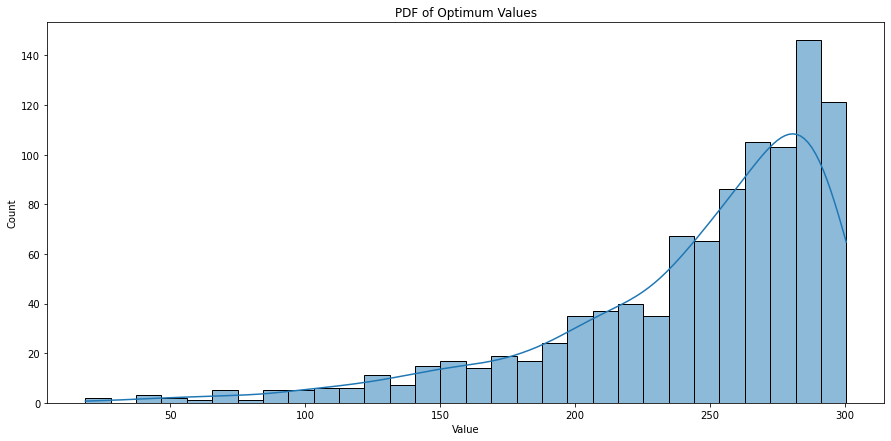

In [51]:
fig, ax = plt.subplots(figsize=(15,7))    
p = sns.histplot(z, bins = 30, kde=True, legend = True,)
ax.set_title('PDF of Optimum Values')
ax.set_xlabel('Value')
ax.set_ylabel('Count')
plt.show()

A gaussian kernel density estimate will be fitted with the data from the MC simulation. The mean and the standard deviation of the distribution measures the perfromance of the data. The higher the mean, the better. 

In [52]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(np.asarray(z).reshape(-1,1))

n_samples = 10000000
samples = kde.sample(n_samples)

mean_mc = samples.mean()
variance_mc = samples.var()

In [53]:
mean_mc

244.29624469172387

In [54]:
np.sqrt(variance_mc)

51.75707811136593

In [55]:
np.median(samples)

259.6919578126604